In [2]:
import re
from collections import Counter

import os.path
import matplotlib.pyplot as plt
import operator
import pandas as pd
import praw
import os as os
import pickle 
pd.options.display.max_columns = 999


from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge
from bokeh.io import show, output_notebook
output_notebook()

#Keywords that we chose to anaylize
keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']


Loading BokehJS ...

In [2]:
#https://github.com/chbrown/liwc-python
def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

import liwc
parse, category_names = liwc.load_token_parser('LIWC2007_English080730.dic')

## Analyze all the comments together

In [8]:
topic = 'social' #'technology' #'social'
folder_to = './data/sentiment_analysis/'+topic+'/'
folderpath = r'../../../data/reddit/'+topic+'/'

In [97]:
#From the given POSTS of each article from reddit we take all the comments and analyze them as it were one text all together
def sentiment_analysis_all_comments(file, date=True):
    keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']
    df = pd.read_csv(file, index_col= 0)
    
    if (date):
        df['date'] = pd.to_datetime(df['created'], unit='s')
        df['year'] = pd.DatetimeIndex(df['date']).year
        df = df[df['year']==2018]
    
    comments = df['comments_body'].str.cat(sep=',')
    if (len(comments)>2):
        tok = tokenize(comments)
        counter = Counter(category for token in tok for category in parse(token))
        key = list(counter.keys())
        dictionary = dict(counter)
        total = len(comments.split())
        dictionary_norm = {k: v / total for k, v in dictionary.items()}
        sorted_dictionary_norm = sorted(dictionary_norm.items(), key=operator.itemgetter(1), reverse=True)
    else:
        key = keys
        dictionary_norm = {k: 0.0 for k in keys}
    return [dictionary_norm[x] if x in dictionary_norm else 0.0 for x in keys ]

## Analyze by separate comments

In [36]:
#From the given POSTS of each article from reddit we analyze all the comments of each POST as one, and once we have the results for each POST we do the average
def sentiment_analysis_separate_comments(file, date=True):
    keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']
    df = pd.read_csv(file, index_col= 0)
    if (date):
        df['date'] = pd.to_datetime(df['created'], unit='s')
        df['year'] = pd.DatetimeIndex(df['date']).year
        df = df[df['year']==2018]
    
    dict_total = dict.fromkeys(keys, 0)
    if(len(df['comments_body'])):
        for comm in df['comments_body']:
            tok = tokenize(comm)
            total = len(comm.split())
            counter = dict(Counter(category for token in tok for category in parse(token)))
            dictionary = dict(counter)
            dictionary = {k: v / total for k, v in dictionary.items()}
            dict_total = { k: dict_total.get(k, 0) + dictionary.get(k, 0) for k in set(dict_total) | set(dictionary) }
    else:
        dictionary_norm = {k: 0.0 for k in keys}
        return [dictionary_norm[x] for x in keys]
    return [dict_total[x]/len(df['comments_body']) for x in keys]

## Analyze and save comments

In [98]:
#We do the sentiment analysis for separate comments, and all the comments together. We save the results
import pickle
keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']

folder = os.listdir(folderpath)
for file in folder:
    print (file)
    list_all = sentiment_analysis_all_comments(folderpath+file)
    list_separate = sentiment_analysis_separate_comments(folderpath+file)
    with open(folder_to+'sentiment_tog_'+file, 'wb') as fp:
        pickle.dump(list_all, fp)
    with open(folder_to+'sentiment_sep_'+file, 'wb') as fp:
        pickle.dump(list_separate, fp)

reddit_Digital_labor.csv
reddit_Filter_bubble.csv
reddit_Polarization_(politics).csv
reddit_Information_privacy.csv
reddit_Intellectual_property.csv
reddit_Decentralization.csv
reddit_Decision-making.csv
reddit_Knowledge_commons.csv
reddit_Internet_fraud.csv
reddit_Temporary_work.csv
reddit_Community_network.csv
reddit_Scalability.csv
reddit_Social_inequality.csv
reddit_Price_discrimination.csv
reddit_Algorithmic_bias.csv
reddit_Secure_communication.csv
reddit_Data_ownership.csv
reddit_Identity_management.csv
reddit_Social_networking_service.csv
reddit_Information_explosion.csv
reddit_Information_society.csv
reddit_Redundancy_(engineering).csv
reddit_Right_to_be_forgotten.csv
reddit_Fake_news.csv
reddit_Open-source_model.csv
reddit_Targeted_advertising.csv
reddit_Distance_education.csv
reddit_Innovation.csv
reddit_Network_security.csv
reddit_Data_retention.csv
reddit_Interoperability.csv
reddit_Credential_stuffing.csv
reddit_Echo_chamber_(media).csv
reddit_Discrimination.csv
reddit_Dat

In [24]:
#save dictionary of number of posts collected from each article
folder = os.listdir(folderpath)
dictionary = {}
for file in folder:
    df = pd.read_csv(folderpath+file, index_col=0)
    dictionary[file] = len(df)
with open(folder_to+'num_posts', 'wb') as fp:
        pickle.dump(dictionary, fp)

## Plots

reddit_Digital_labor.csv
Num posts:  445


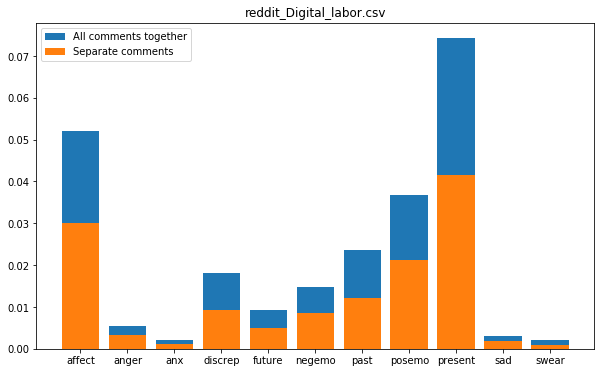

reddit_Filter_bubble.csv
Num posts:  455


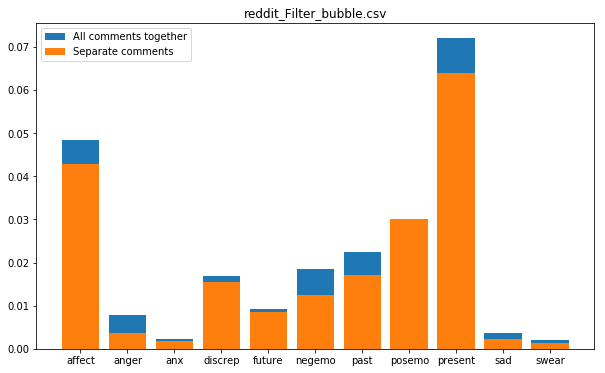

reddit_Polarization_(politics).csv
Num posts:  413


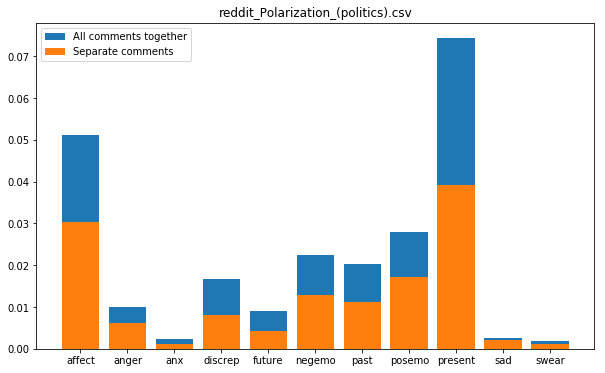

reddit_Information_privacy.csv
Num posts:  490


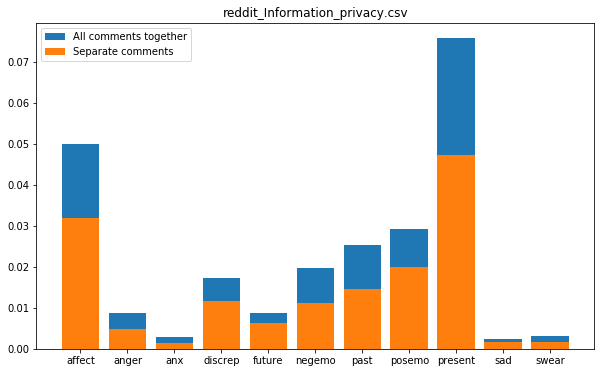

reddit_Intellectual_property.csv
Num posts:  457


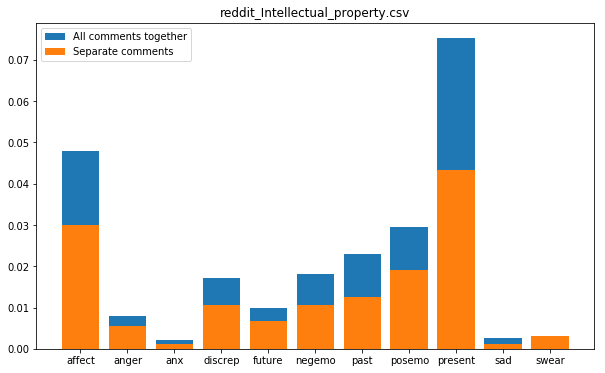

reddit_Decentralization.csv
Num posts:  472


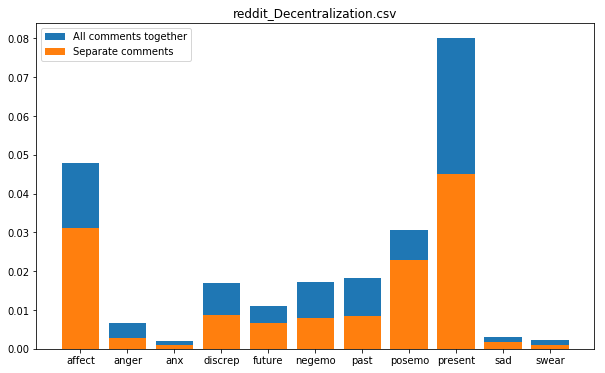

reddit_Decision-making.csv
Num posts:  484


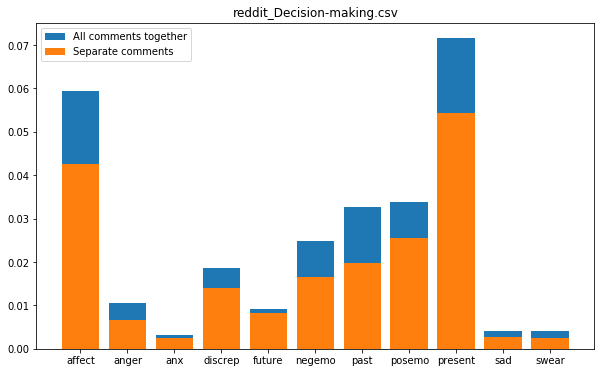

reddit_Knowledge_commons.csv
Num posts:  481


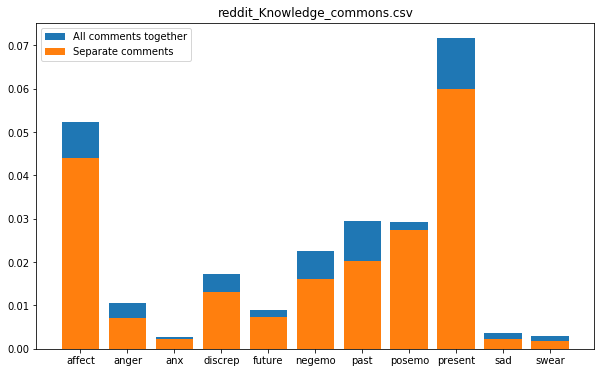

reddit_Internet_fraud.csv
Num posts:  463


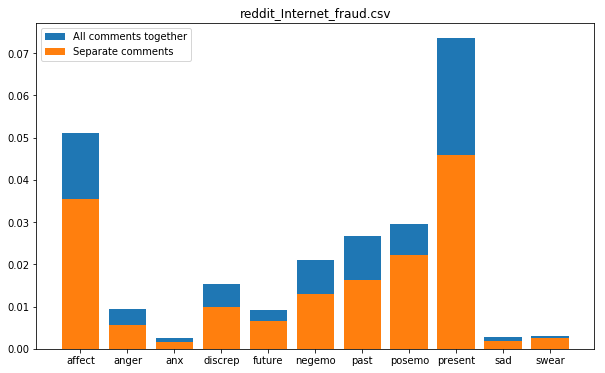

reddit_Temporary_work.csv
Num posts:  469


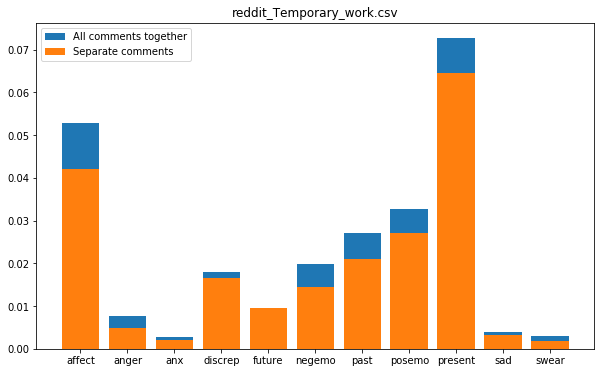

reddit_Community_network.csv
Num posts:  485


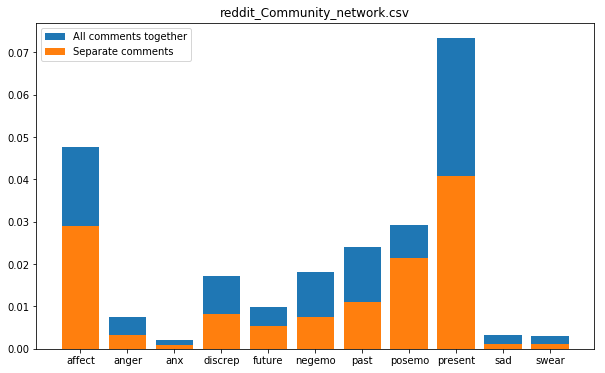

reddit_Scalability.csv
Num posts:  469


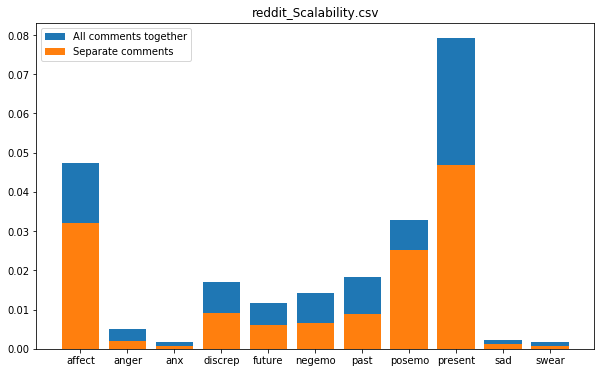

reddit_Social_inequality.csv
Num posts:  455


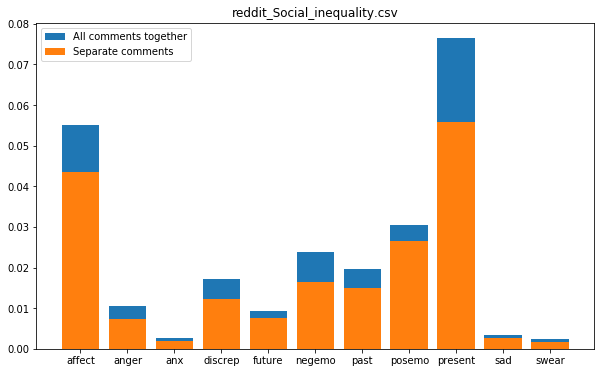

reddit_Price_discrimination.csv
Num posts:  440


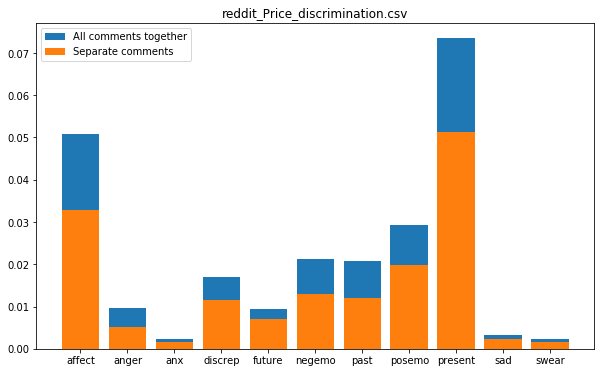

reddit_Algorithmic_bias.csv
Num posts:  100


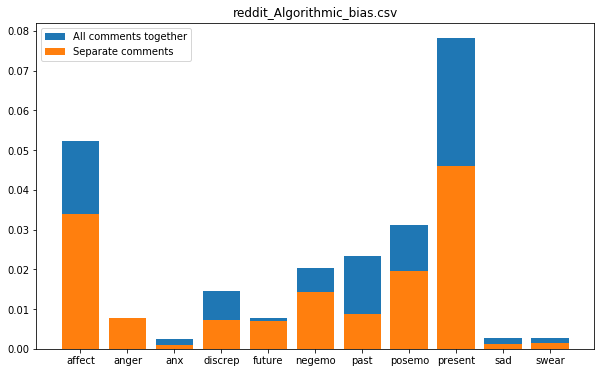

reddit_Secure_communication.csv
Num posts:  480


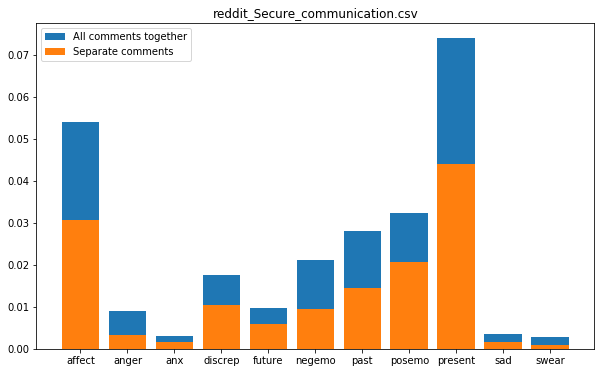

reddit_Data_ownership.csv
Num posts:  460


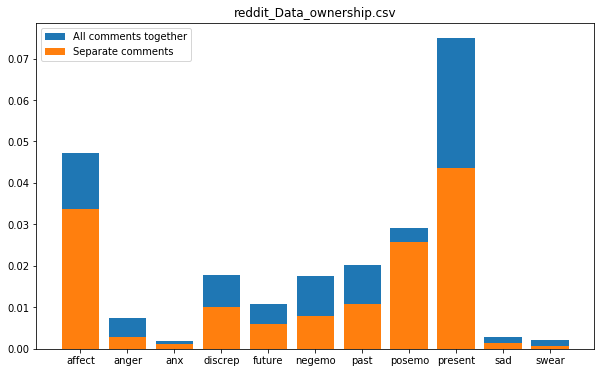

reddit_Identity_management.csv
Num posts:  472


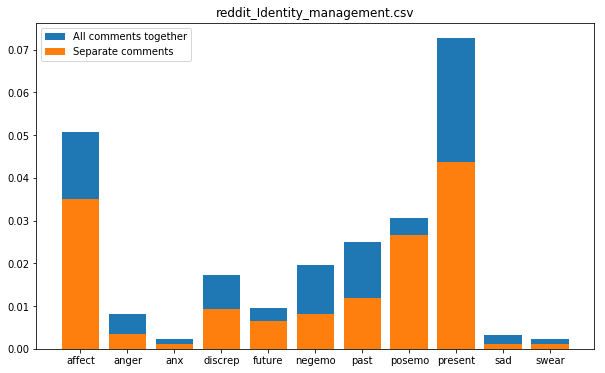

reddit_Social_networking_service.csv
Num posts:  459


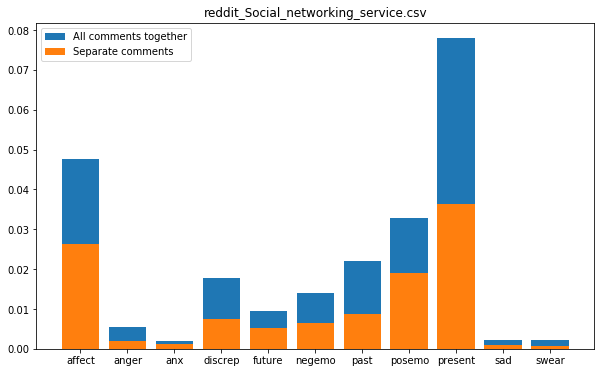

reddit_Information_explosion.csv
Num posts:  474


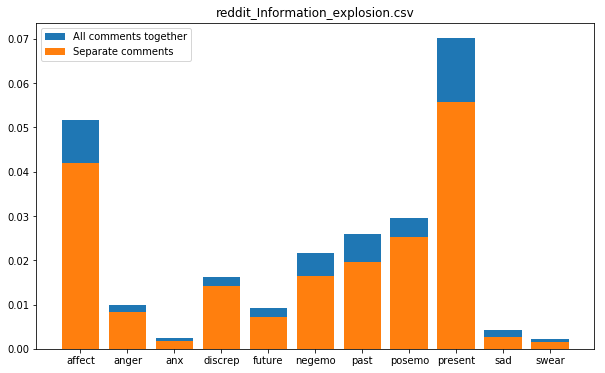

reddit_Information_society.csv
Num posts:  483


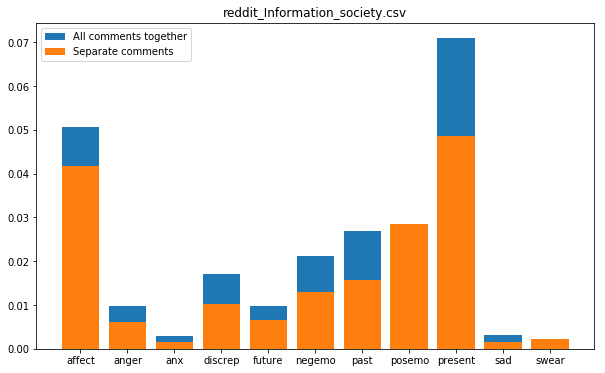

reddit_Redundancy_(engineering).csv
Num posts:  351


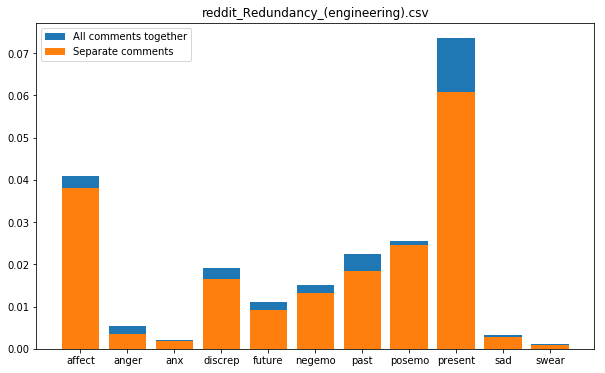

reddit_Right_to_be_forgotten.csv
Num posts:  485


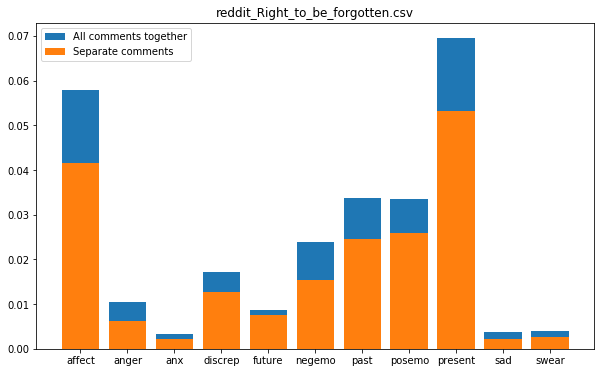

reddit_Fake_news.csv
Num posts:  442


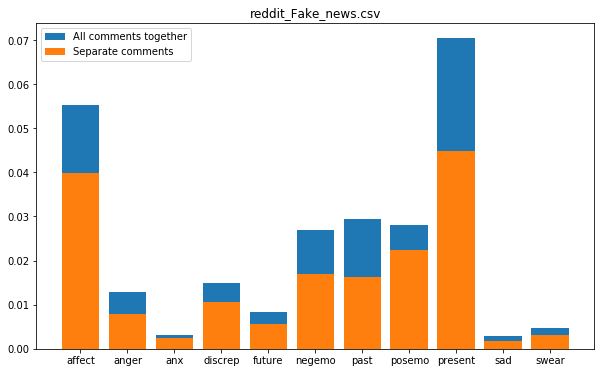

reddit_Open-source_model.csv
Num posts:  477


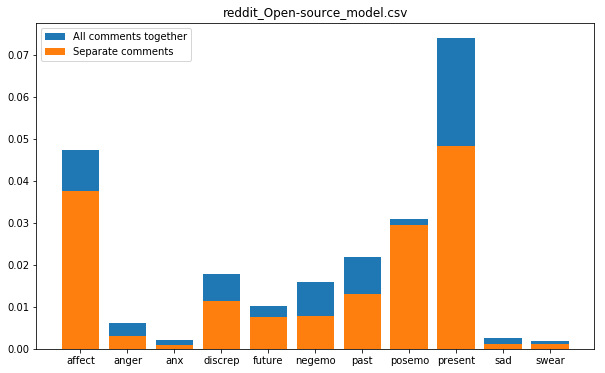

reddit_Targeted_advertising.csv
Num posts:  456


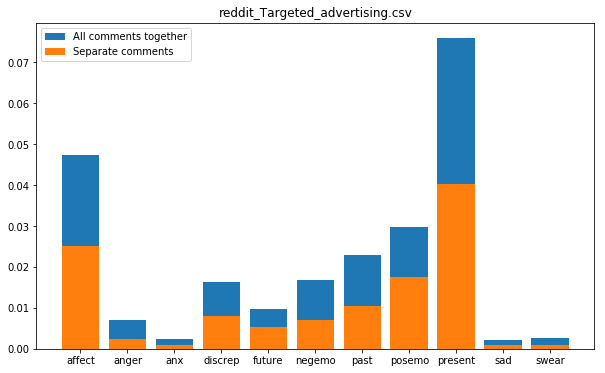

reddit_Distance_education.csv
Num posts:  471


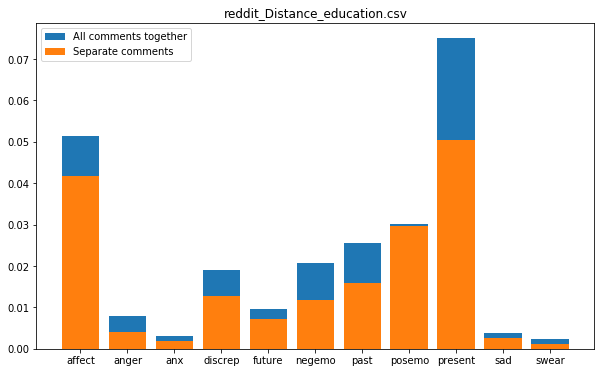

reddit_Innovation.csv
Num posts:  466


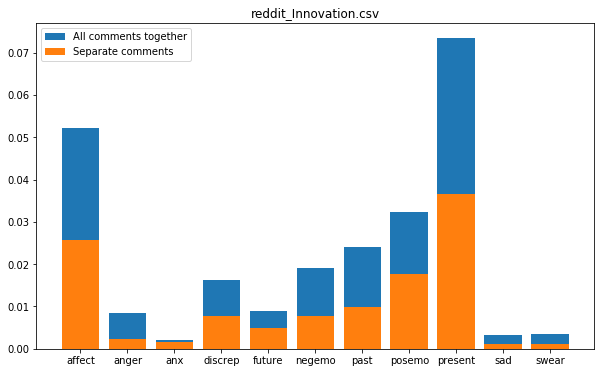

reddit_Network_security.csv
Num posts:  480


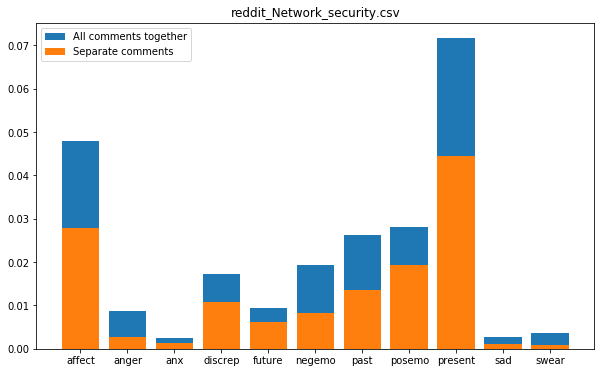

reddit_Data_retention.csv
Num posts:  459


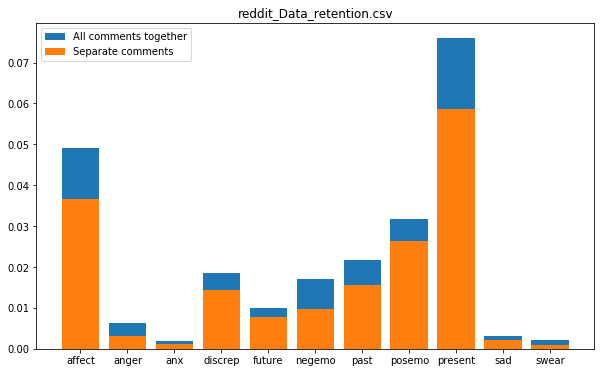

reddit_Interoperability.csv
Num posts:  440


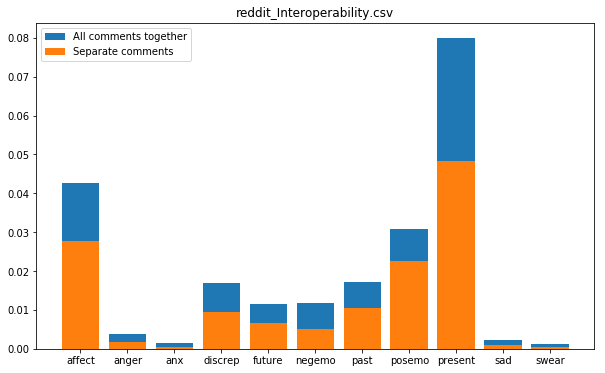

reddit_Credential_stuffing.csv
Num posts:  57


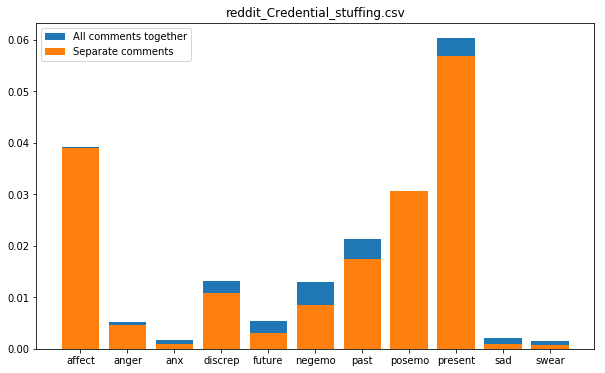

reddit_Echo_chamber_(media).csv
Num posts:  421


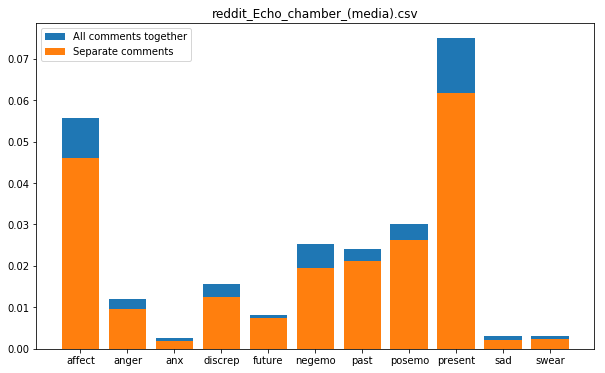

reddit_Discrimination.csv
Num posts:  446


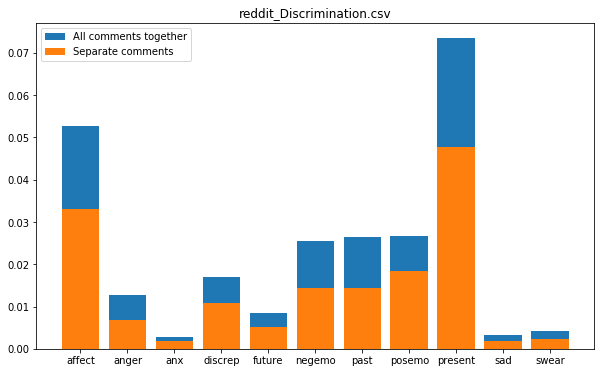

reddit_Data_Sovereignty.csv
Num posts:  406


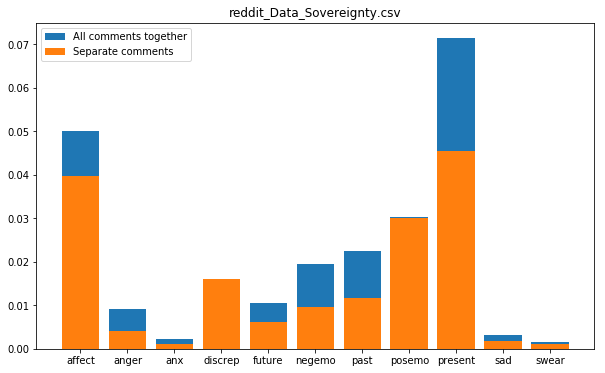

reddit_Secure_Electronic_Transaction.csv
Num posts:  417


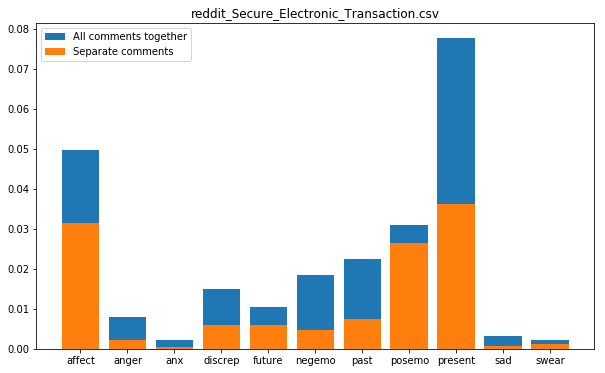

reddit_Web_accessibility.csv
Num posts:  419


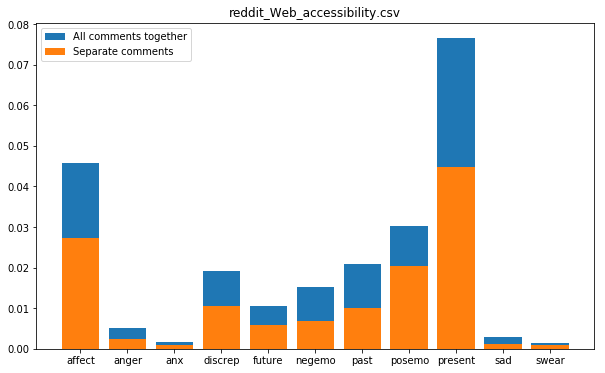

reddit_Living_lab.csv
Num posts:  485


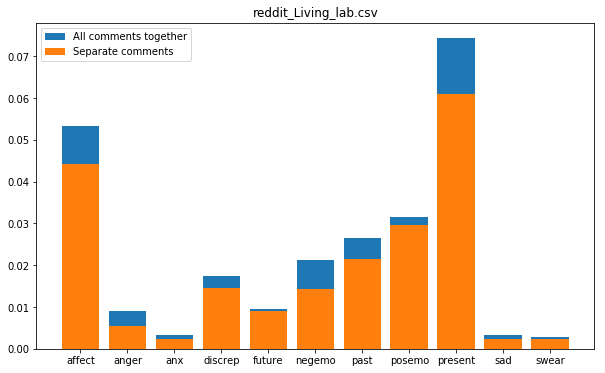

reddit_Internet_privacy.csv
Num posts:  465


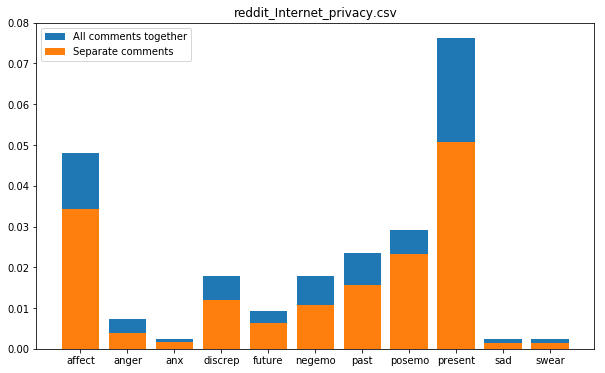

reddit_E-Administration.csv
Num posts:  375


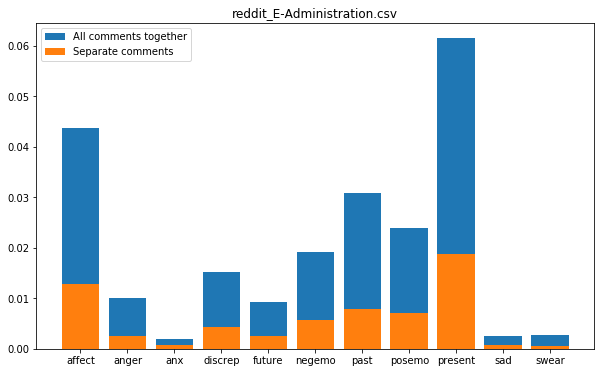

reddit_Level_playing_field.csv
Num posts:  467


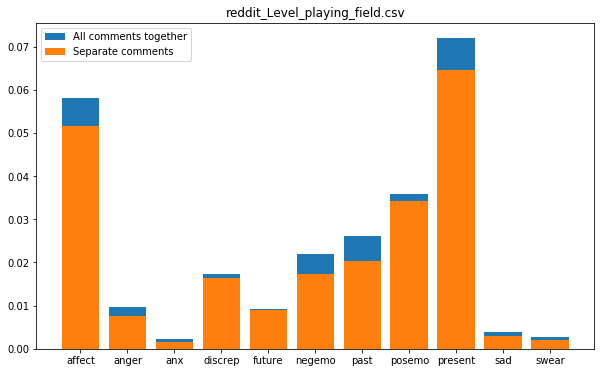

reddit_Net_neutrality.csv
Num posts:  295


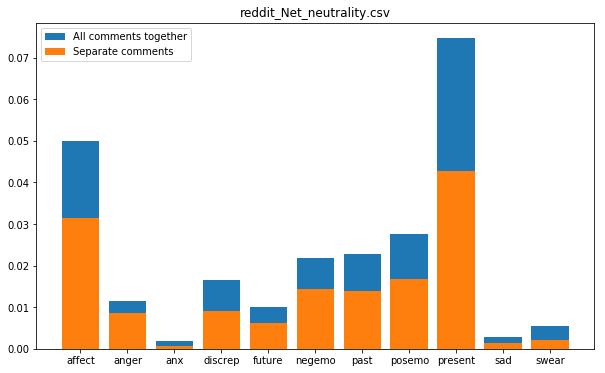

reddit_Provable_security.csv
Num posts:  138


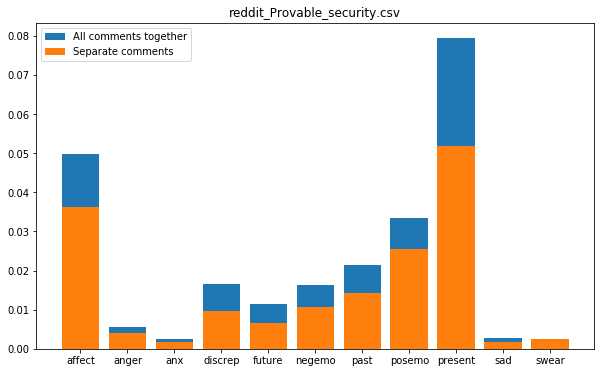

reddit_Algorithmic_regulation.csv
Num posts:  99


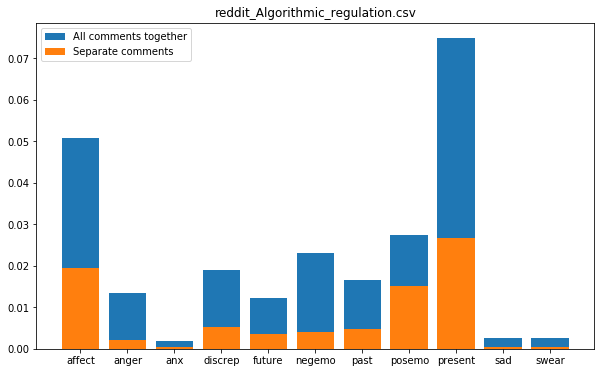

reddit_Freedom_of_information_laws_by_country.csv
Num posts:  448


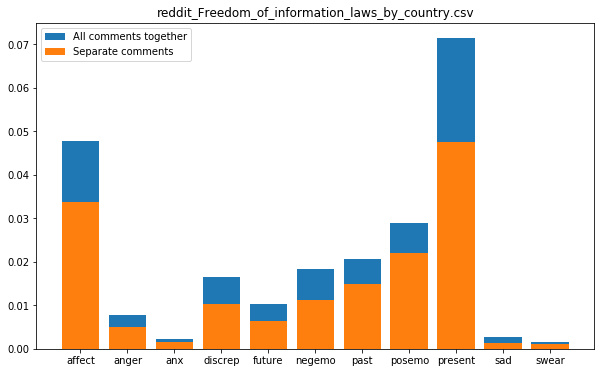

reddit_Kerckhoffs's_principle.csv
Num posts:  21


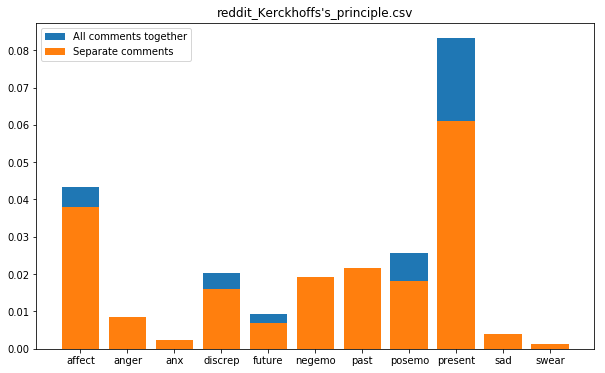

reddit_Digital_transformation.csv
Num posts:  457


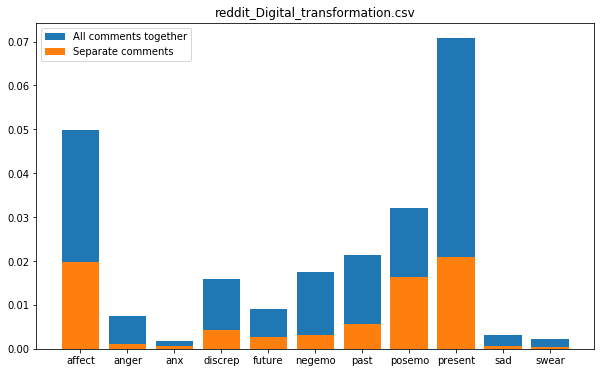

reddit_Privacy-enhancing_technologies.csv
Num posts:  123


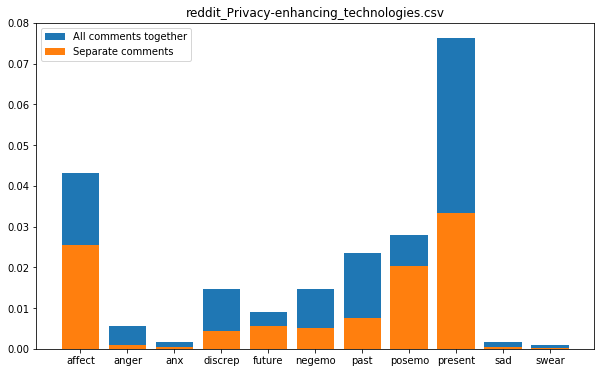

reddit_Educational_technology.csv
Num posts:  468


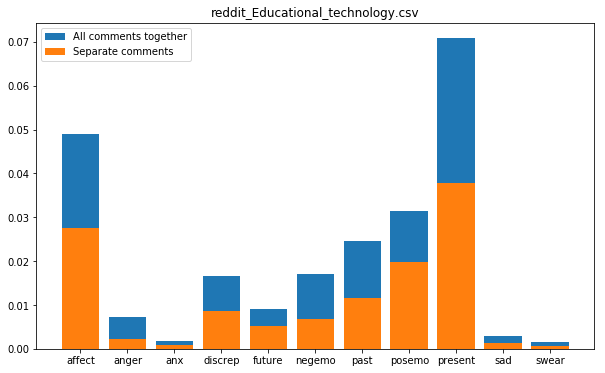

reddit_Anticipatory_governance.csv
Num posts:  3


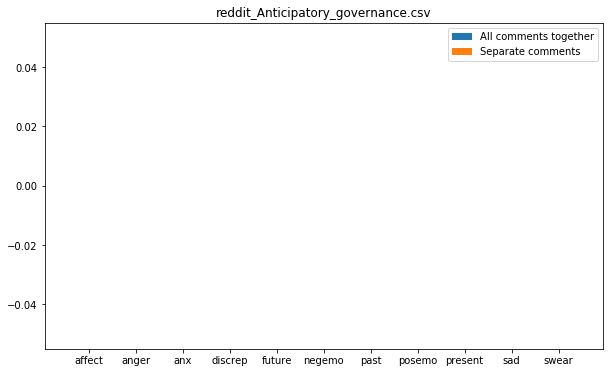

reddit_Immersive_technology.csv
Num posts:  400


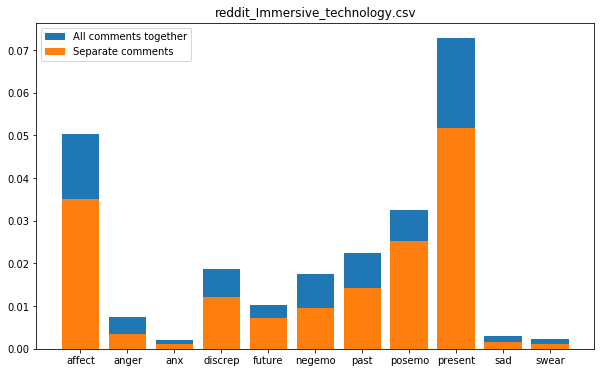

reddit_Data_literacy.csv
Num posts:  387


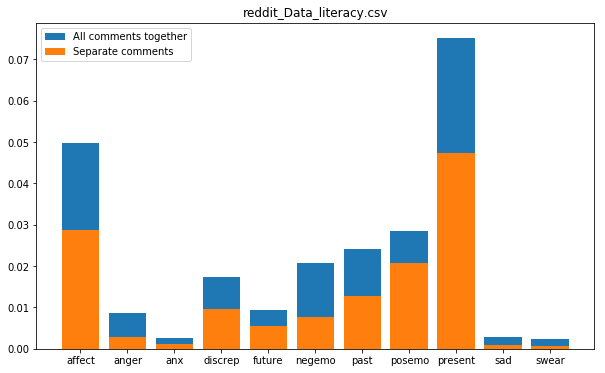

reddit_Competition_law.csv
Num posts:  459


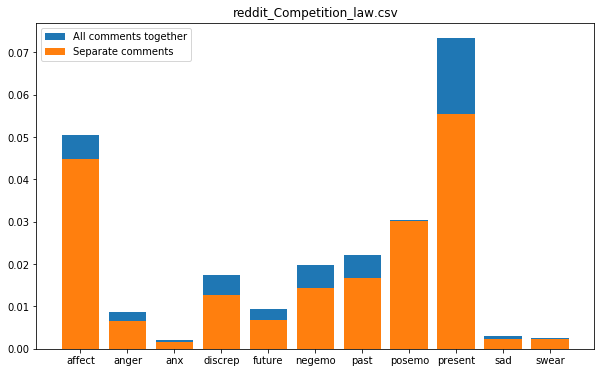

reddit_Virtual_collaboration.csv
Num posts:  416


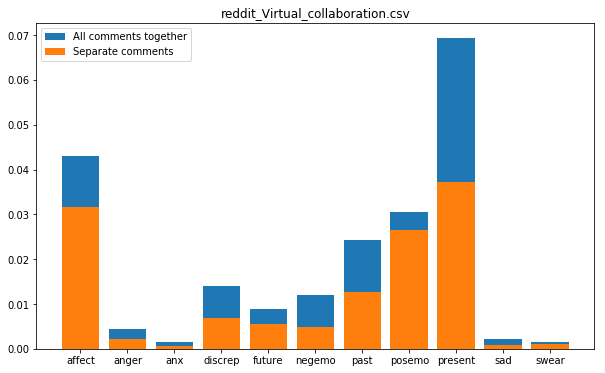

reddit_Monopoly.csv
Num posts:  470


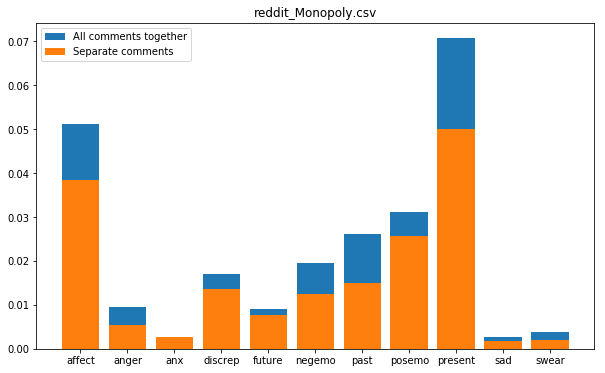

reddit_Context_awareness.csv
Num posts:  447


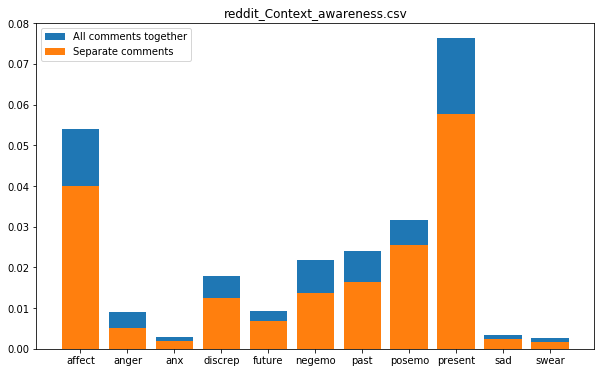

reddit_Cyber_sovereignty.csv
Num posts:  213


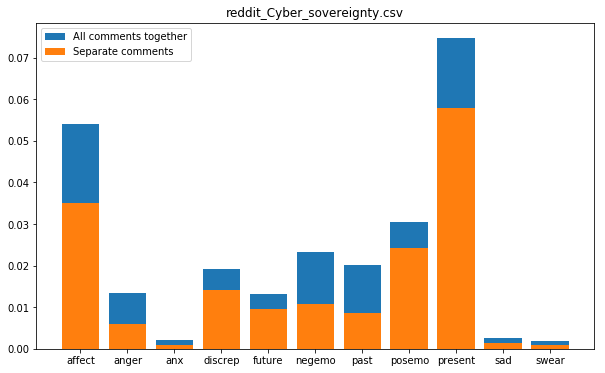

reddit_E-procurement.csv
Num posts:  117


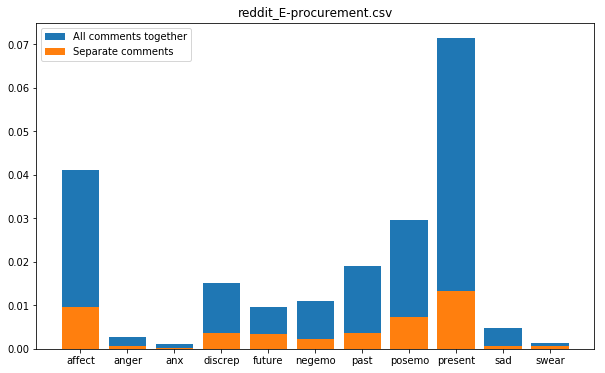

reddit_Digital_identity.csv
Num posts:  471


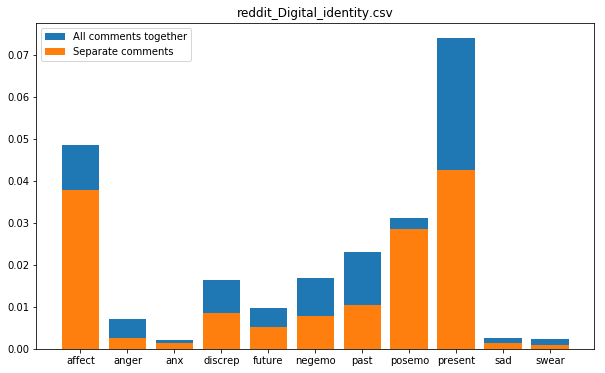

reddit_Reliability_(computer_networking).csv
Num posts:  175


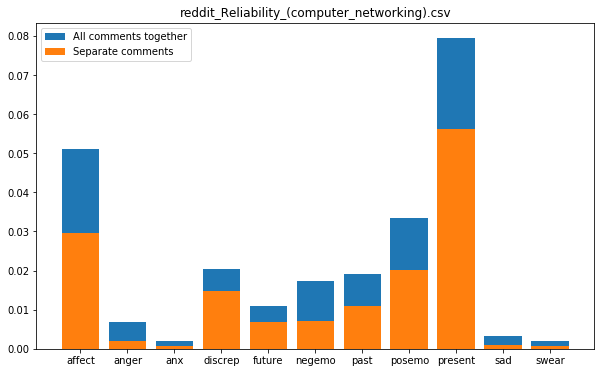

reddit_Internet_Universality.csv
Num posts:  60


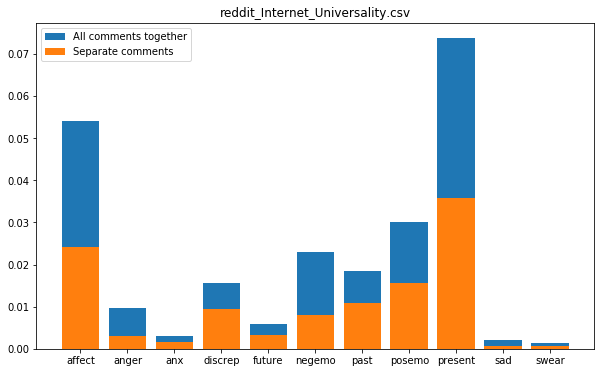

reddit_E-commerce.csv
Num posts:  460


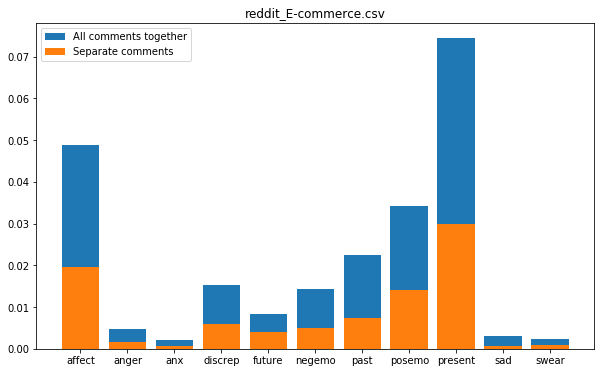

reddit_Privacy_by_design.csv
Num posts:  450


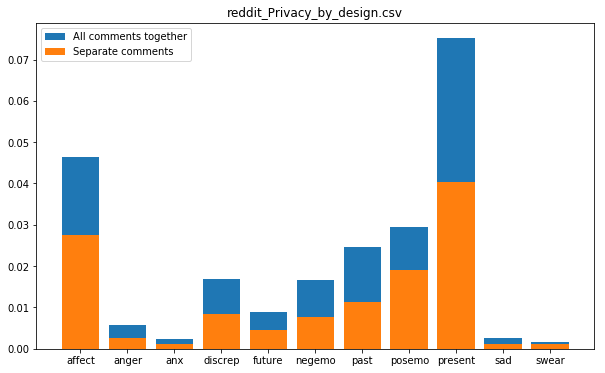

reddit_Wealth_concentration.csv
Num posts:  425


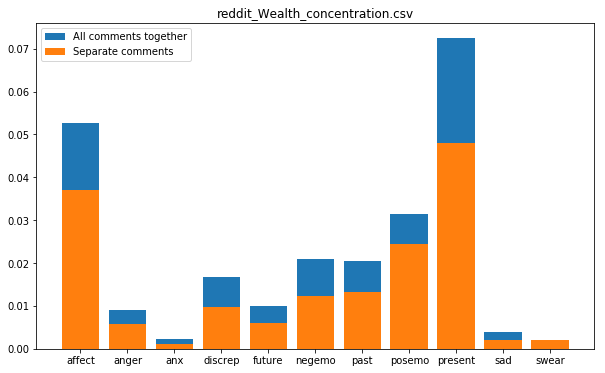

reddit_Hyperconnectivity.csv
Num posts:  57


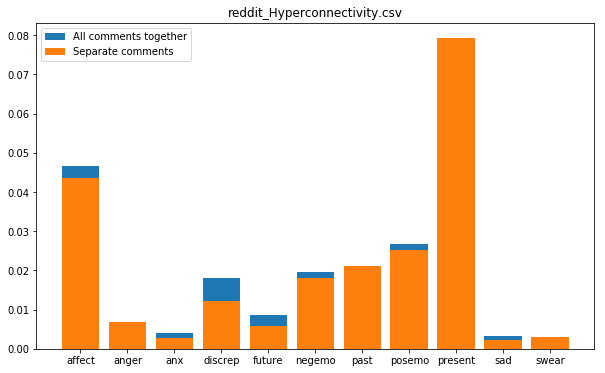

reddit_Global_education.csv
Num posts:  479


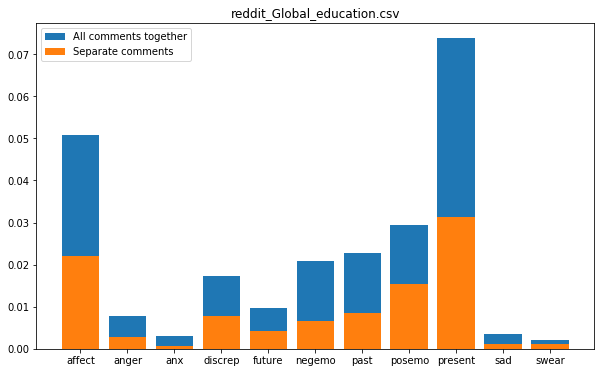

reddit_Economic_inequality.csv
Num posts:  456


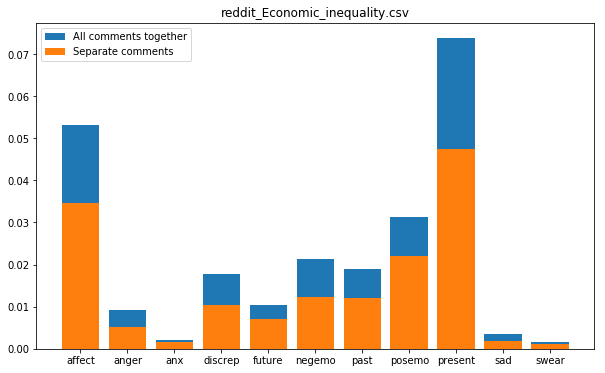

reddit_Digital_Single_Market.csv
Num posts:  469


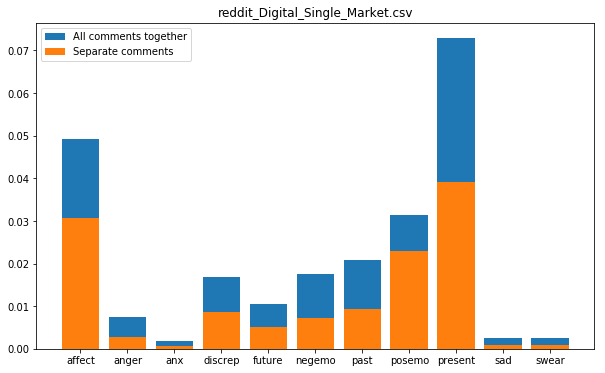

reddit_Right_to_Internet_access.csv
Num posts:  486


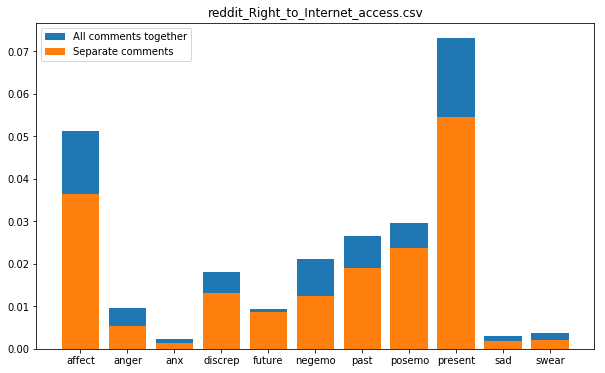

reddit_Personal_cloud.csv
Num posts:  484


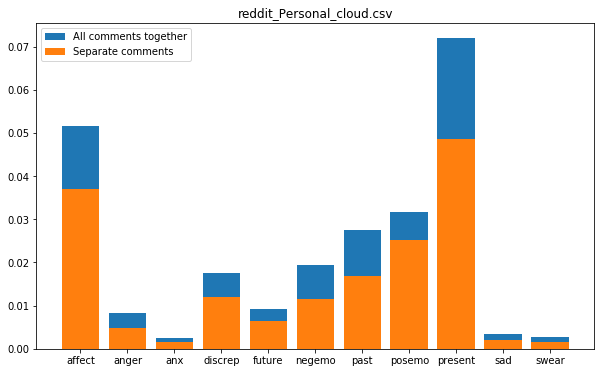

reddit_Green_computing.csv
Num posts:  379


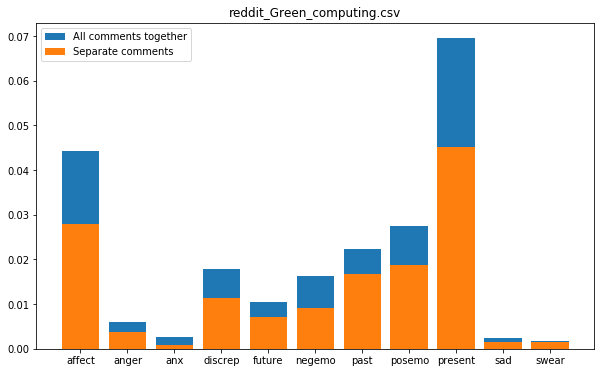

reddit_Financial_technology.csv
Num posts:  481


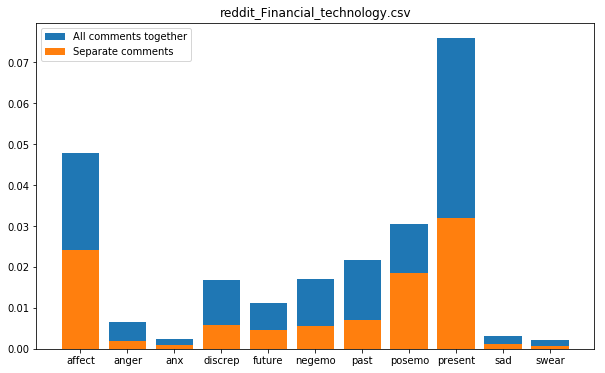

reddit_Reputation_system.csv
Num posts:  485


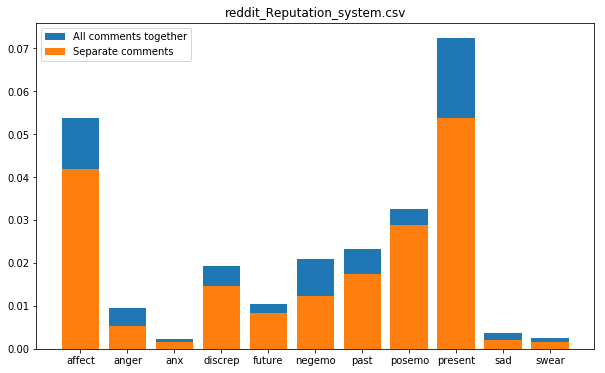

reddit_Cybercrime.csv
Num posts:  404


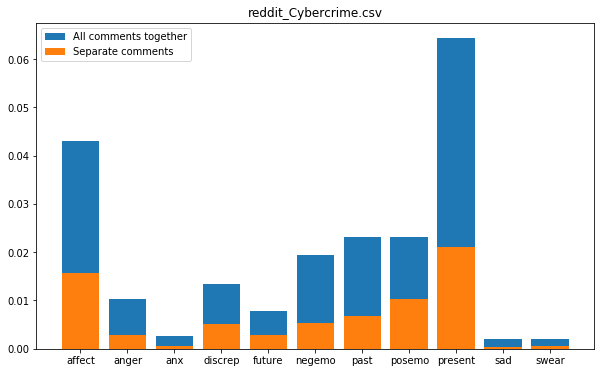

reddit_EHealth.csv
Num posts:  335


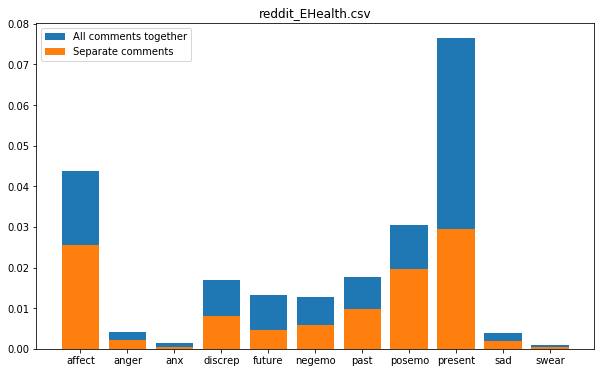

reddit_Psychological_effects_of_Internet_use.csv
Num posts:  375


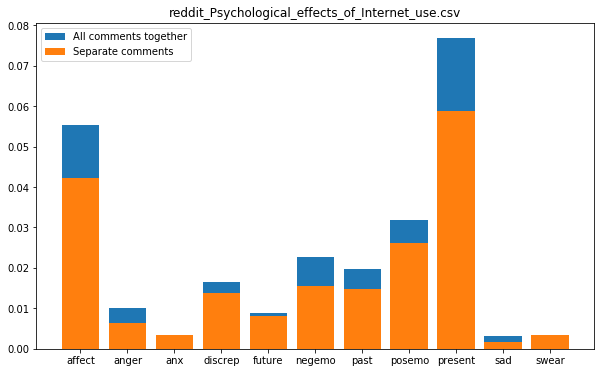

reddit_General_Data_Protection_Regulation.csv
Num posts:  427


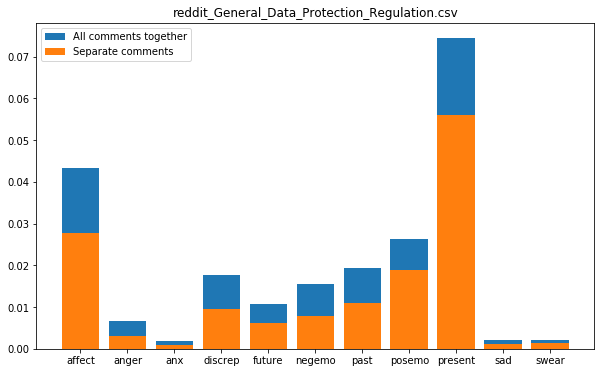

reddit_E-democracy.csv
Num posts:  328


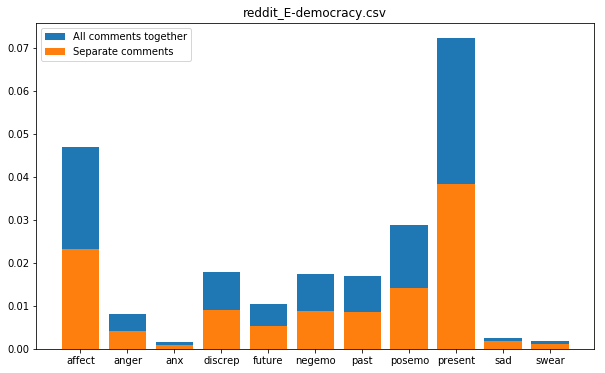

reddit_Digital_commons_(economics).csv
Num posts:  398


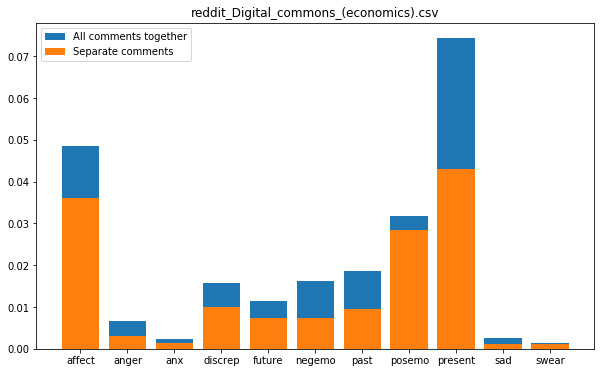

reddit_Green_economy.csv
Num posts:  479


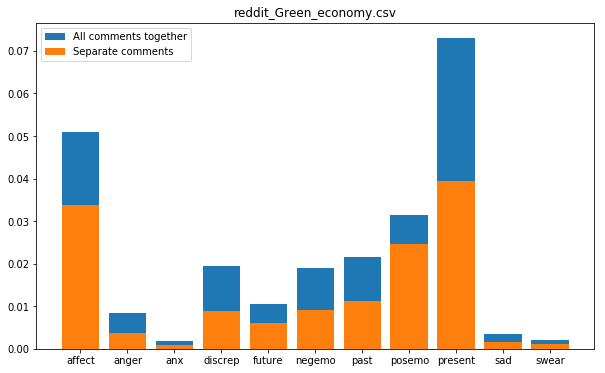

reddit_Open_innovation.csv
Num posts:  479


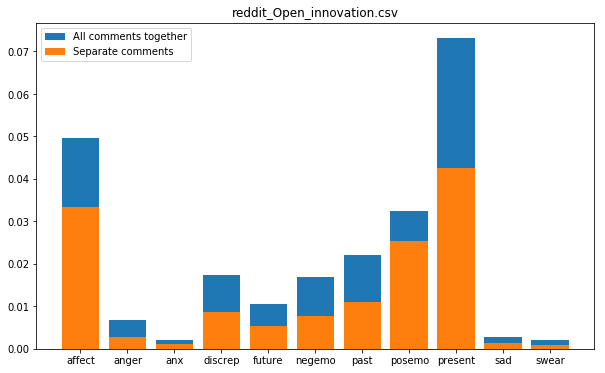

reddit_Open_standard.csv
Num posts:  489


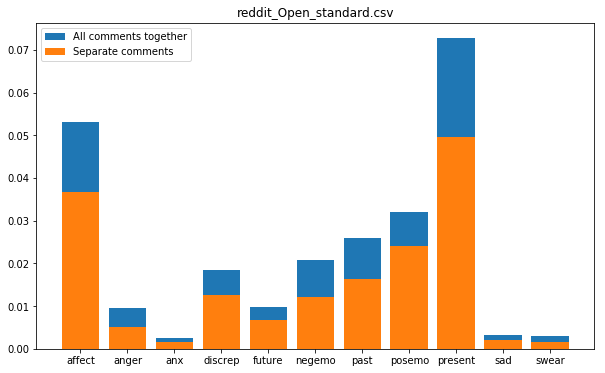

reddit_Personalized_marketing.csv
Num posts:  434


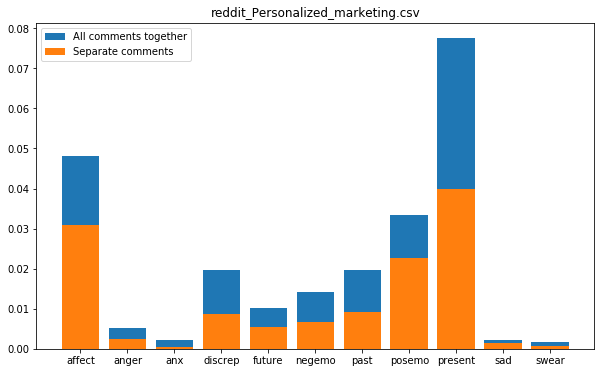

reddit_Virtual_community.csv
Num posts:  485


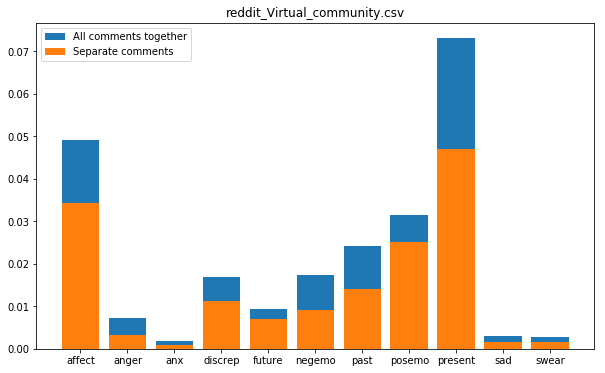

reddit_Smart_city.csv
Num posts:  466


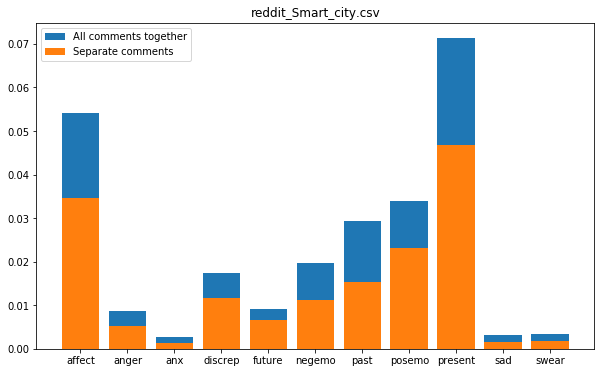

reddit_Open_security.csv
Num posts:  477


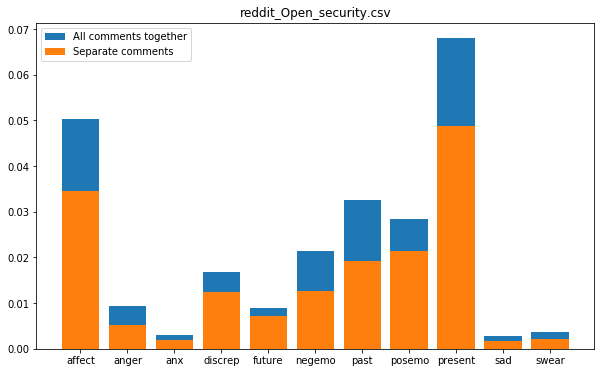

reddit_Multidisciplinary_approach.csv
Num posts:  212


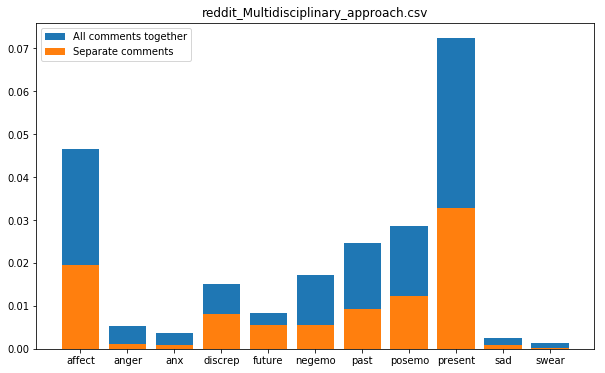

reddit_Open_data.csv
Num posts:  477


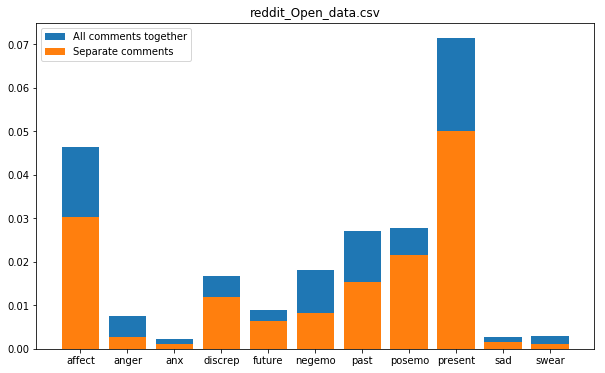

reddit_Open_spectrum.csv
Num posts:  481


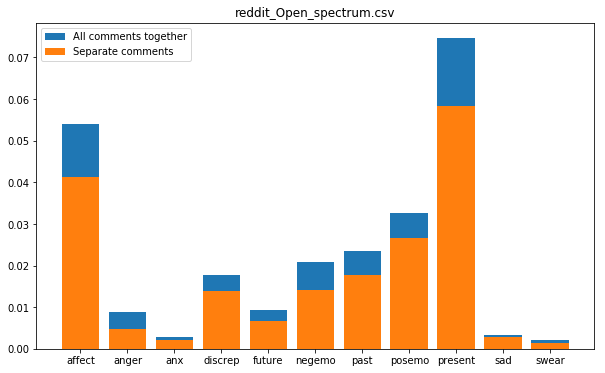

reddit_Accountability.csv
Num posts:  452


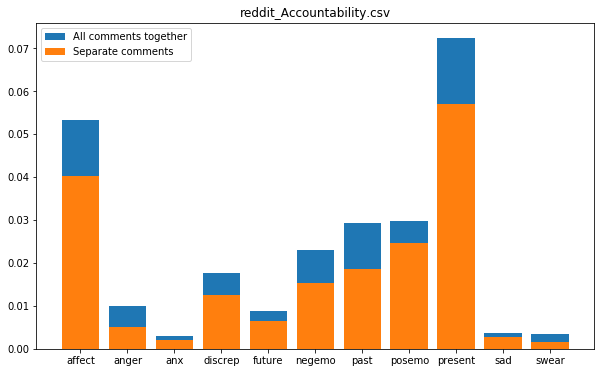

reddit_Open-source_governance.csv
Num posts:  429


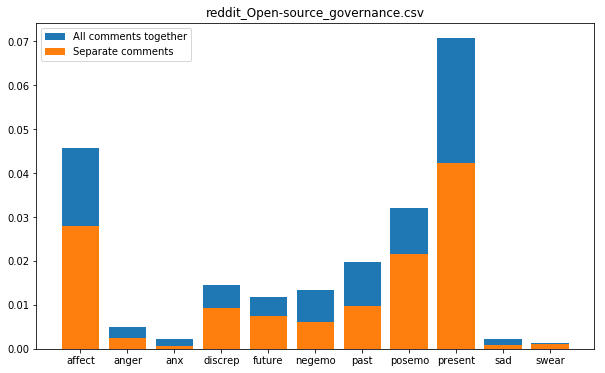

reddit_Real-time_collaboration.csv
Num posts:  468


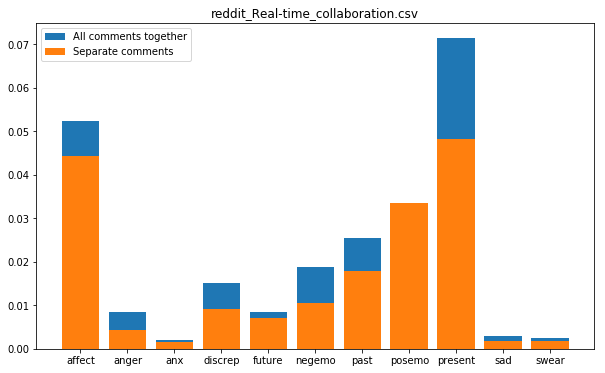

reddit_Network_transparency.csv
Num posts:  469


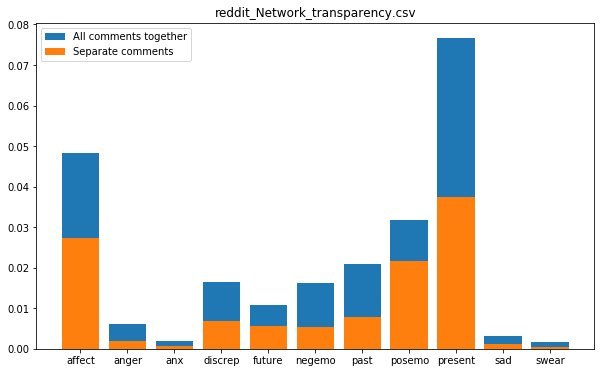

reddit_Internet_governance.csv
Num posts:  421


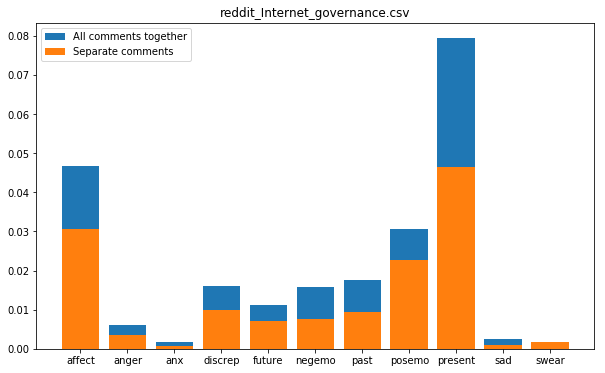

reddit_Post-truth_politics.csv
Num posts:  471


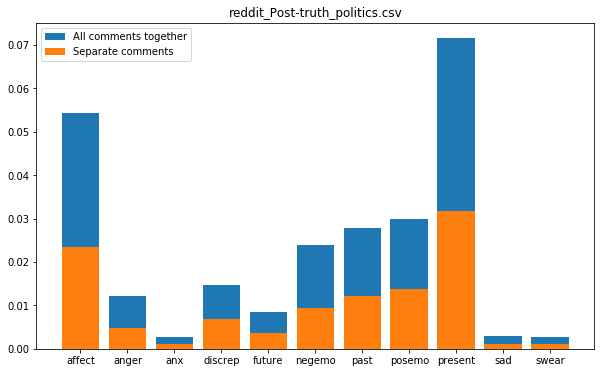

reddit_Electronic_voting.csv
Num posts:  438


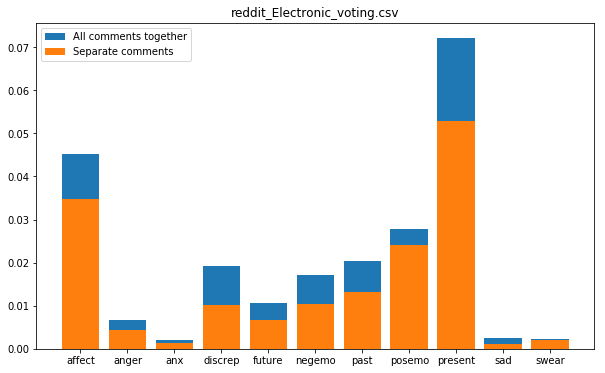

reddit_Information_ethics.csv
Num posts:  473


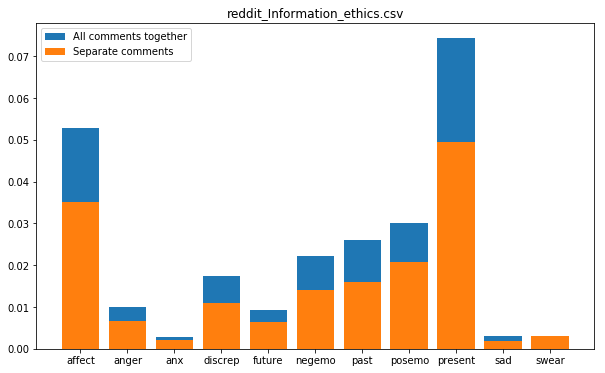

reddit_Peer-to-peer.csv
Num posts:  461


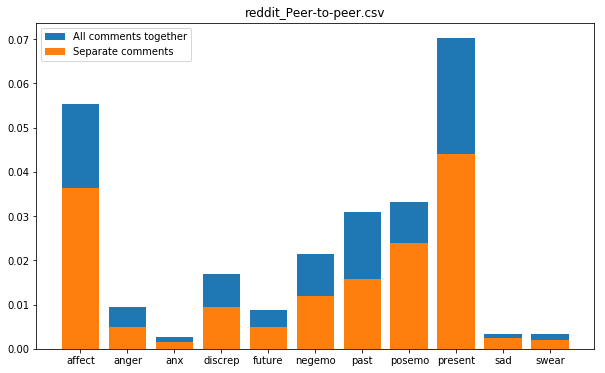

reddit_Global_basic_income.csv
Num posts:  432


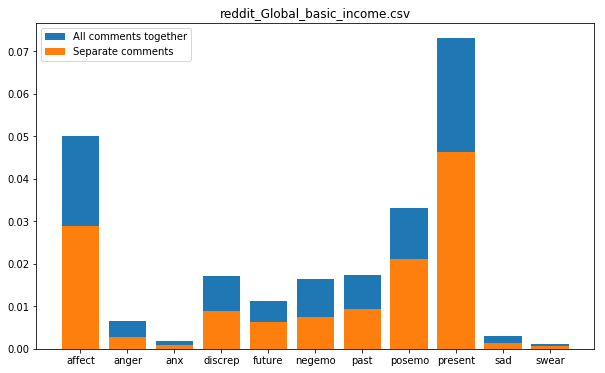

reddit_Disruptive_innovation.csv
Num posts:  390


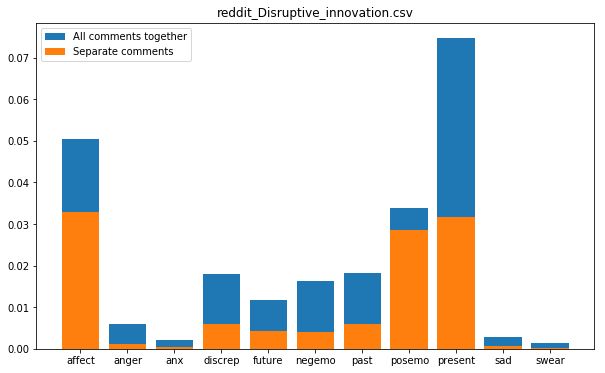

reddit_Secure_by_design.csv
Num posts:  481


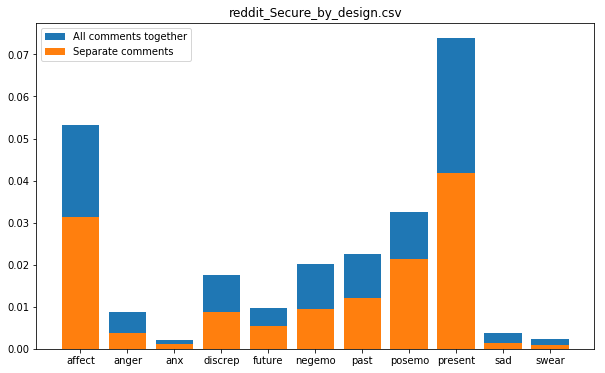

reddit_Robot_ethics.csv
Num posts:  427


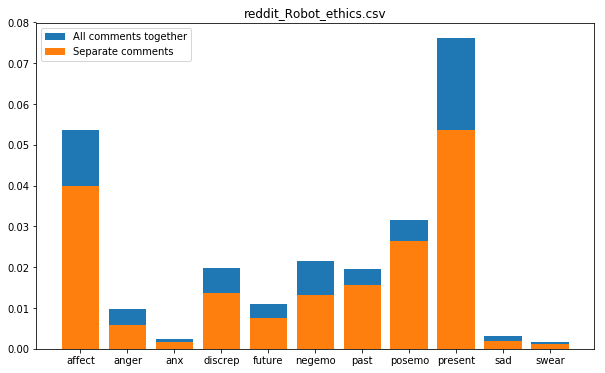

reddit_Participatory_democracy.csv
Num posts:  300


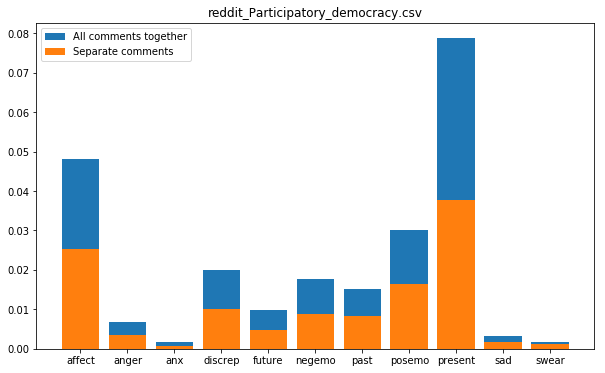

reddit_Surveillance.csv
Num posts:  436


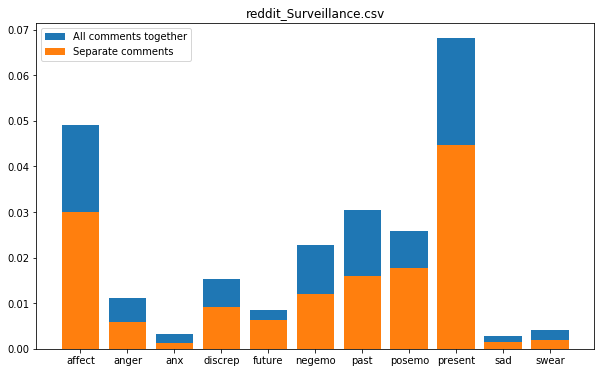

reddit_Future_proof.csv
Num posts:  483


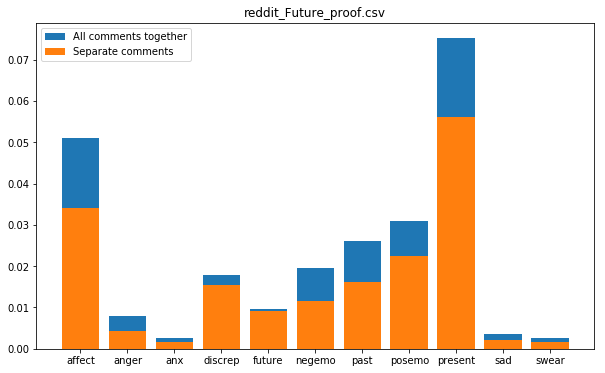

reddit_Child_protection.csv
Num posts:  462


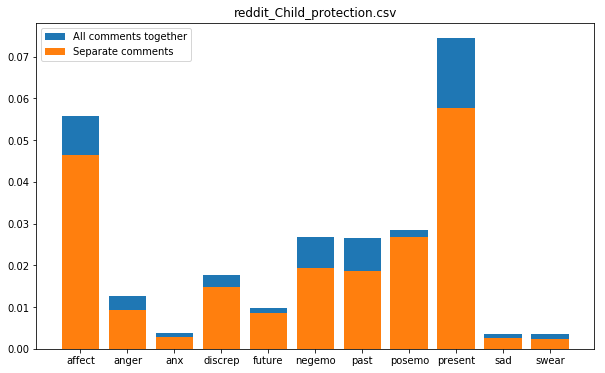

reddit_Usability.csv
Num posts:  480


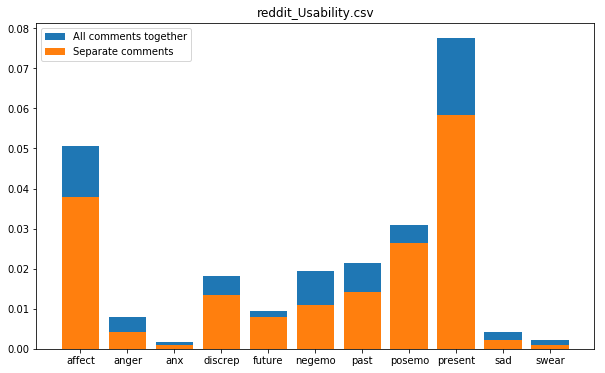

reddit_Ubiquitous_computing.csv
Num posts:  281


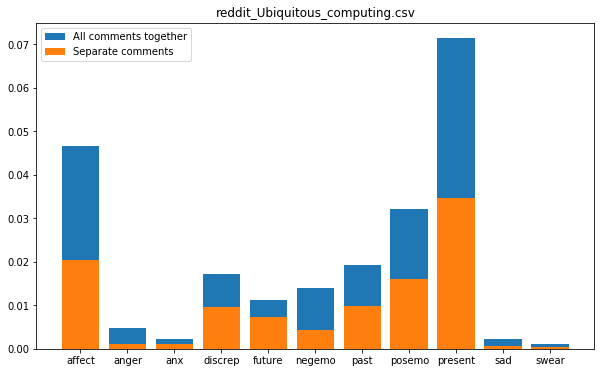

reddit_Trust_federation.csv
Num posts:  438


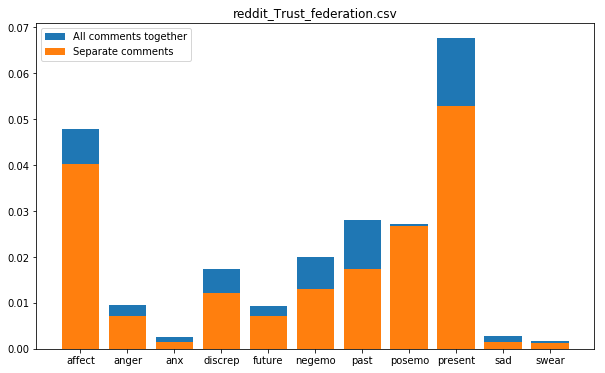

reddit_Digital_learning.csv
Num posts:  478


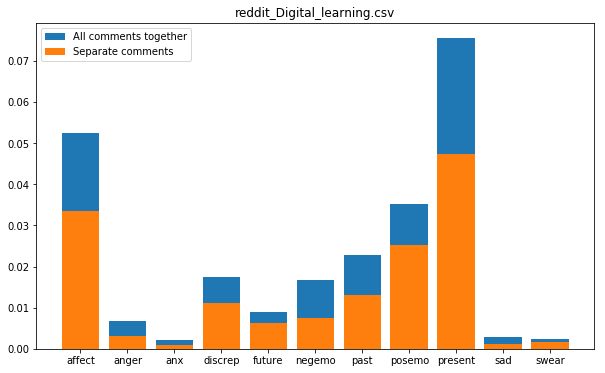

reddit_Computer_and_network_surveillance.csv
Num posts:  422


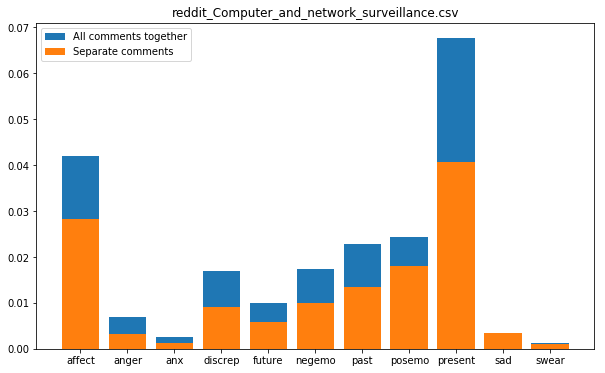

reddit_Quality_of_experience.csv
Num posts:  489


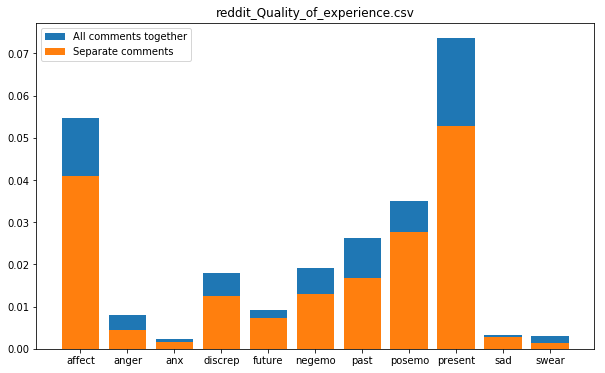

reddit_Explainable_Artificial_Intelligence.csv
Num posts:  18


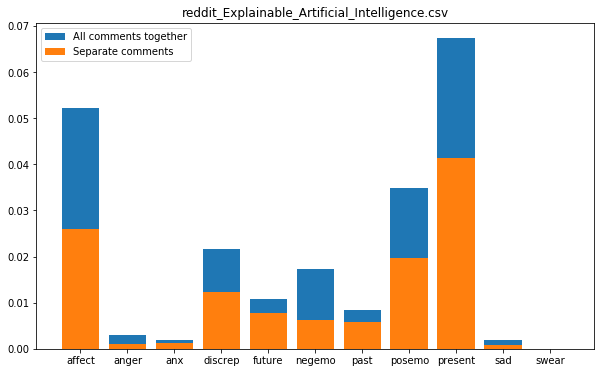

reddit_Social_innovation.csv
Num posts:  474


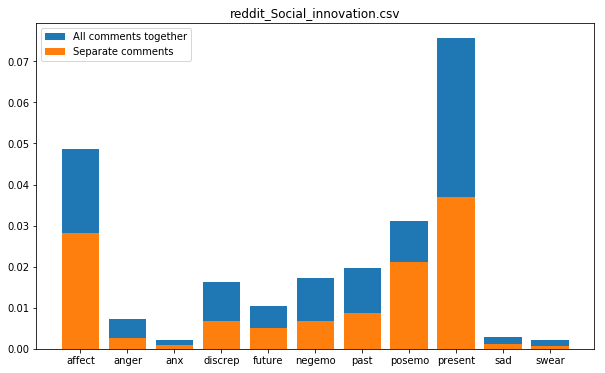

reddit_Copyright.csv
Num posts:  455


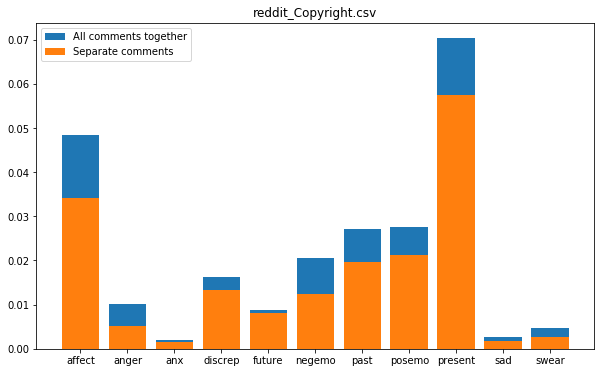

reddit_Sharing_economy.csv
Num posts:  434


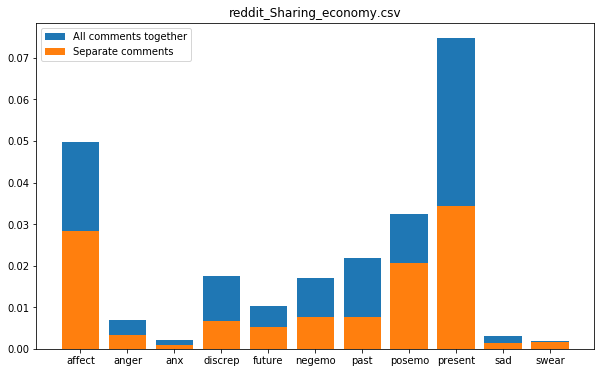

reddit_Internet_safety.csv
Num posts:  477


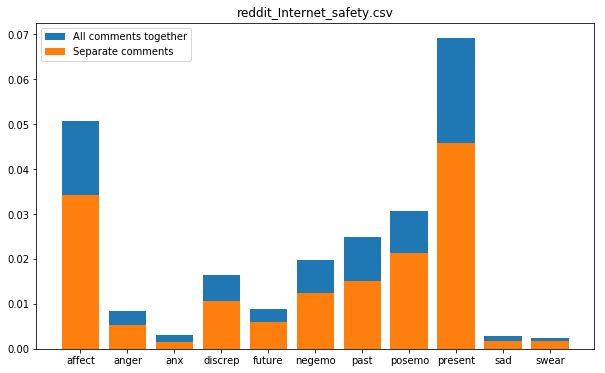

reddit_Computer-supported_collaboration.csv
Num posts:  98


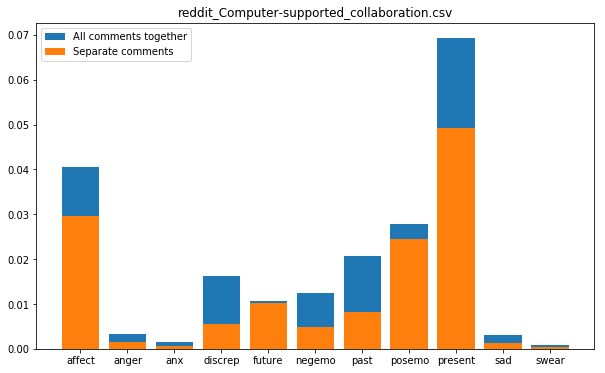

reddit_Innovation_Hub.csv
Num posts:  441


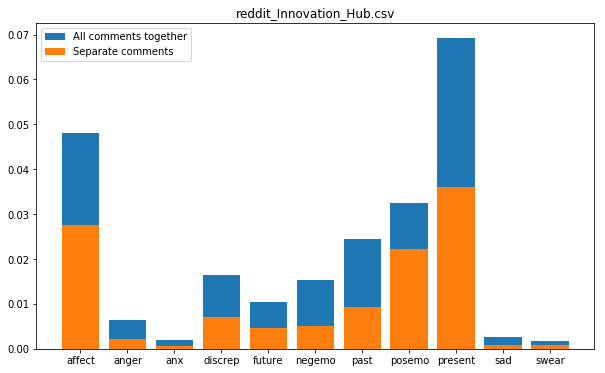

reddit_Digital_divide.csv
Num posts:  444


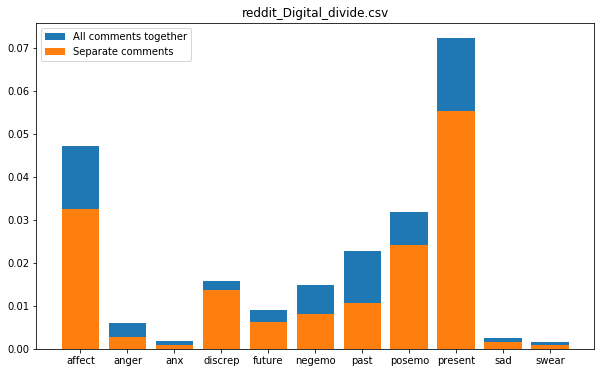

reddit_Data_localization.csv
Num posts:  418


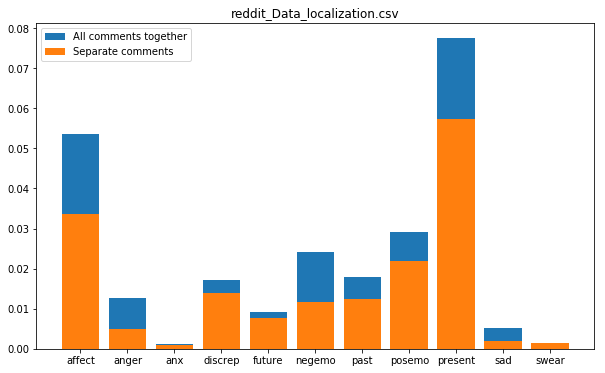

reddit_Empowerment.csv
Num posts:  469


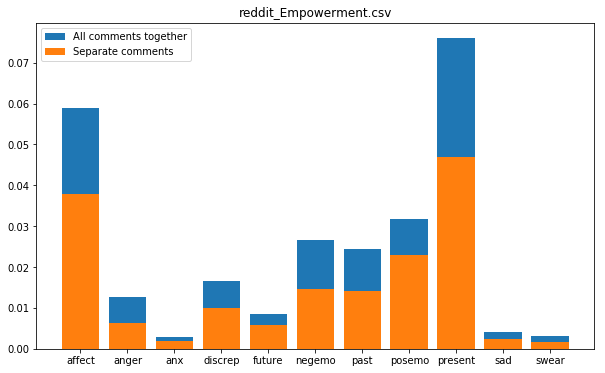

reddit_Globalization.csv
Num posts:  450


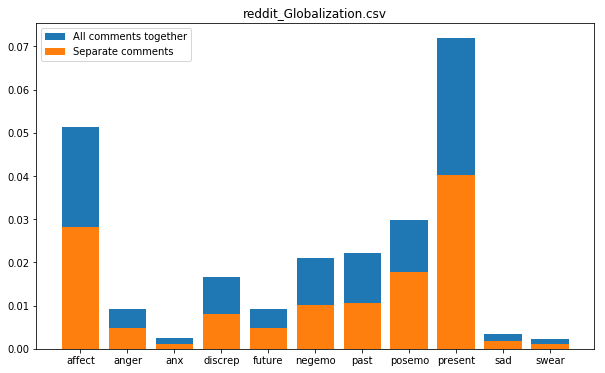

reddit_Two-sided_markets.csv
Num posts:  405


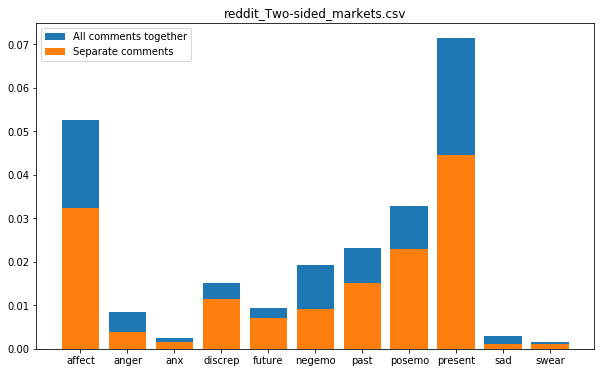

reddit_Backward_Compatibility.csv
Num posts:  462


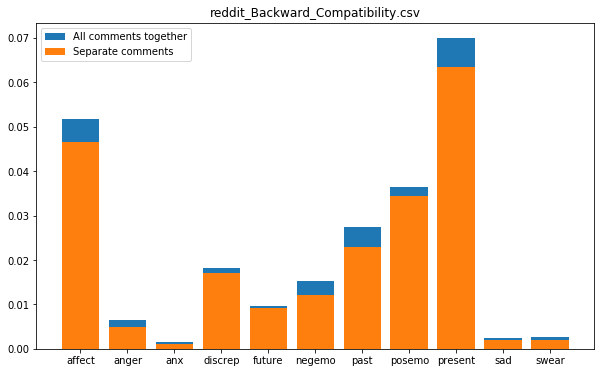

reddit_Open_platform.csv
Num posts:  476


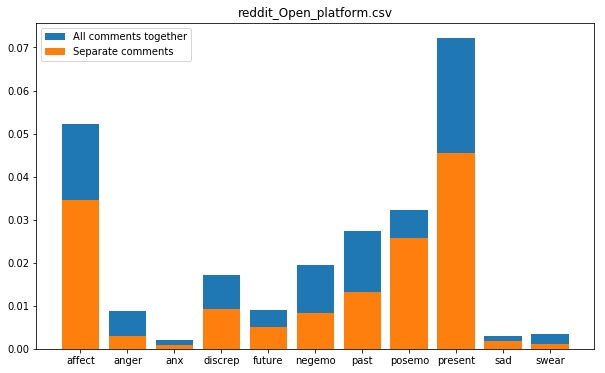

reddit_User_experience.csv
Num posts:  480


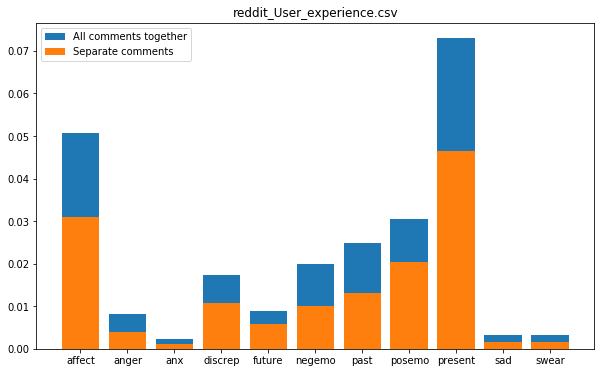

reddit_Digital_citizen.csv
Num posts:  479


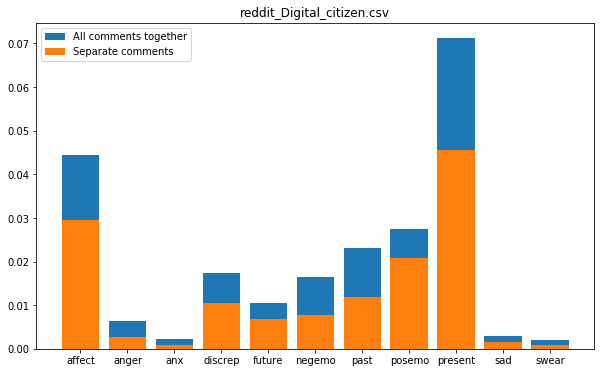

reddit_User-centered_design.csv
Num posts:  424


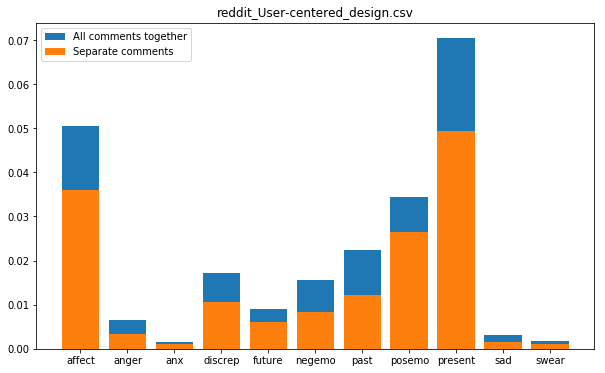

reddit_Social_learning_network.csv
Num posts:  458


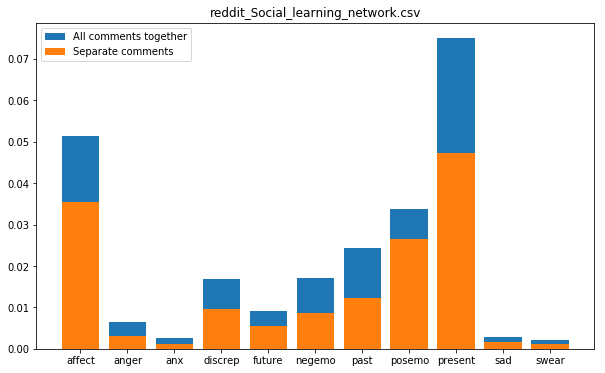

reddit_Internet_security.csv
Num posts:  493


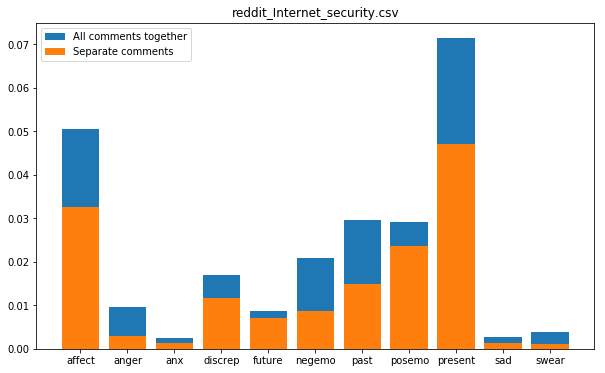

reddit_Freedom_of_speech.csv
Num posts:  460


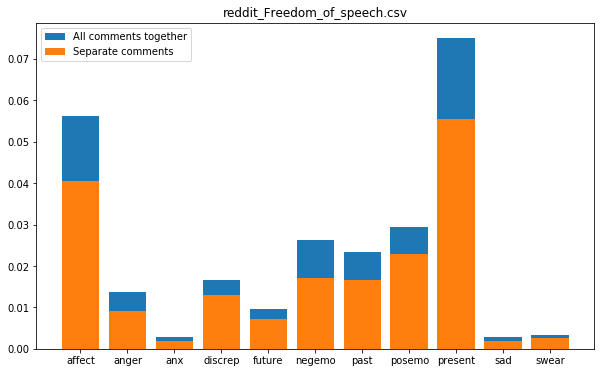

reddit_Robot_tax.csv
Num posts:  415


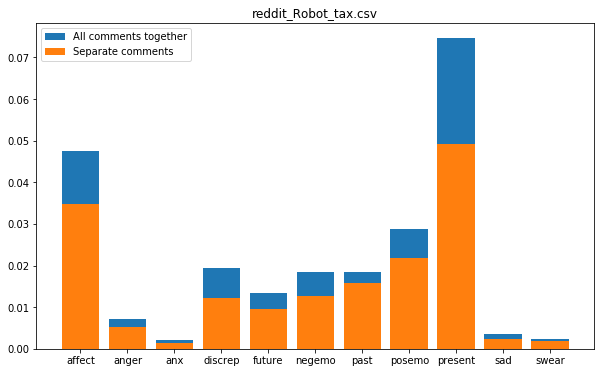

reddit_Tamper_resistance.csv
Num posts:  112


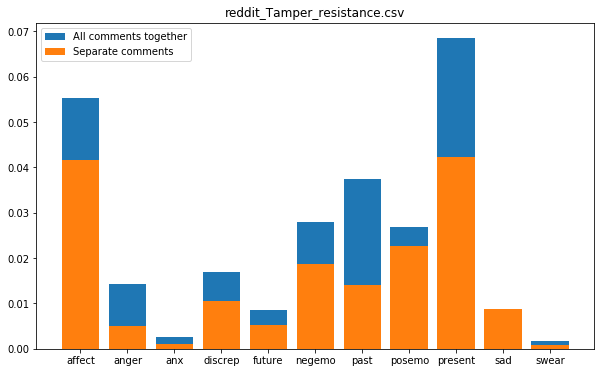

reddit_Open-source_software.csv
Num posts:  464


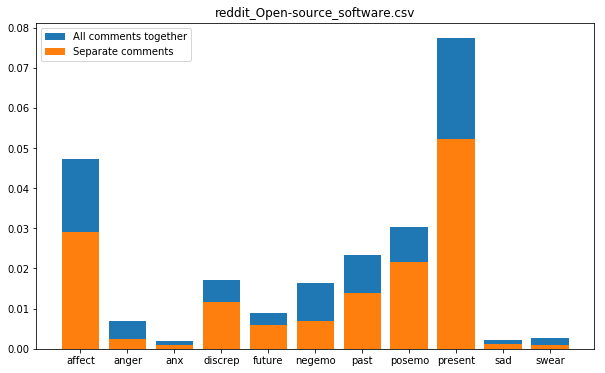

reddit_Digital_economy.csv
Num posts:  480


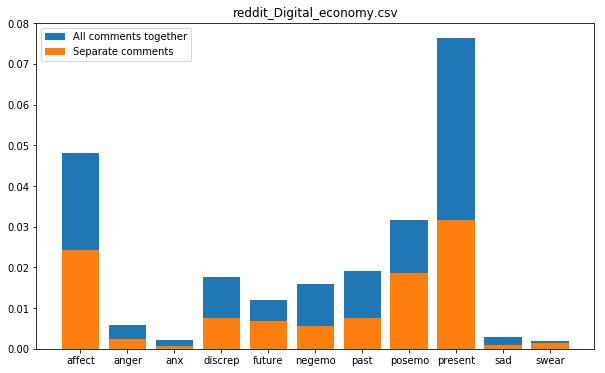

reddit_Self-management_(computer_science).csv
Num posts:  421


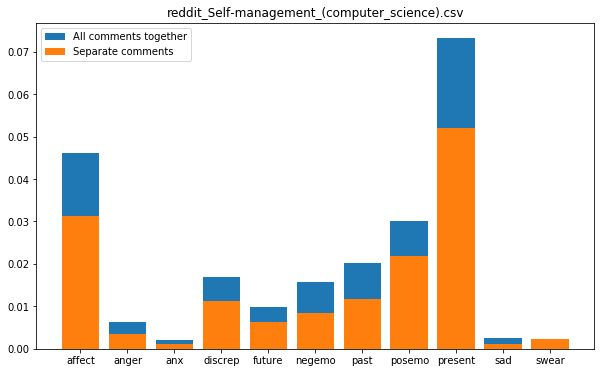

reddit_Internet_access.csv
Num posts:  435


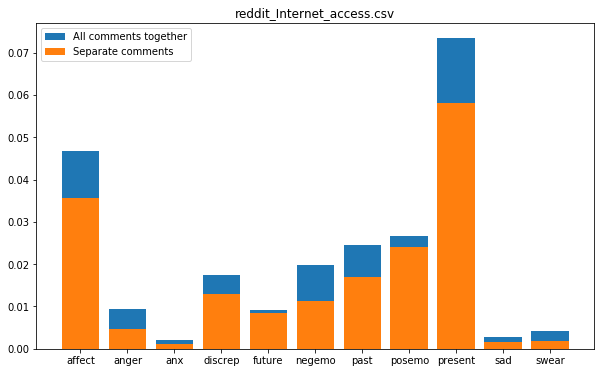

reddit_Open_access.csv
Num posts:  486


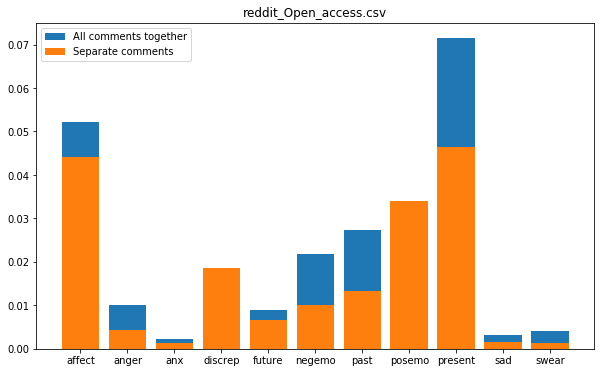

reddit_Social_objects.csv
Num posts:  476


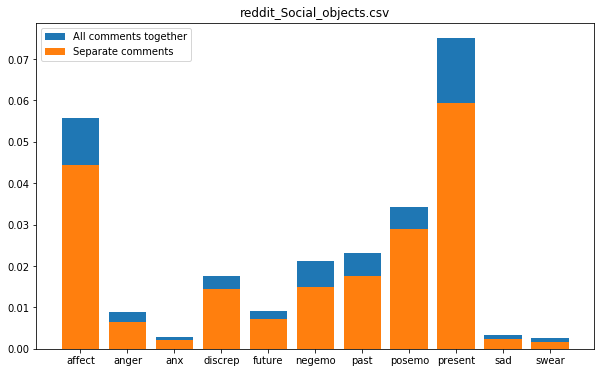

reddit_Sustainability.csv
Num posts:  476


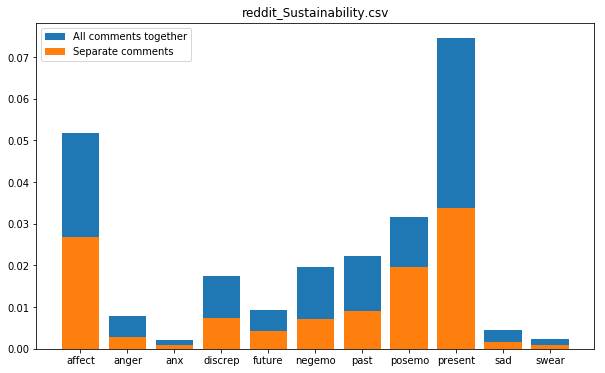

reddit_Social_media.csv
Num posts:  480


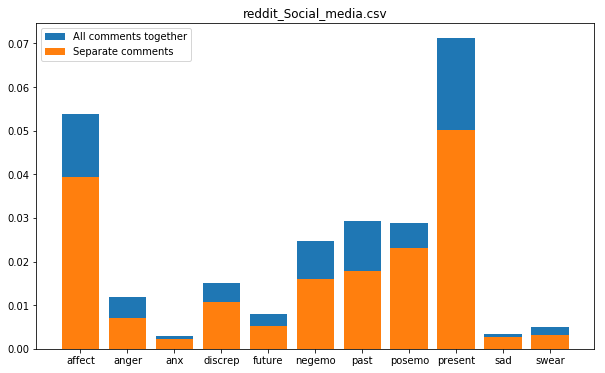

reddit_Resilience_(network).csv
Num posts:  370


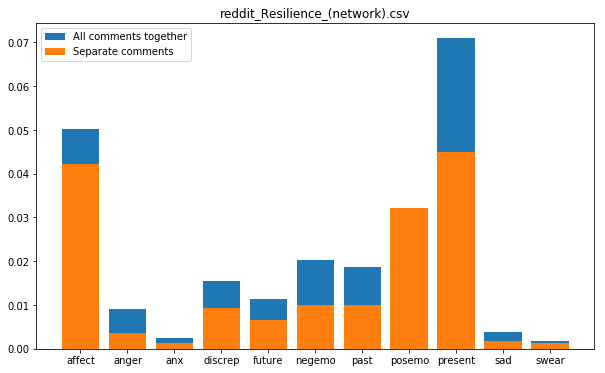

reddit_Circular_economy.csv
Num posts:  402


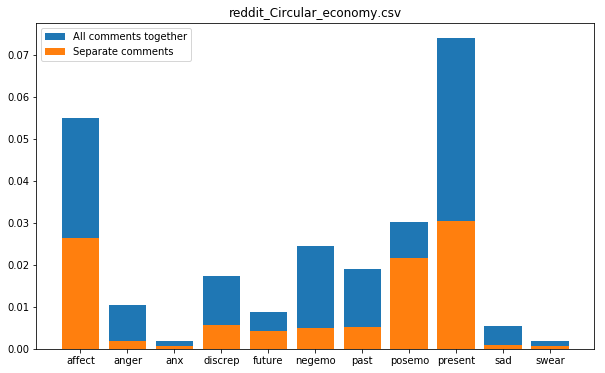

reddit_Personally_identifiable_information.csv
Num posts:  426


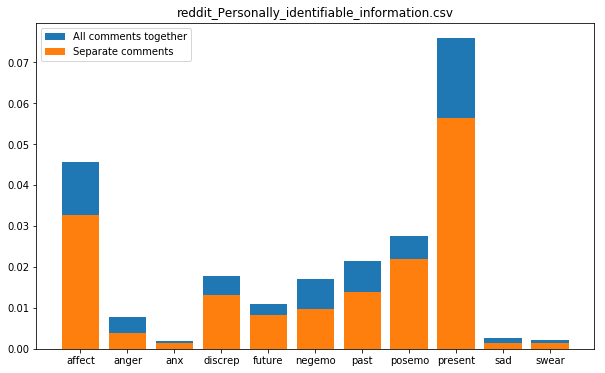

In [99]:
#Plot the sentiment analysis for a given file computed with the separate comments or all the comments together
folder = os.listdir(folderpath)
for file in folder:

    print (file)
    df = pd.read_csv(folderpath+file, index_col= 0)
    print('Num posts: ',len(df['comments_body']))
    with open (folder_to+'sentiment_tog_'+file, 'rb') as fp:
        list_all = pickle.load(fp)
    with open (folder_to+'sentiment_sep_'+file,  'rb') as fp:
        list_separate = pickle.load(fp)
    plt.figure(figsize=(10,6));
    plt.title(file)
    plt.bar(keys, list_all, label='All comments together')
    plt.bar(keys, list_separate, label="Separate comments")
    plt.legend()
    plt.show()


### Plot: number of comments each year/ number of comments each month, for all comments

Num posts: 445


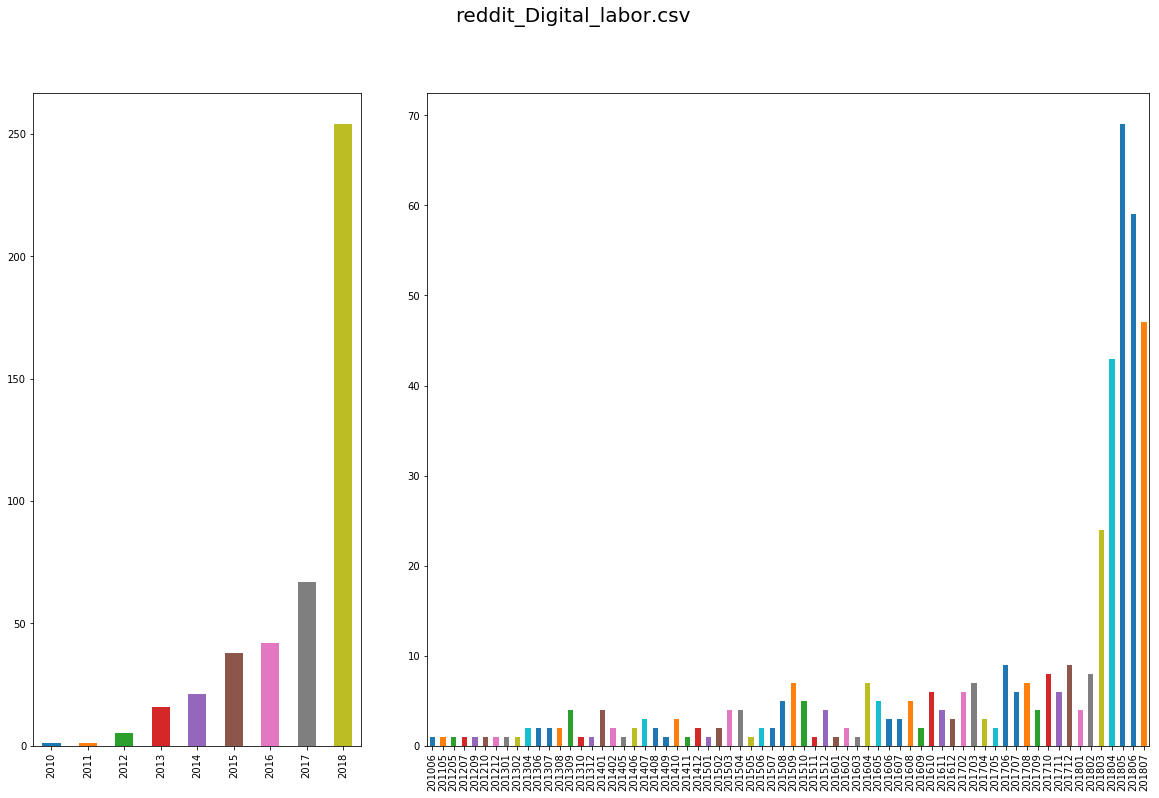

Num posts: 455


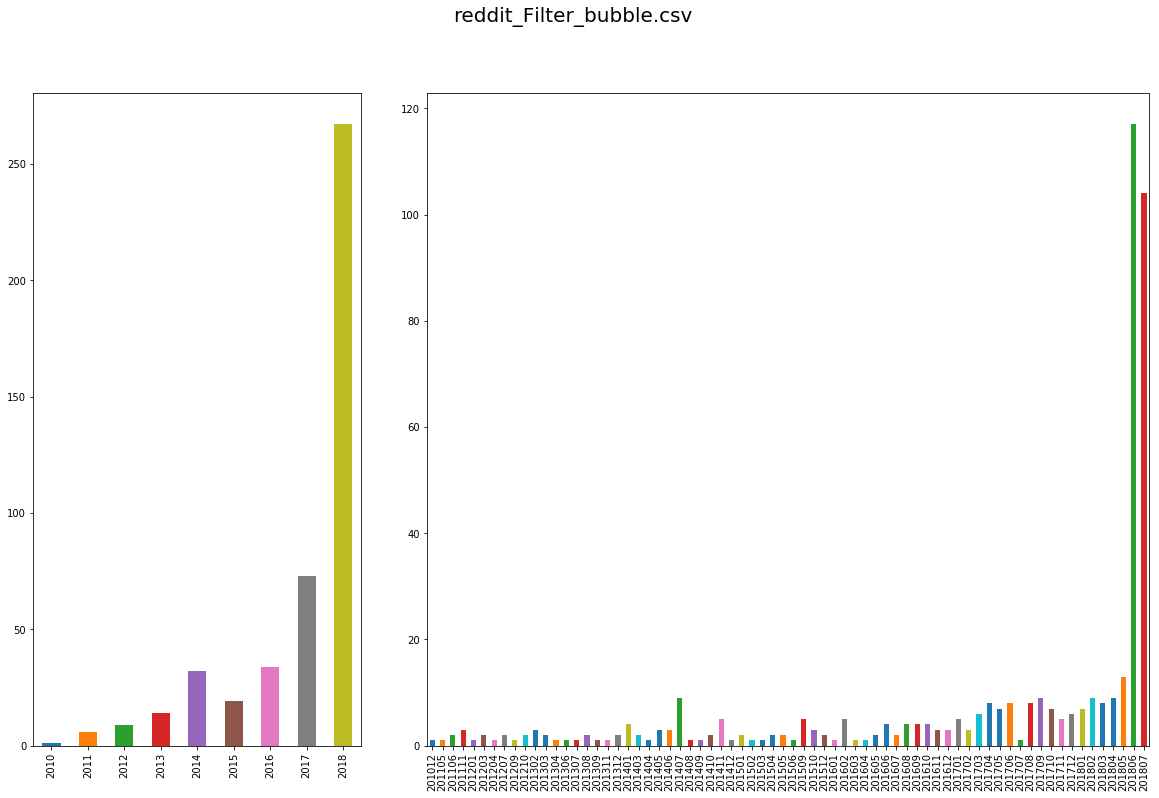

Num posts: 413


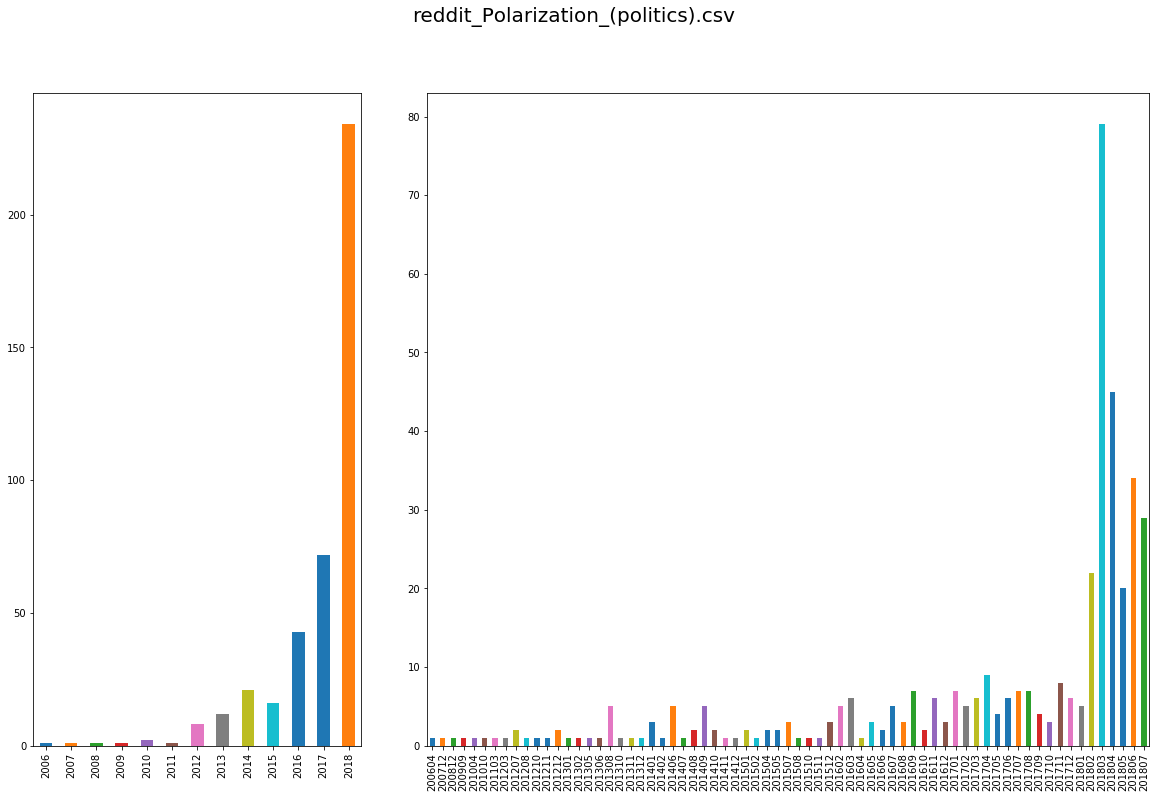

Num posts: 490


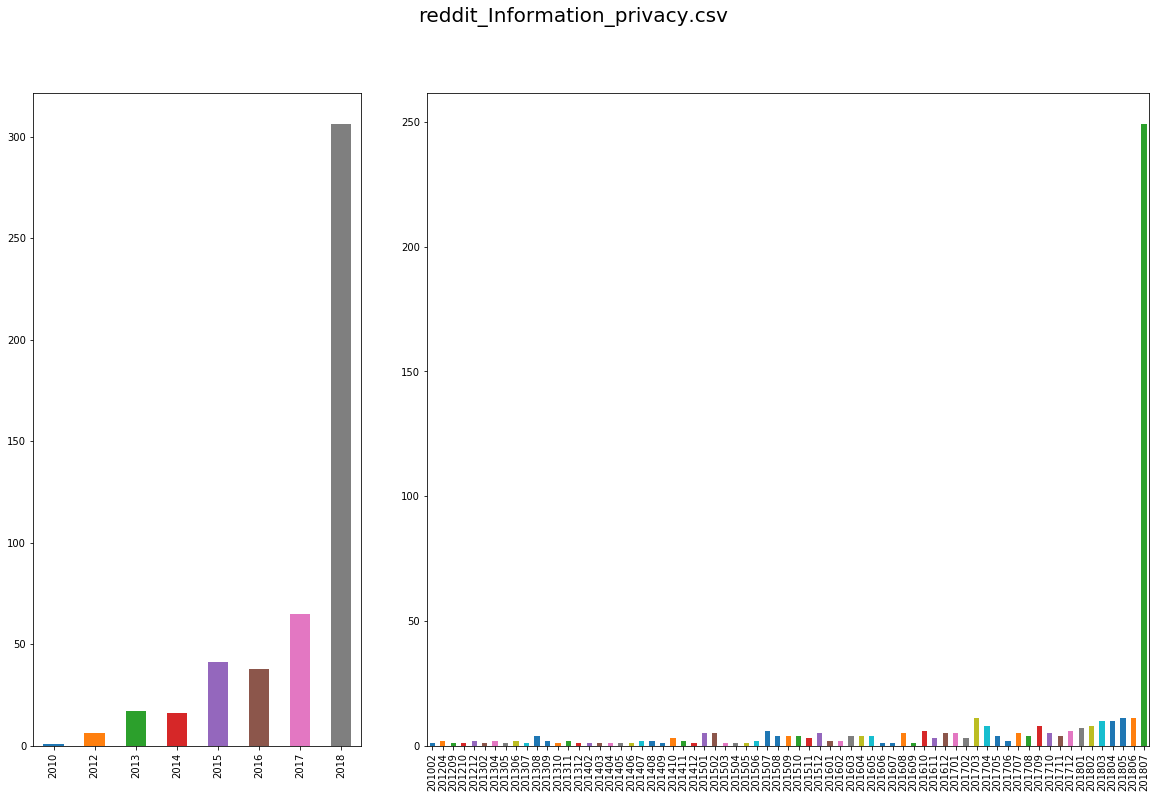

Num posts: 457


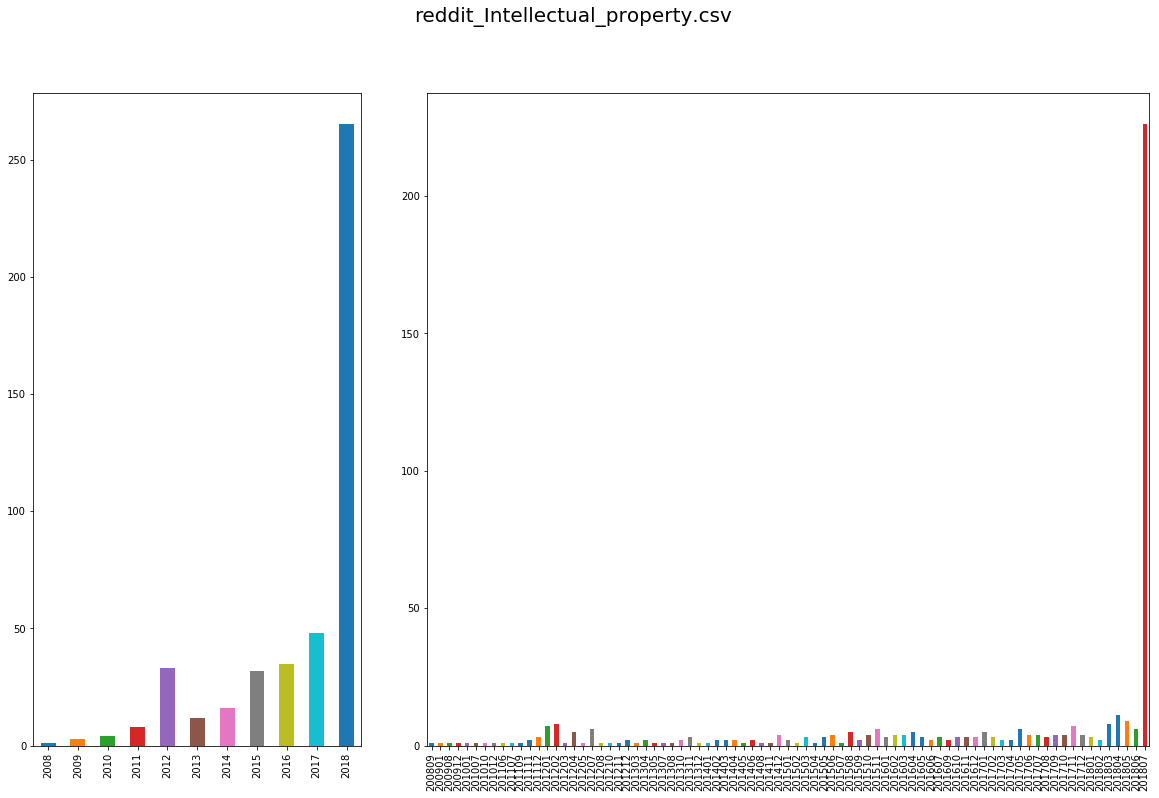

Num posts: 472


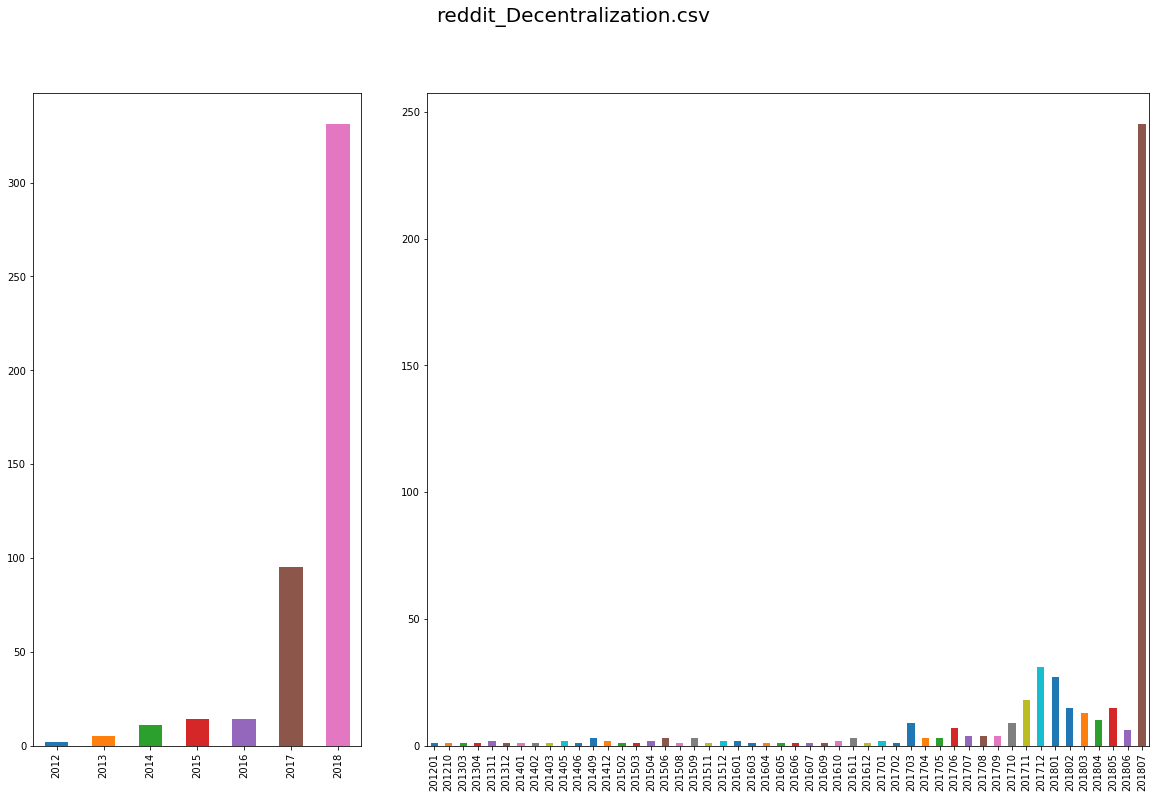

Num posts: 484


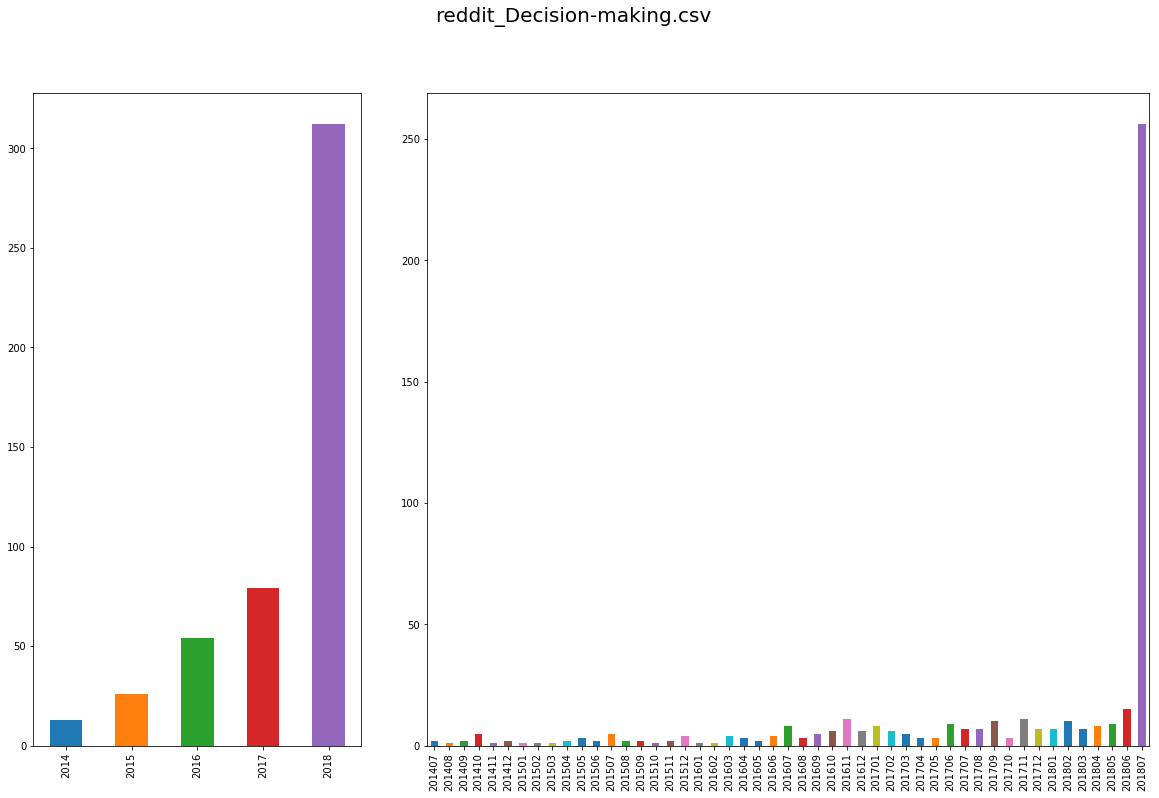

Num posts: 481


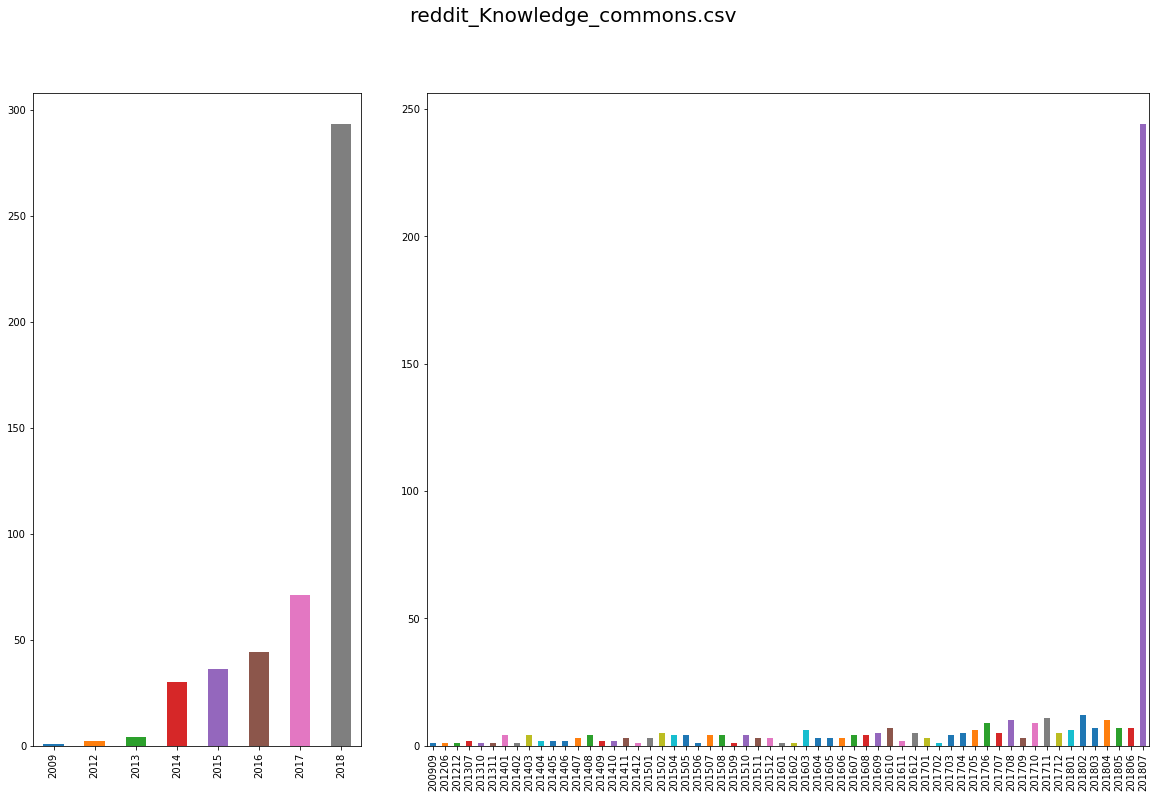

Num posts: 463


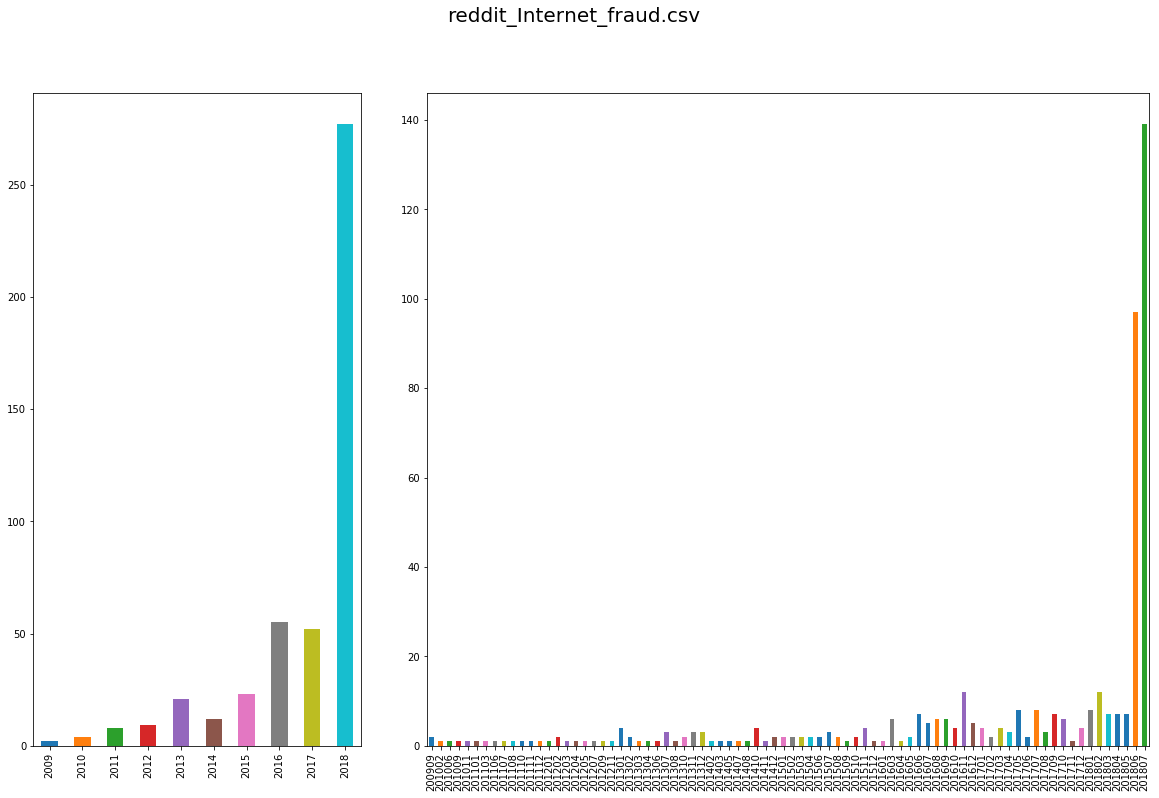

Num posts: 469


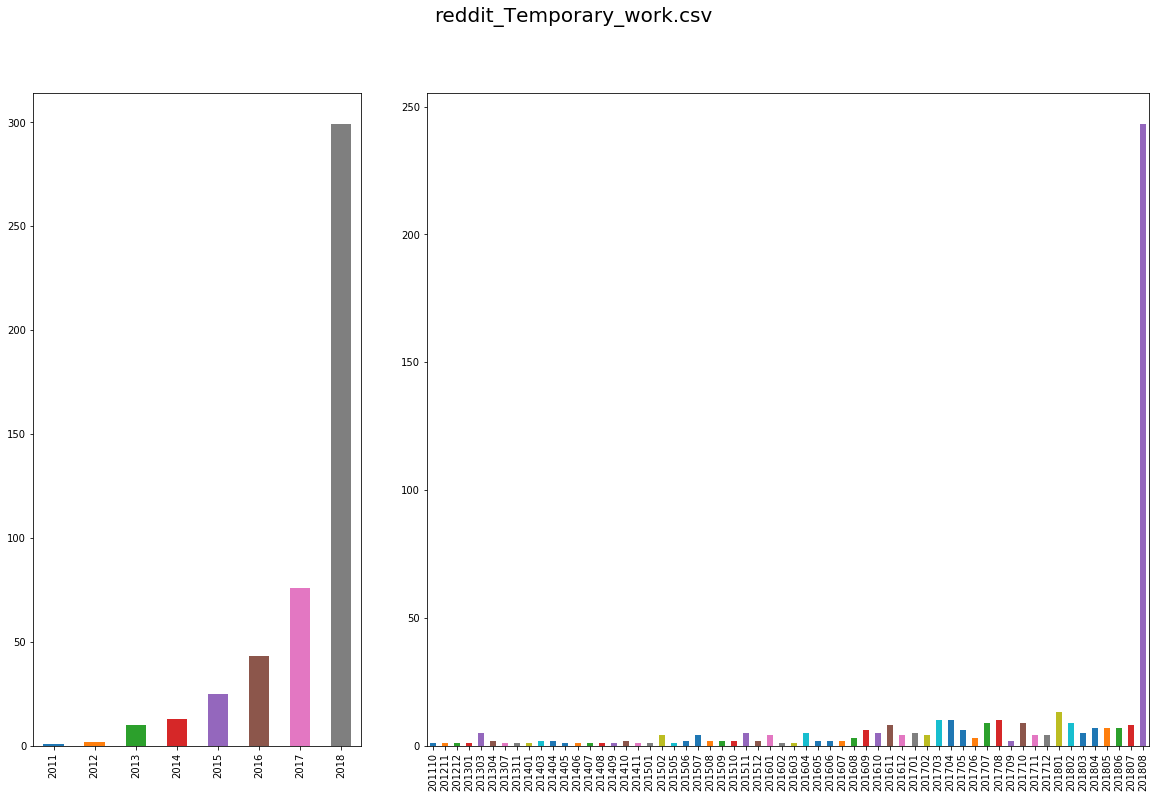

Num posts: 485


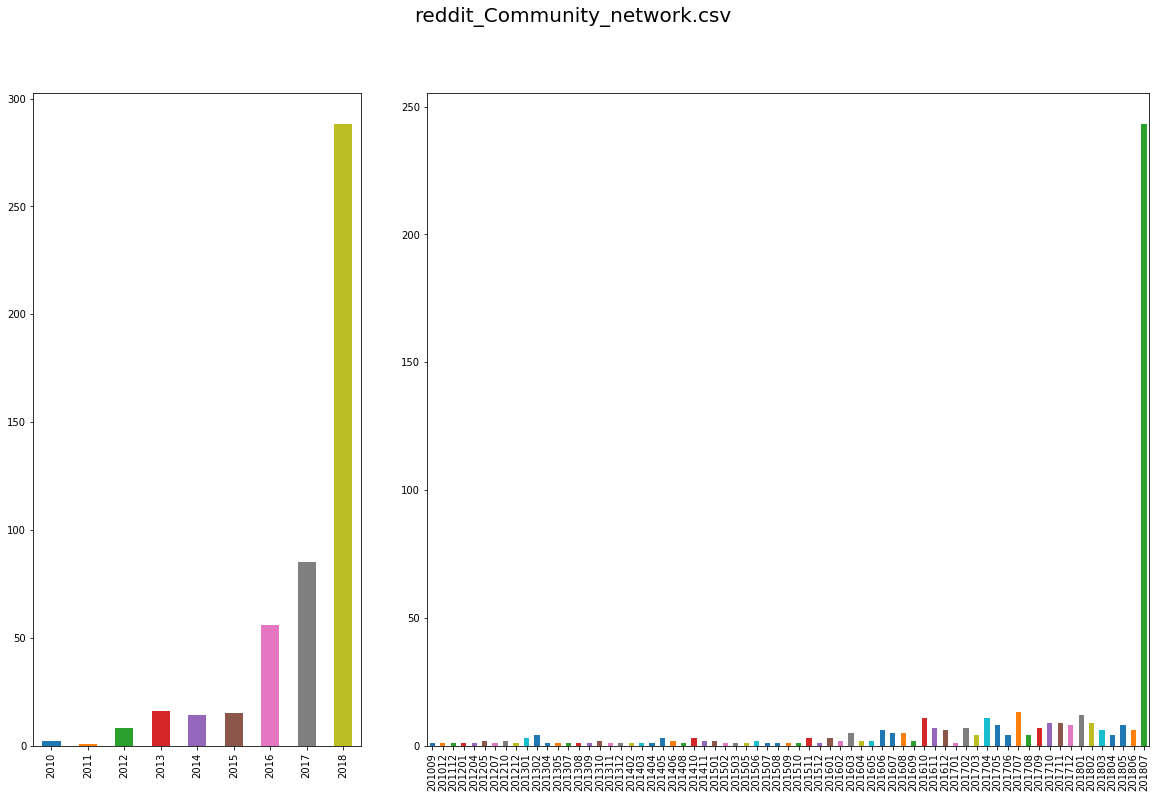

Num posts: 469


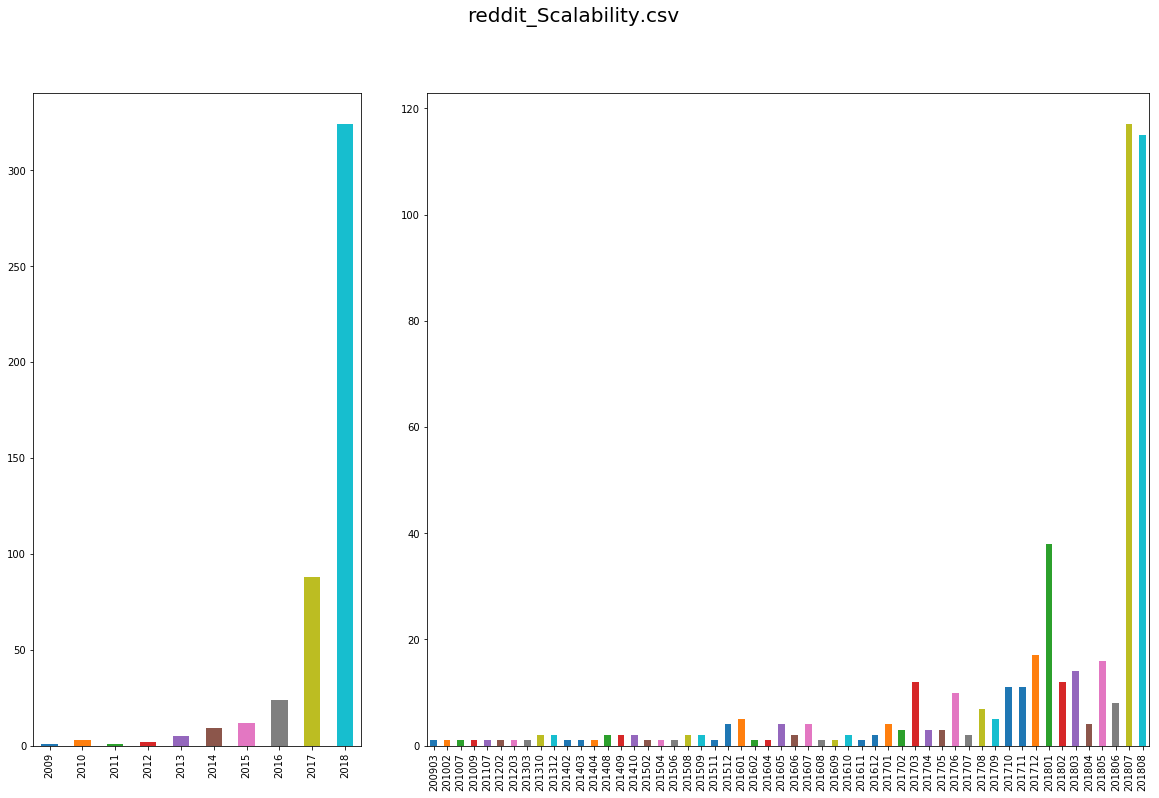

Num posts: 455


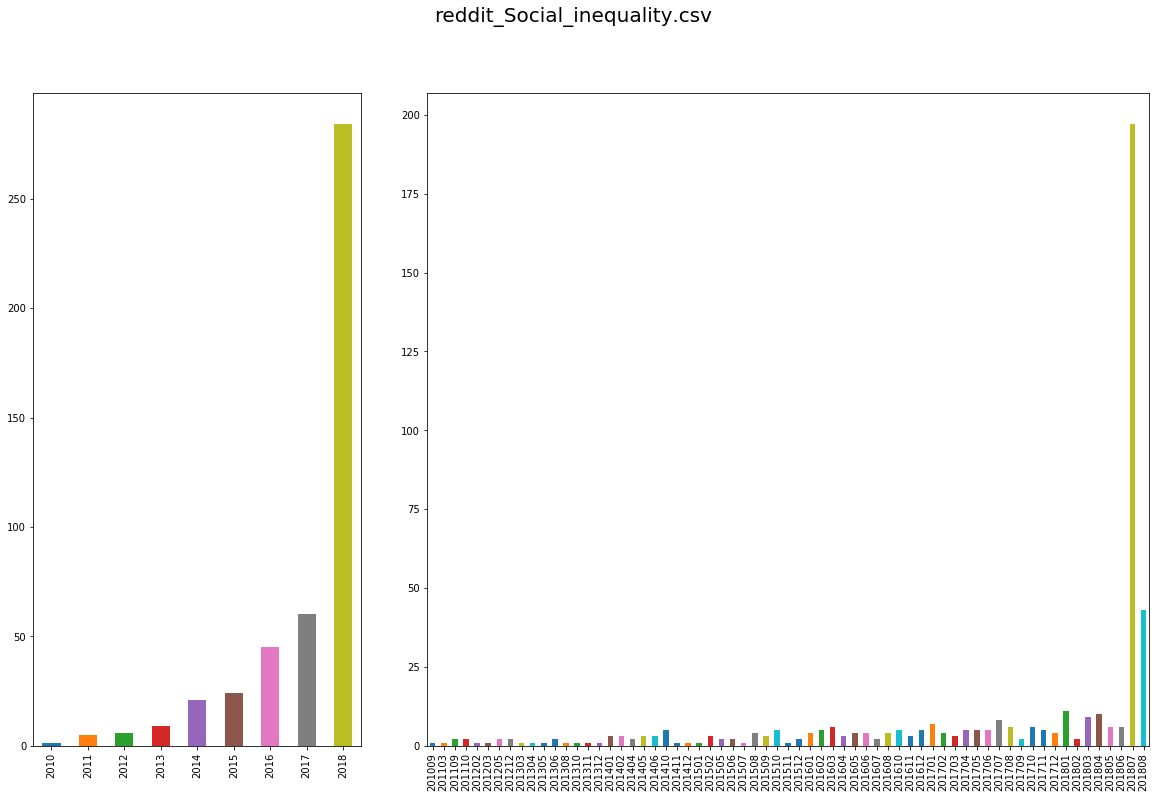

Num posts: 440


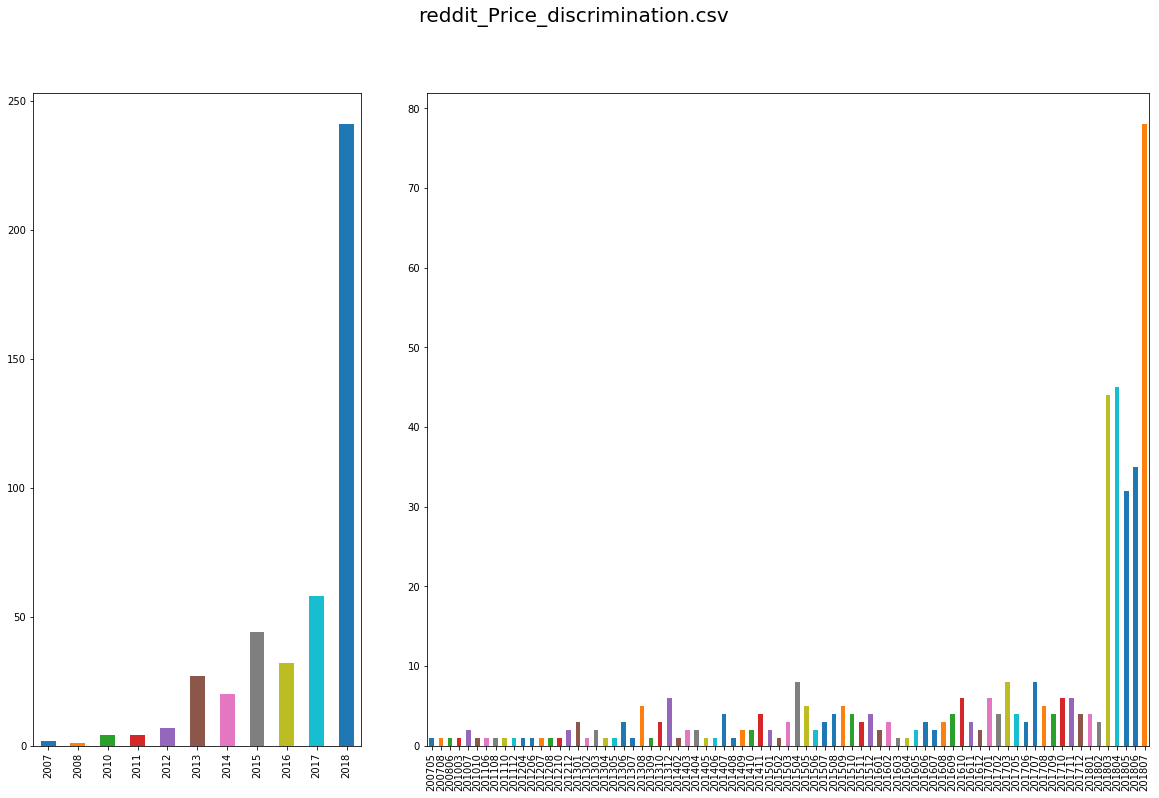

Num posts: 100


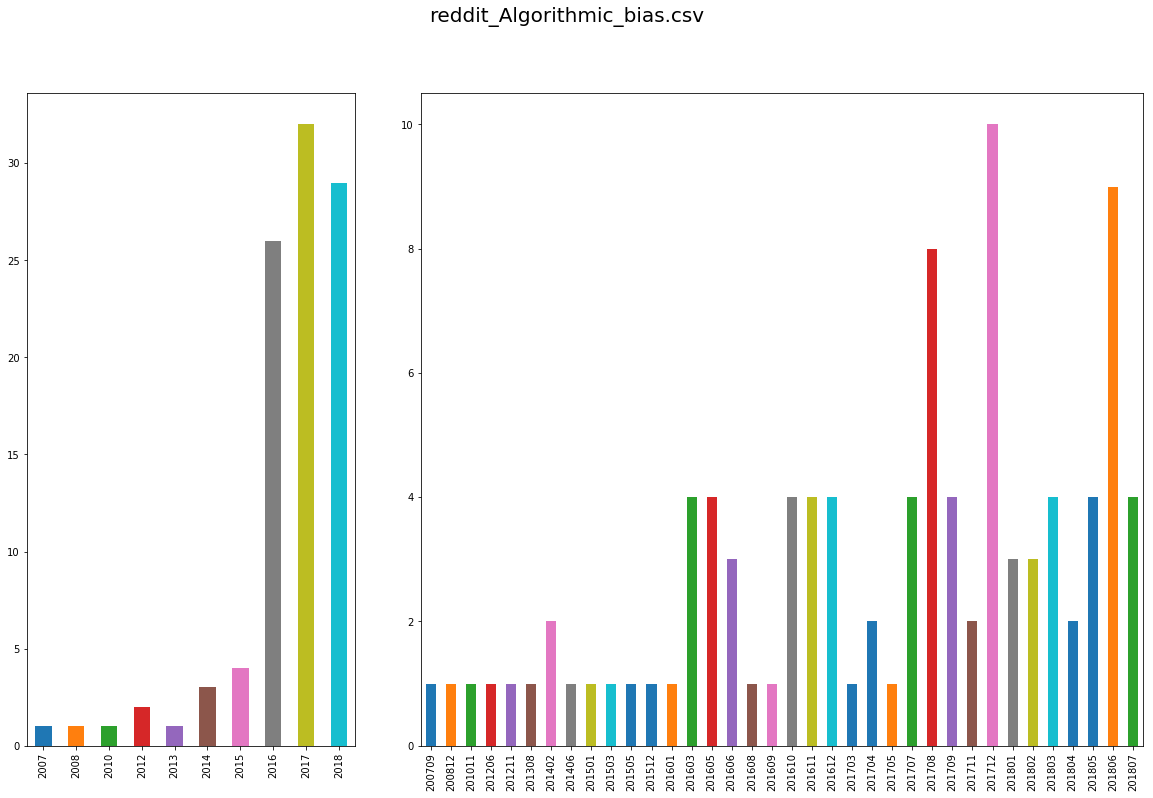

Num posts: 480


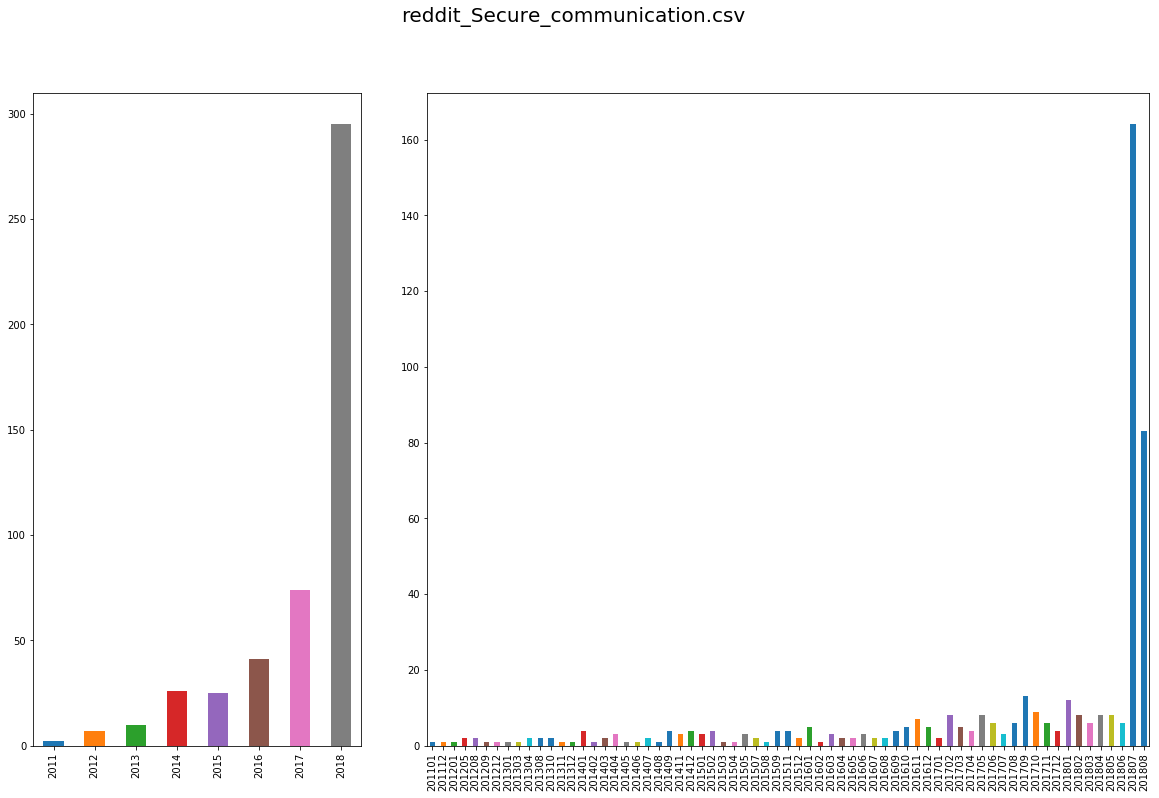

Num posts: 460


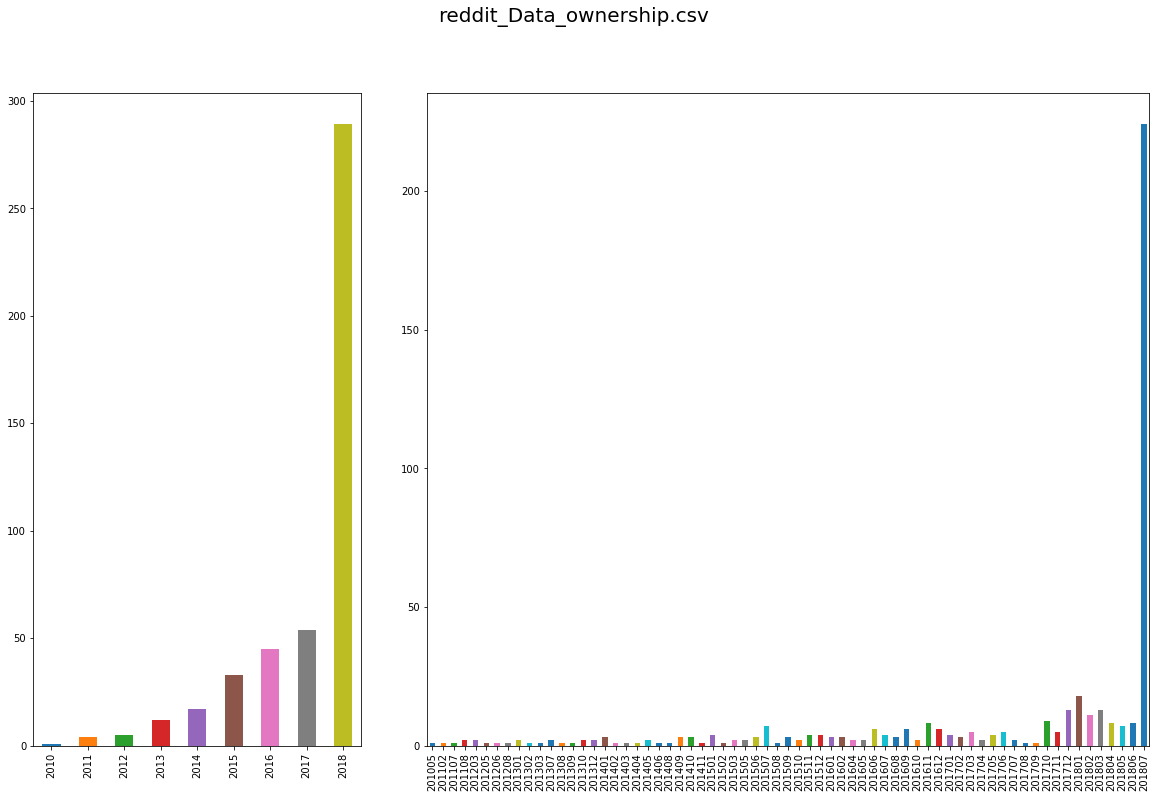

Num posts: 472


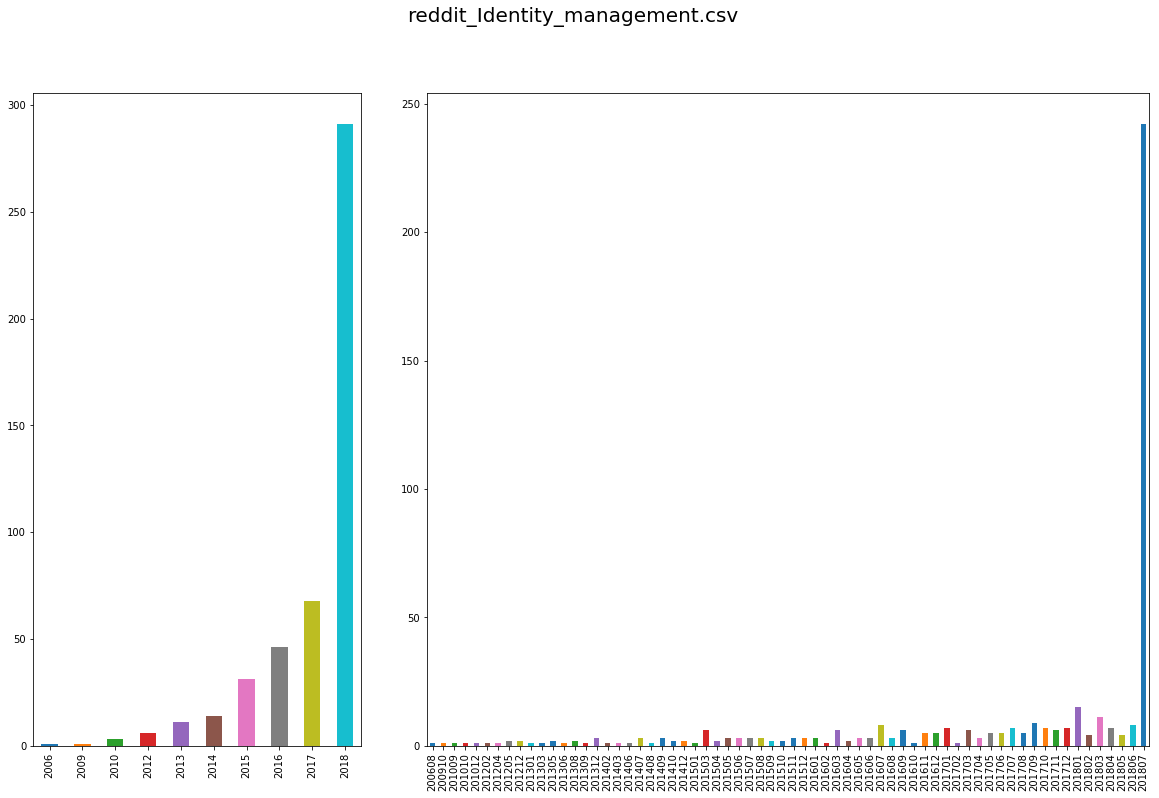

Num posts: 459


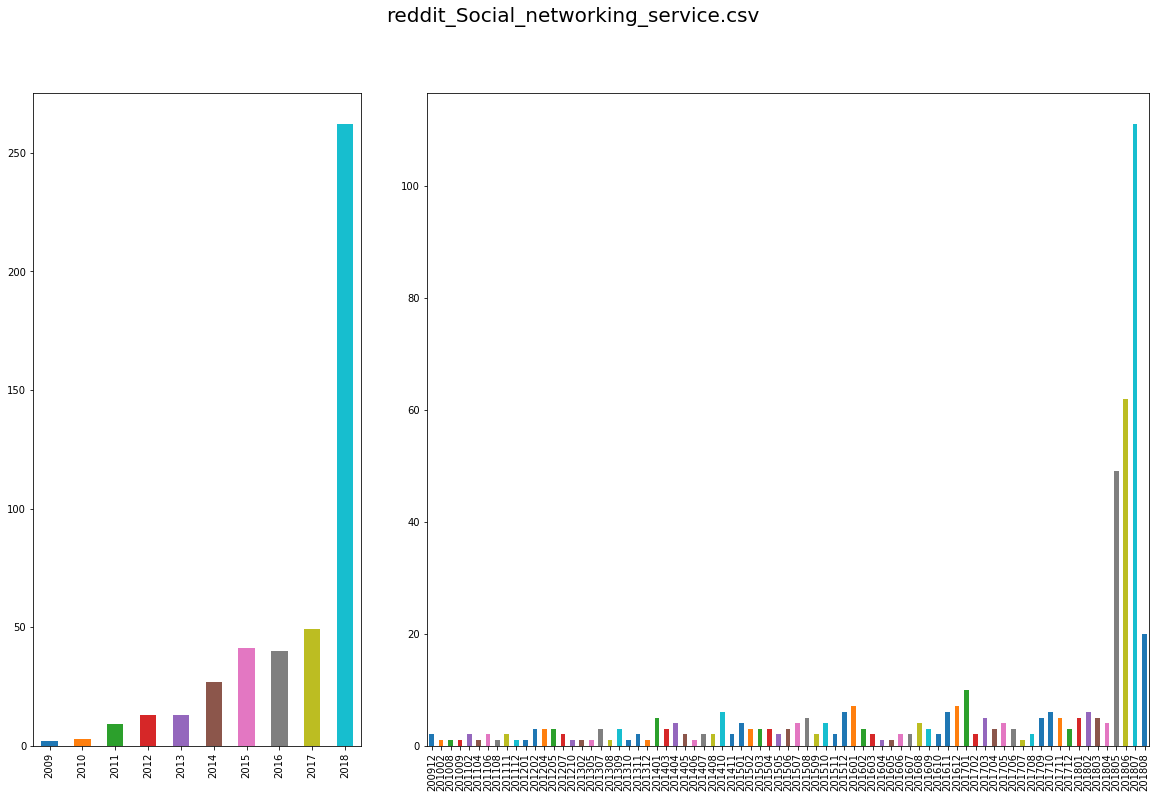

Num posts: 474


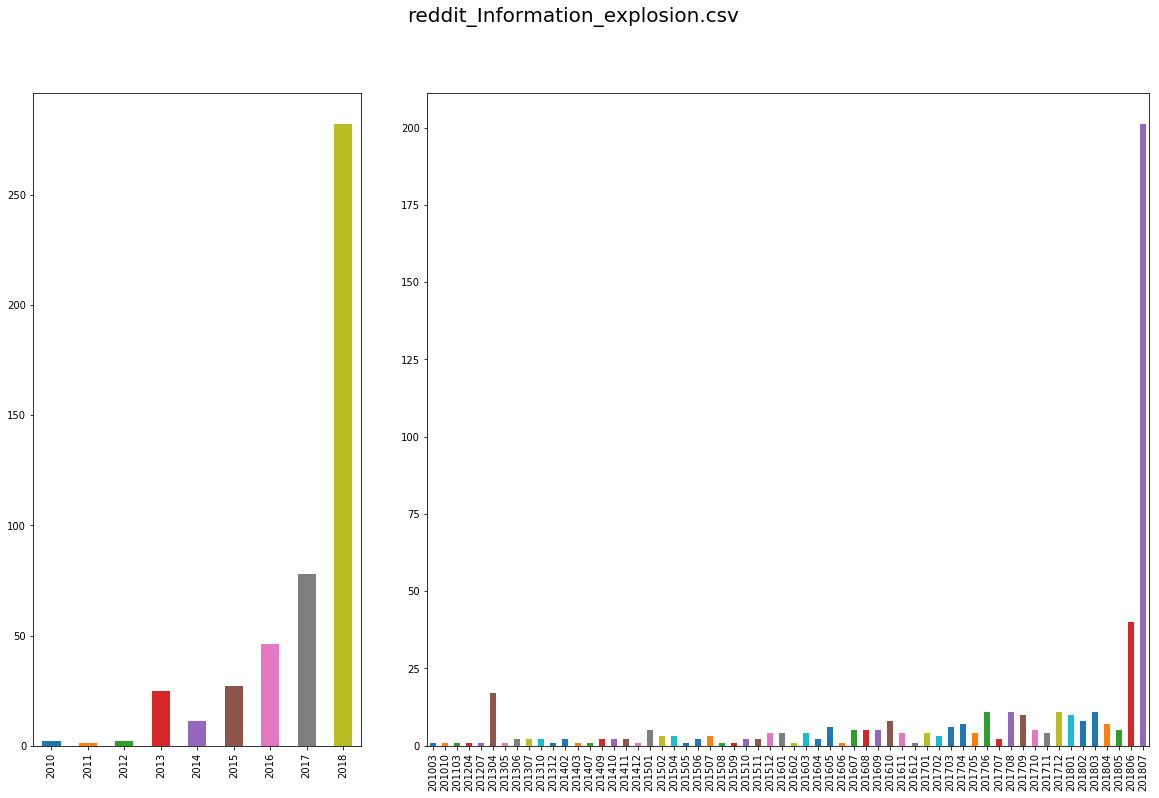

Num posts: 483


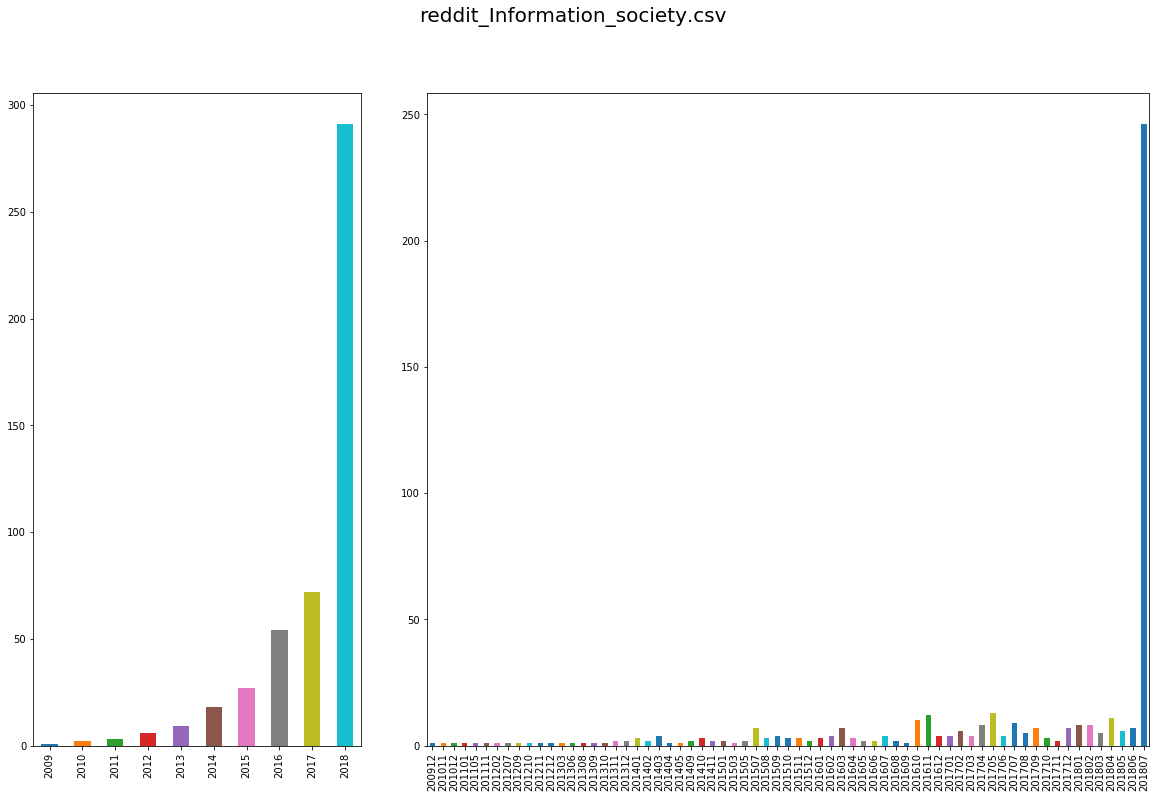

Num posts: 351


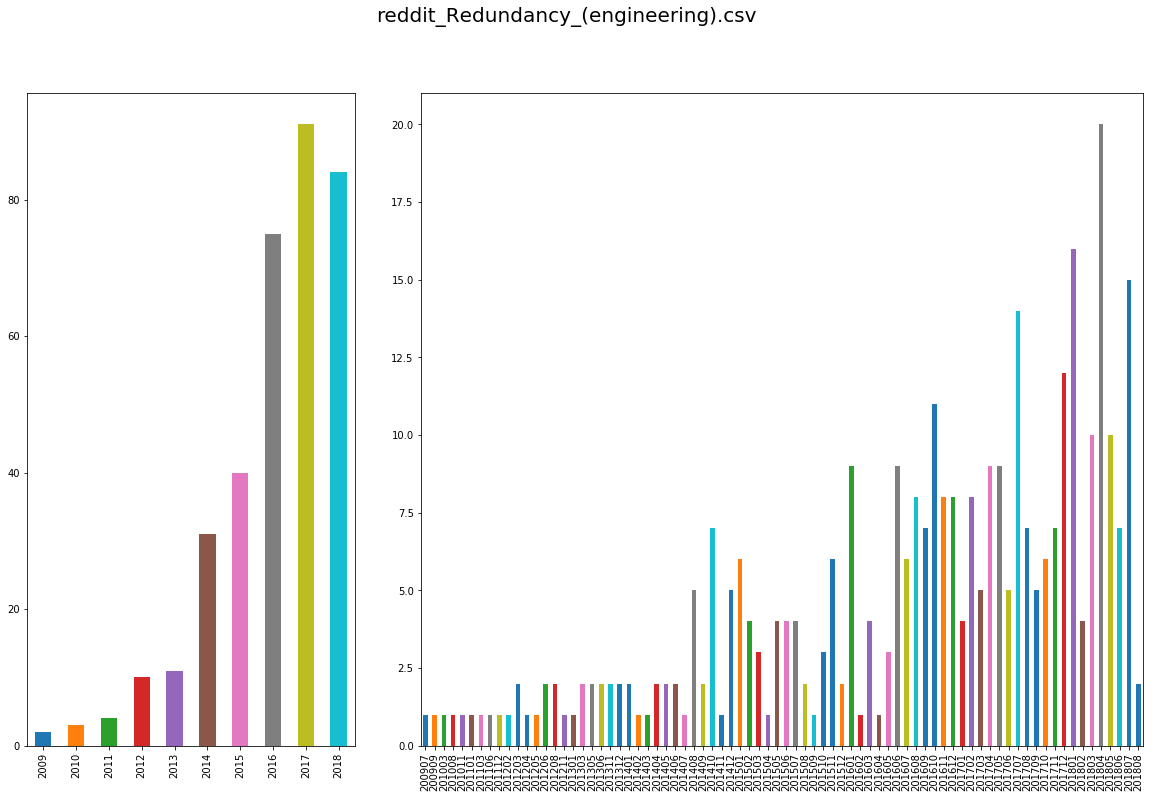

Num posts: 485


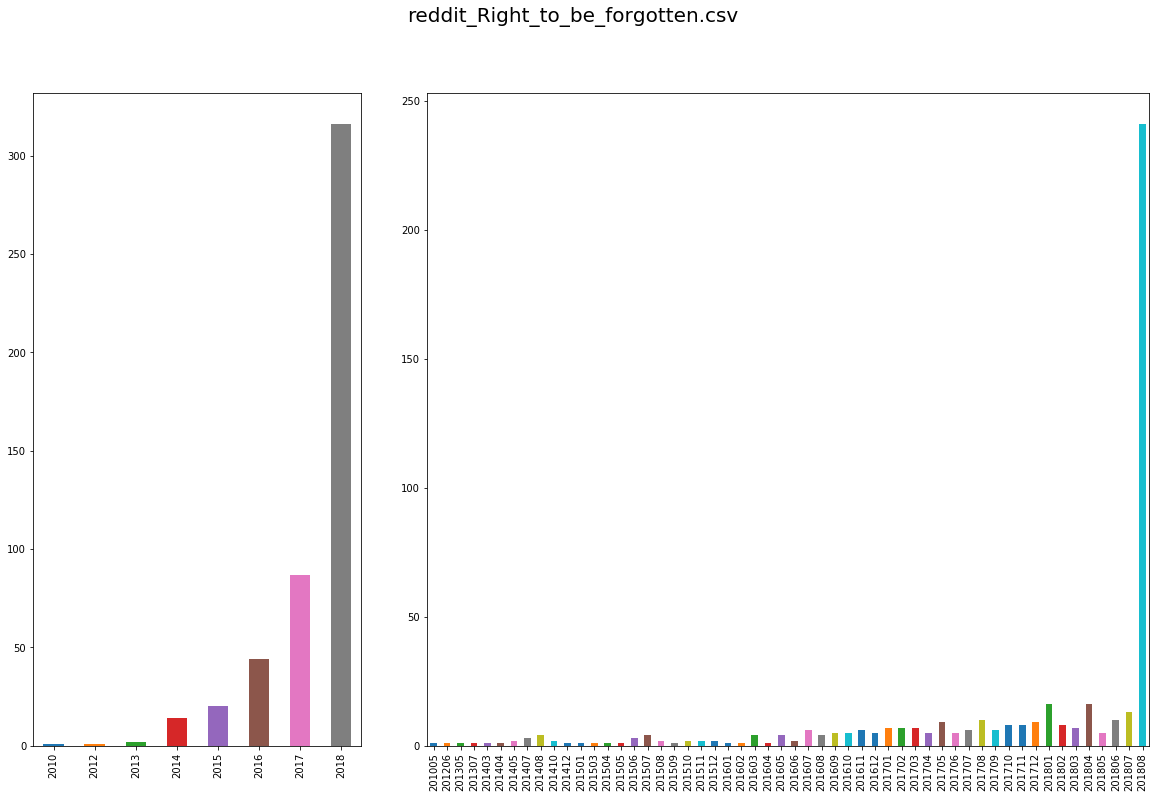

Num posts: 442


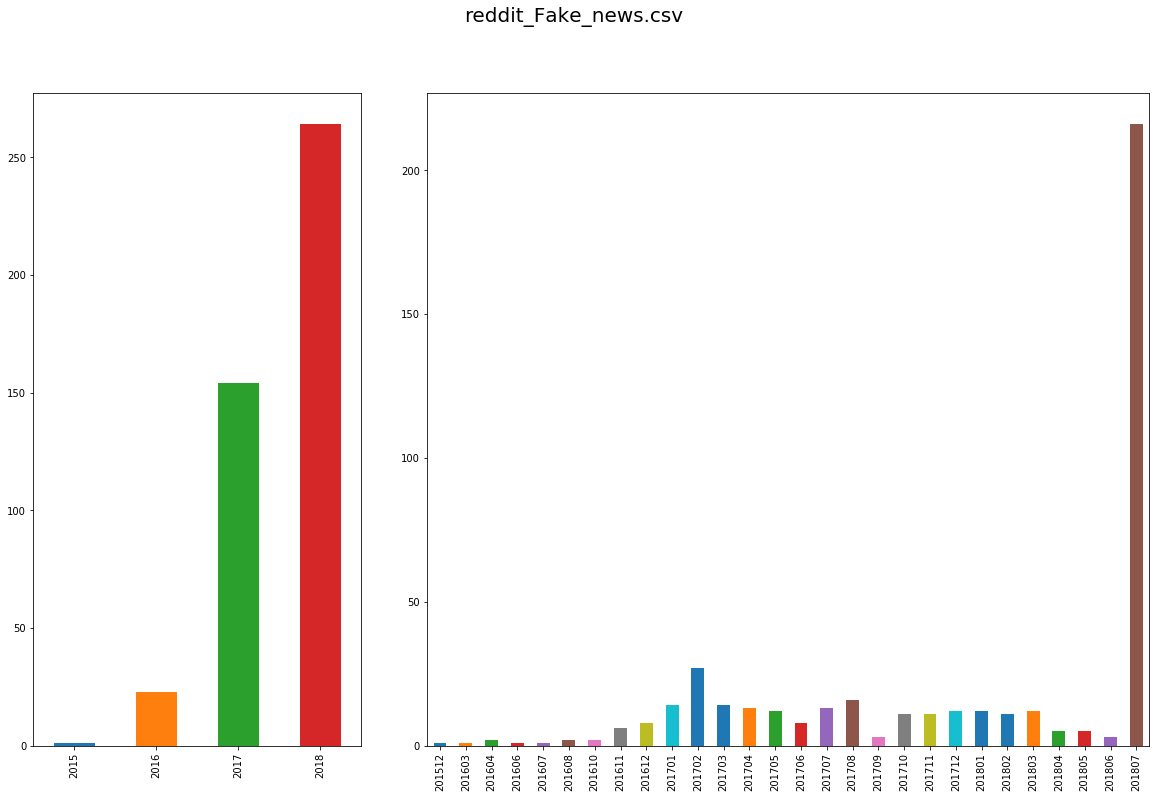

Num posts: 477


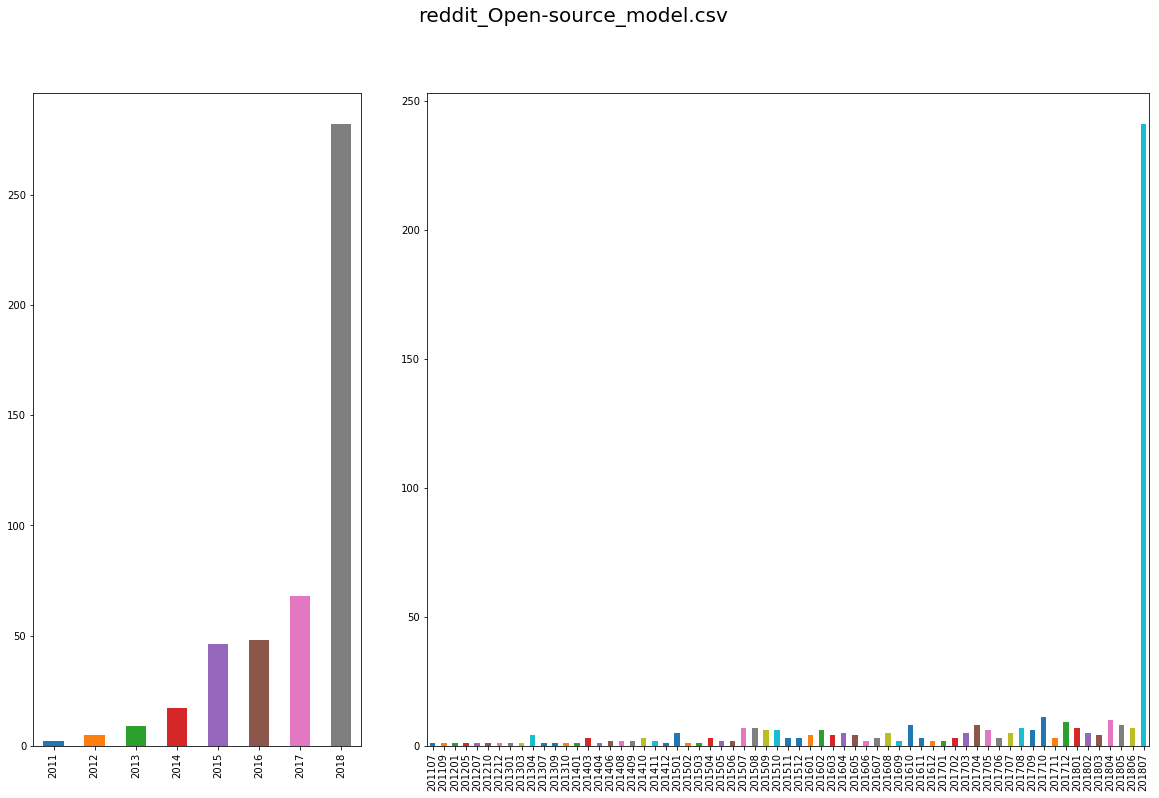

Num posts: 456


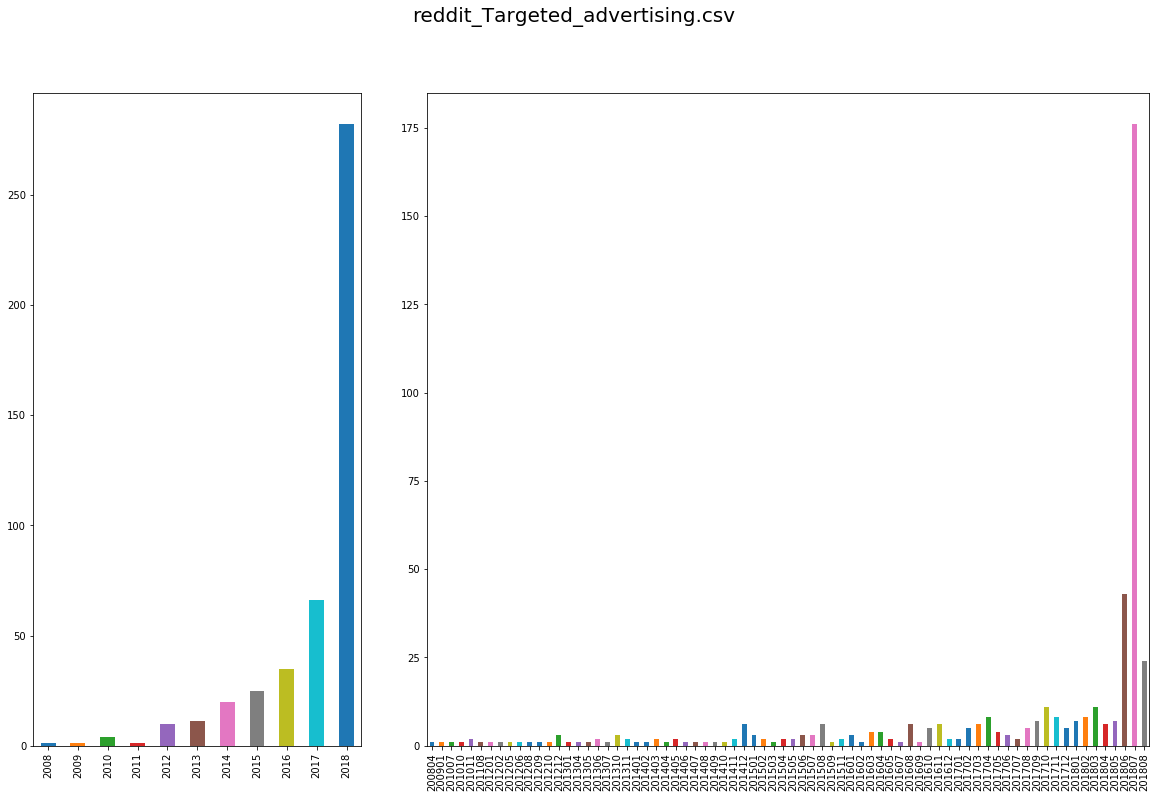

Num posts: 471


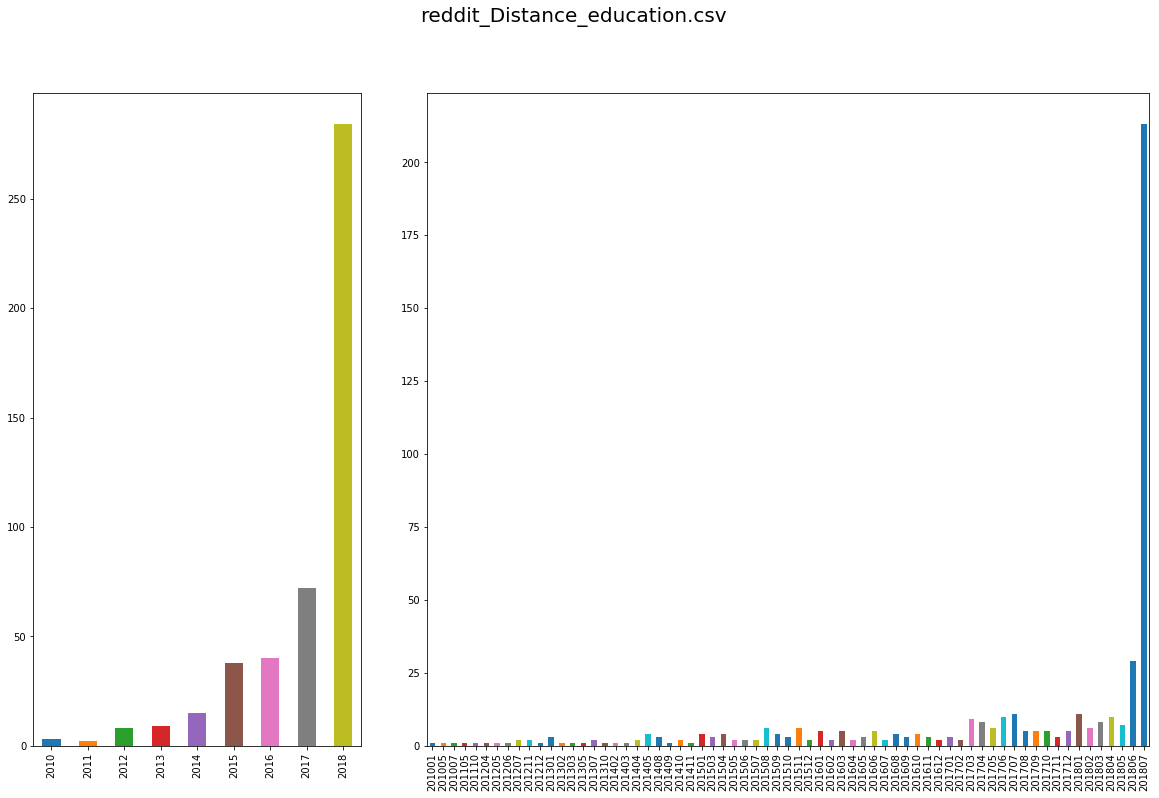

Num posts: 466


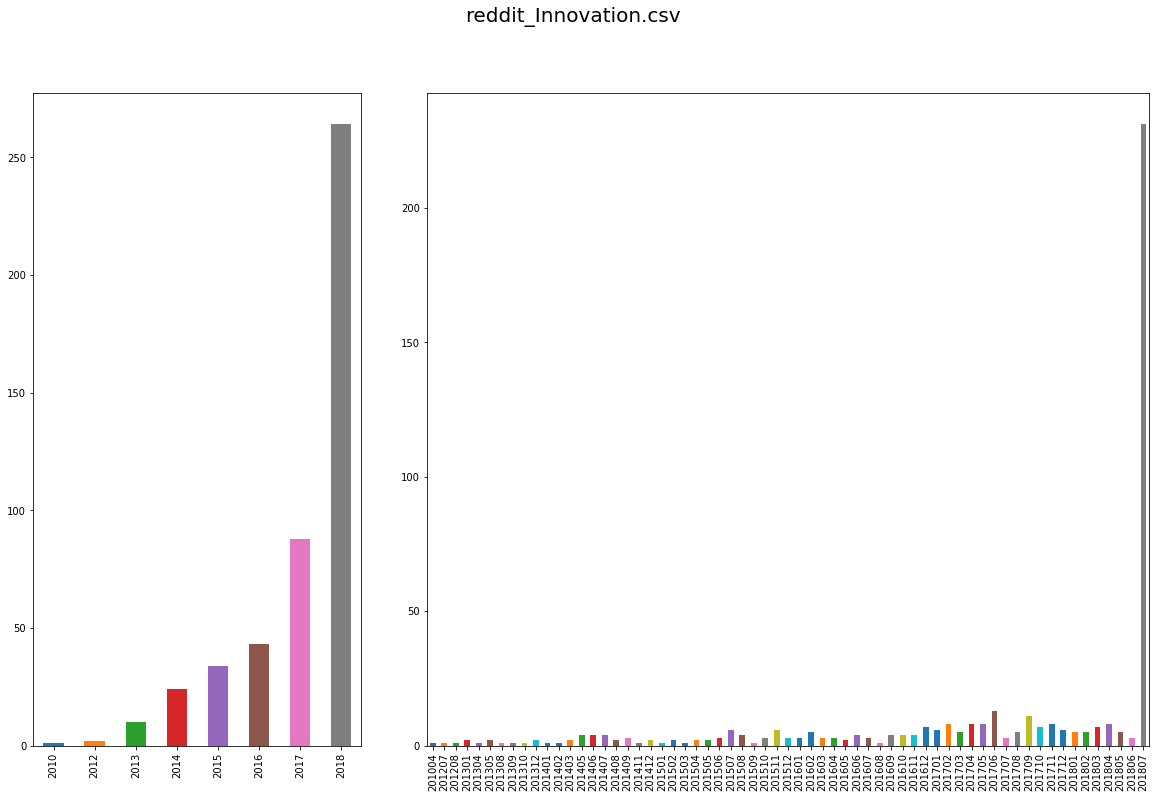

Num posts: 480


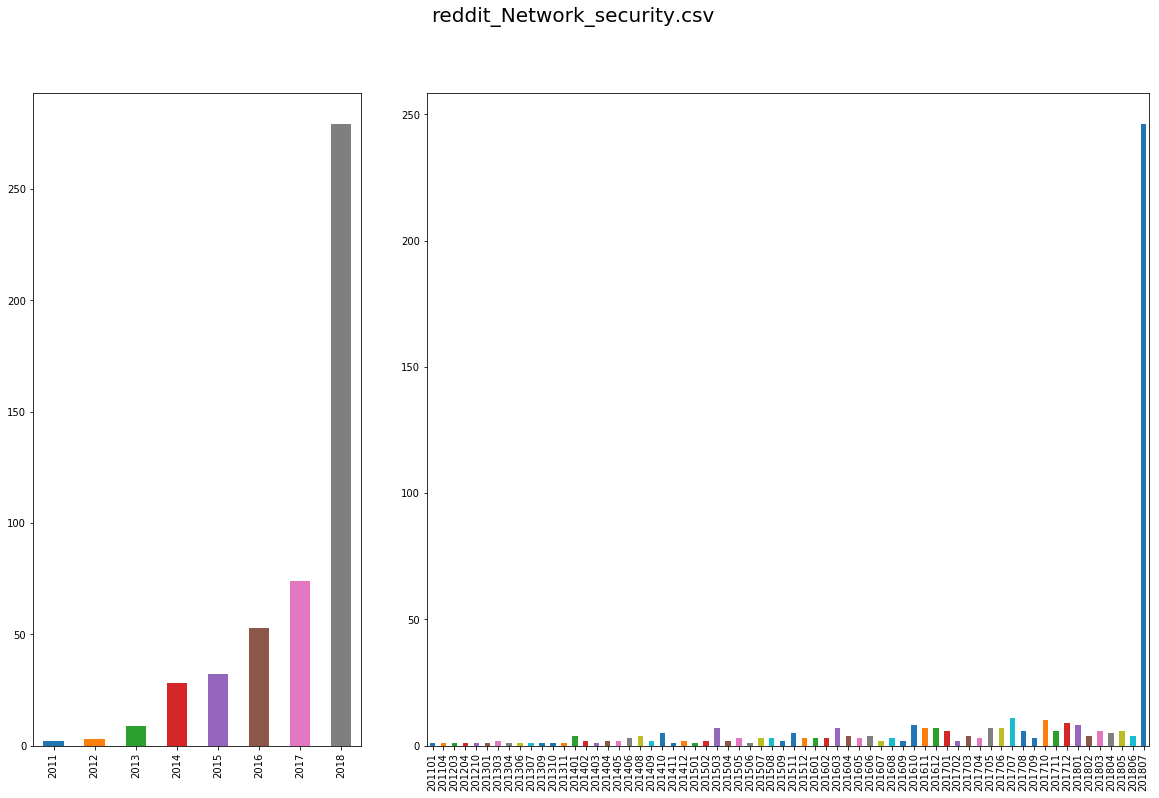

Num posts: 459


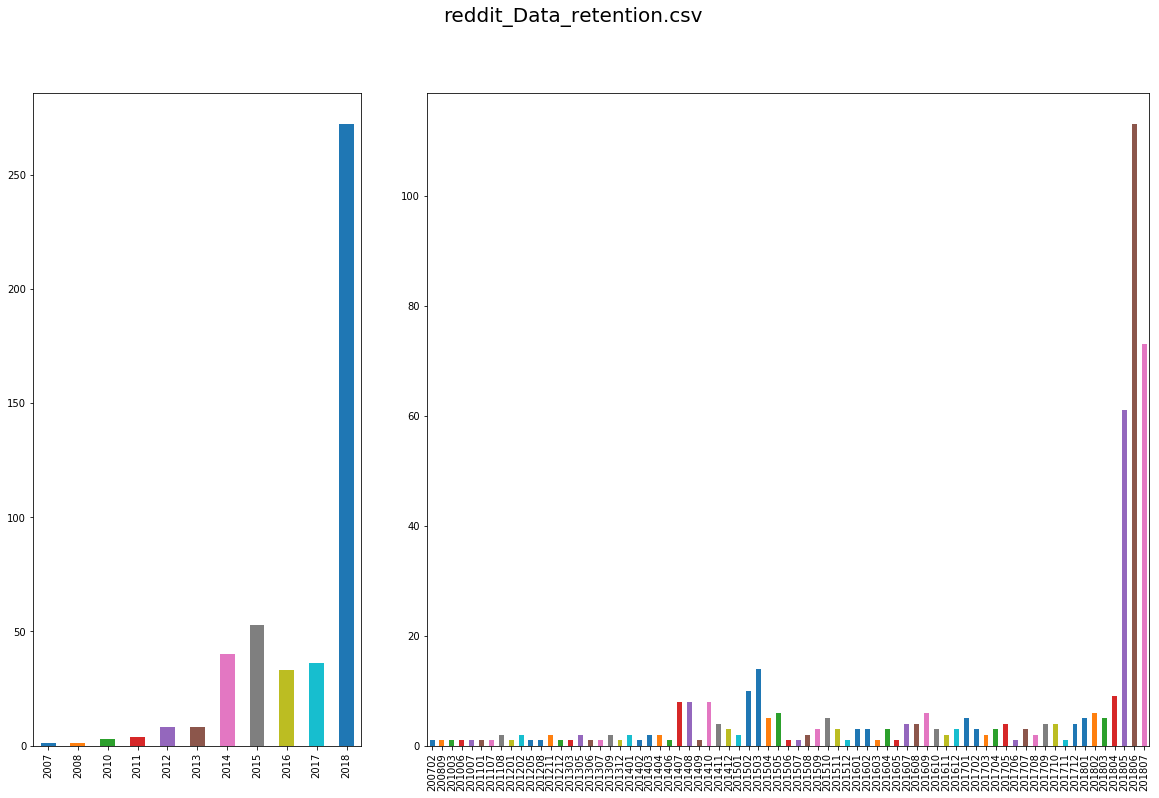

Num posts: 440


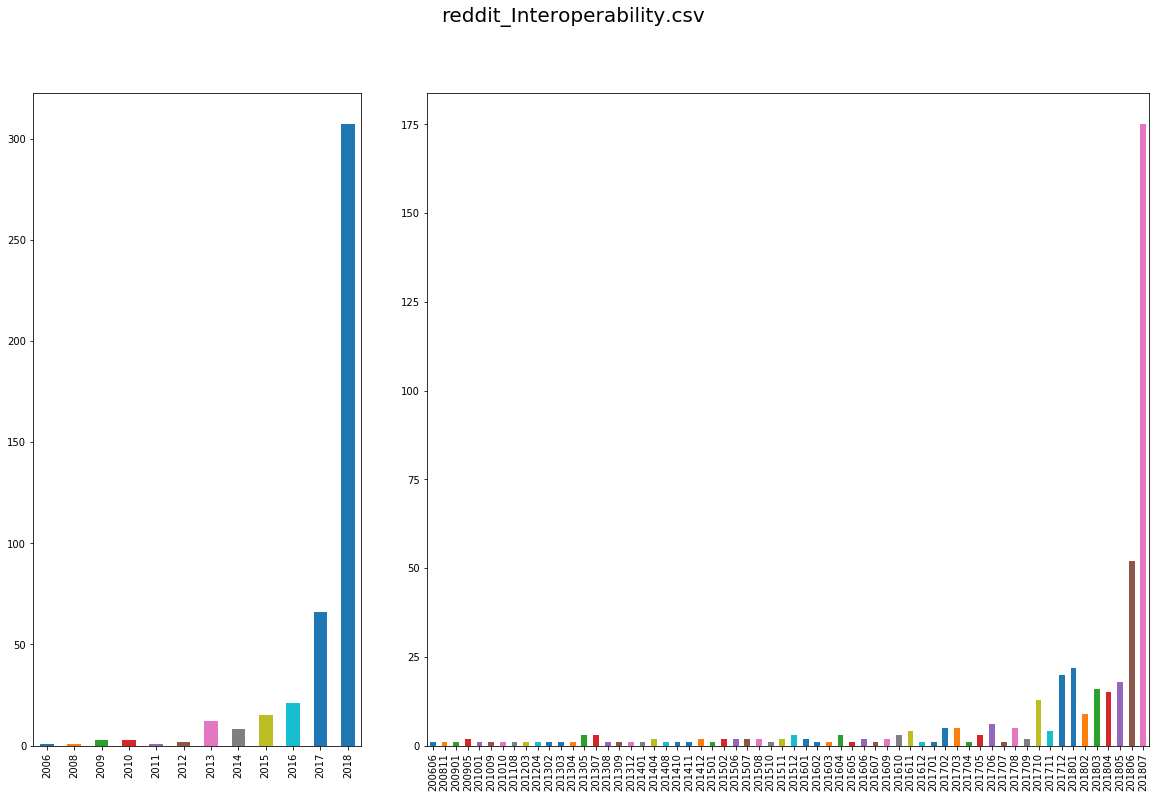

Num posts: 57


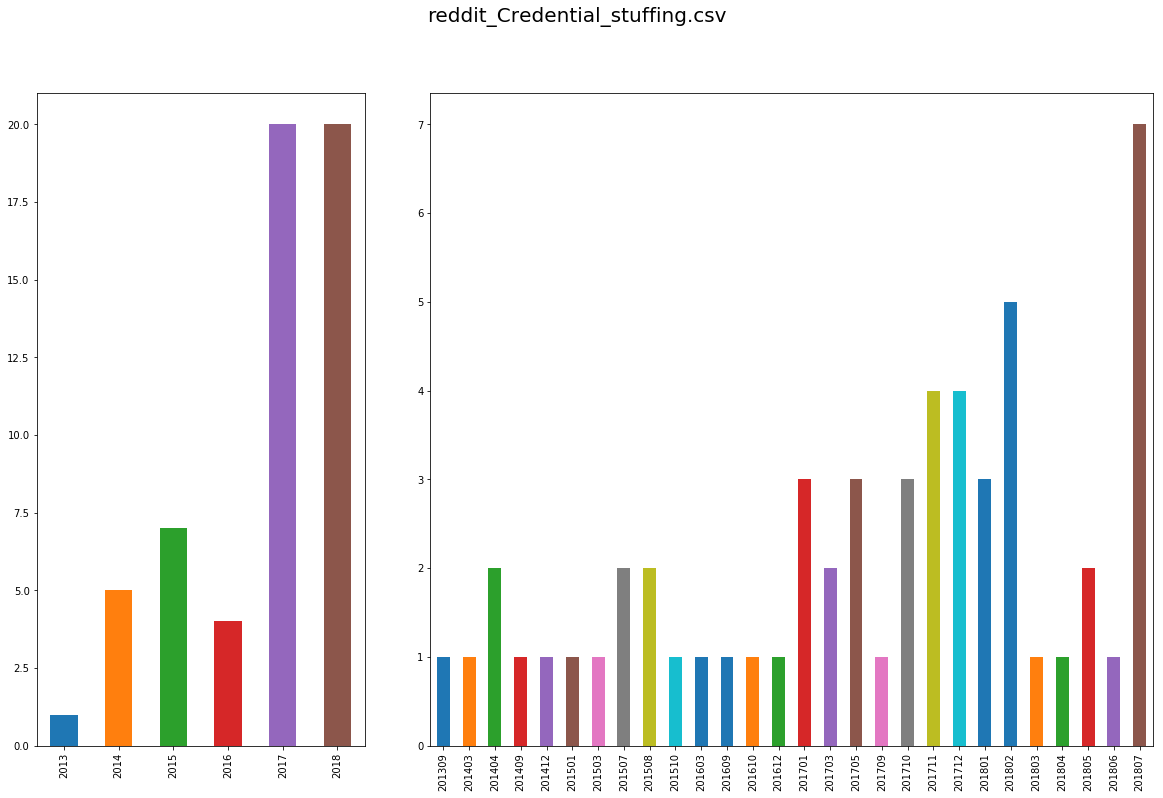

Num posts: 421


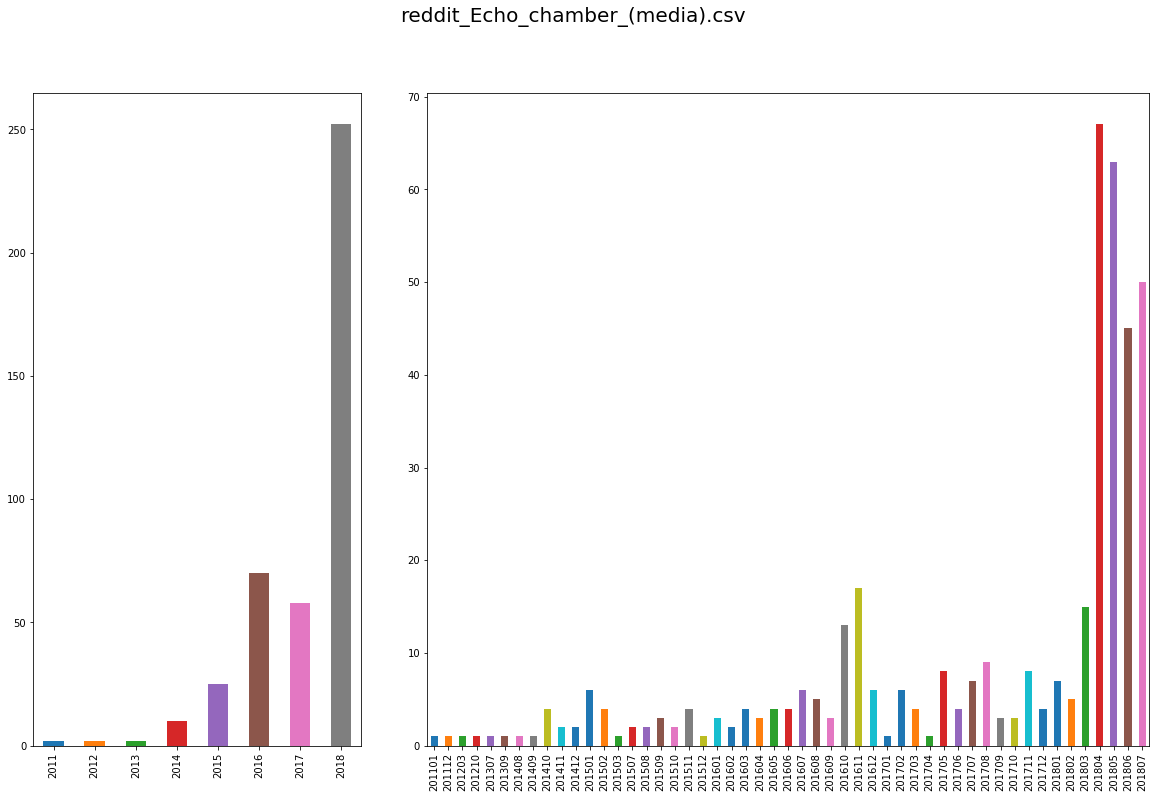

Num posts: 446


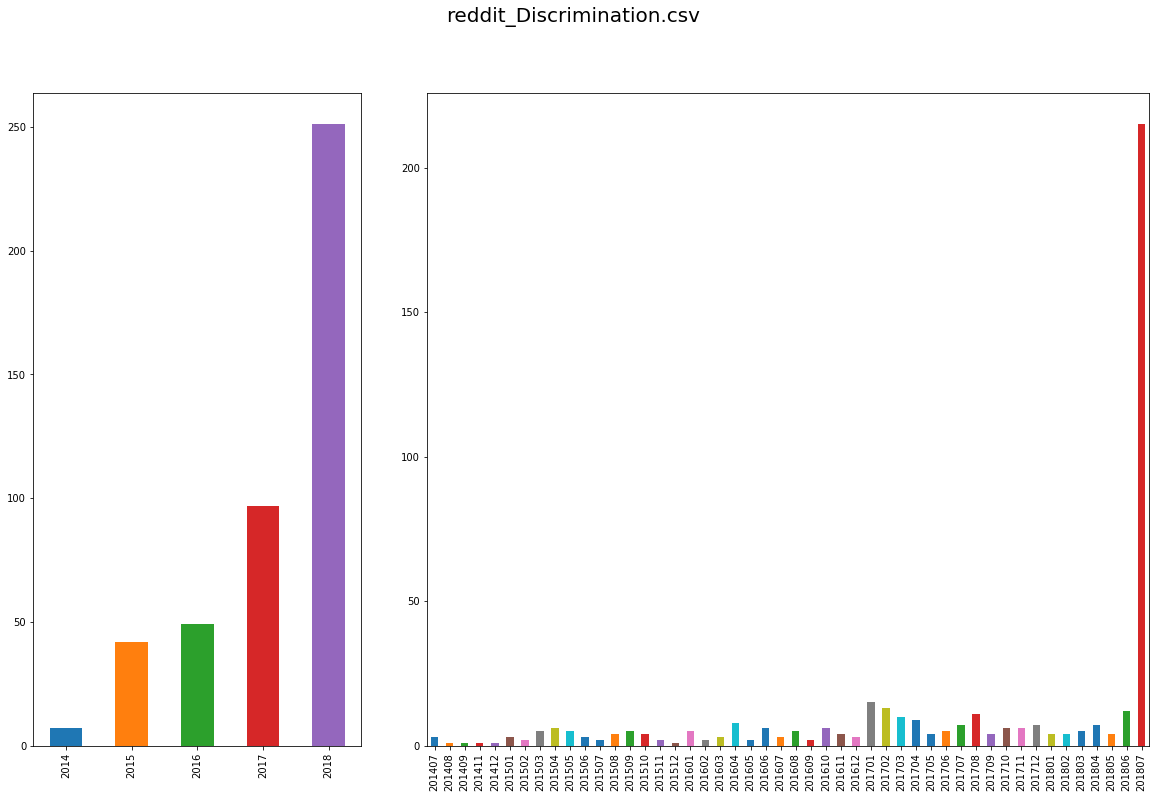

Num posts: 406


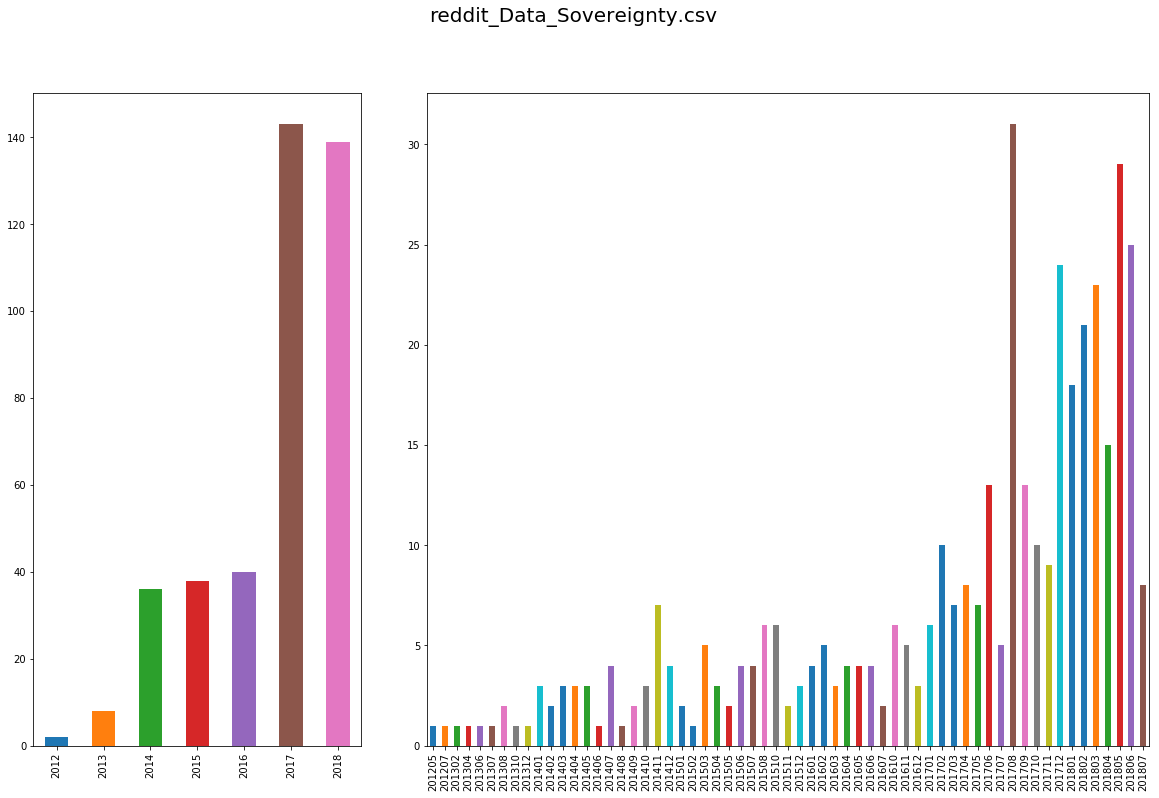

Num posts: 417


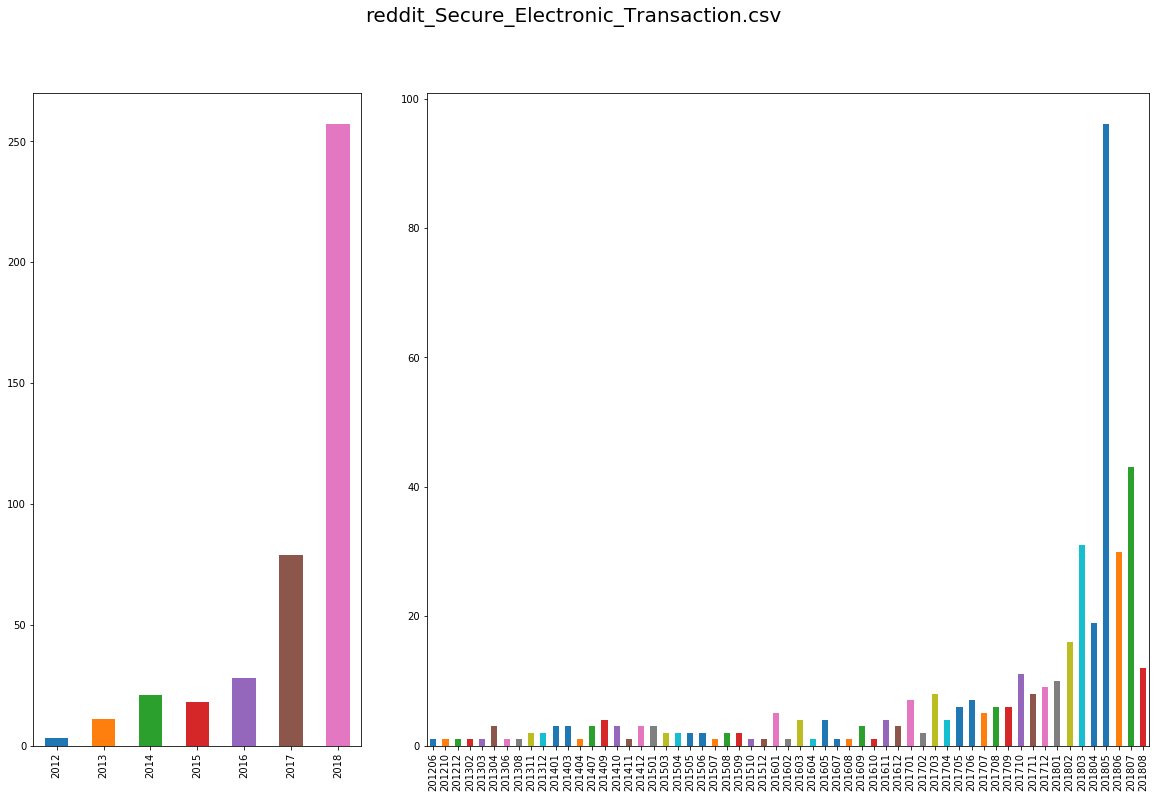

Num posts: 419


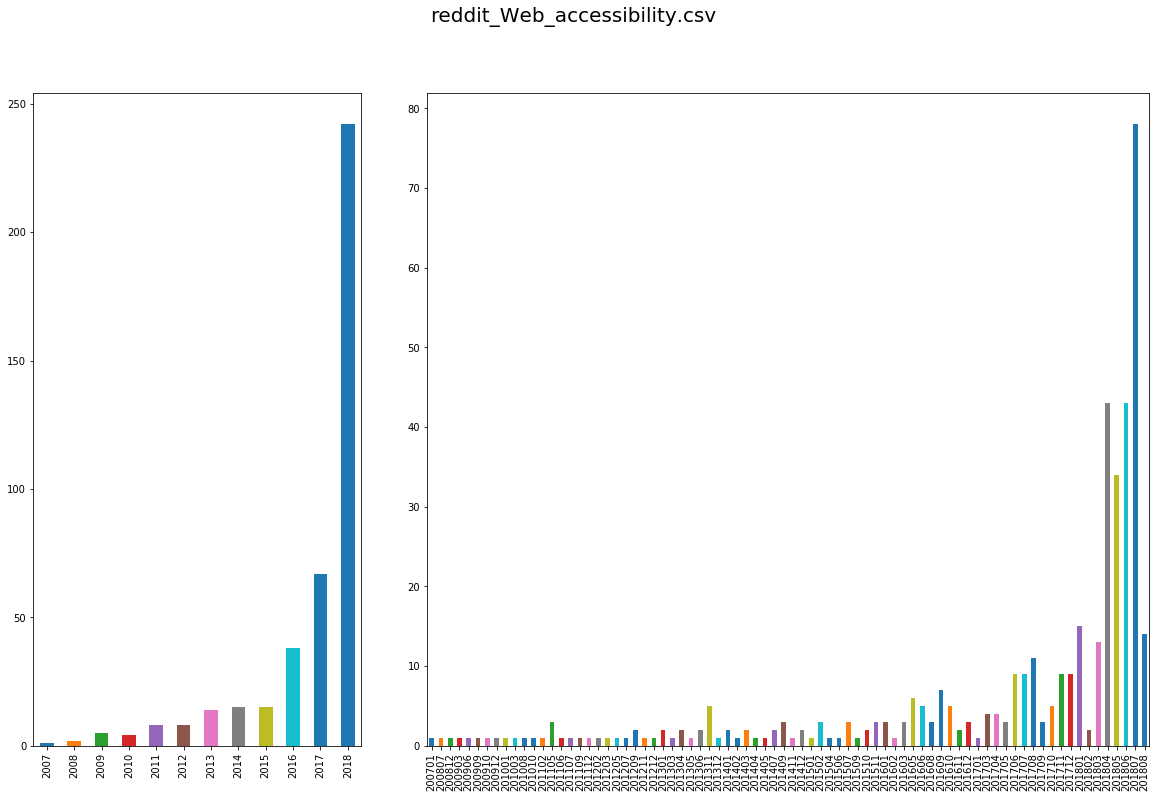

Num posts: 485


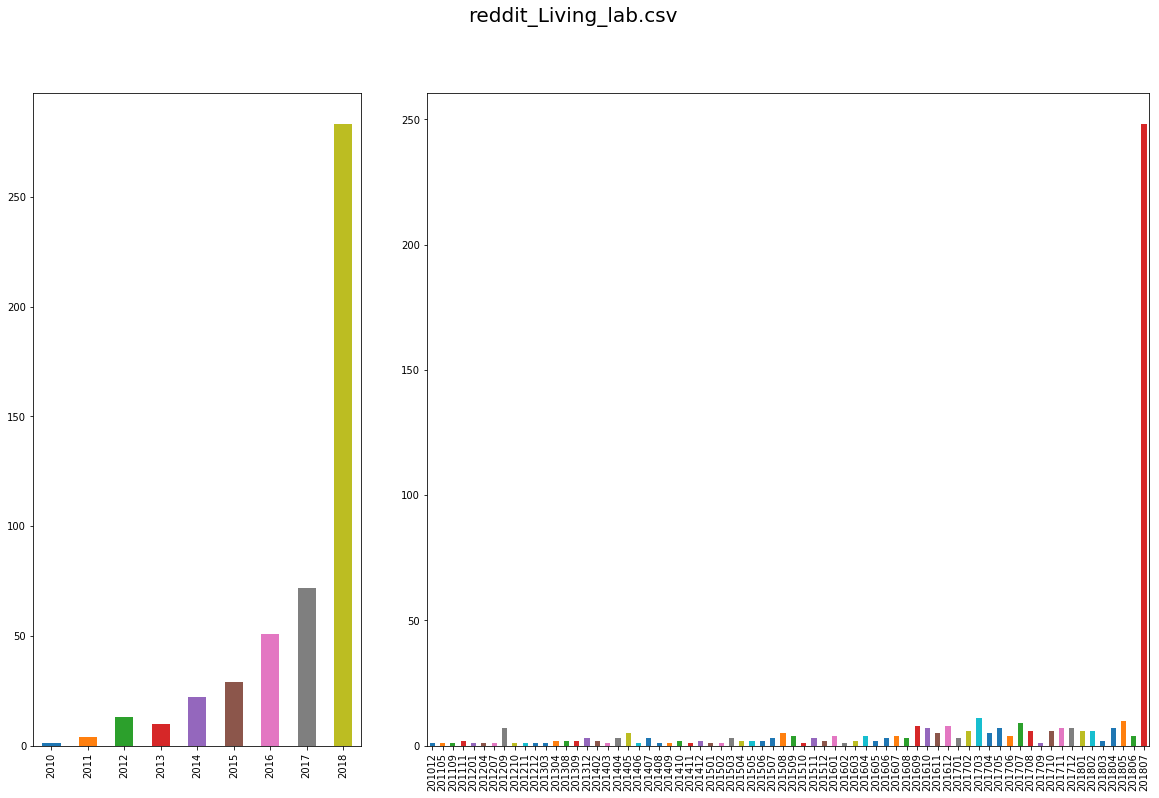

Num posts: 465


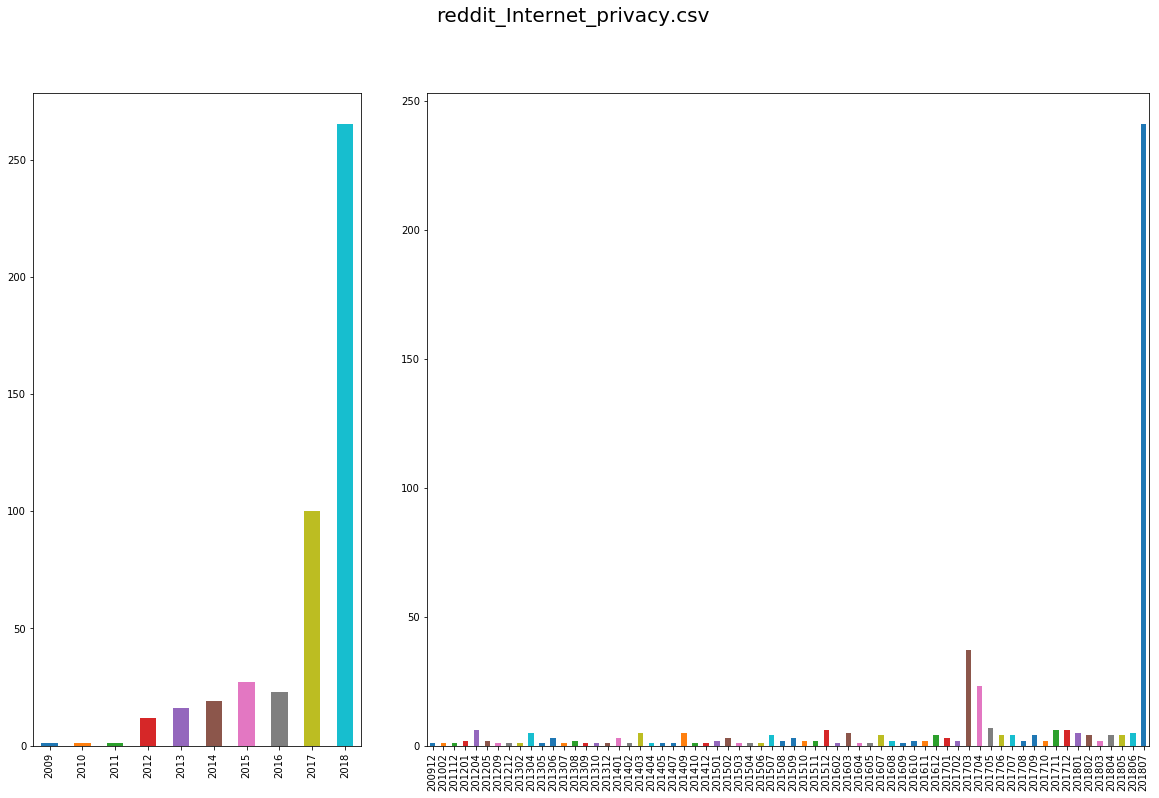

Num posts: 375


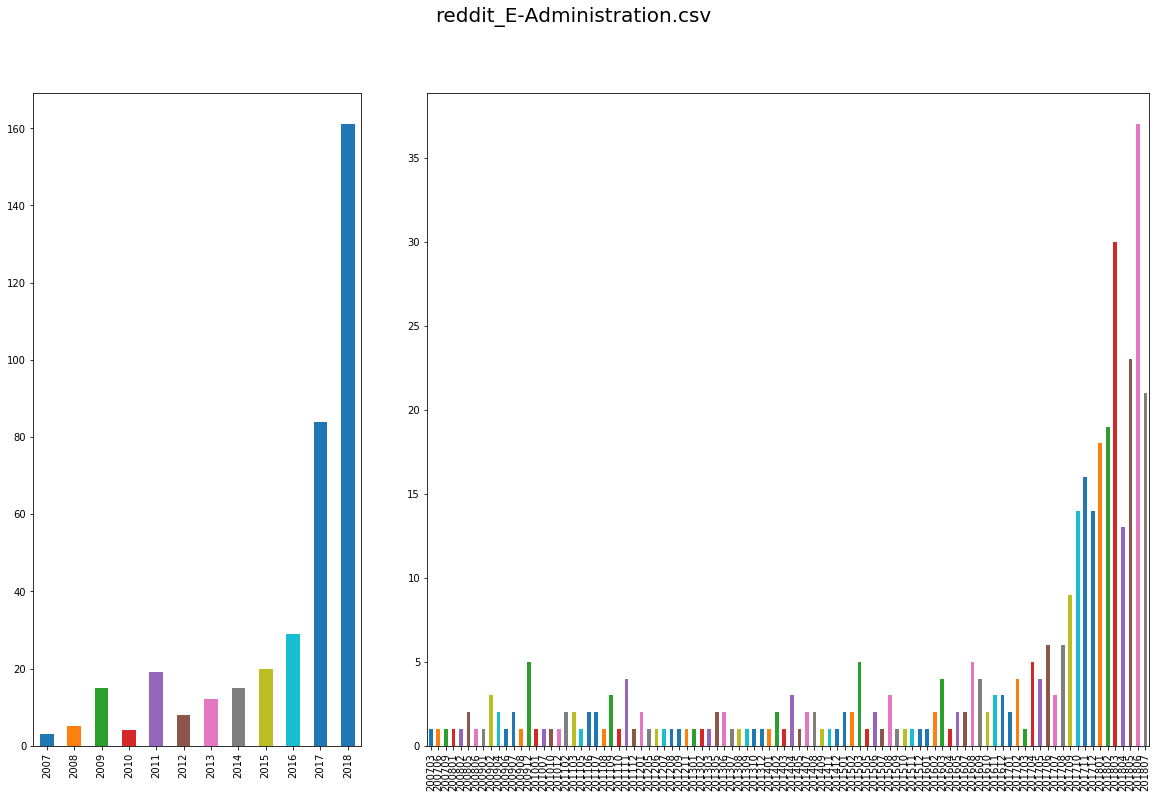

Num posts: 467


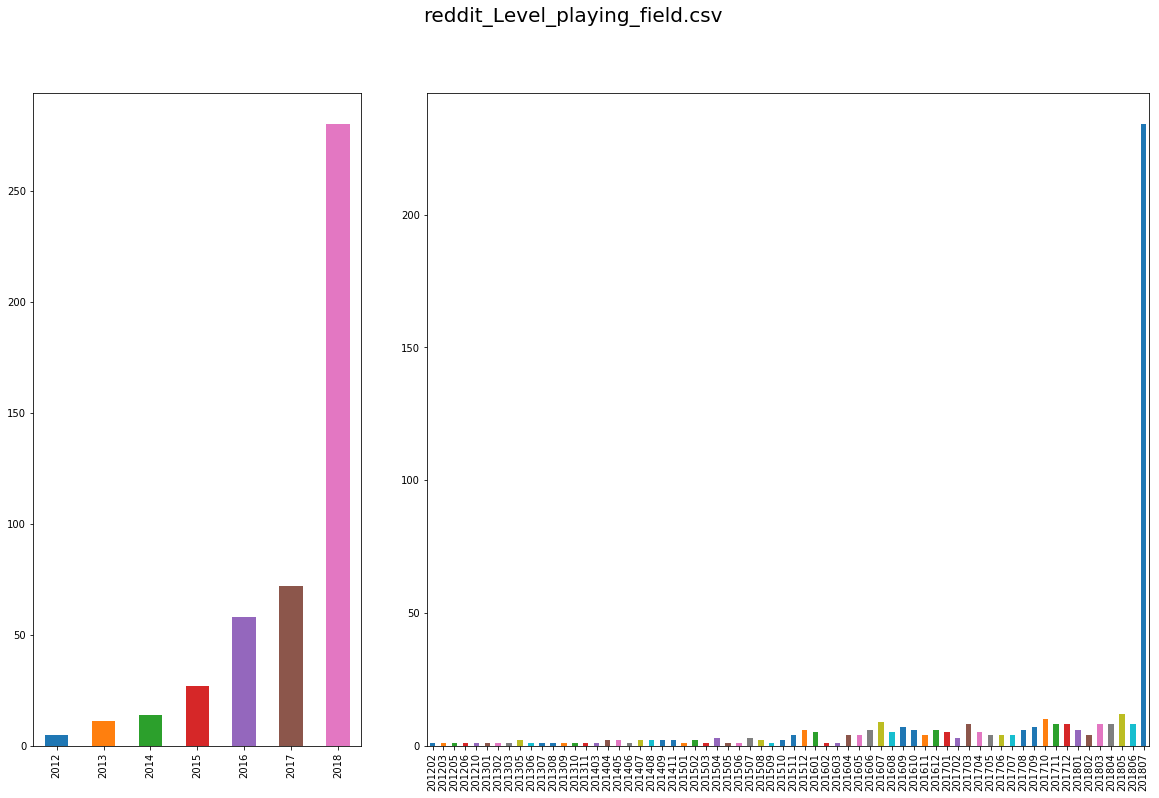

Num posts: 295


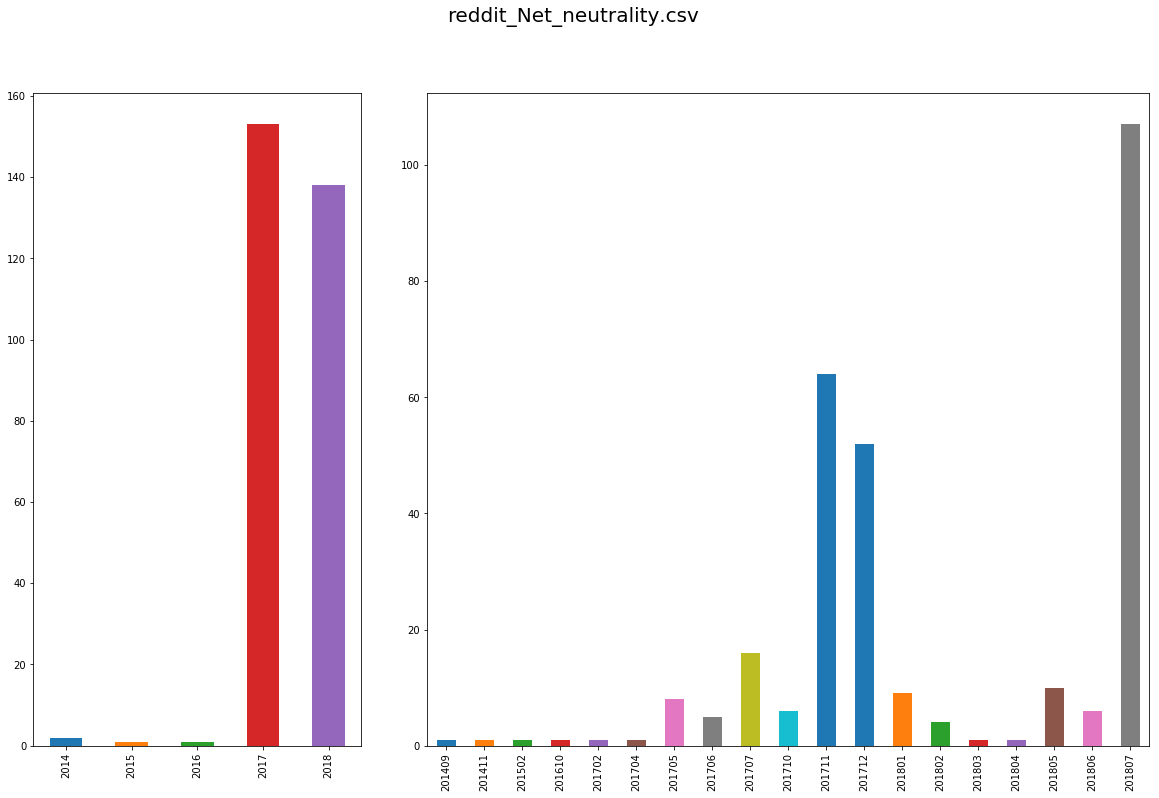

Num posts: 138


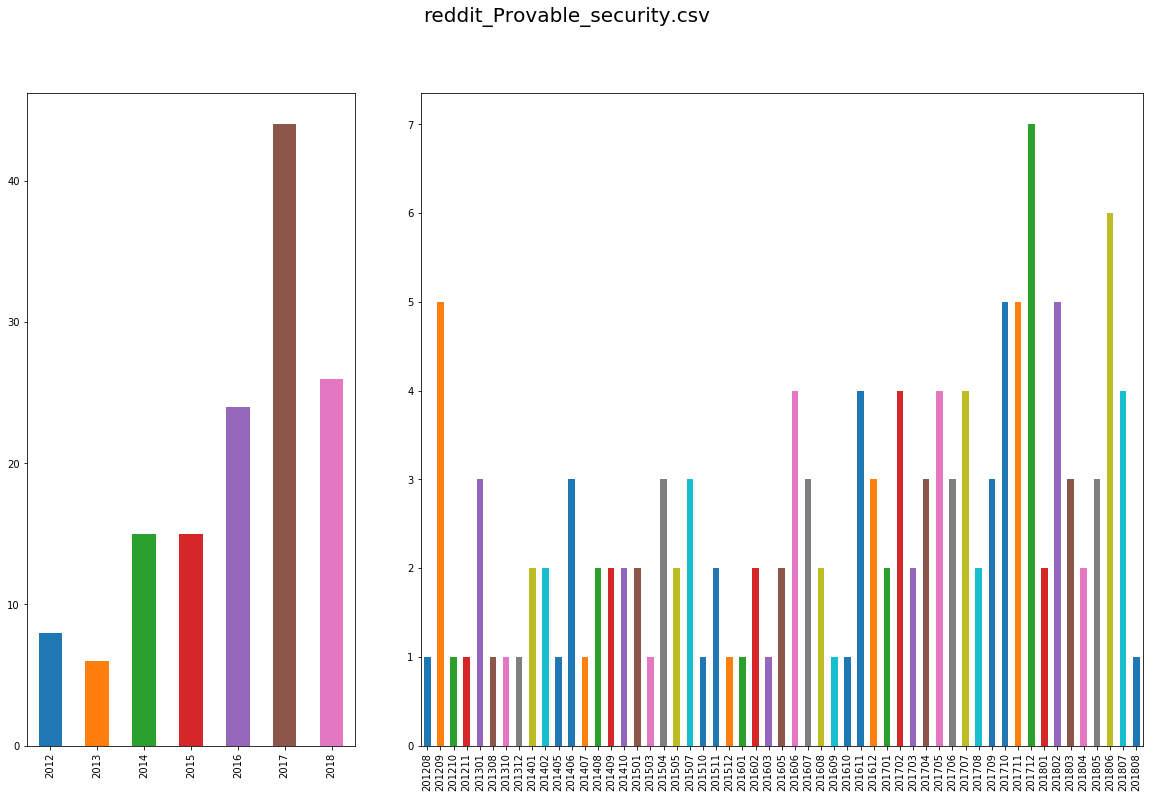

Num posts: 99


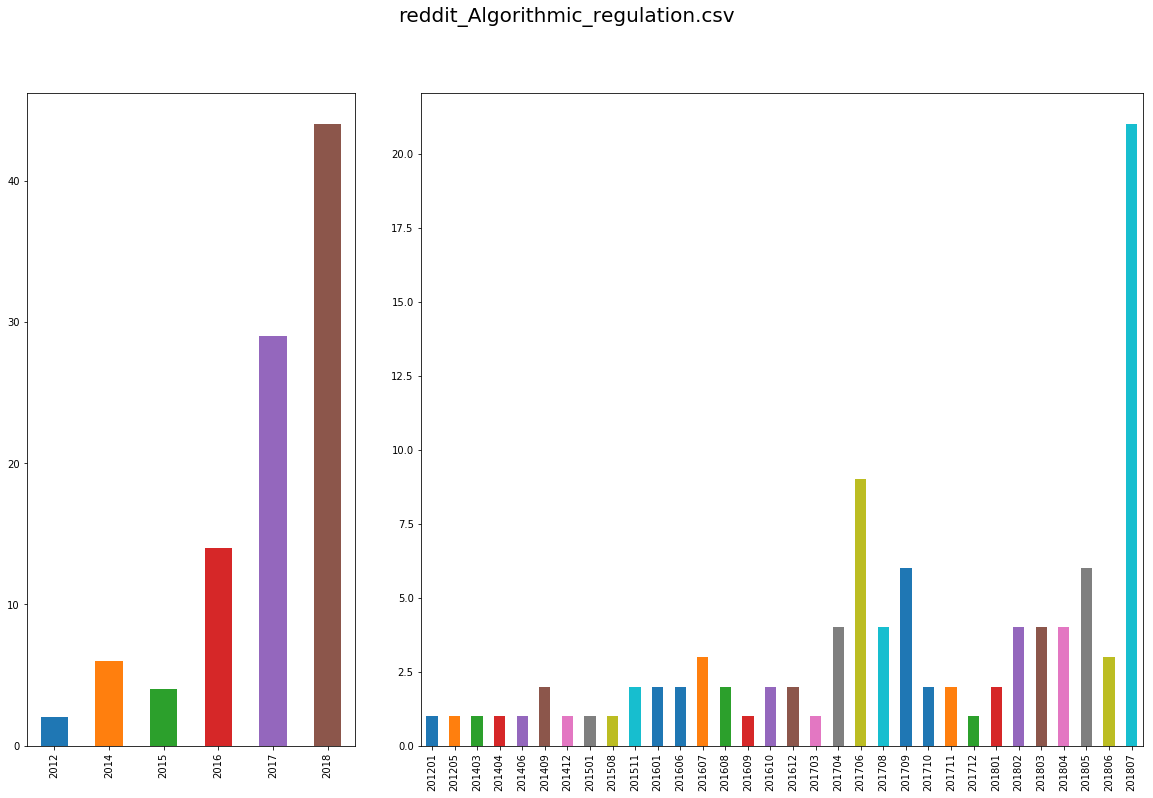

Num posts: 448


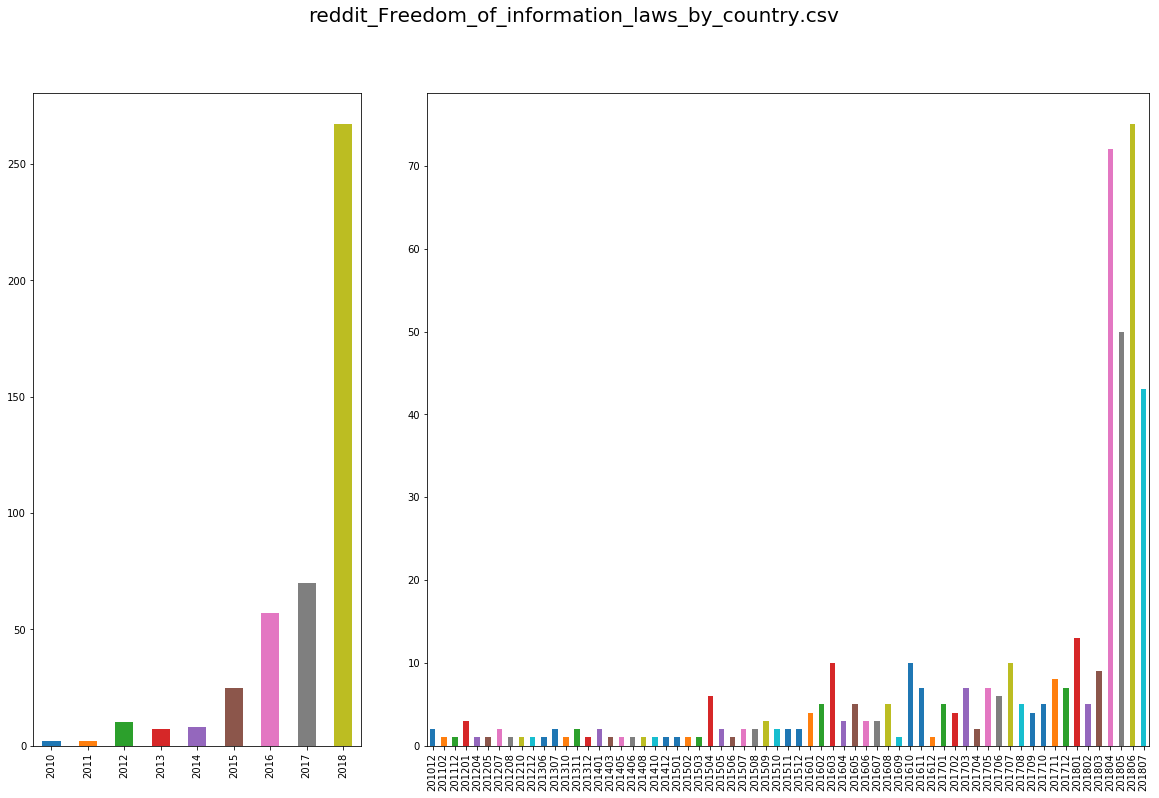

Num posts: 21


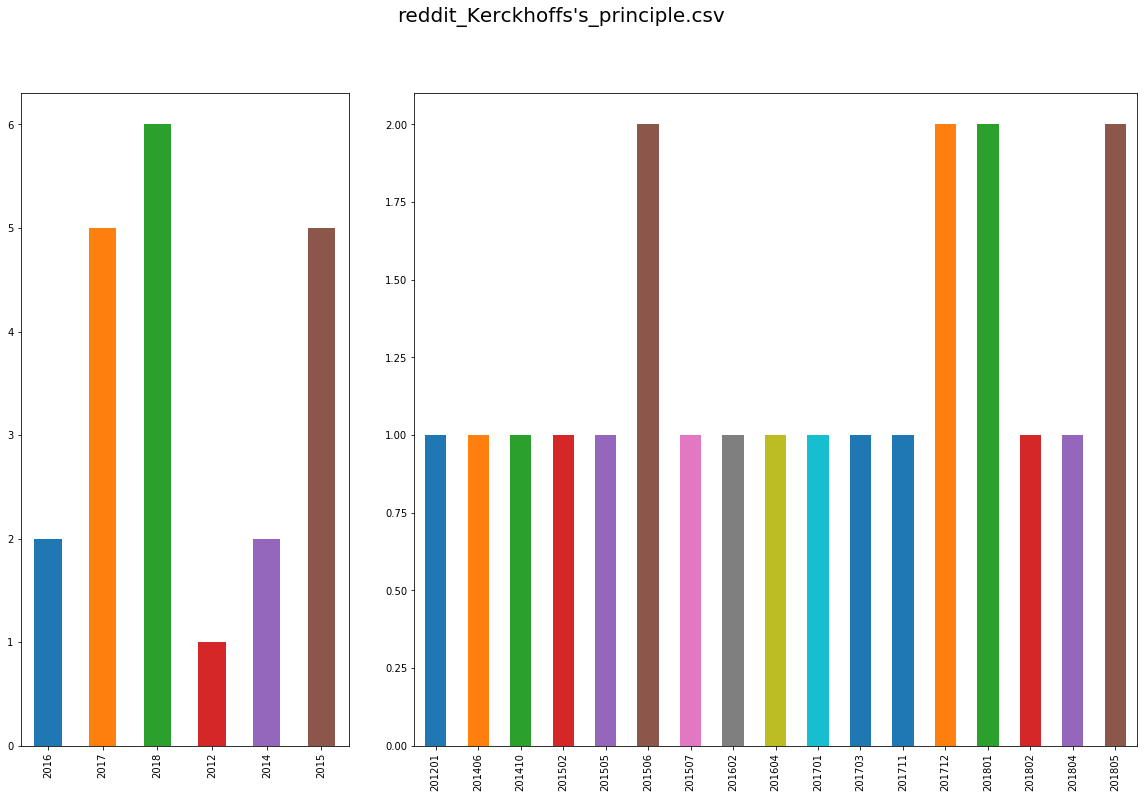

Num posts: 457


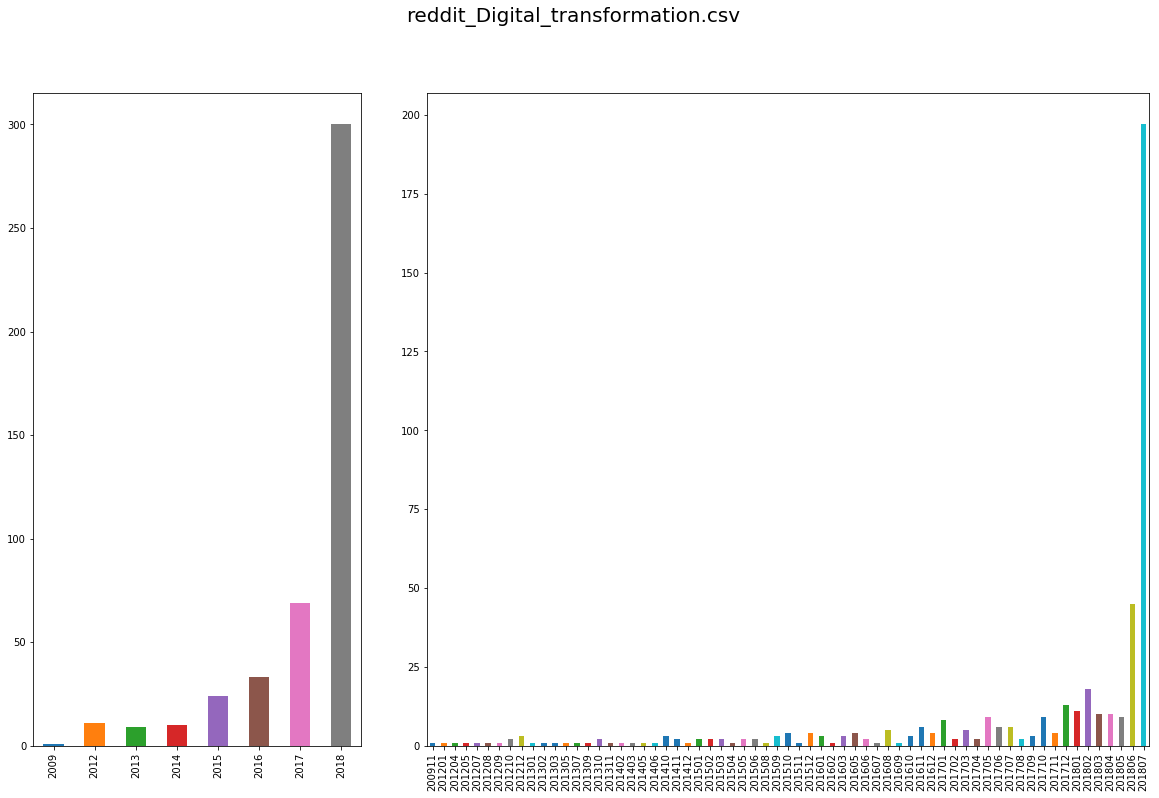

Num posts: 123


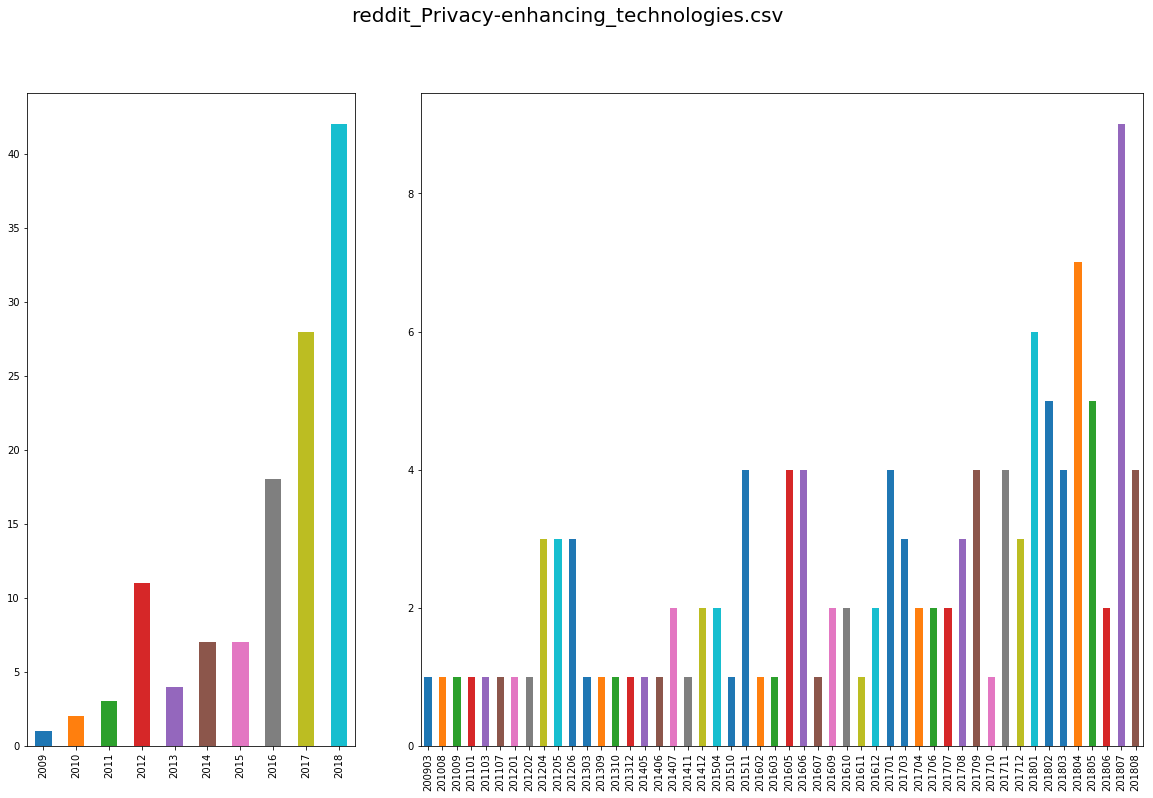

Num posts: 468


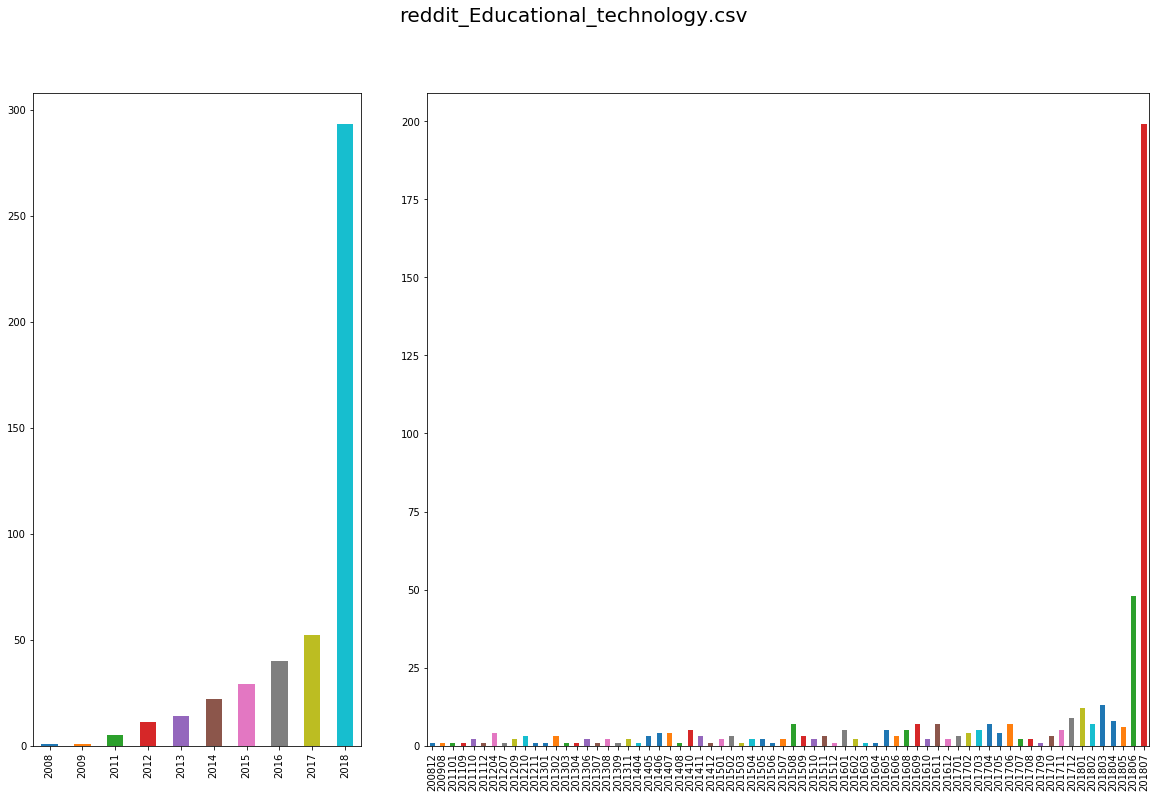

Num posts: 3


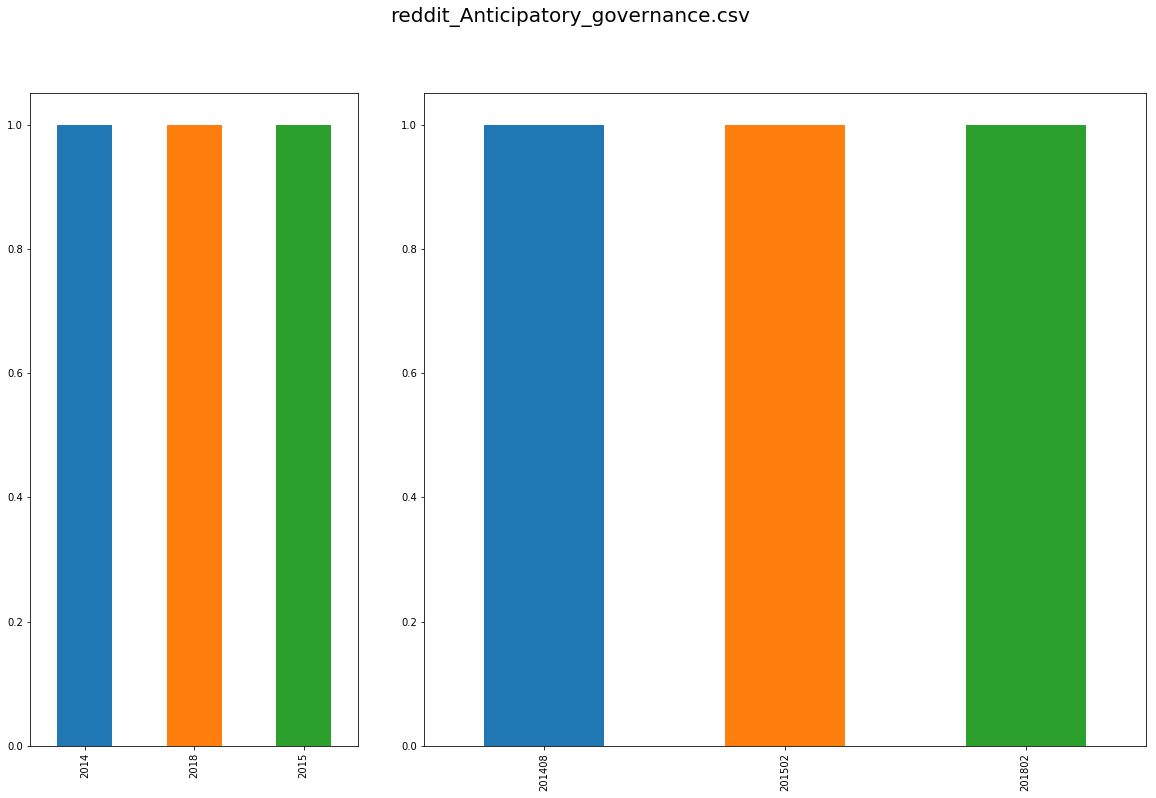

Num posts: 400


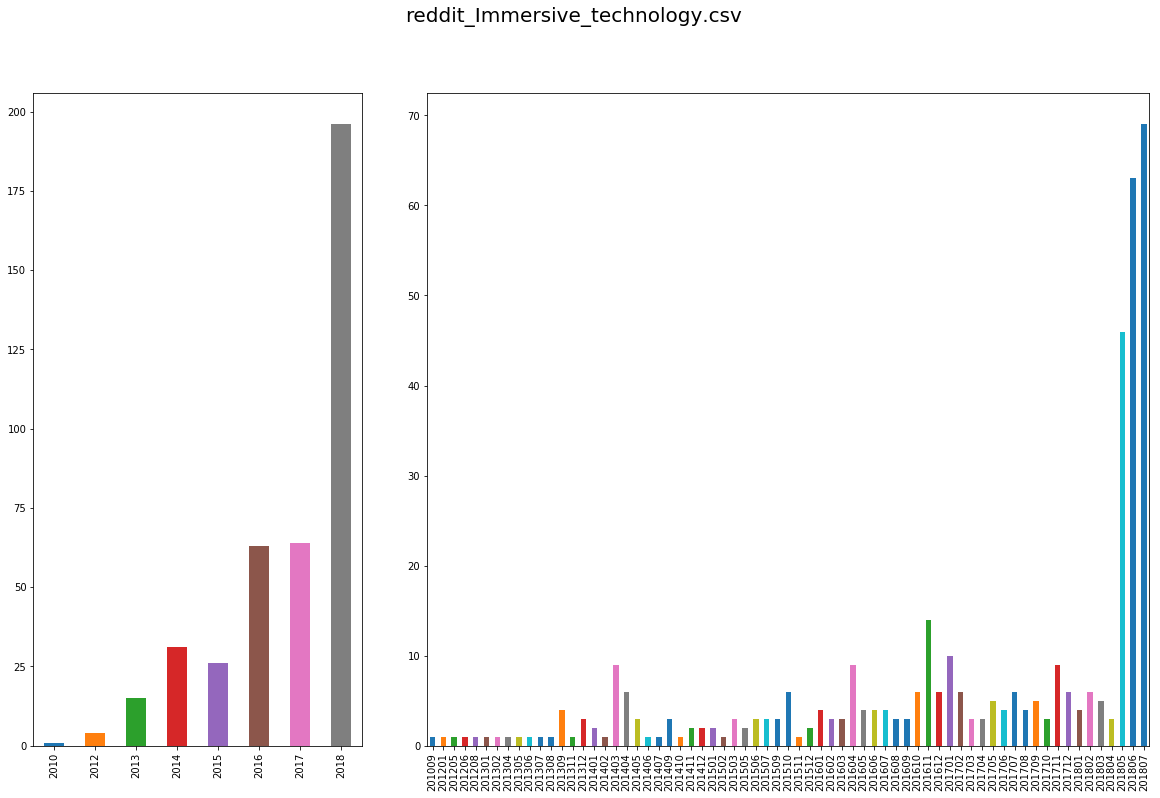

Num posts: 387


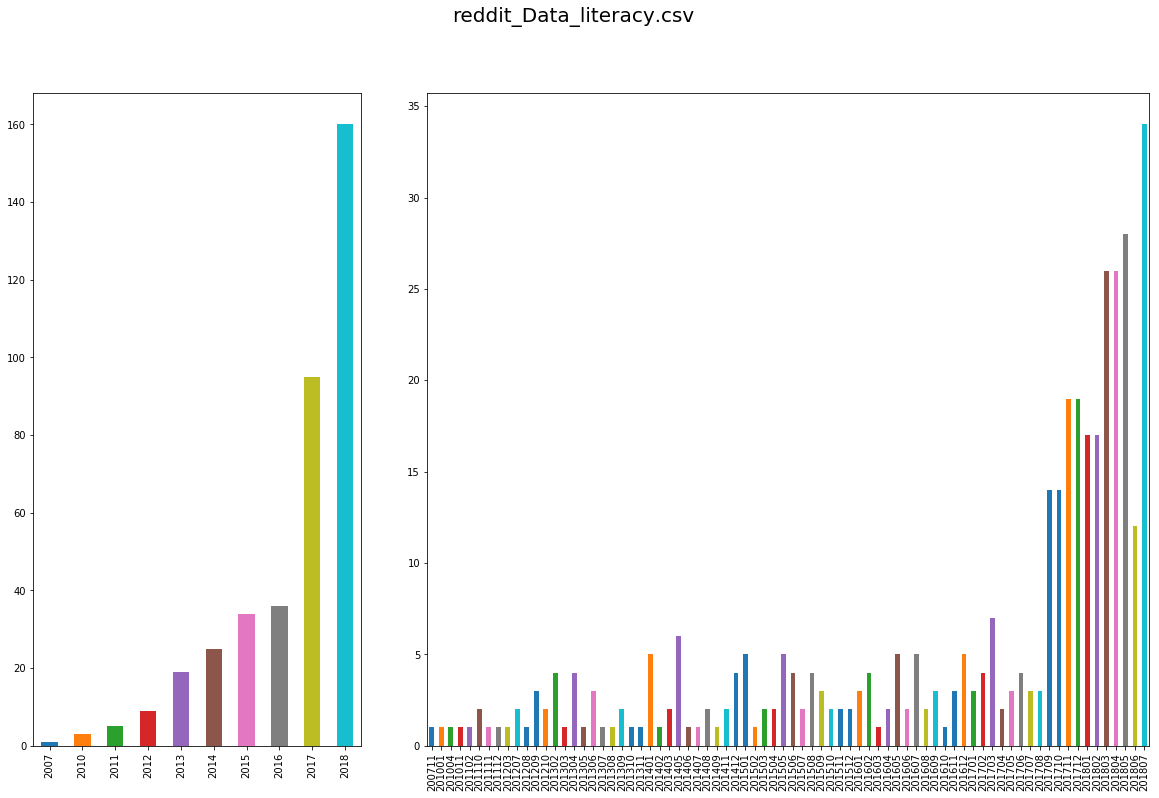

Num posts: 459


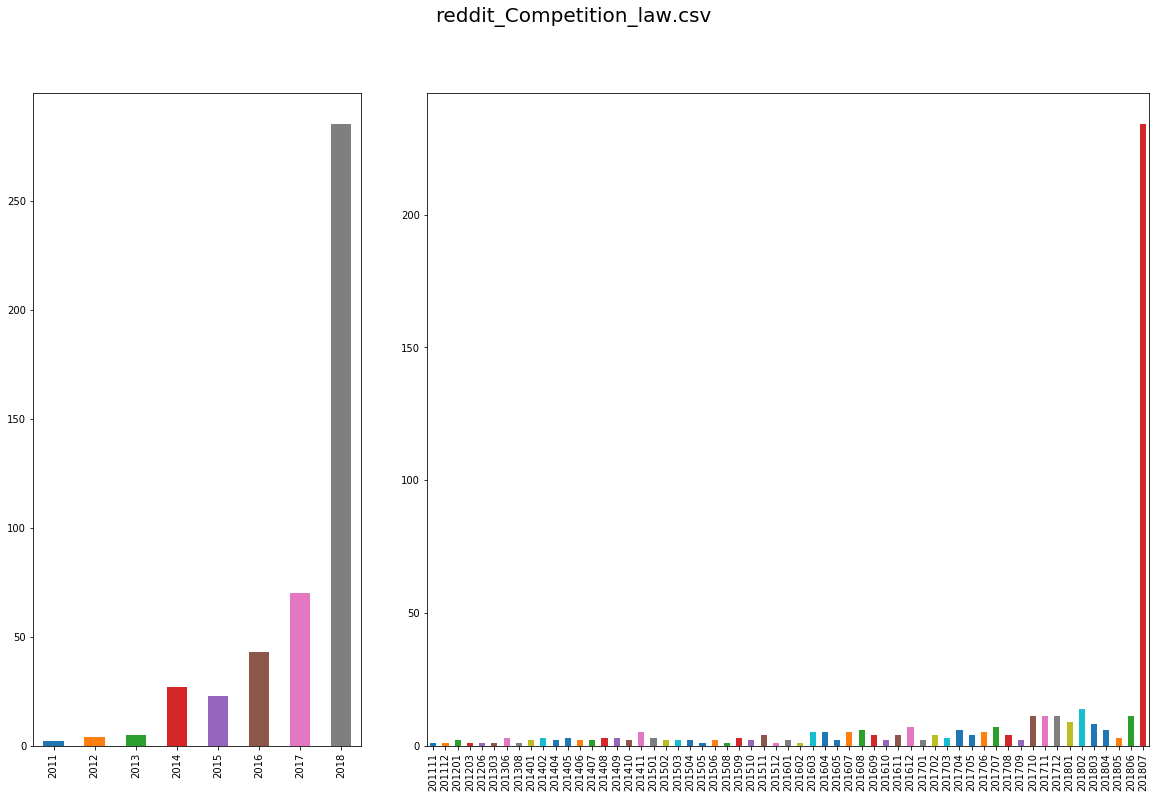

Num posts: 416


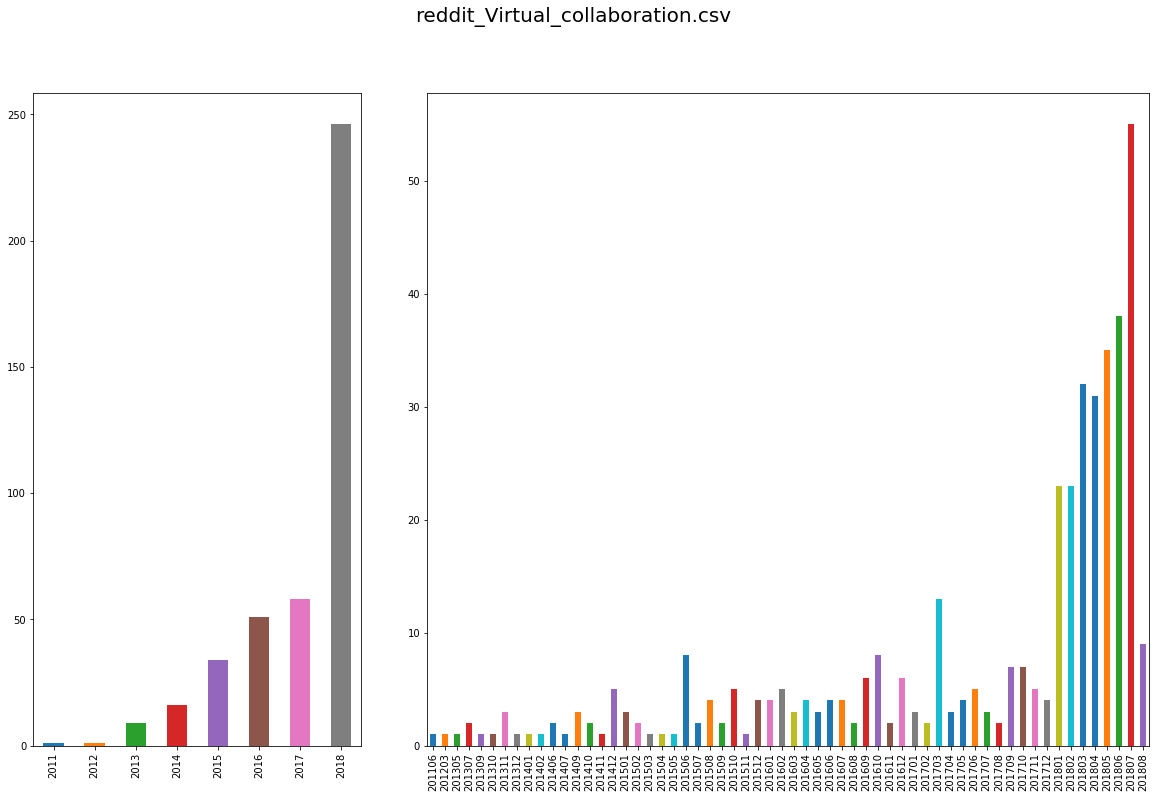

Num posts: 470


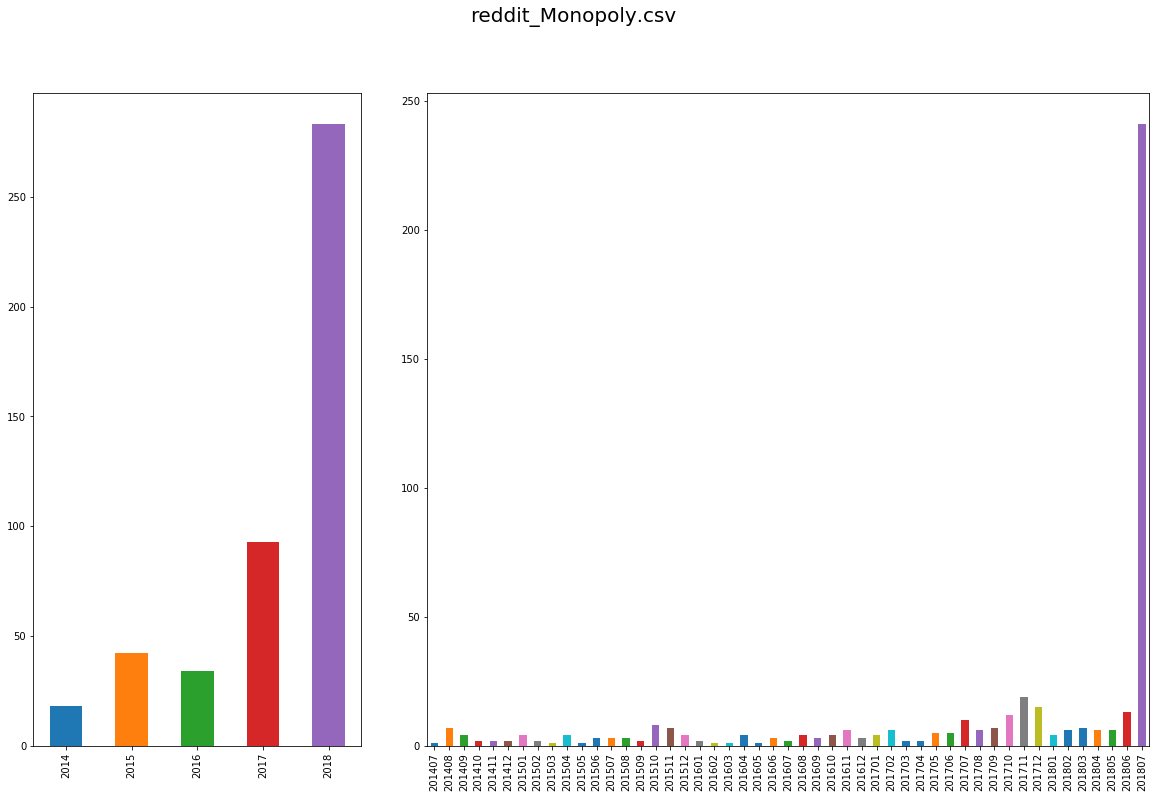

Num posts: 447


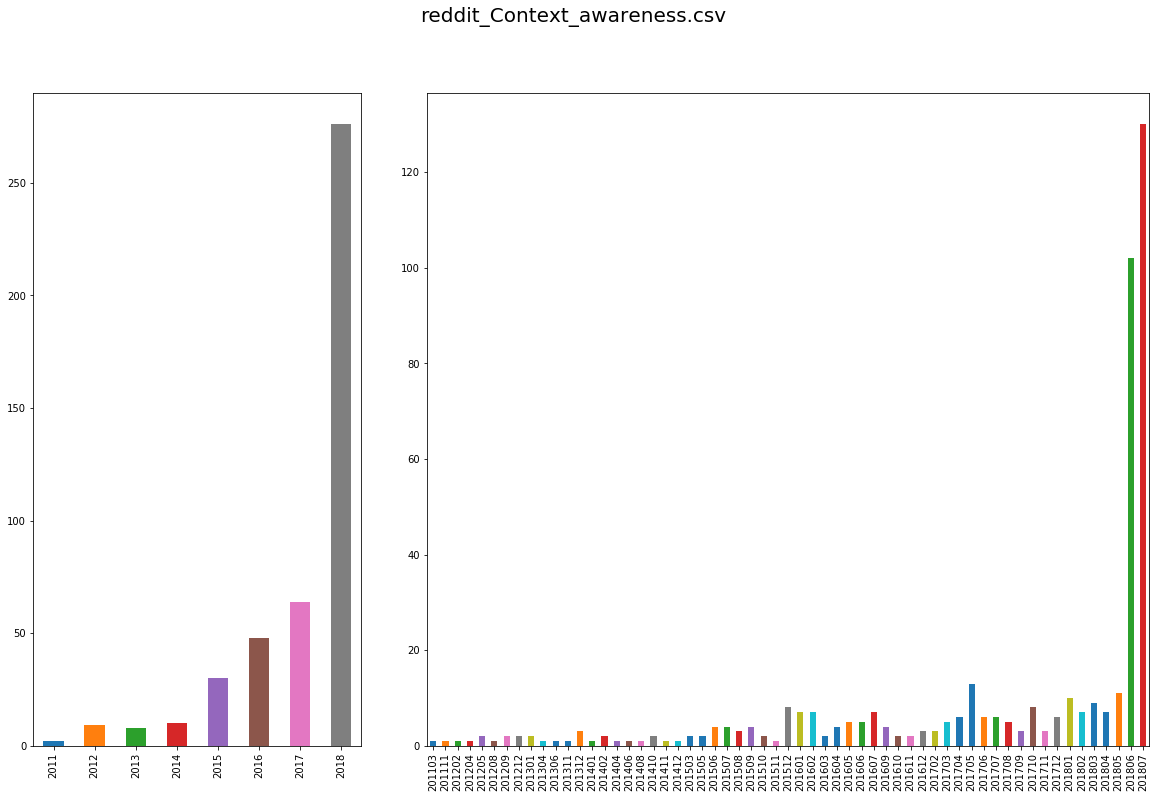

Num posts: 213


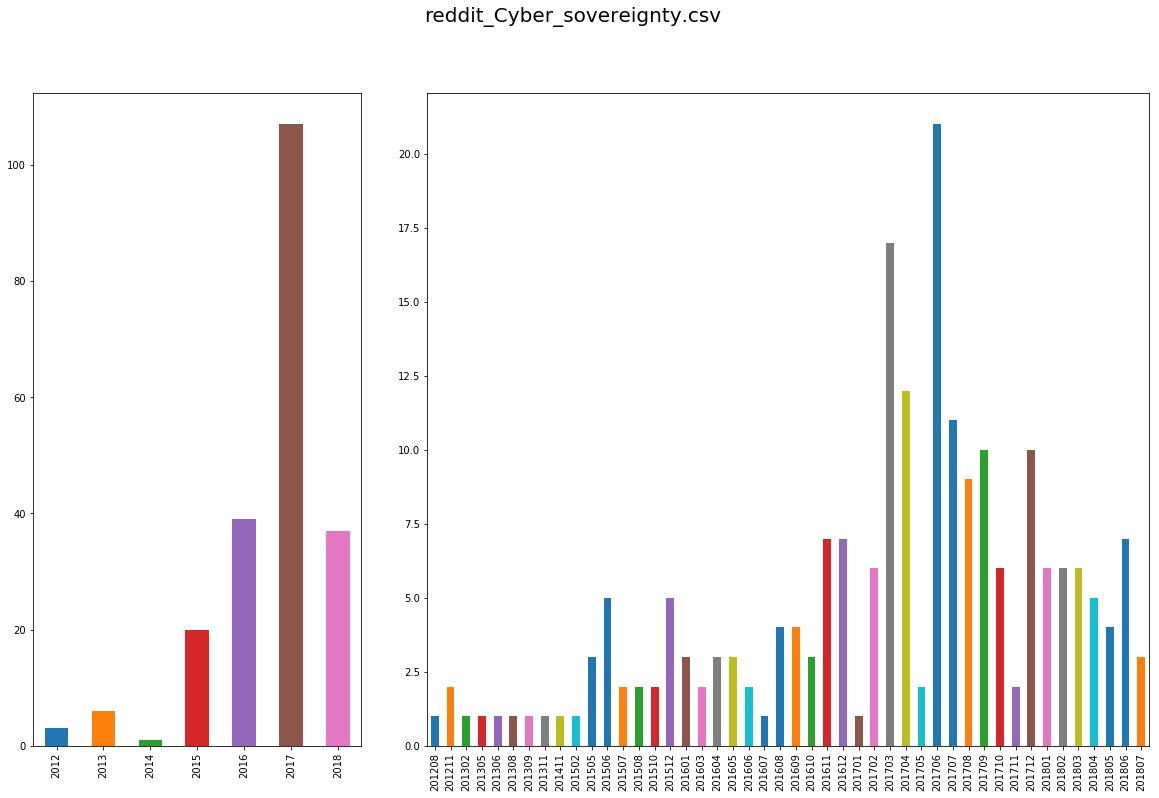

Num posts: 117


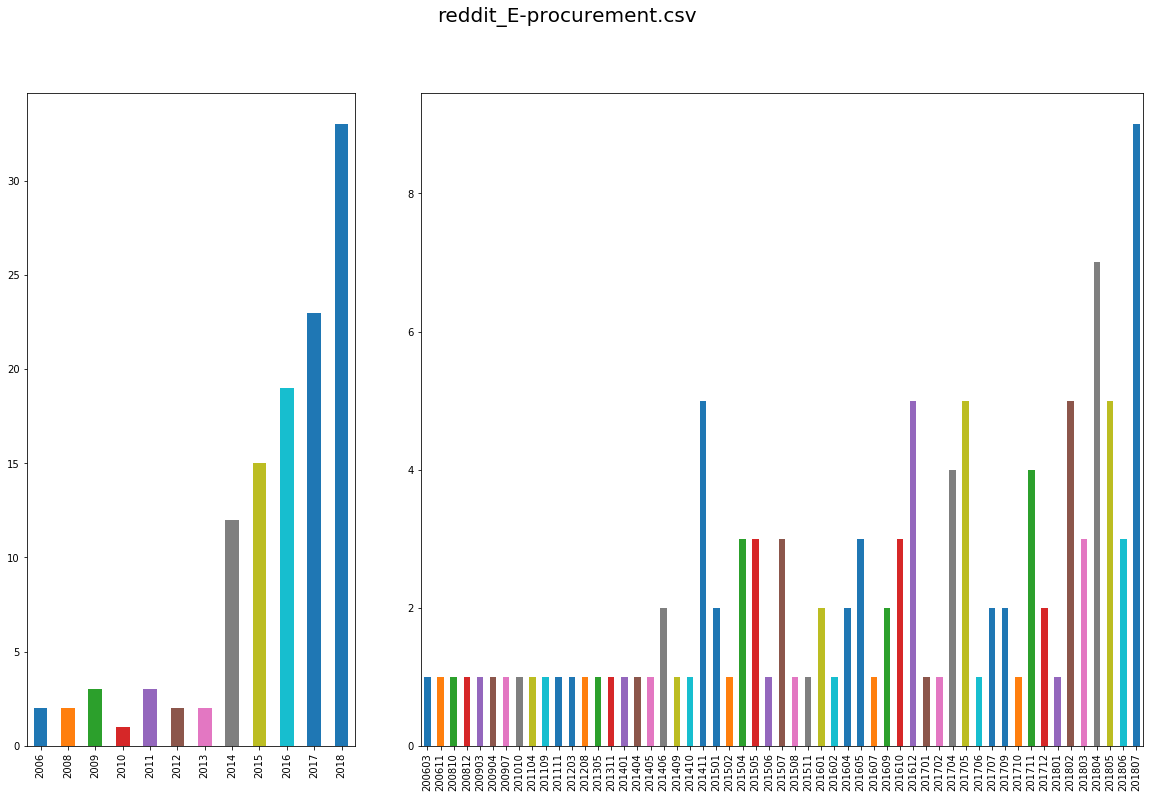

Num posts: 471


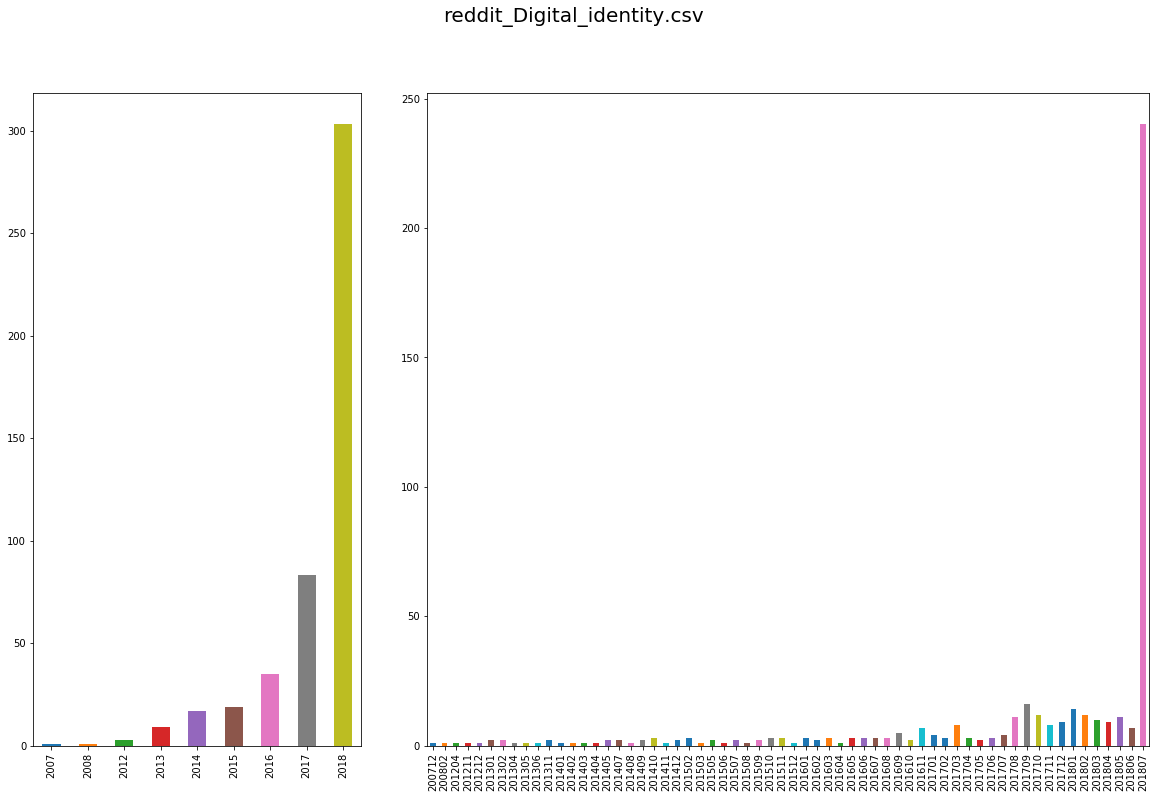

Num posts: 175


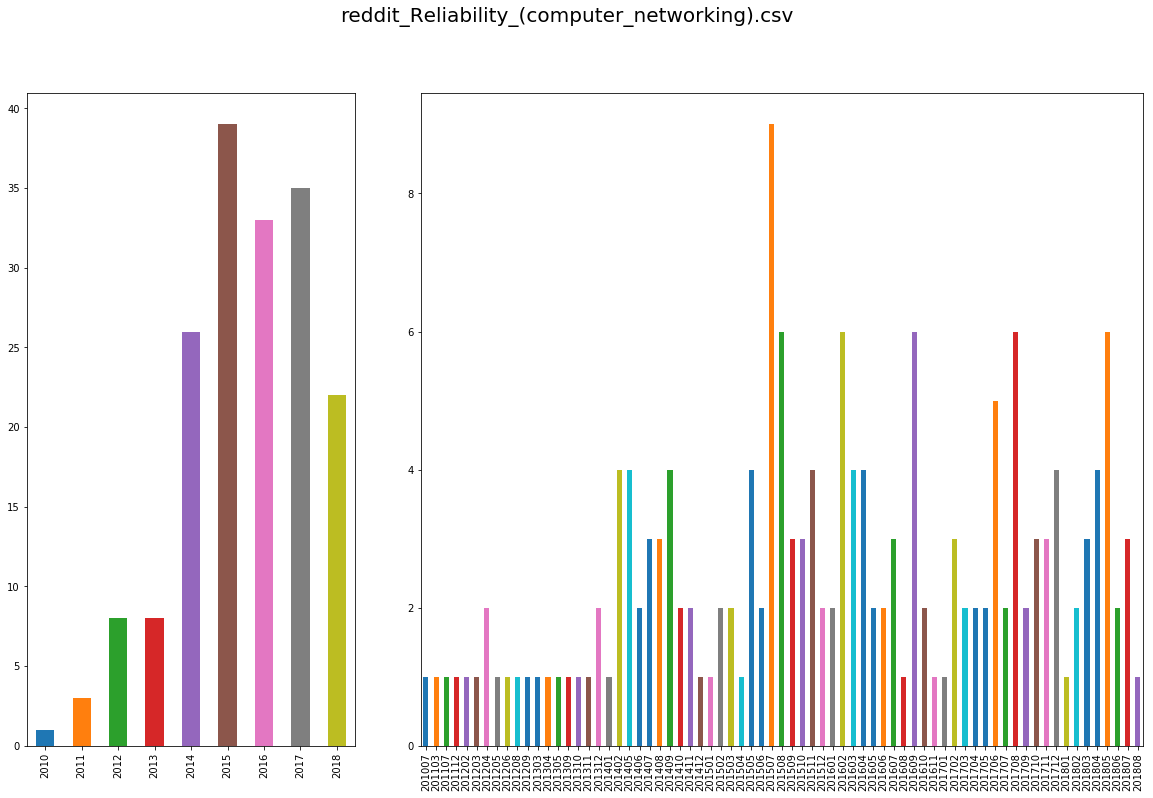

Num posts: 60


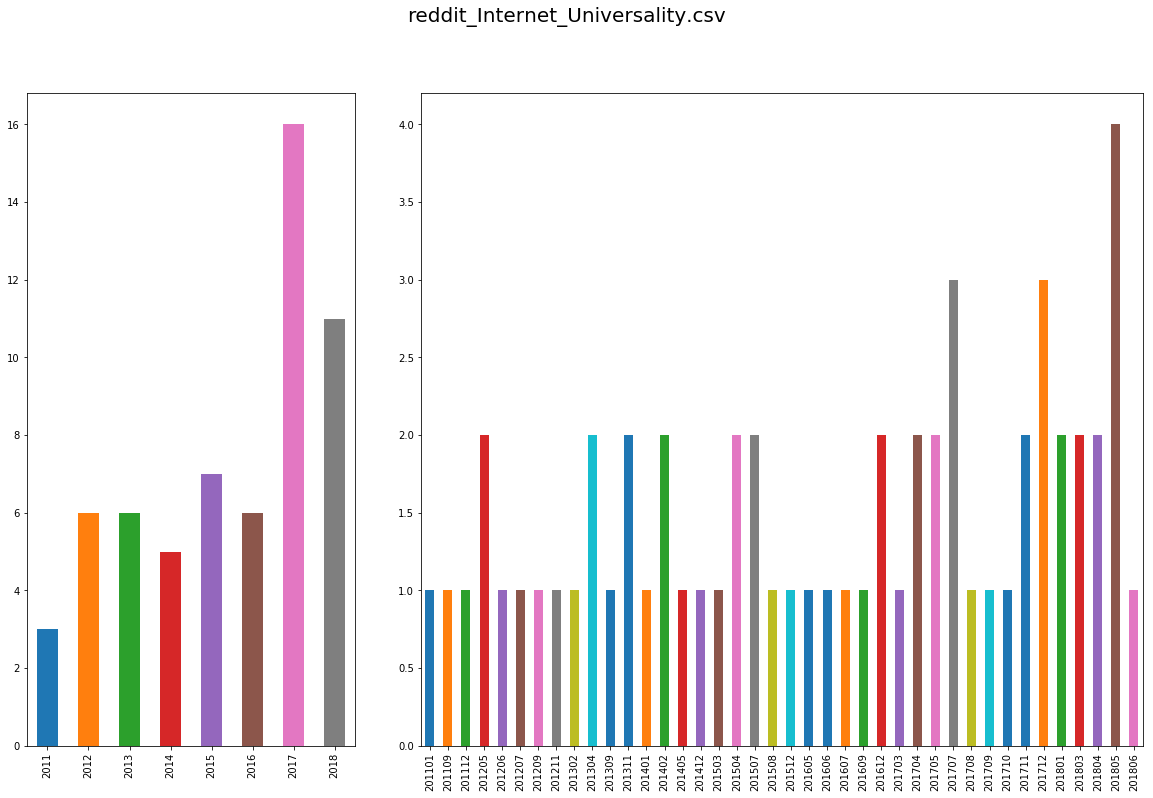

Num posts: 460


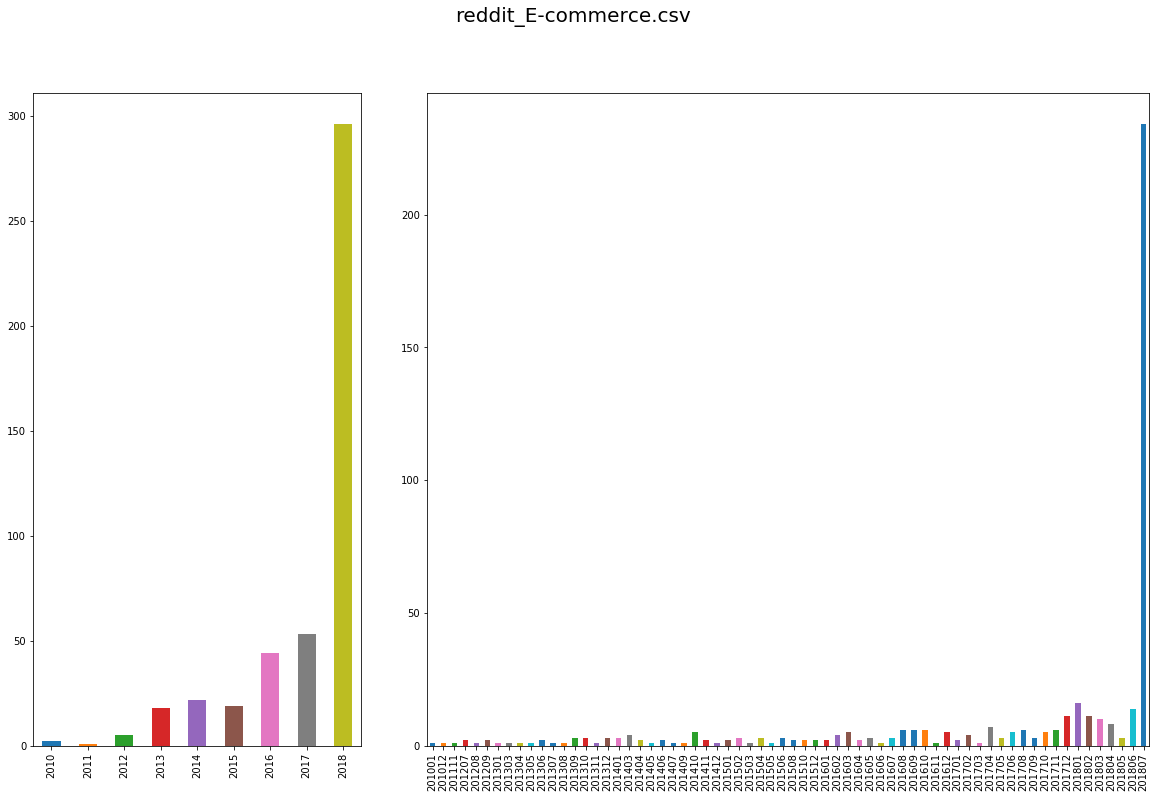

Num posts: 450


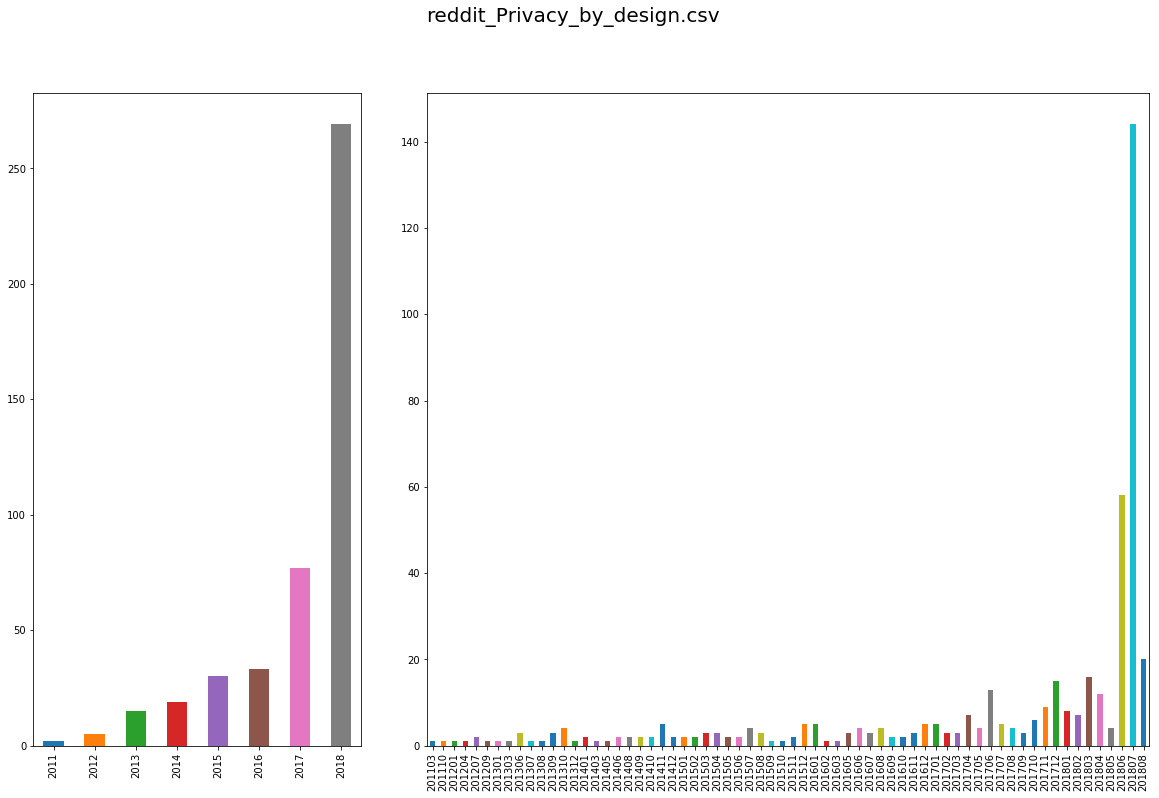

Num posts: 425


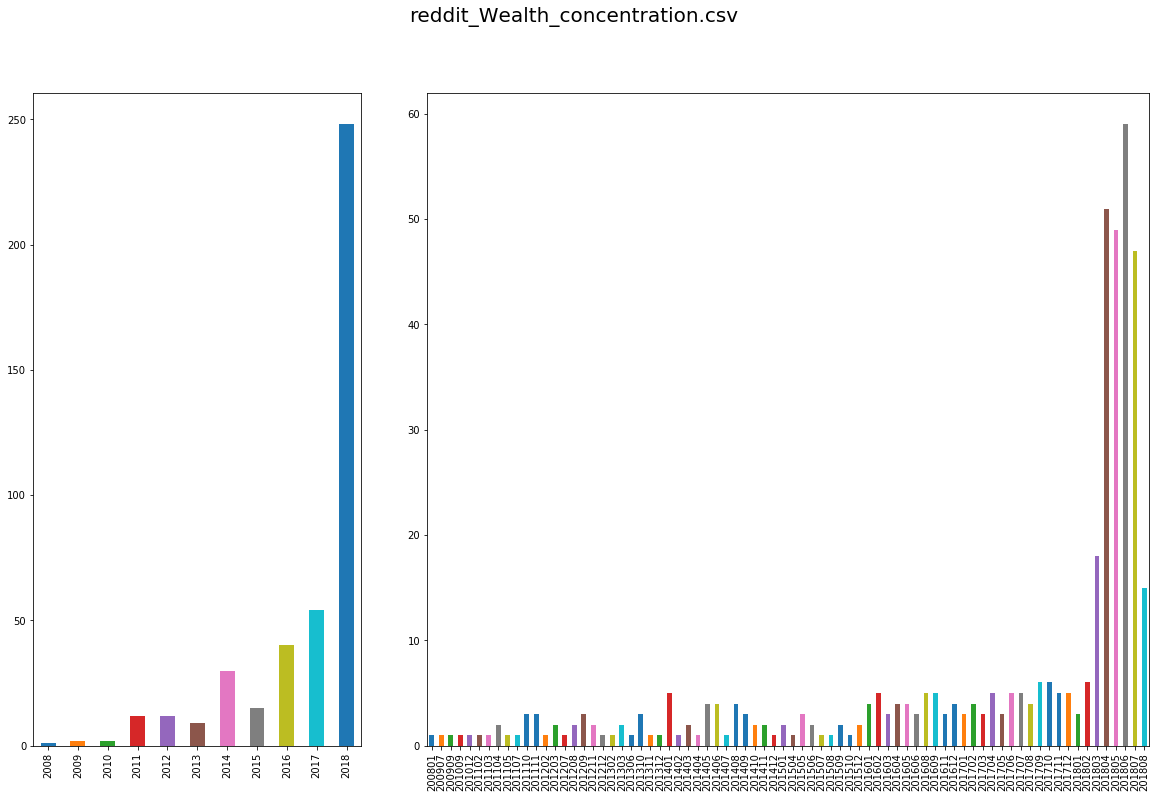

Num posts: 57


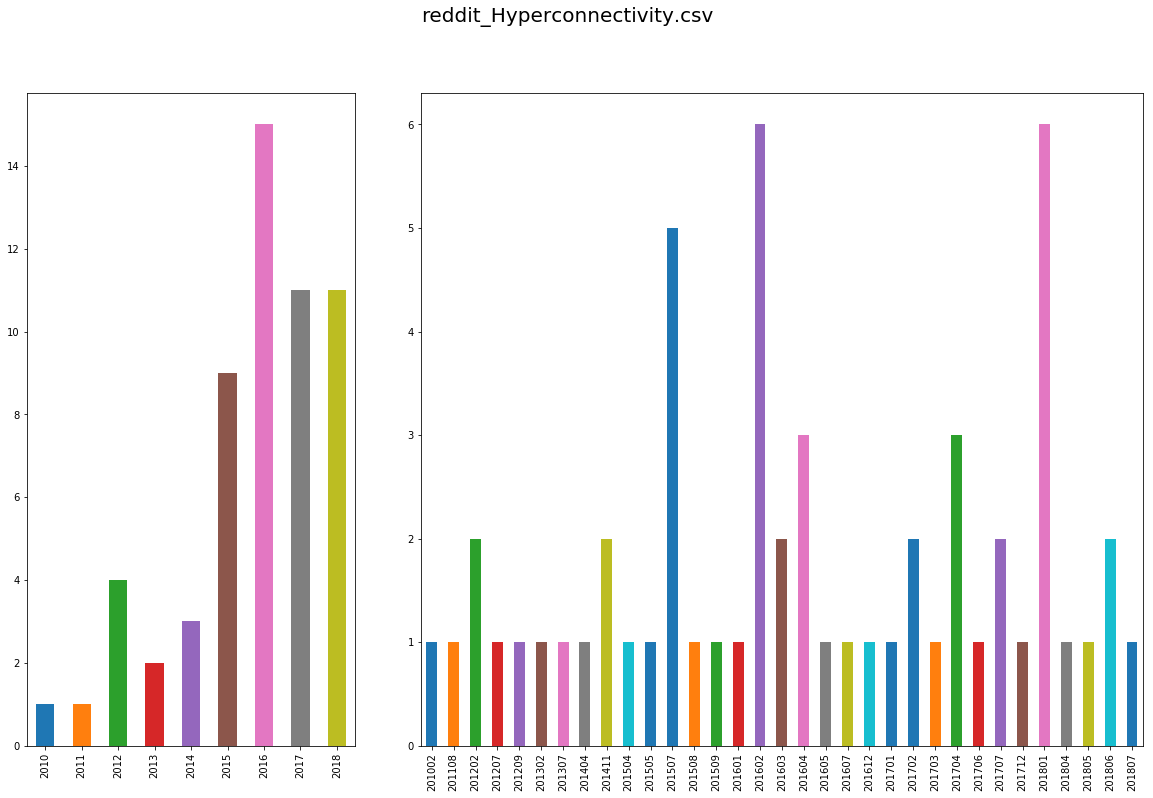

Num posts: 479


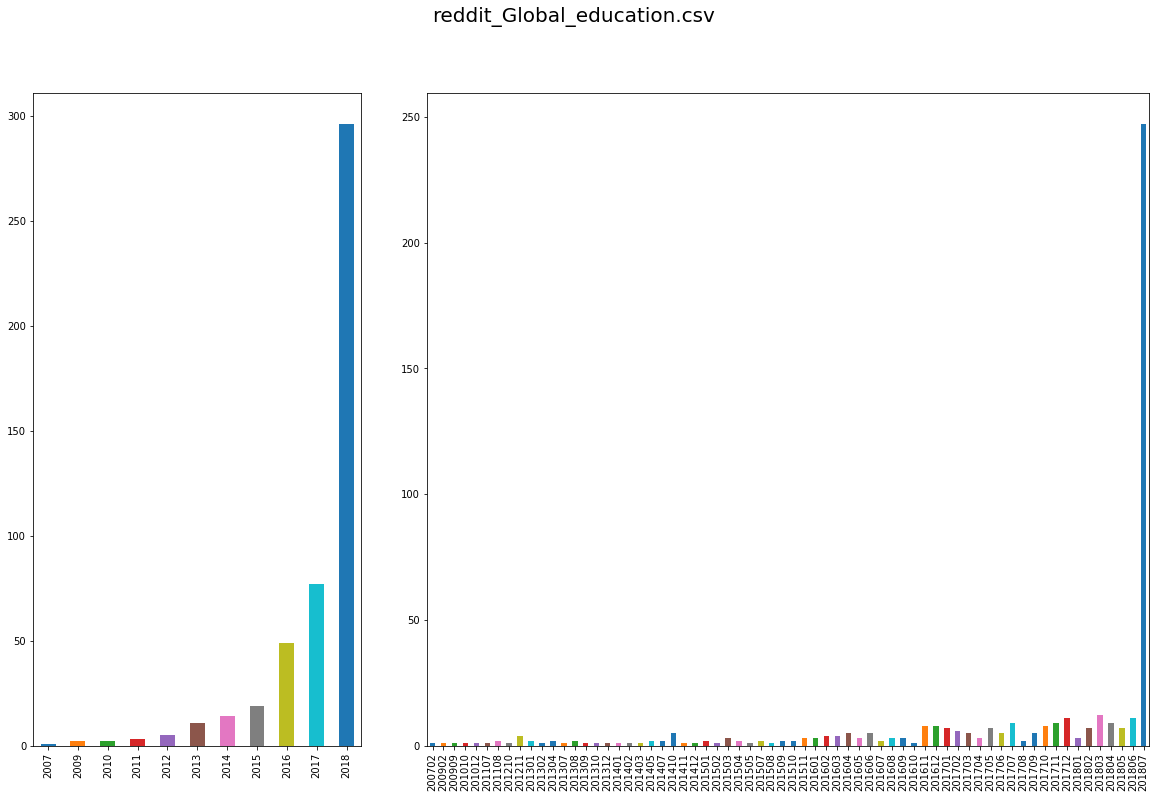

Num posts: 456


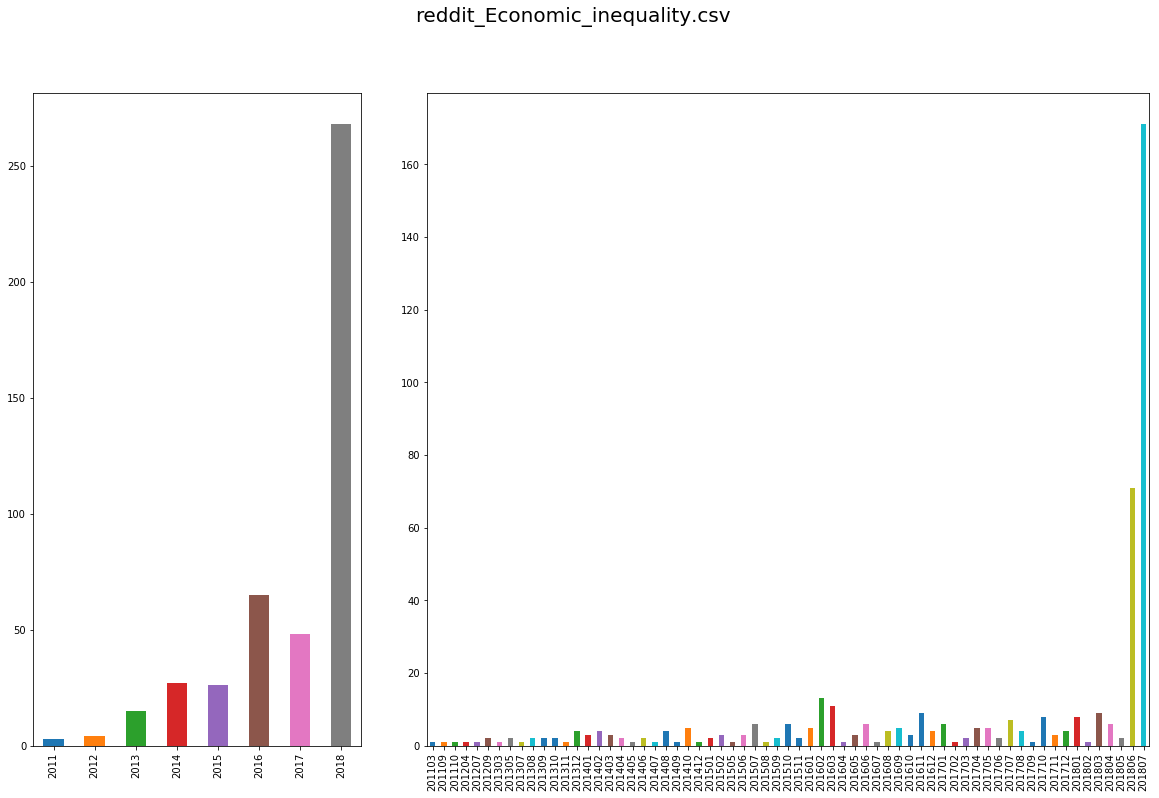

Num posts: 469


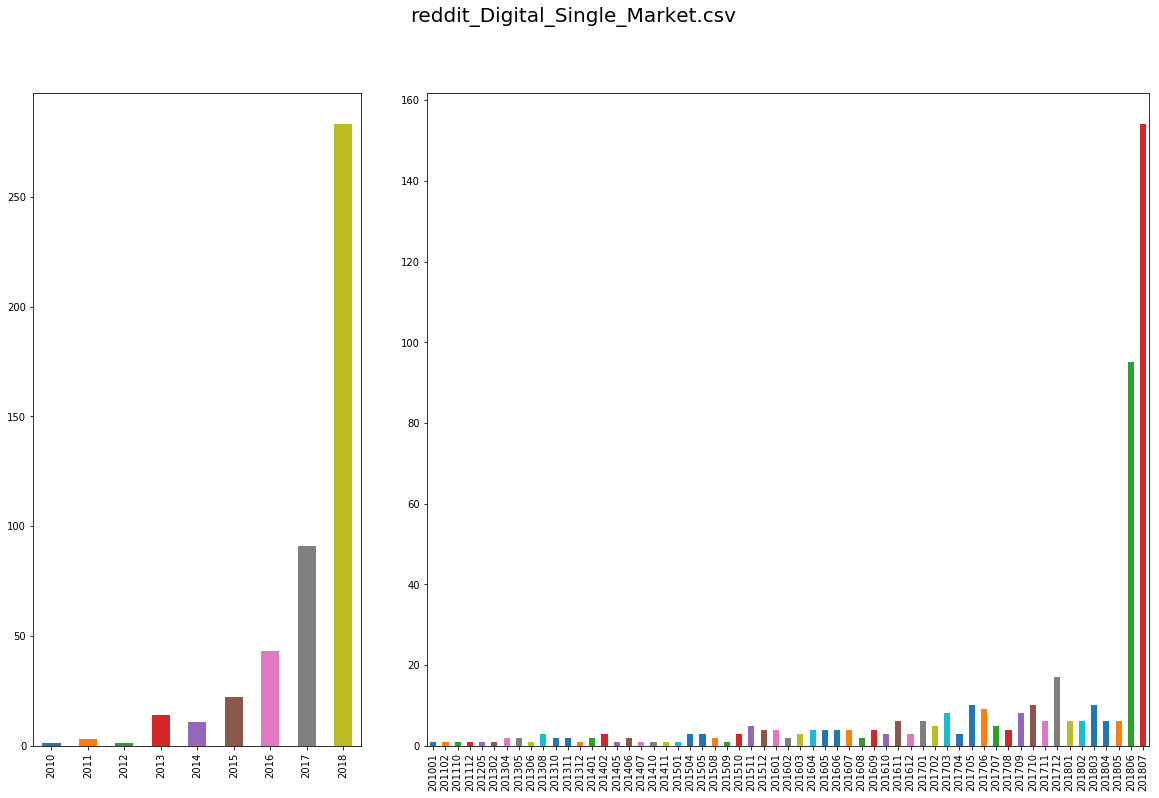

Num posts: 486


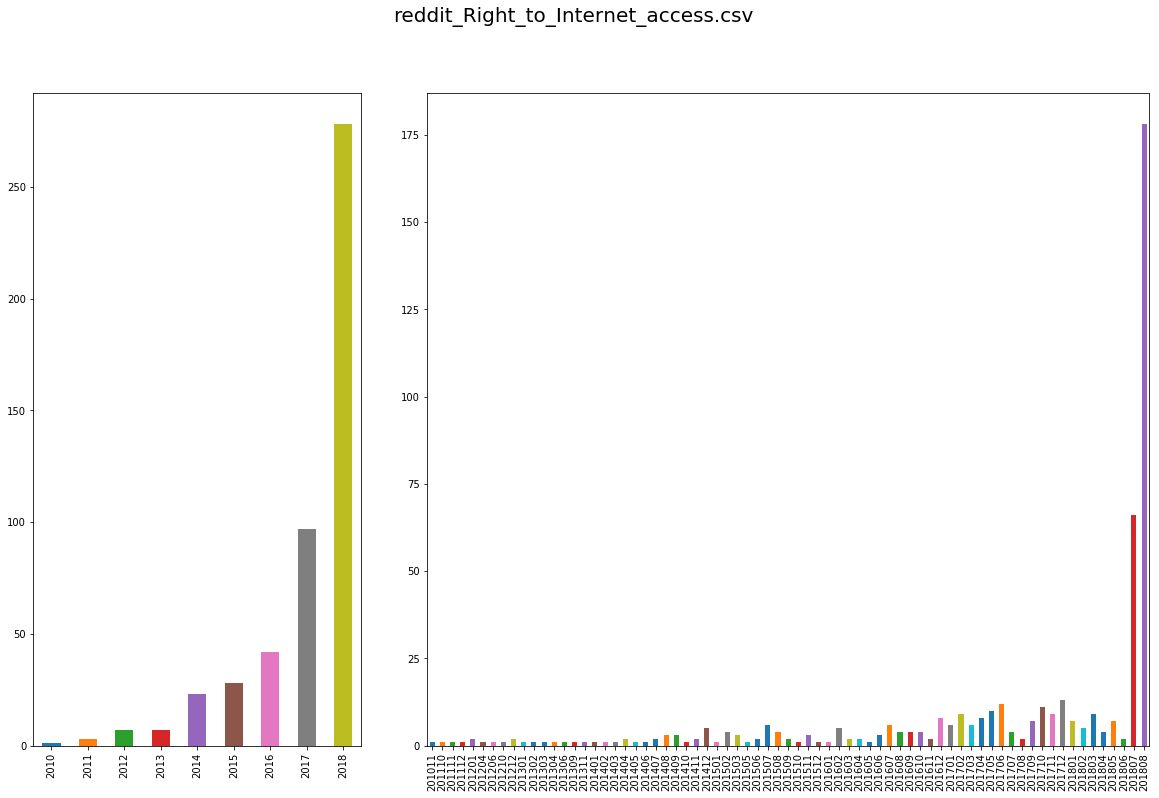

Num posts: 484


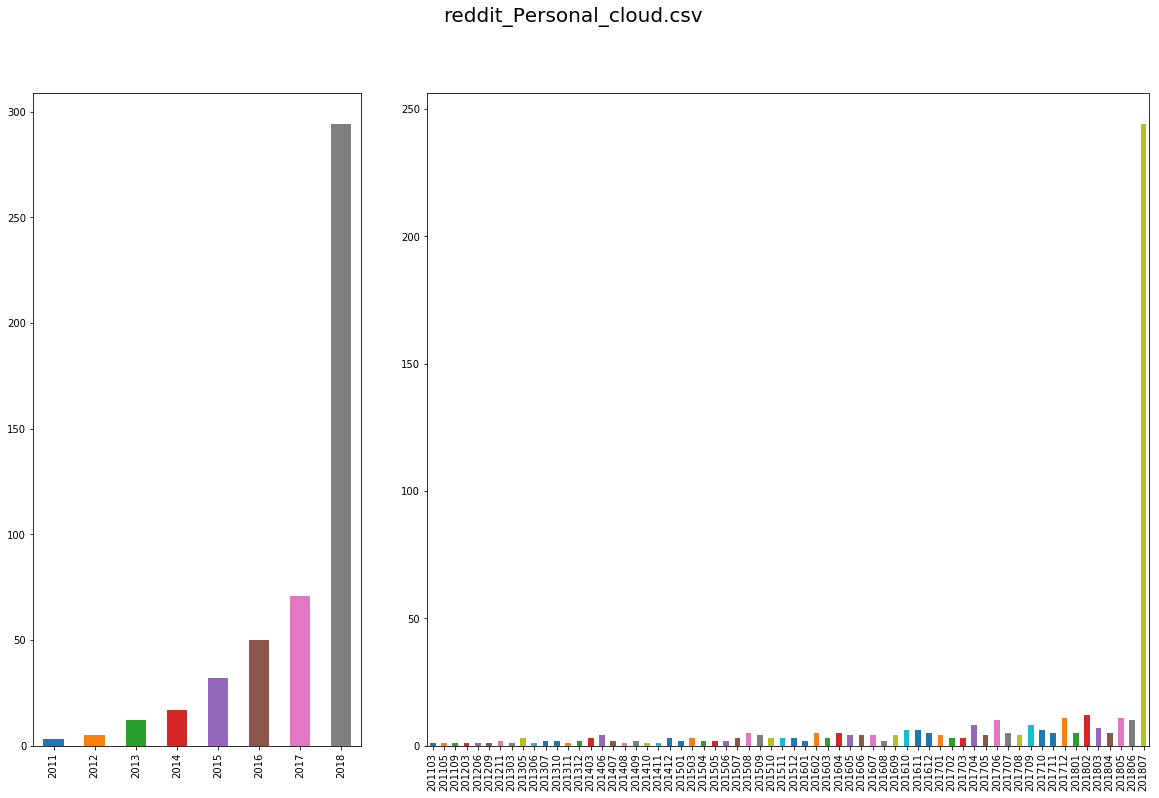

Num posts: 379


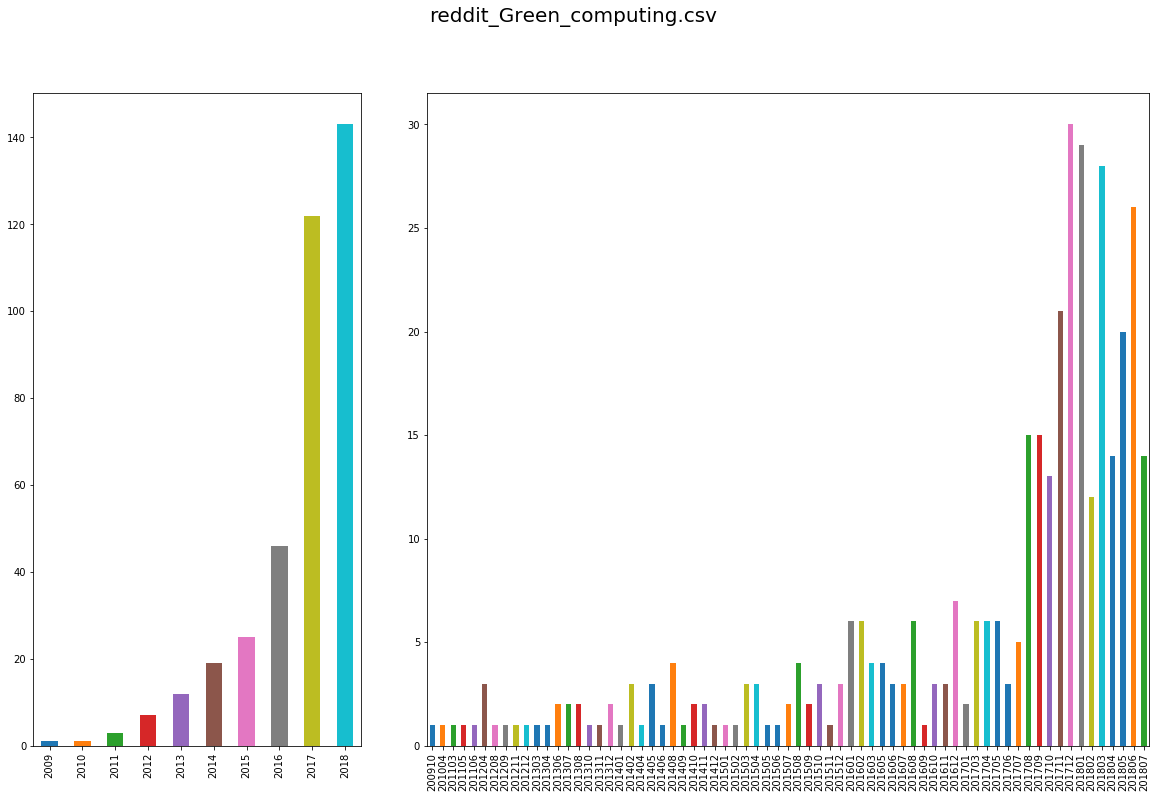

Num posts: 481


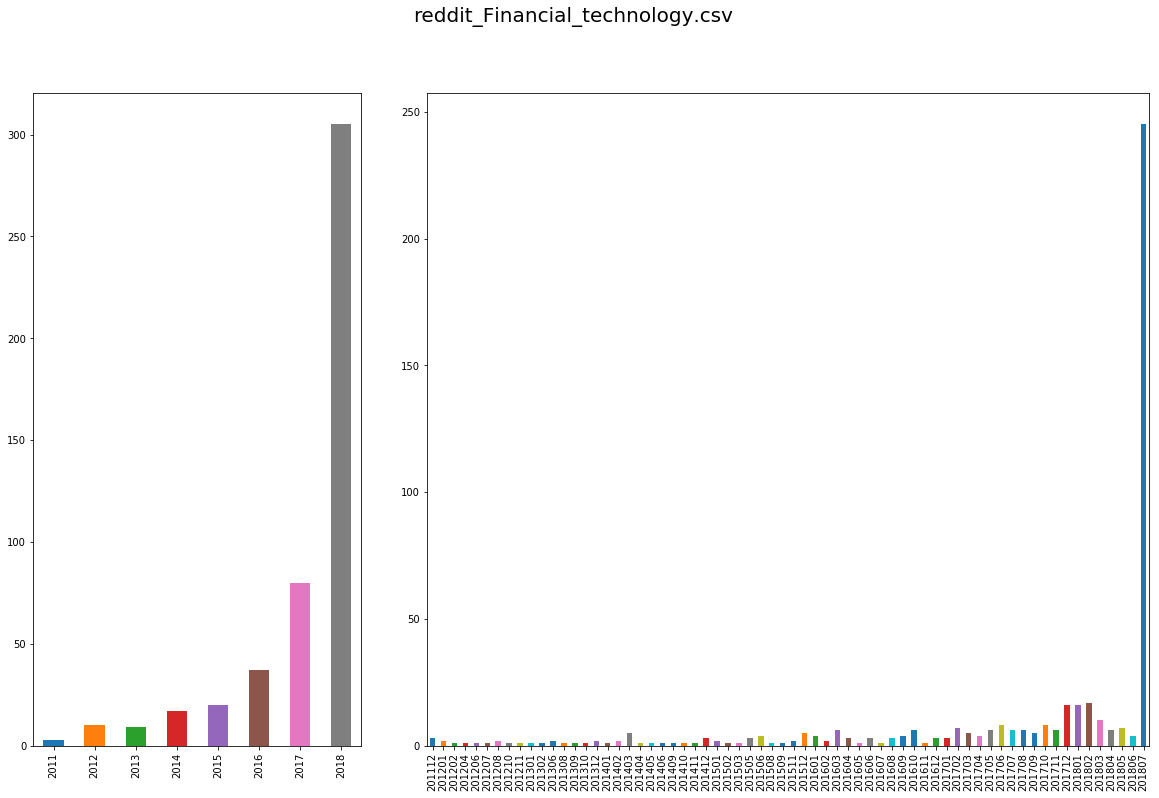

Num posts: 485


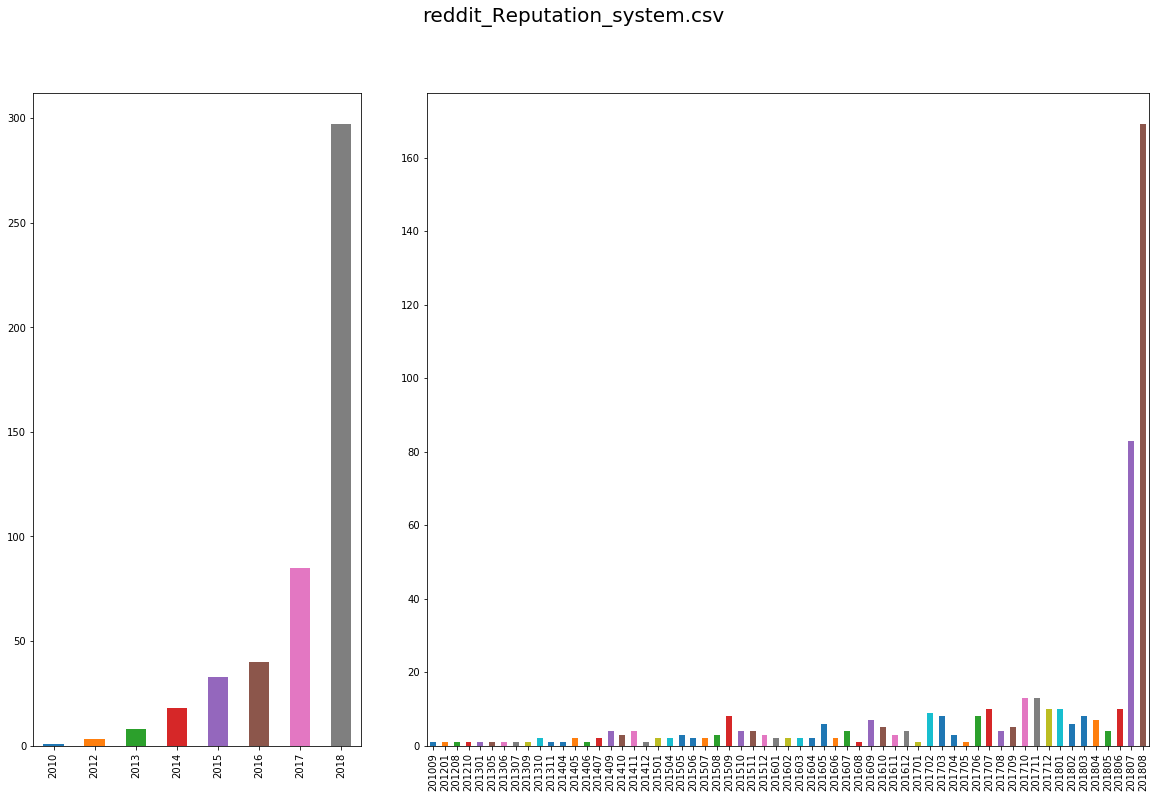

Num posts: 404


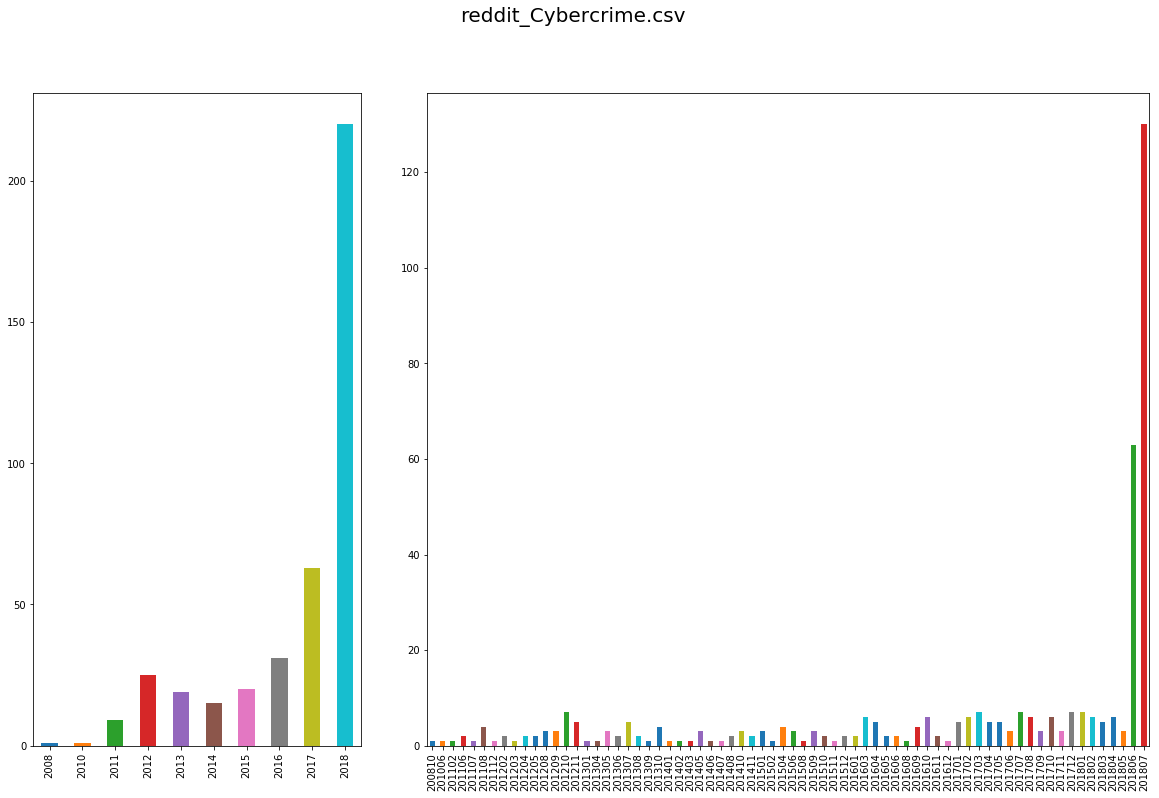

Num posts: 335


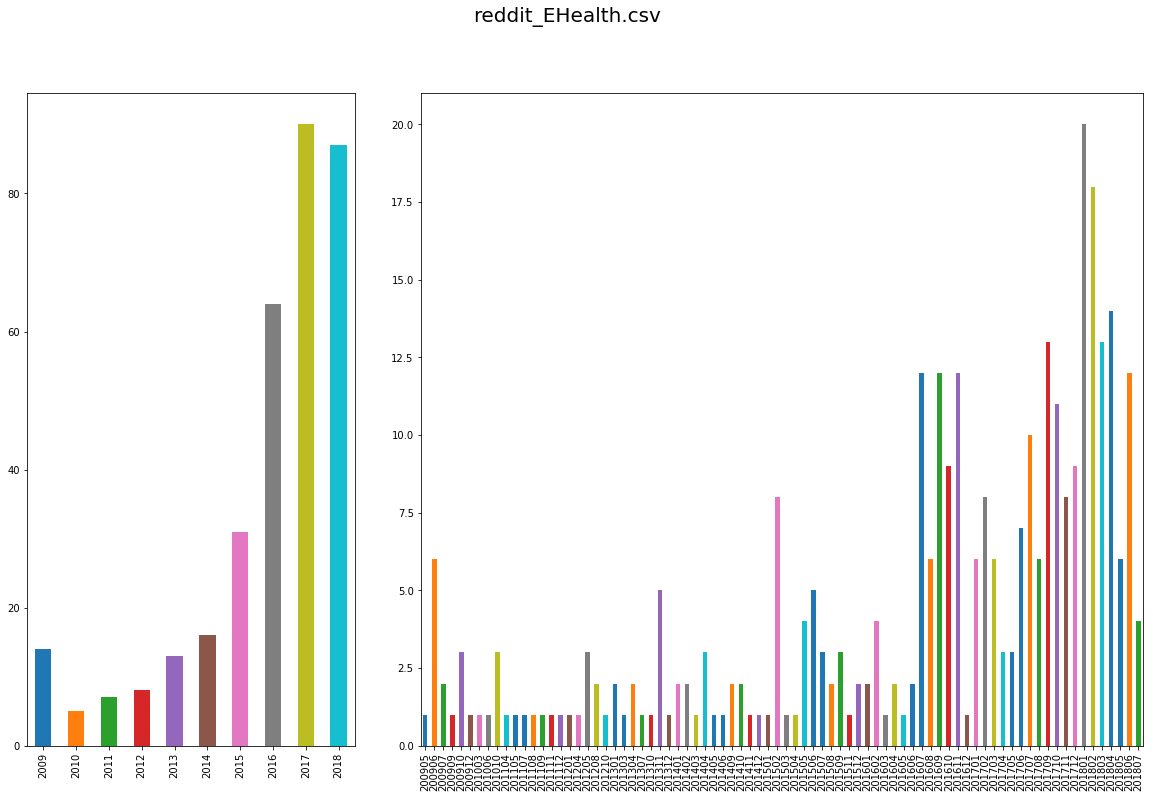

Num posts: 375


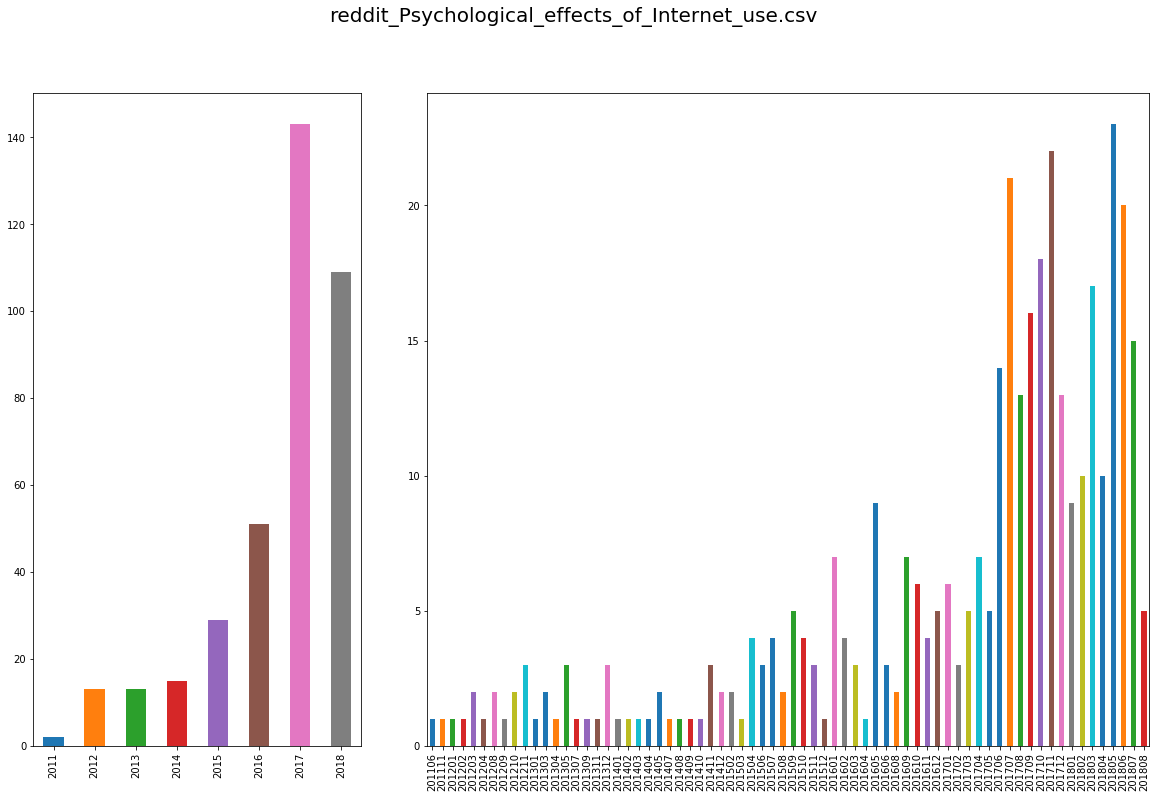

Num posts: 427


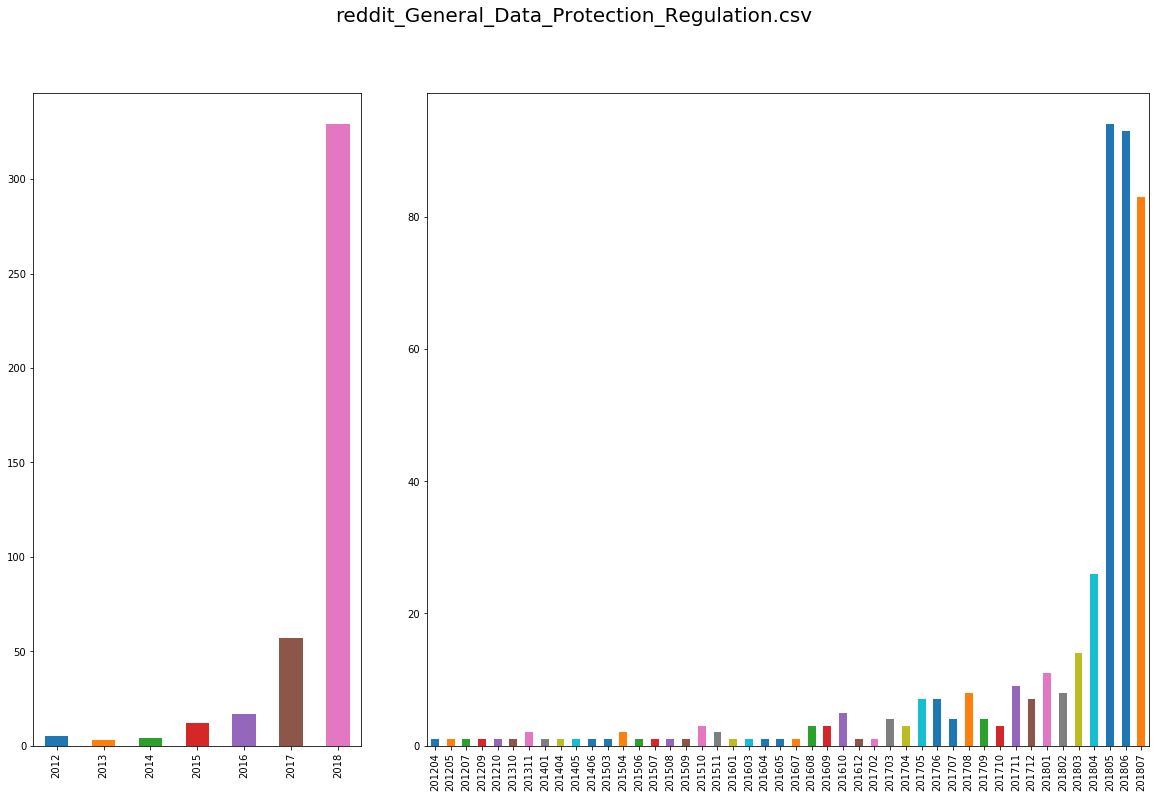

Num posts: 328


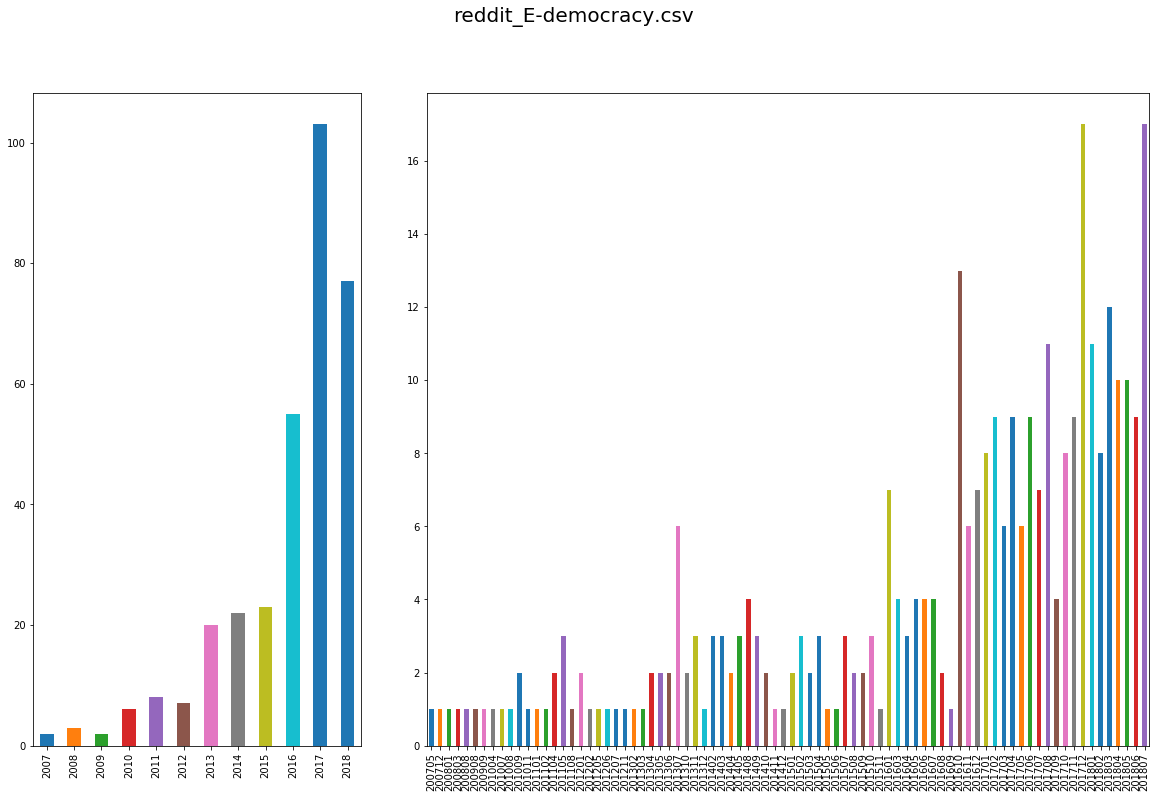

Num posts: 398


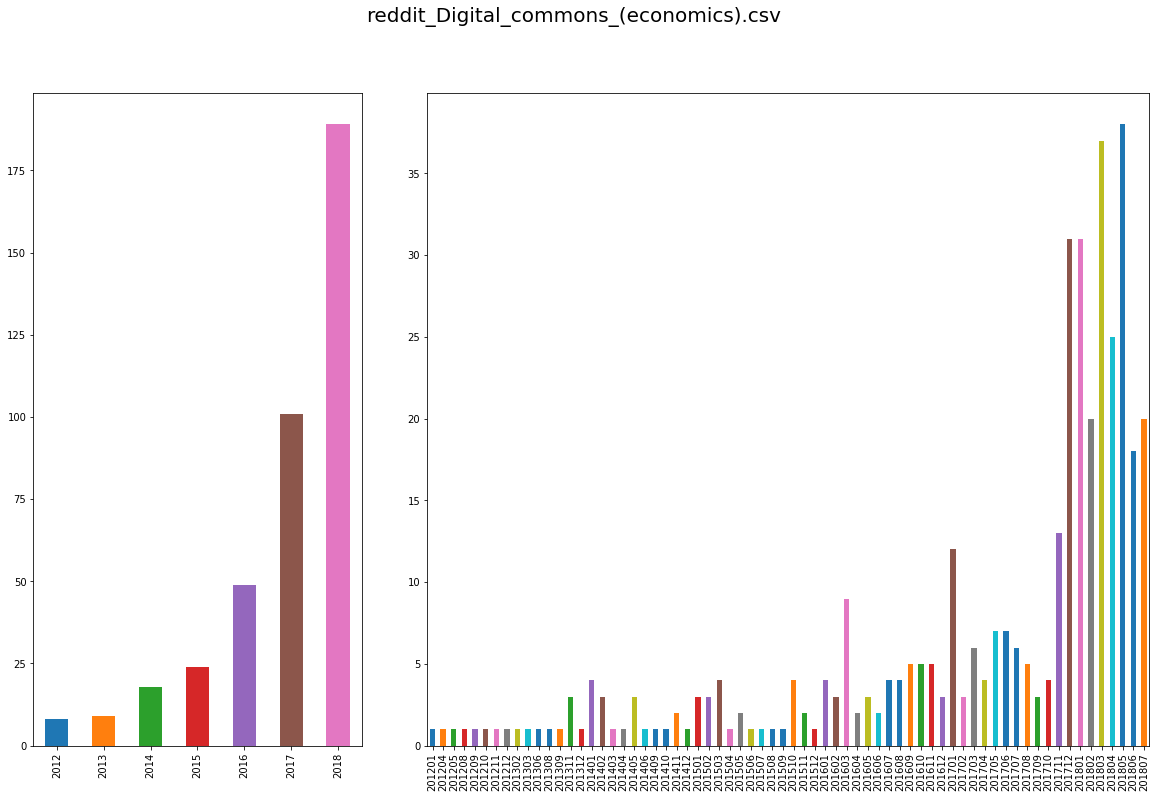

Num posts: 479


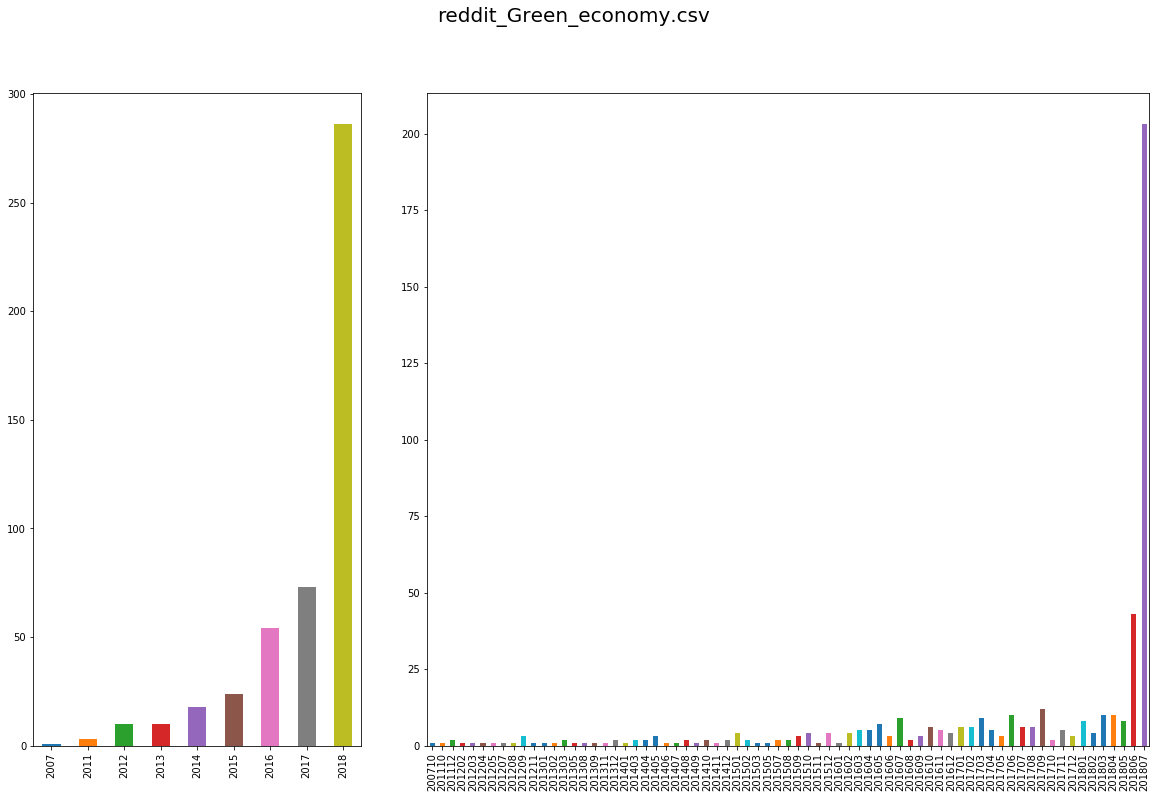

Num posts: 479


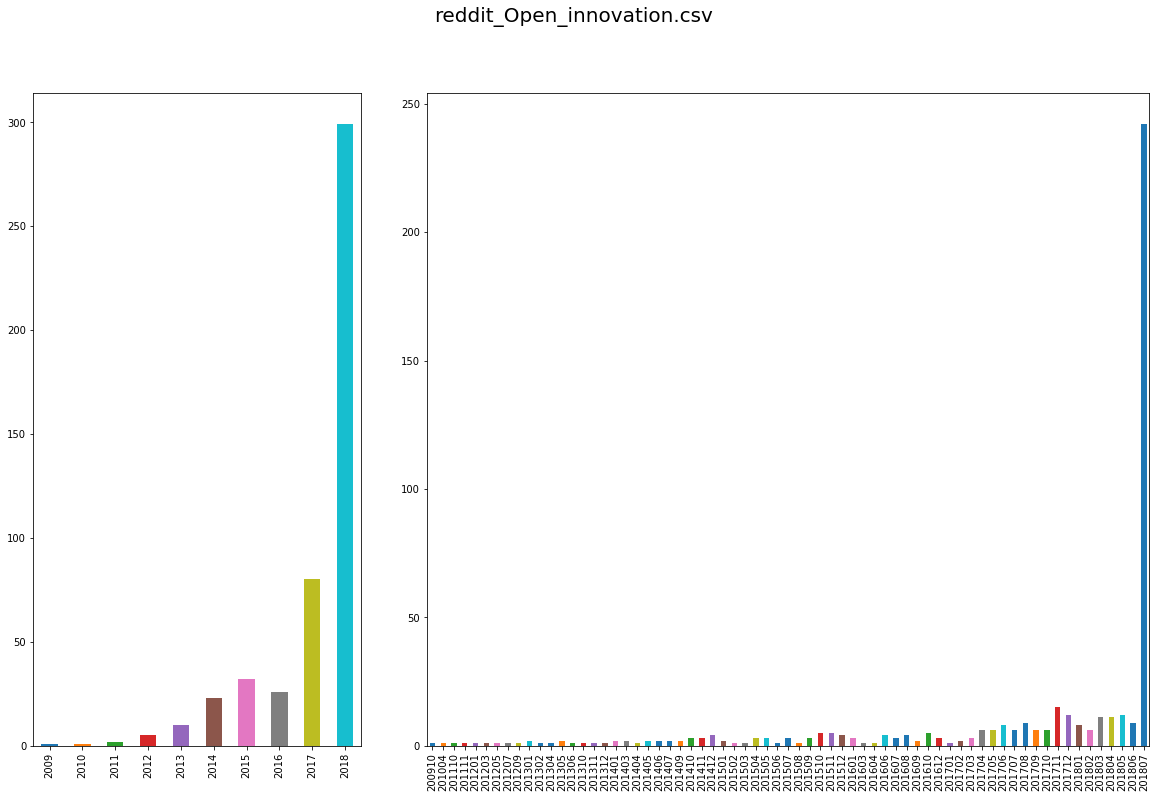

Num posts: 489


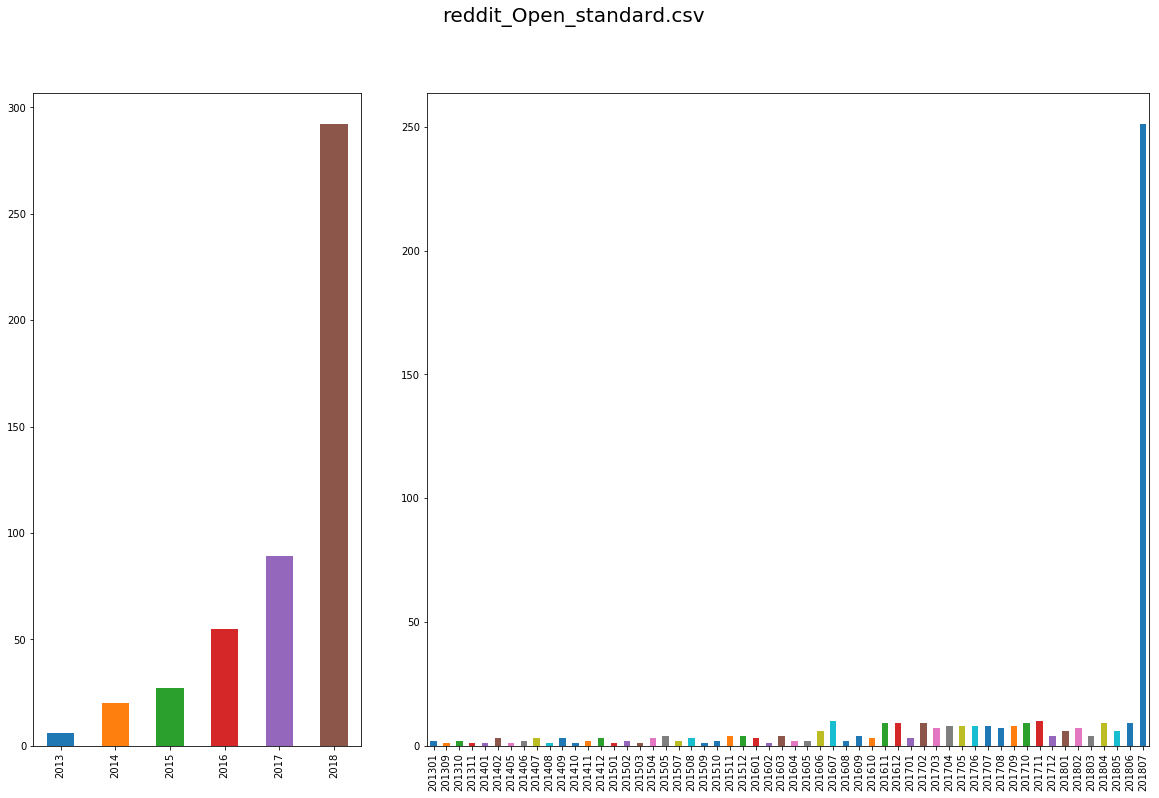

Num posts: 434


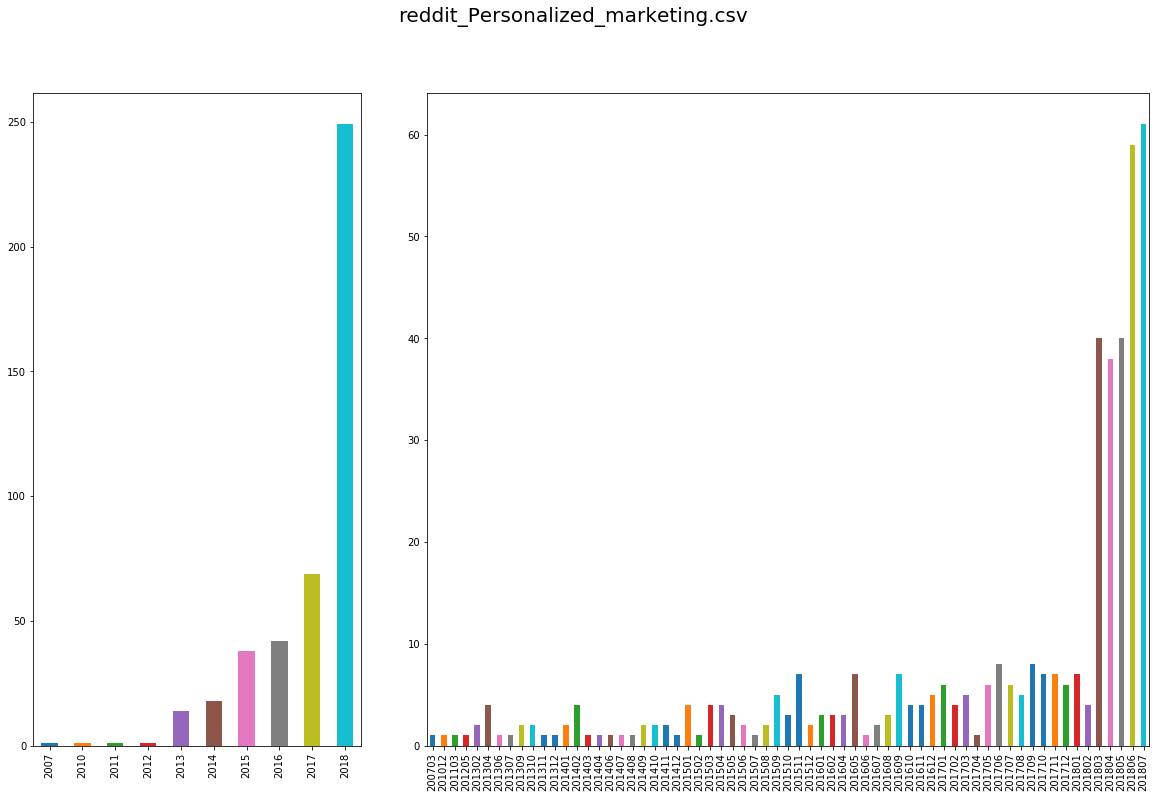

Num posts: 485


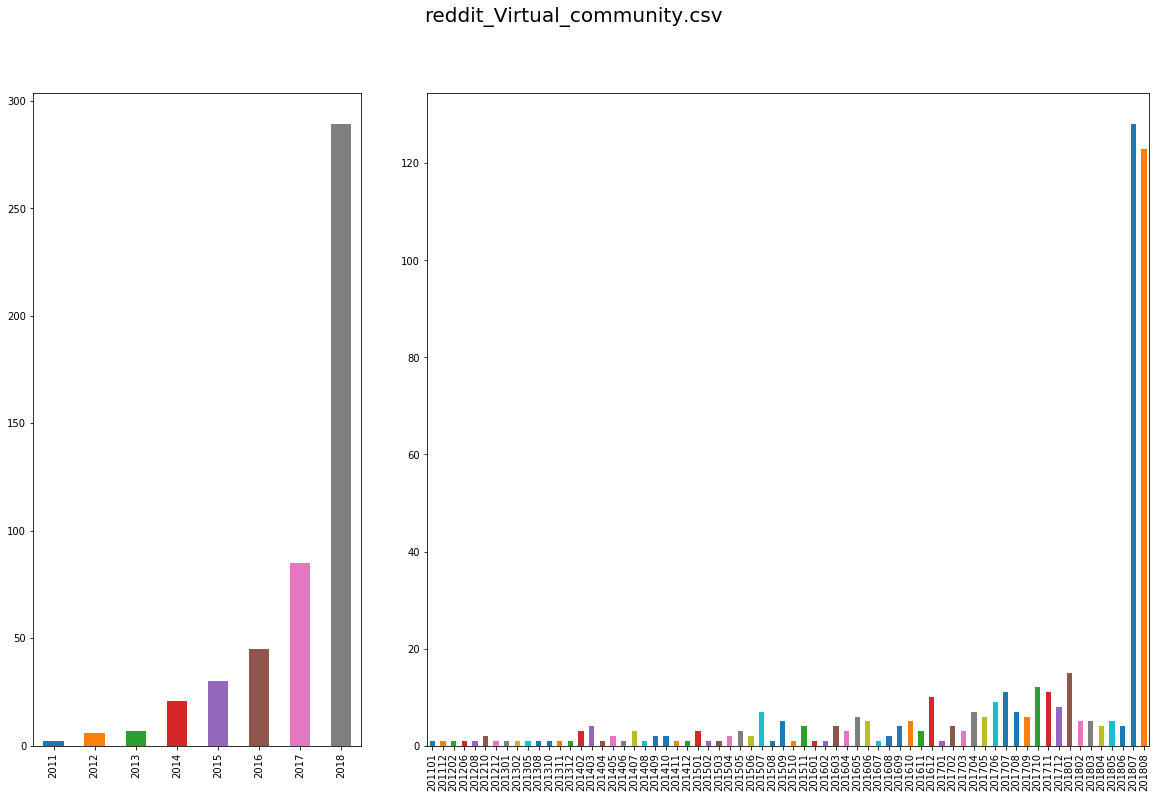

Num posts: 466


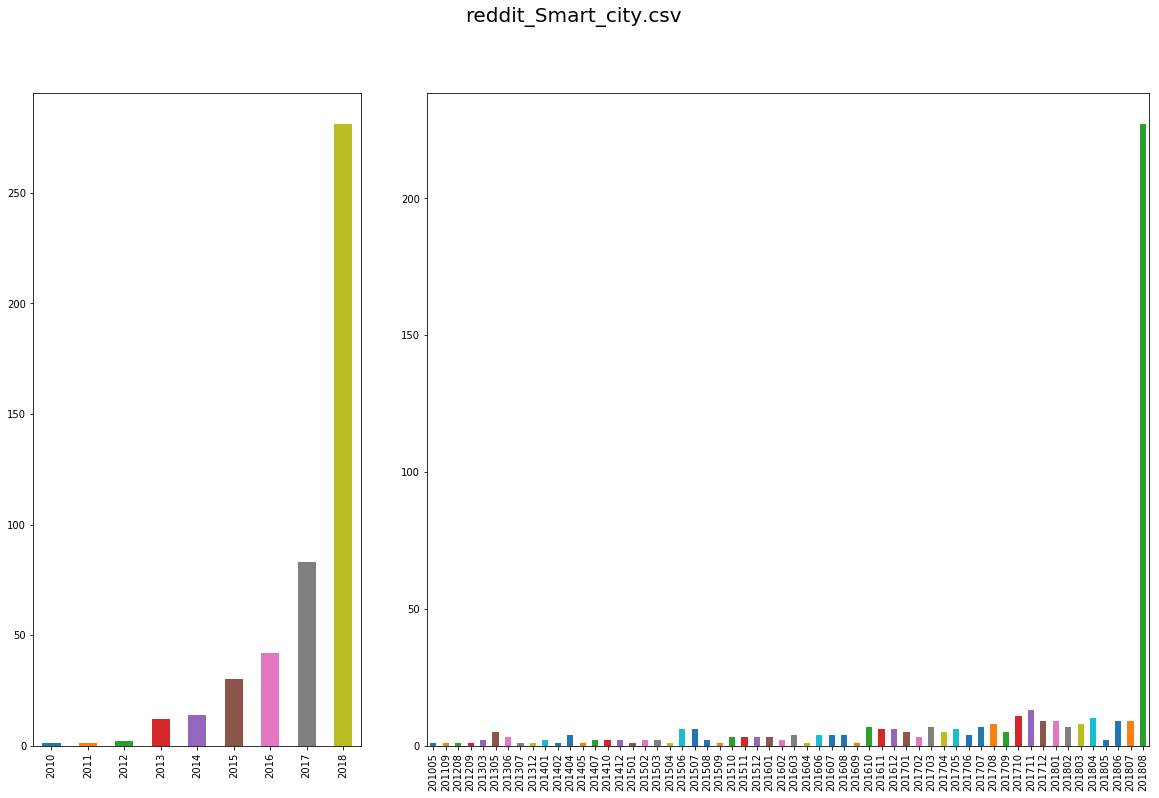

Num posts: 477


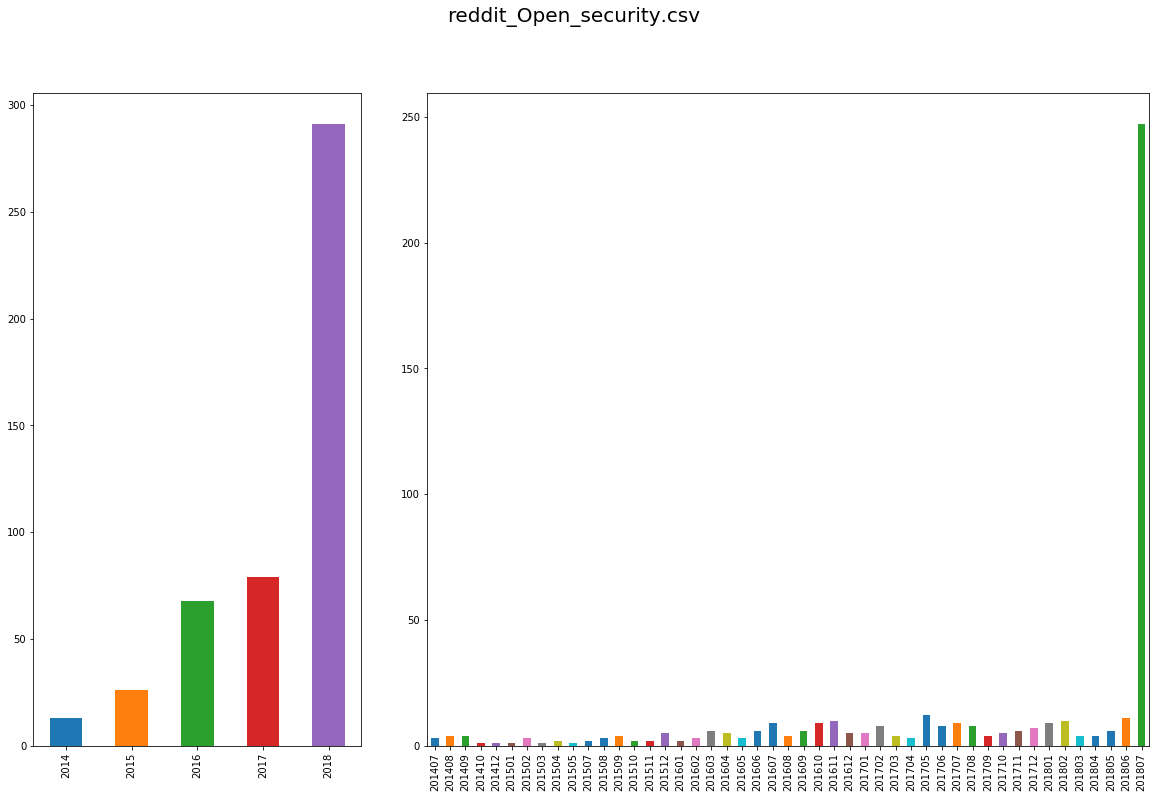

Num posts: 212


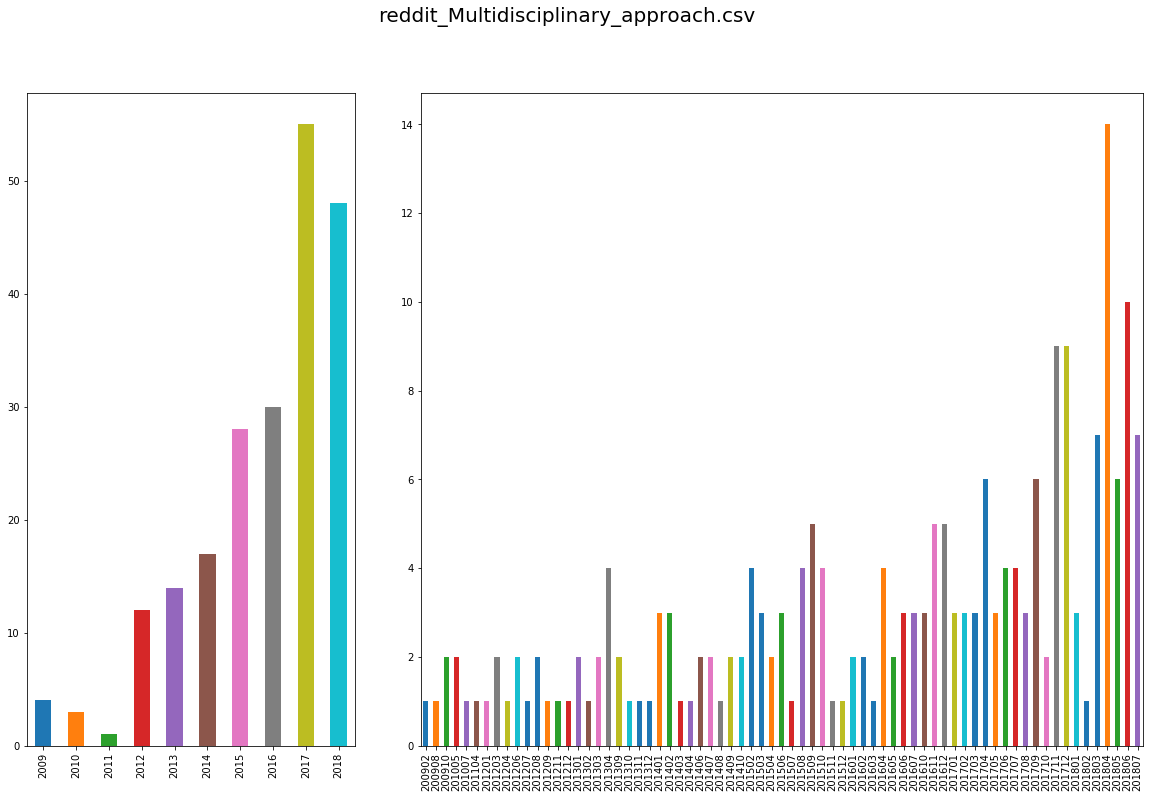

Num posts: 477


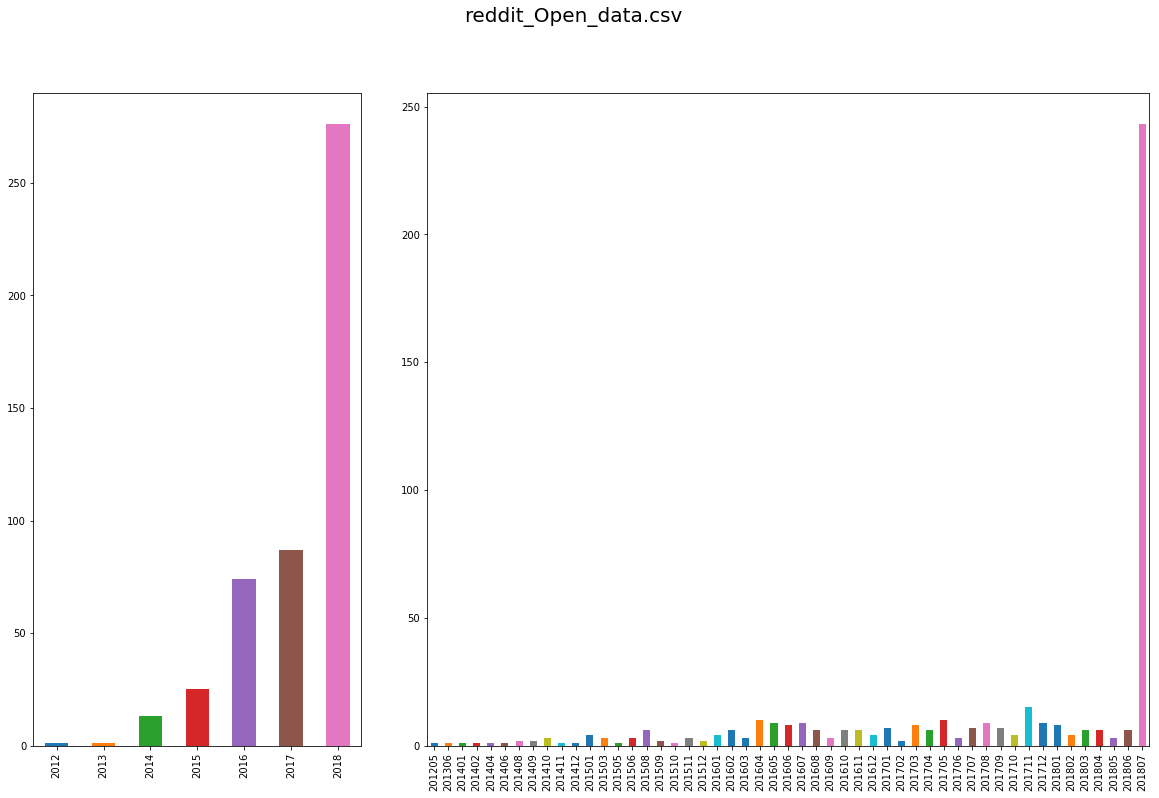

Num posts: 481


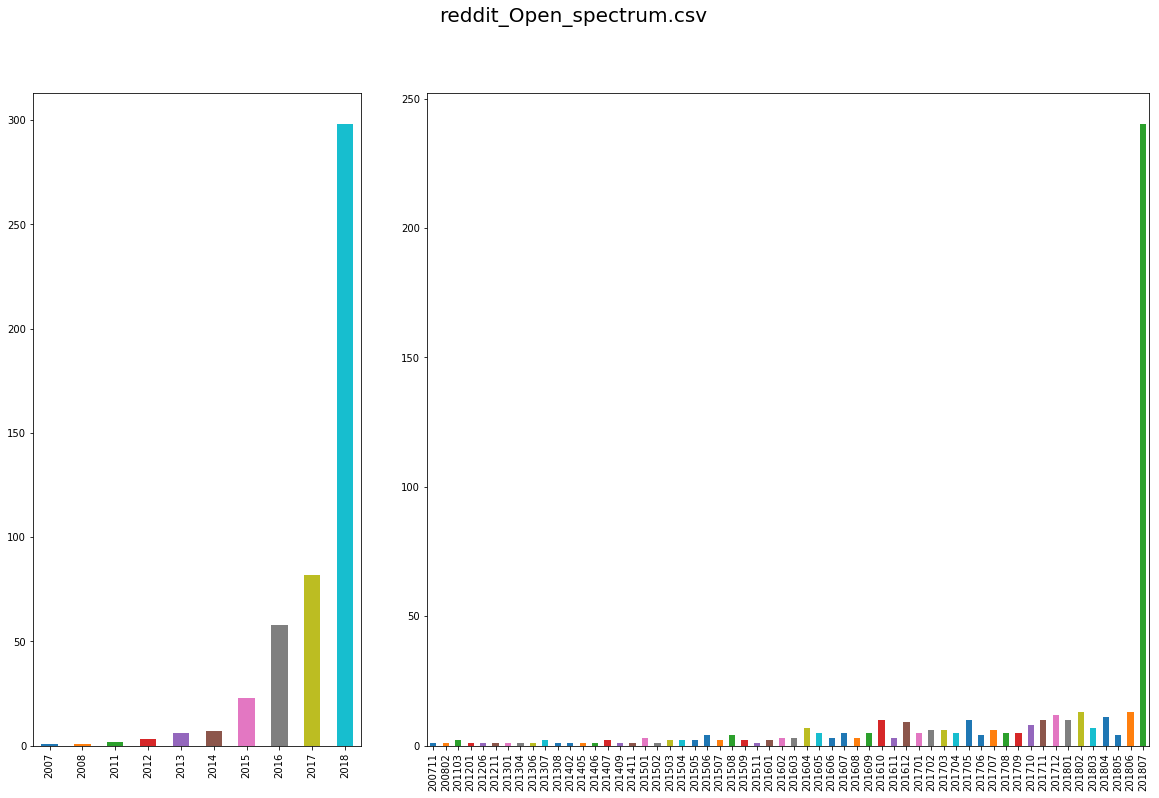

Num posts: 452


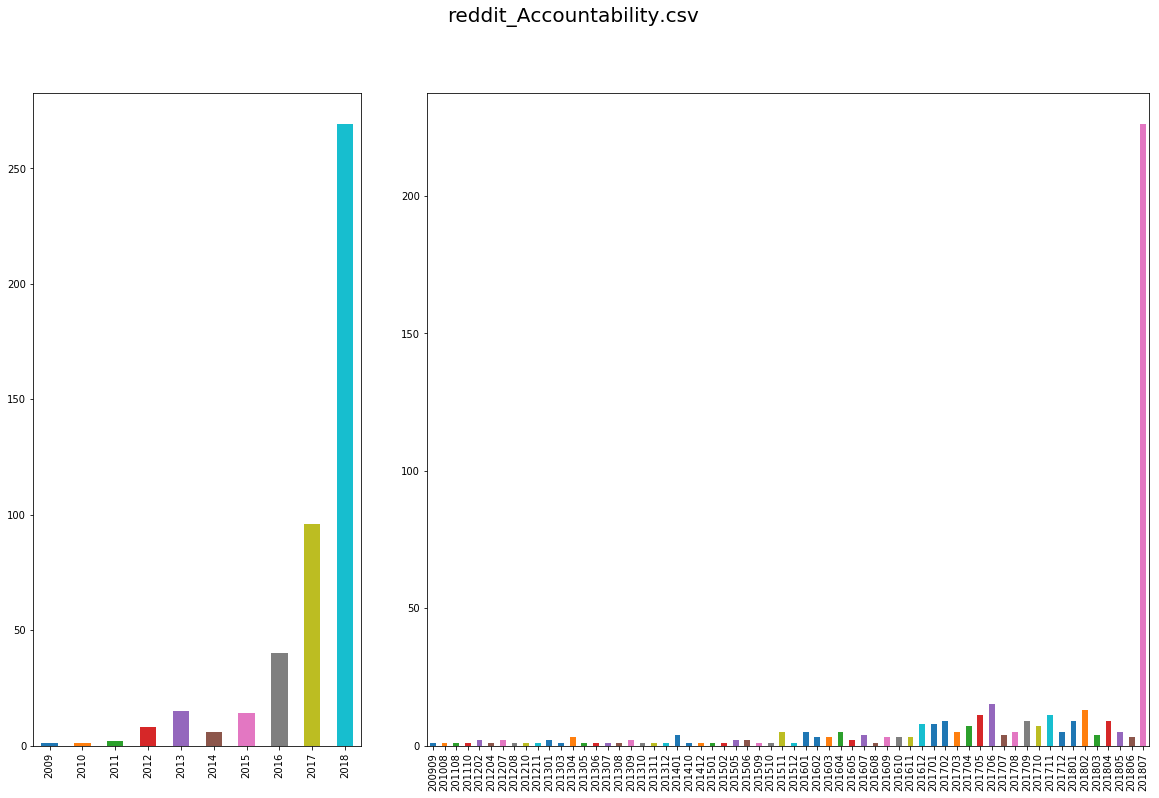

Num posts: 429


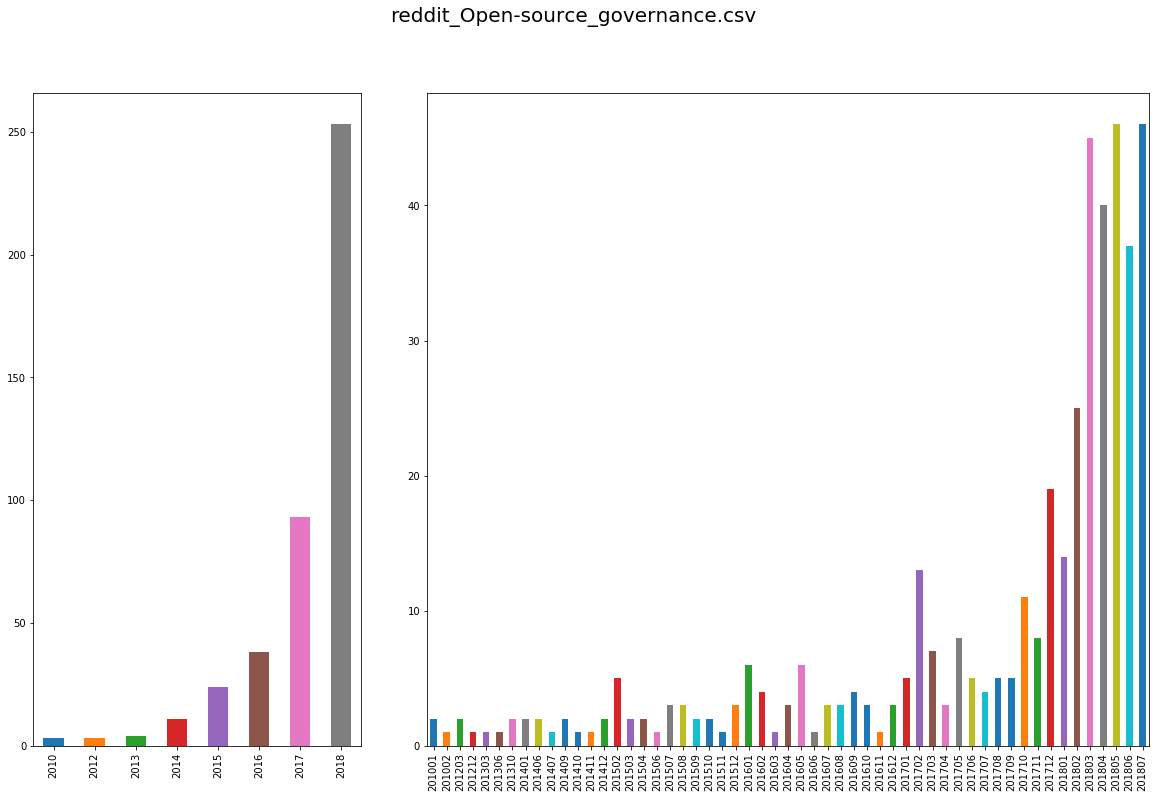

Num posts: 468


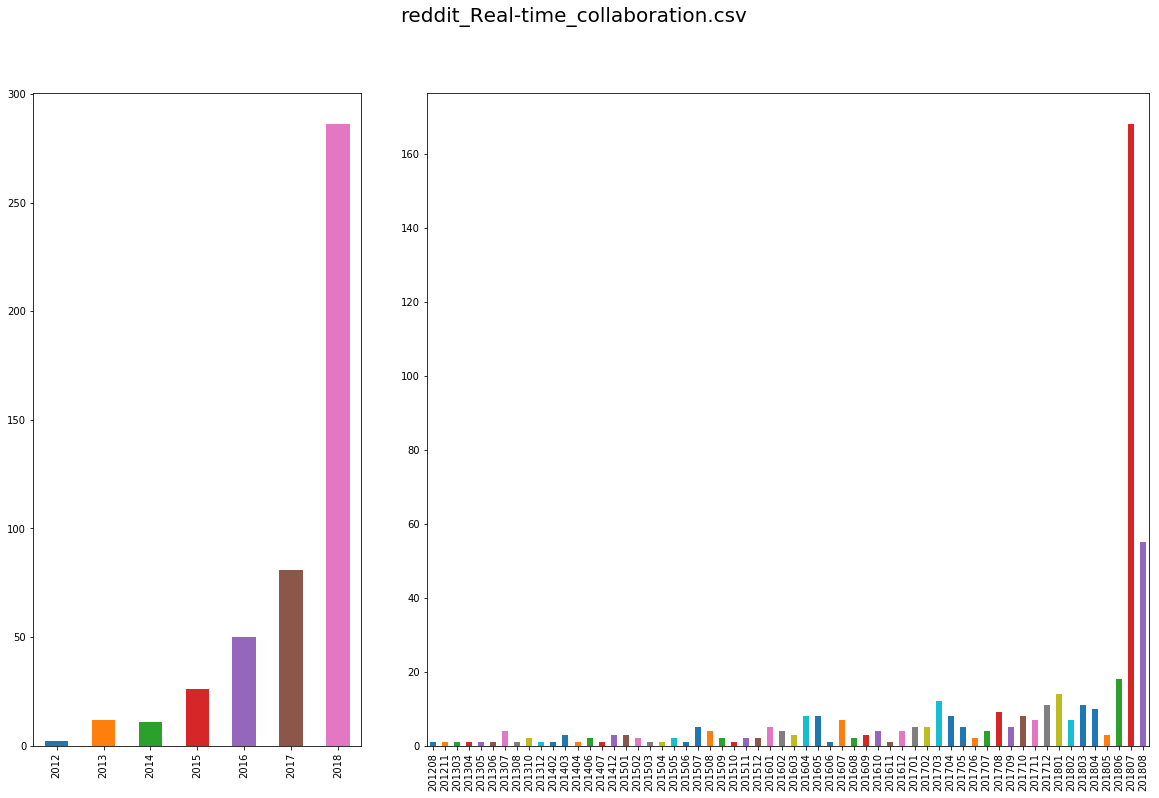

Num posts: 469


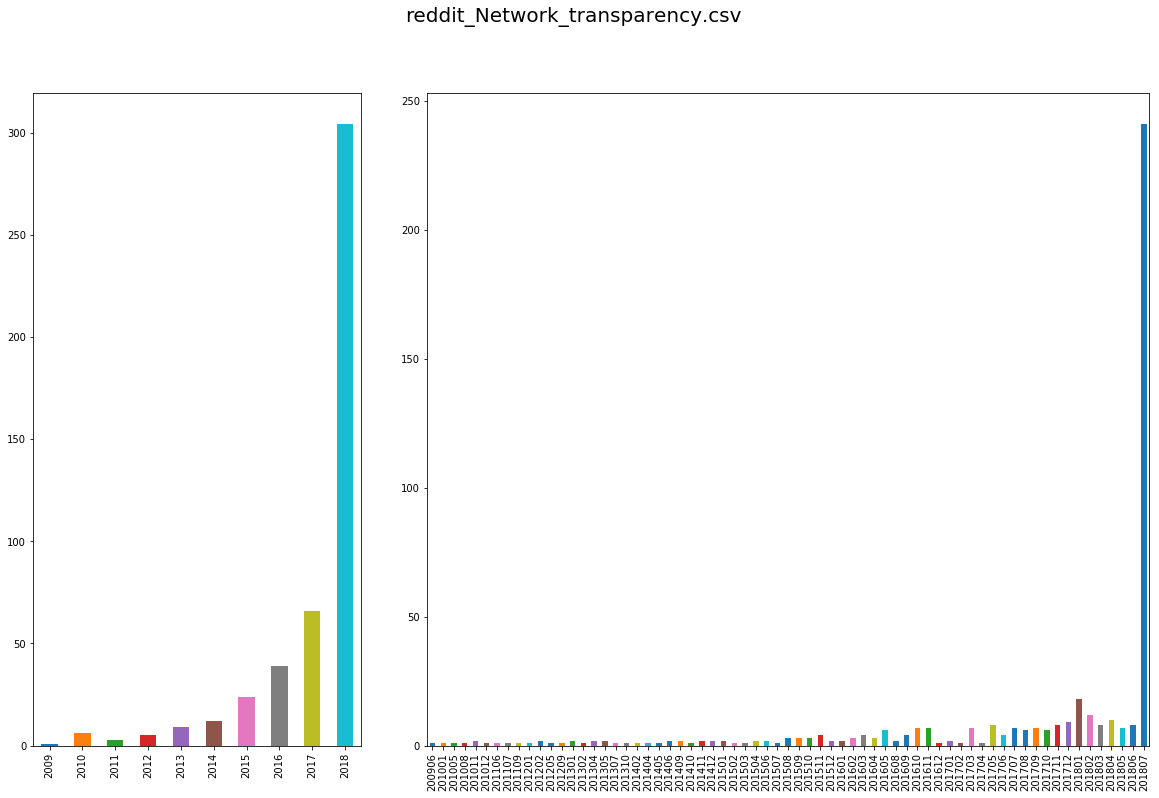

Num posts: 421


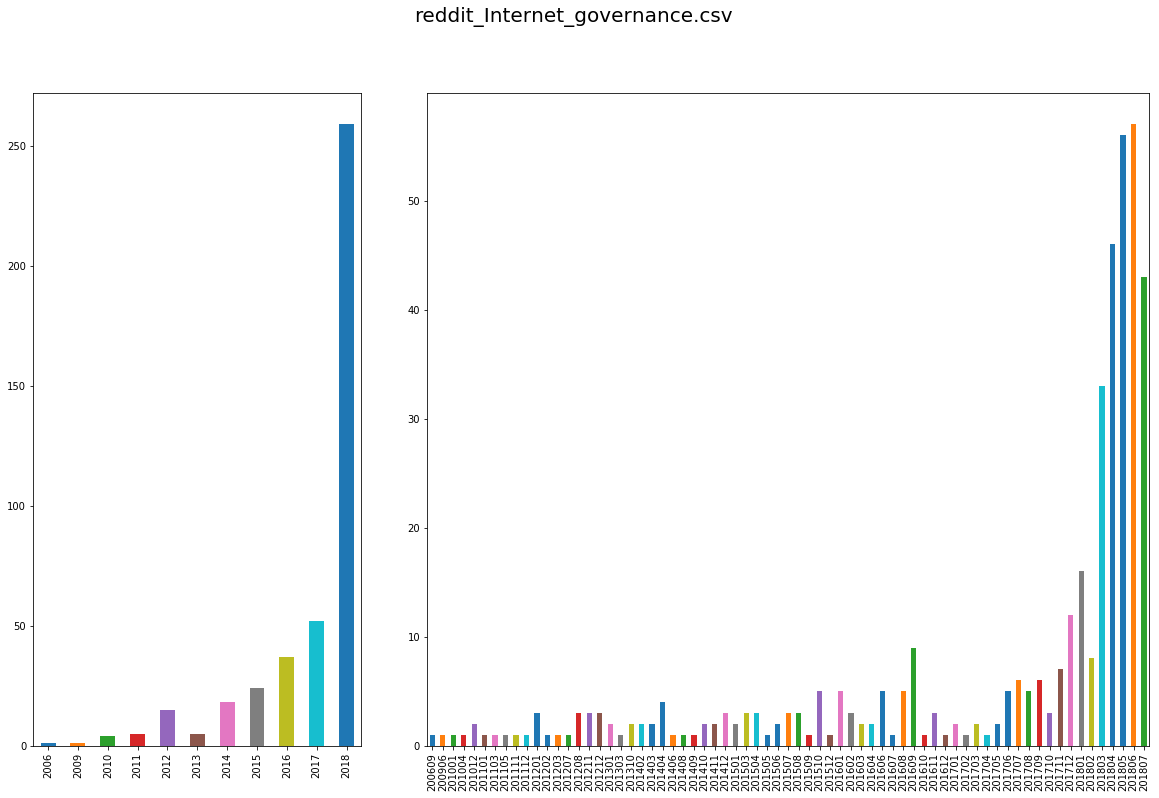

Num posts: 471


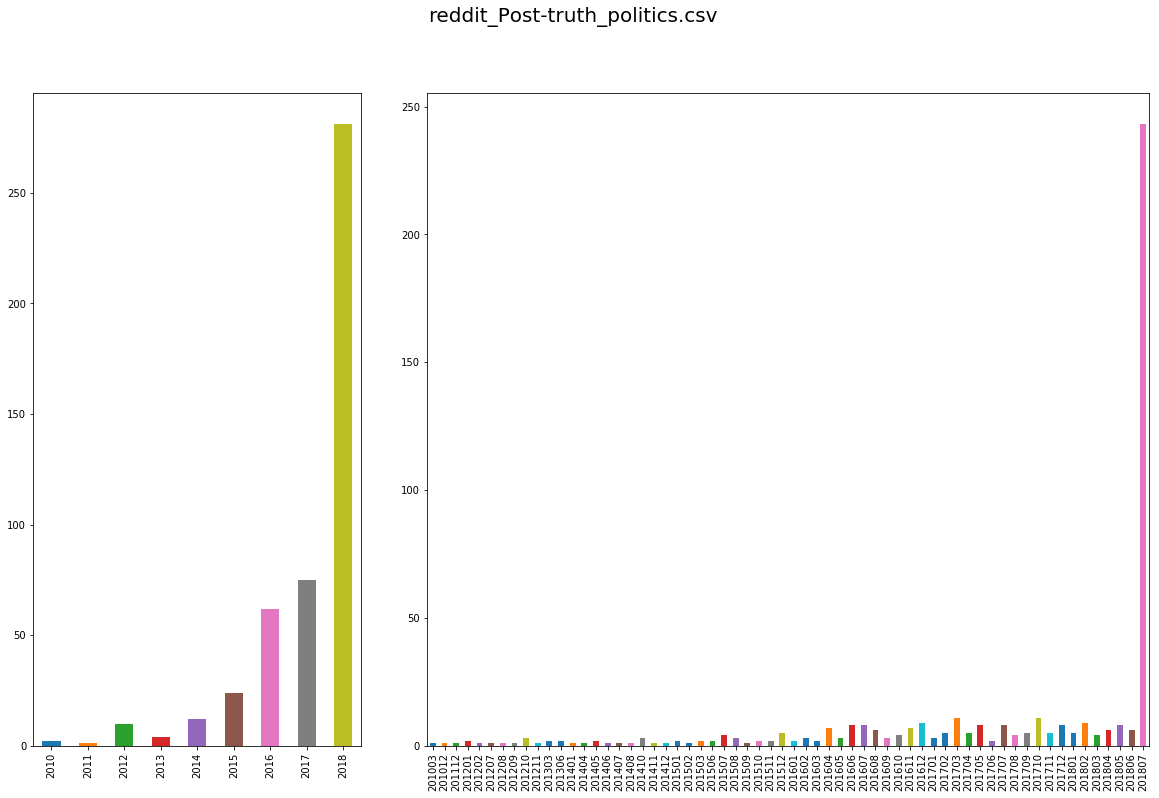

Num posts: 438


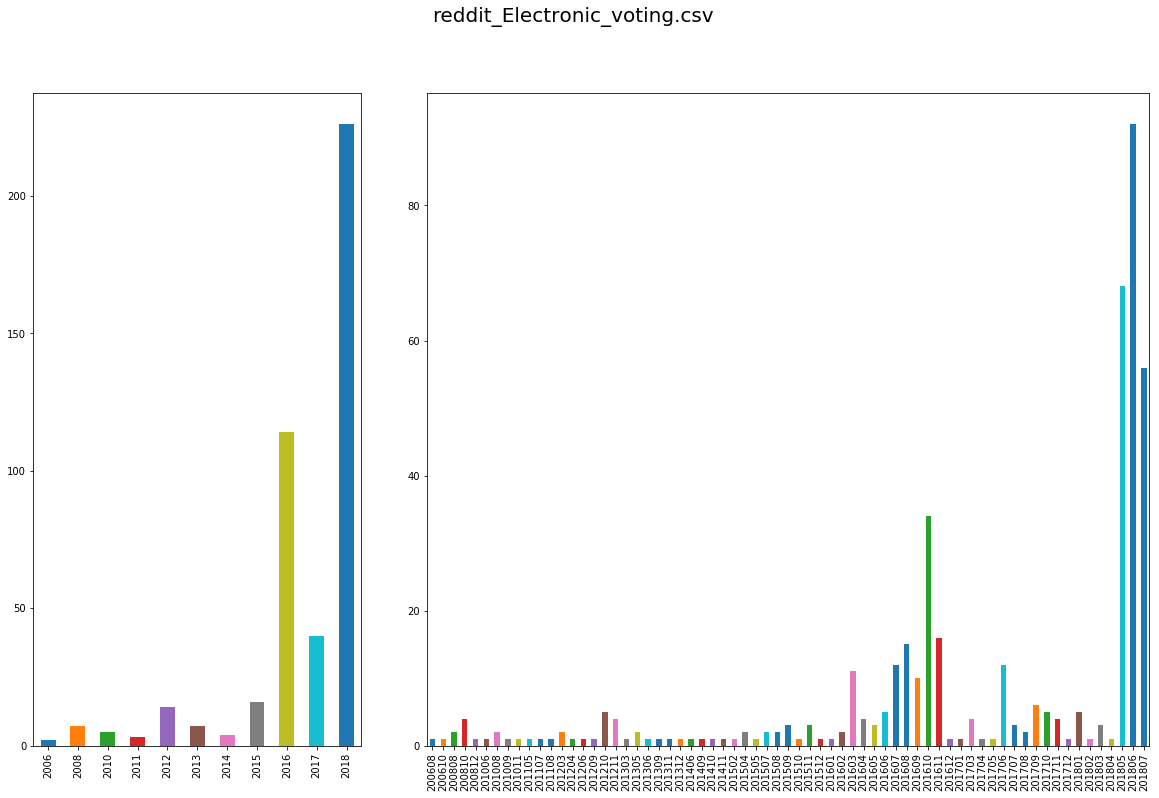

Num posts: 473


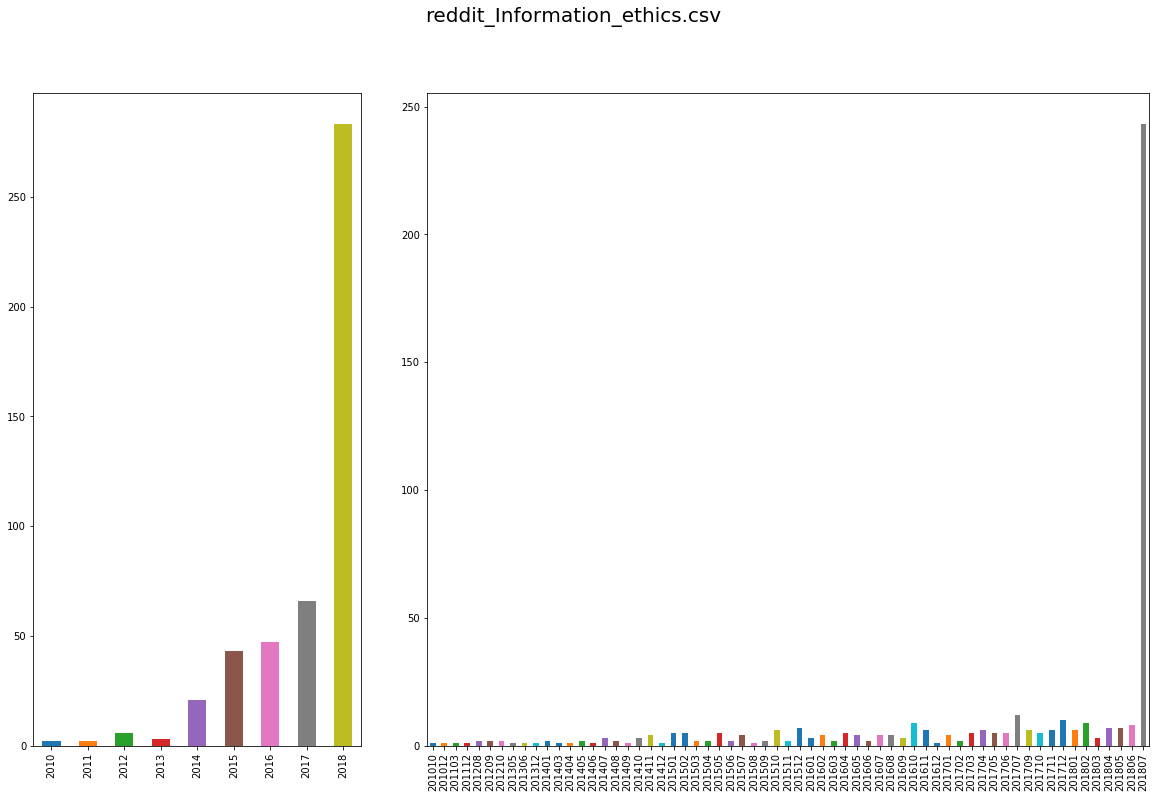

Num posts: 461


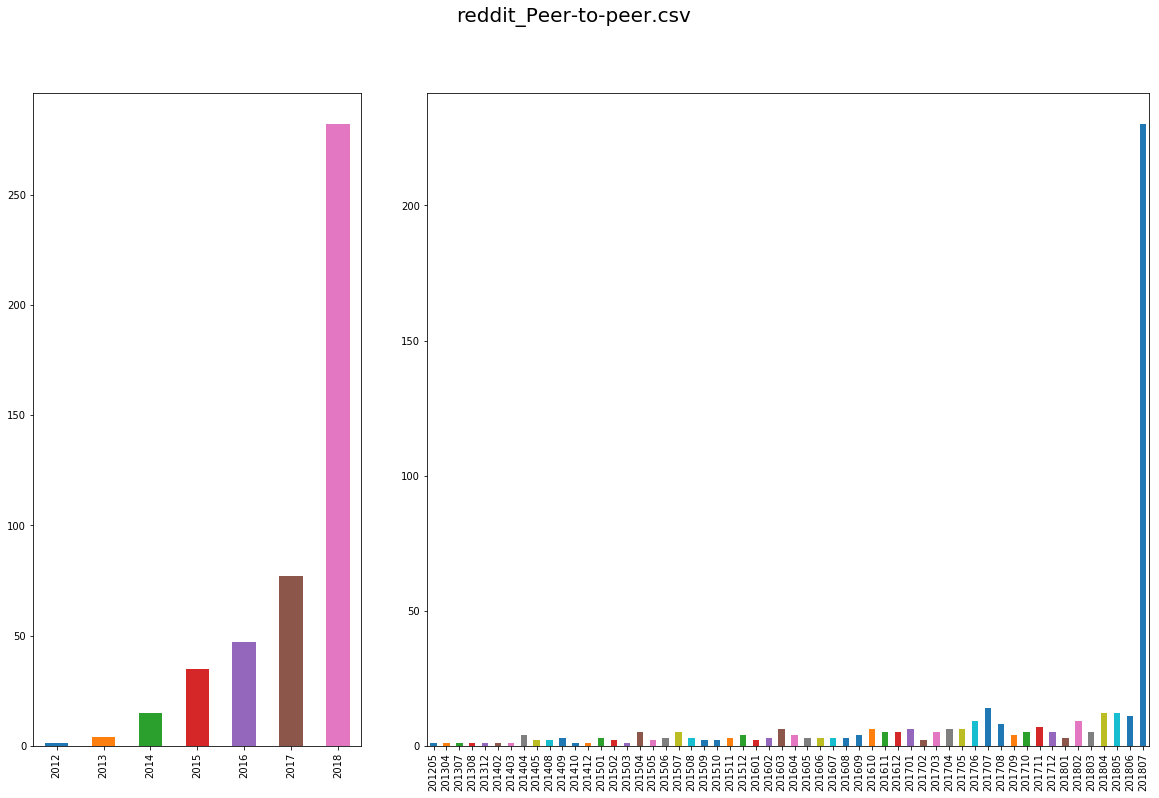

Num posts: 432


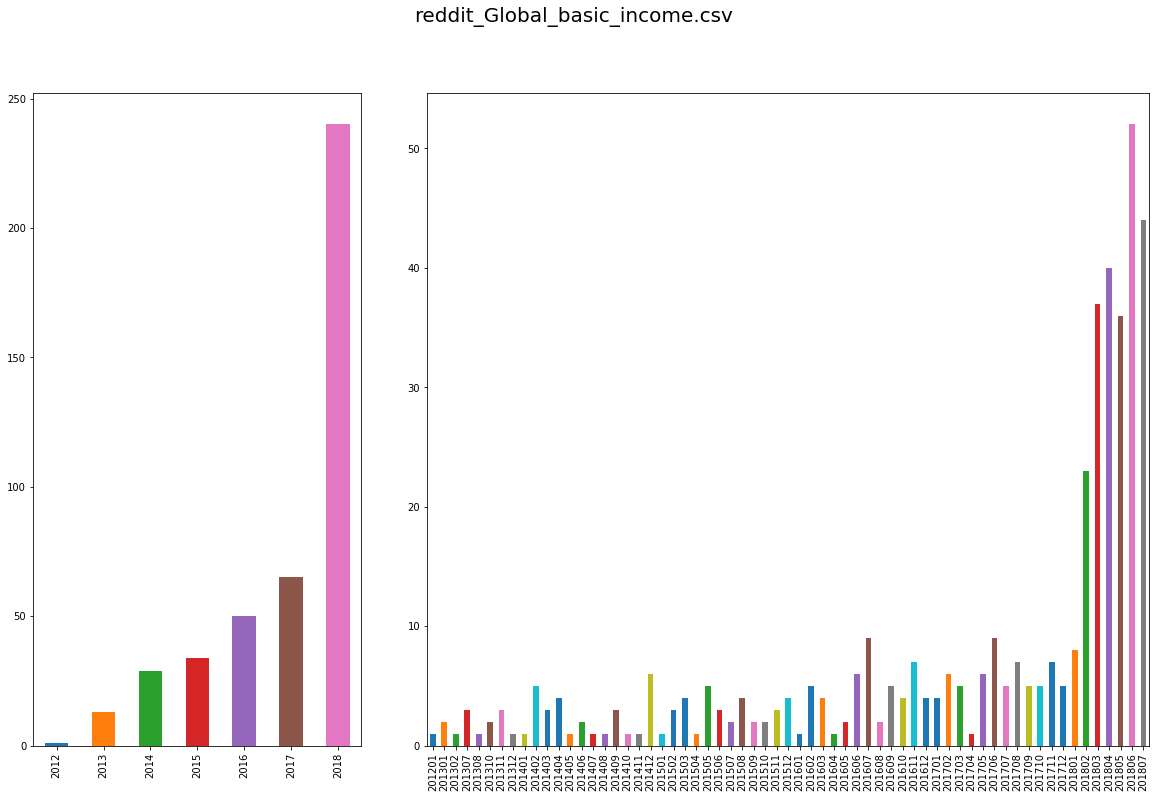

Num posts: 390


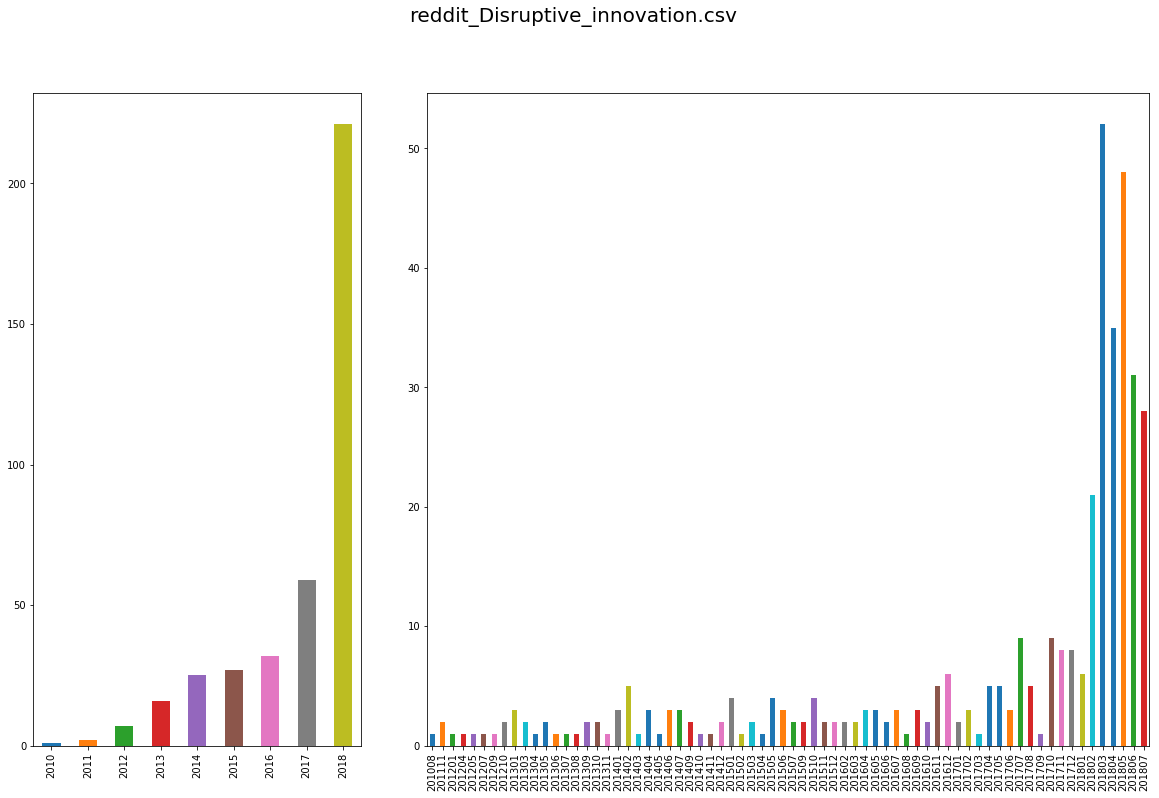

Num posts: 481


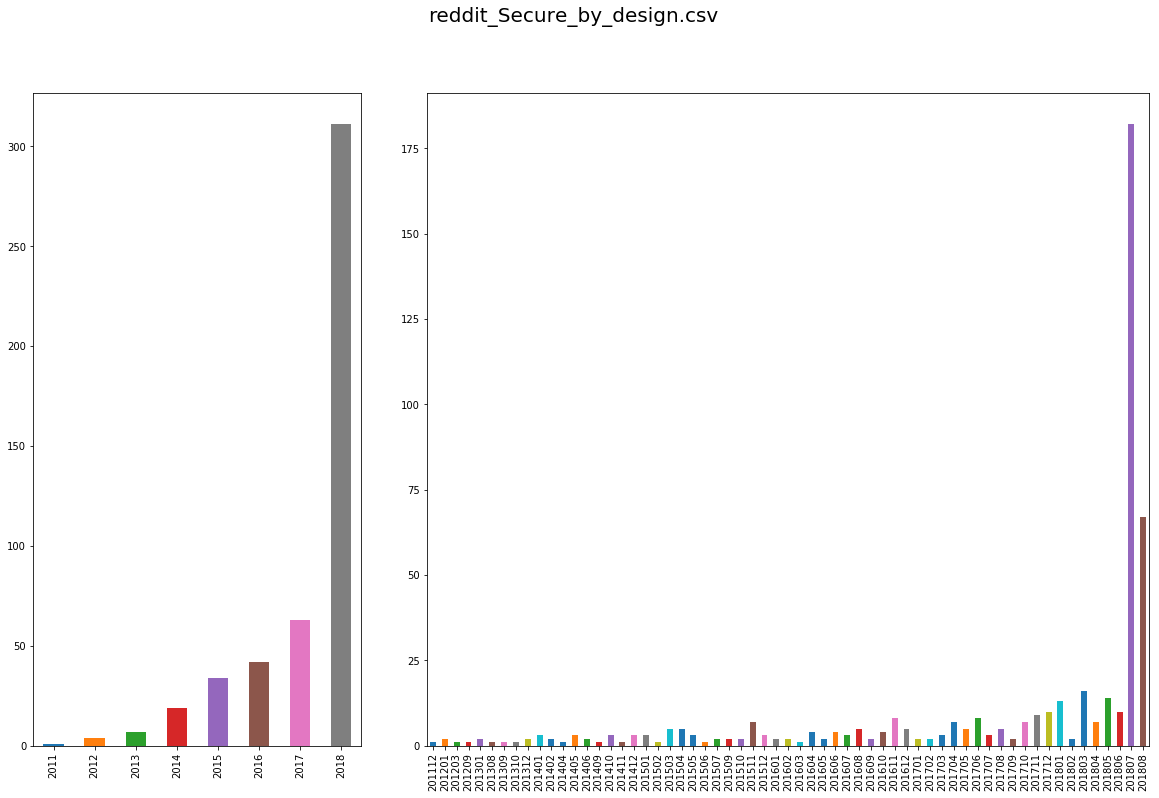

Num posts: 427


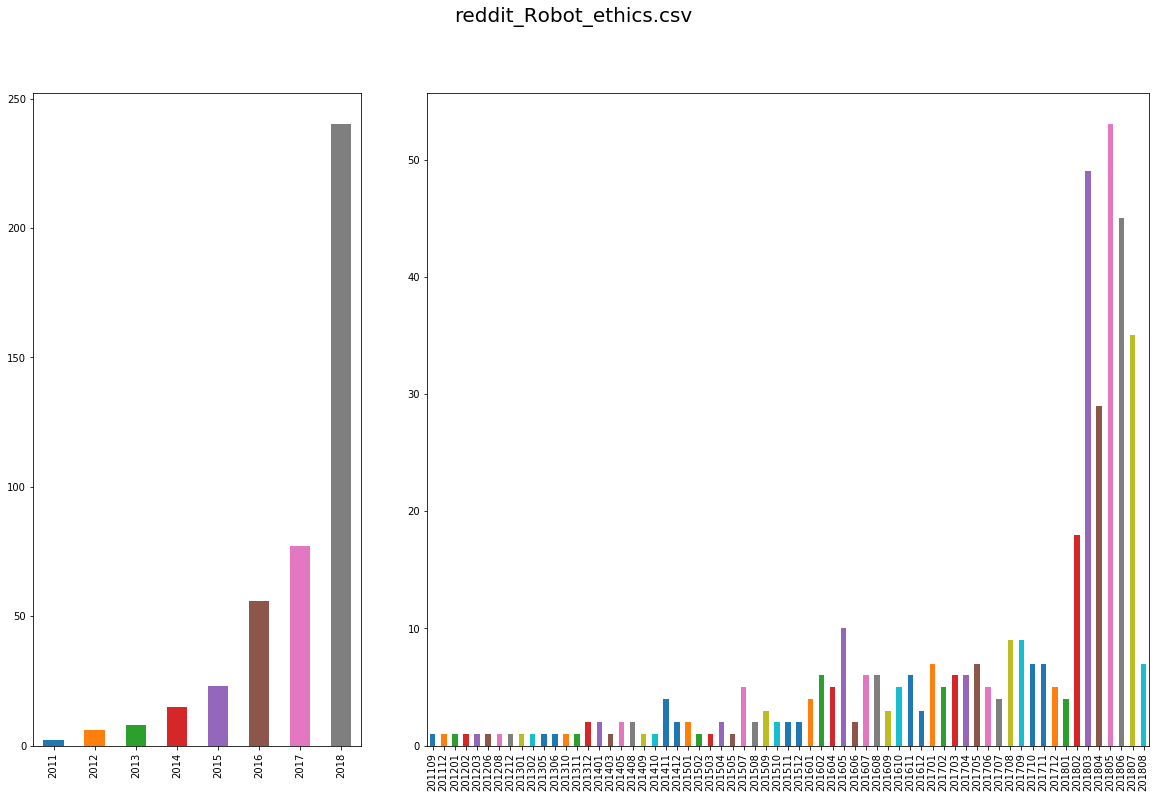

Num posts: 300


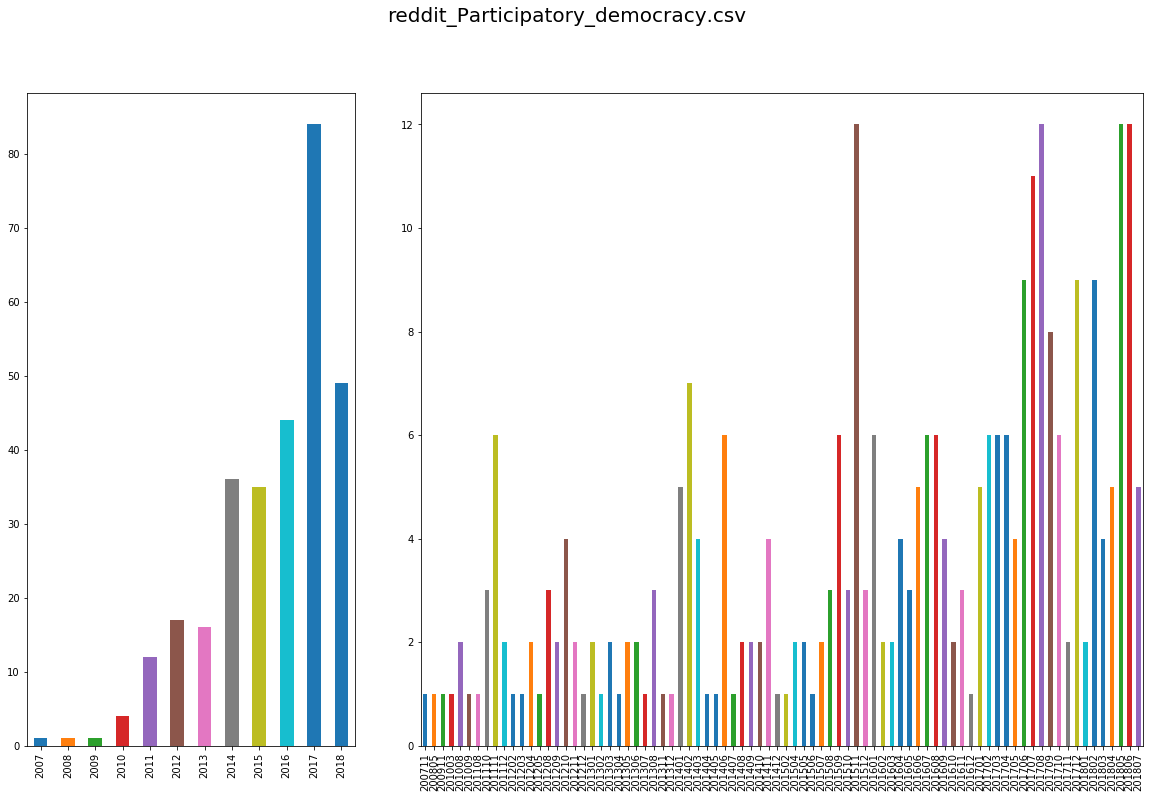

Num posts: 436


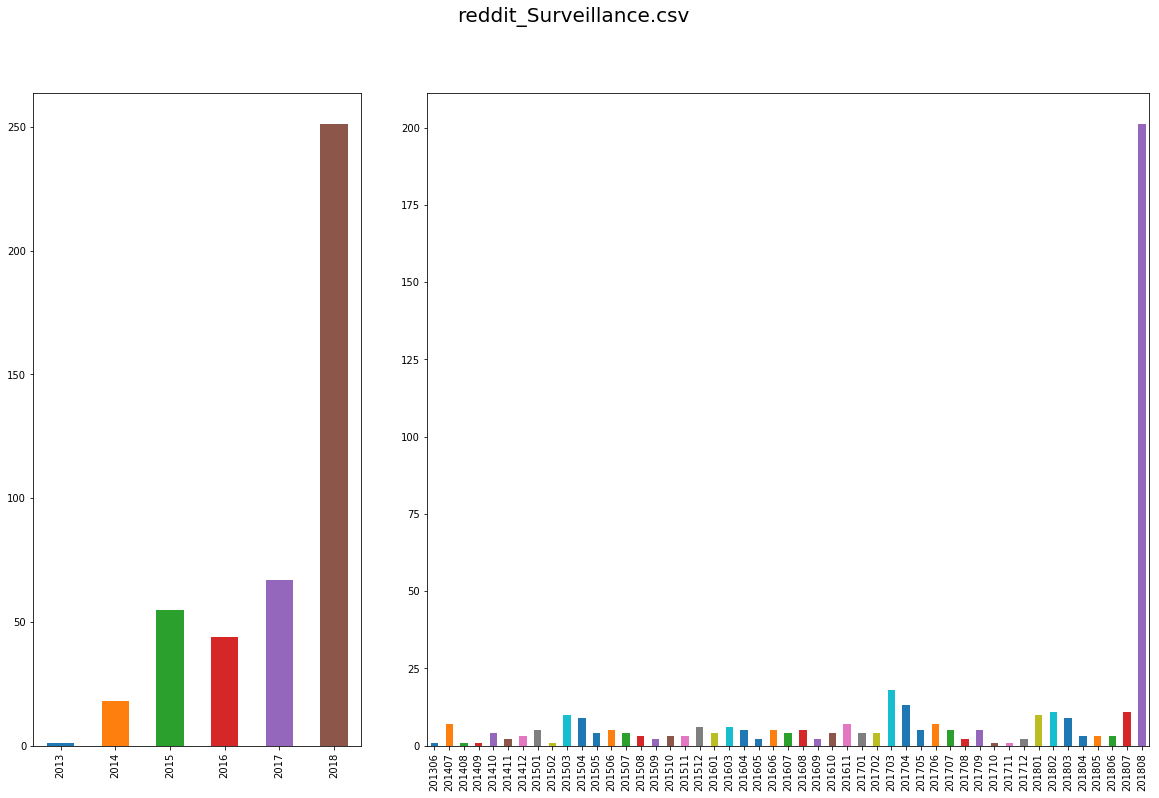

Num posts: 483


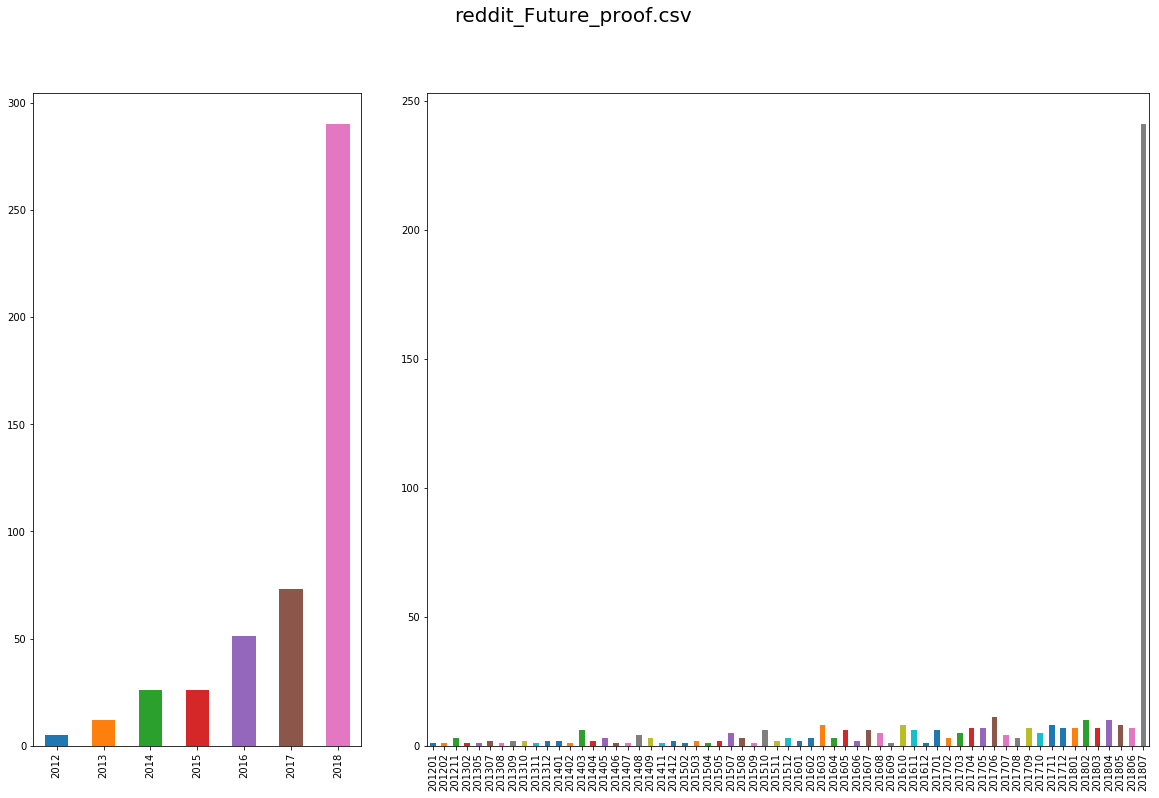

Num posts: 462


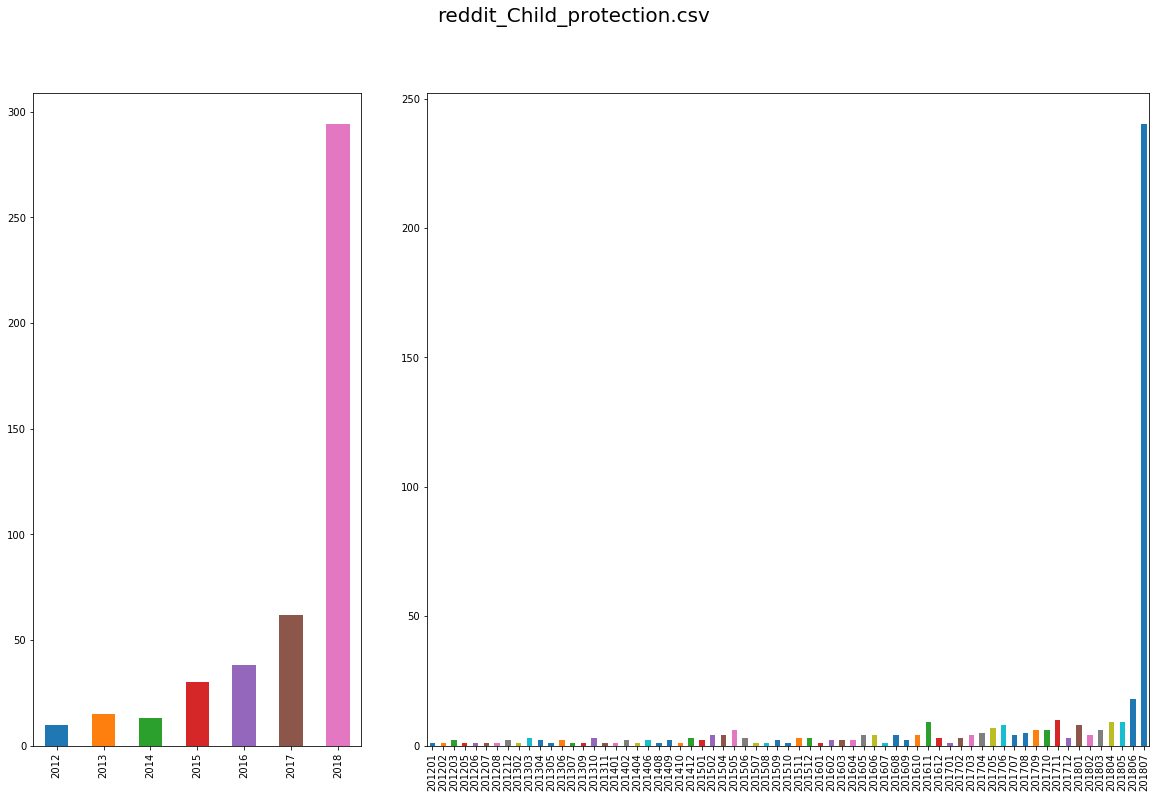

Num posts: 480


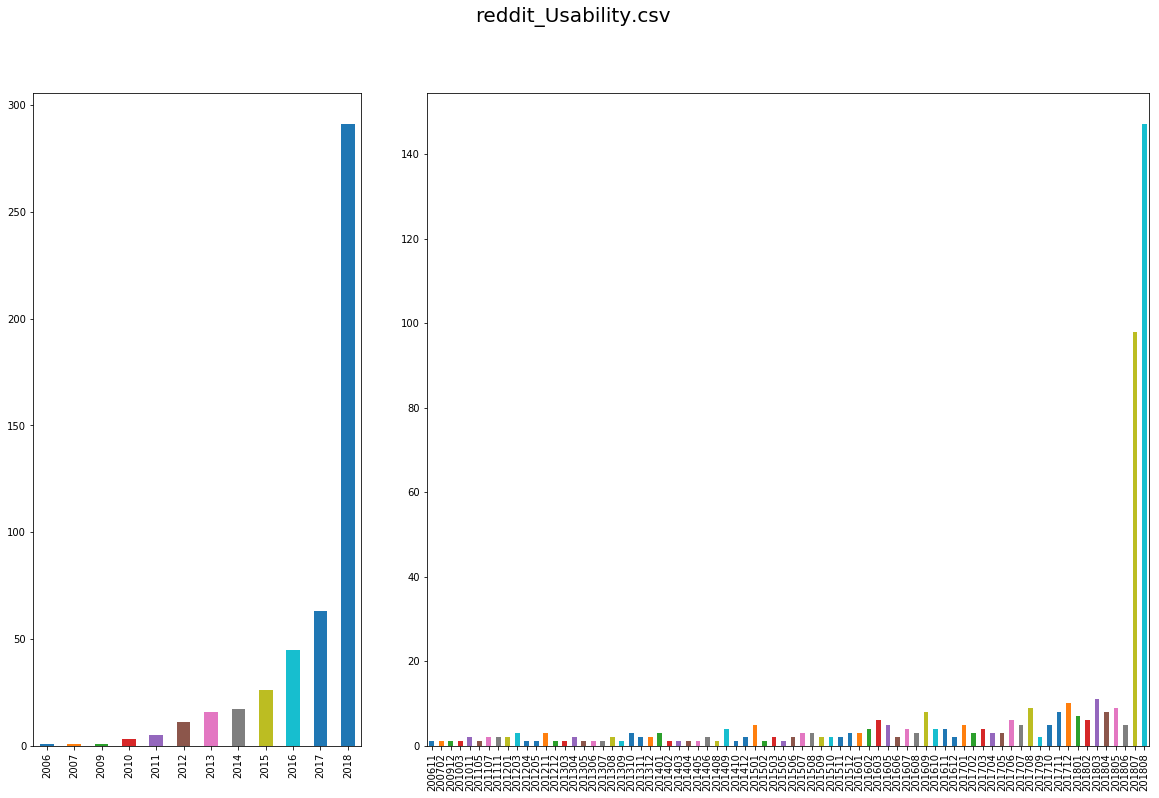

Num posts: 281


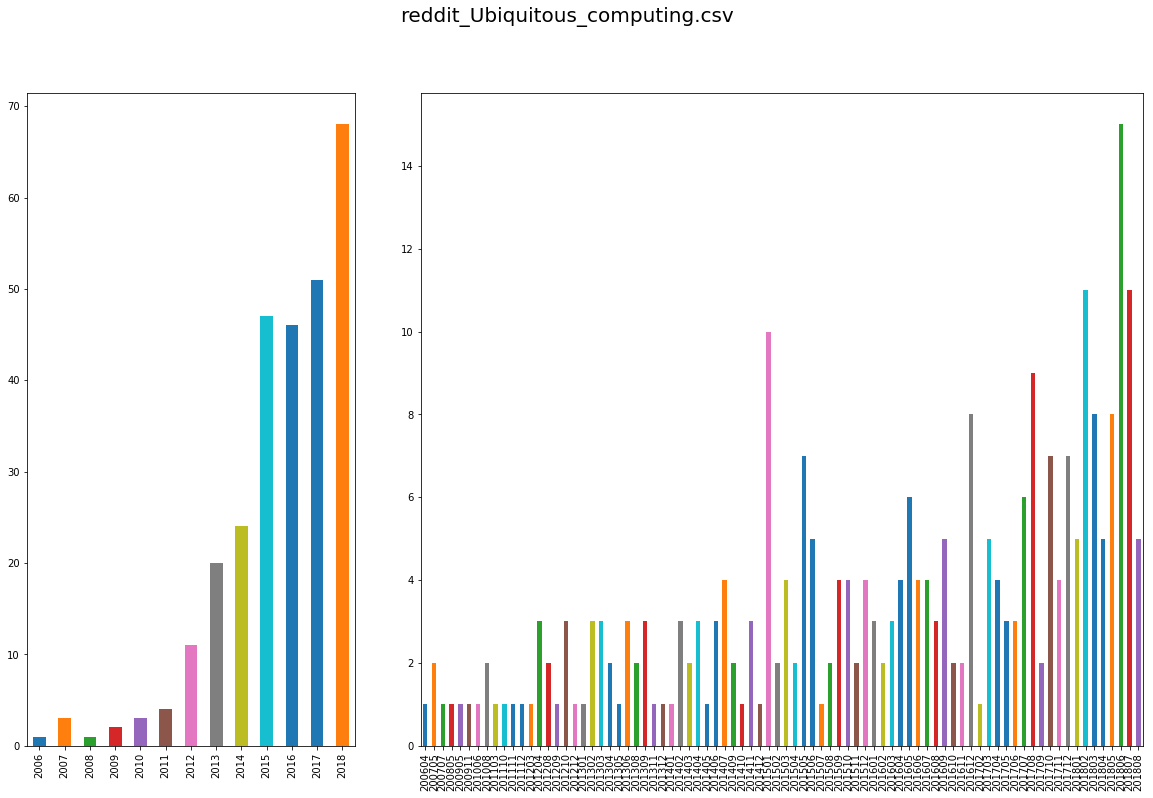

Num posts: 438


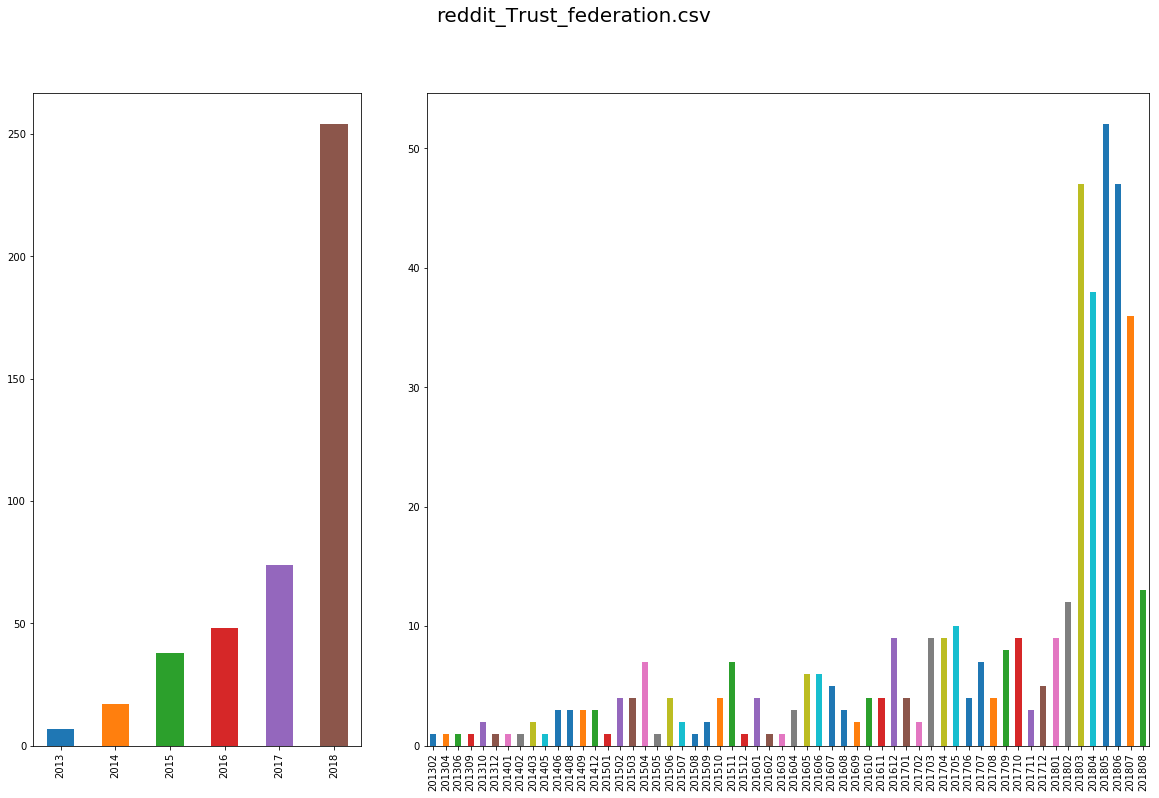

Num posts: 478


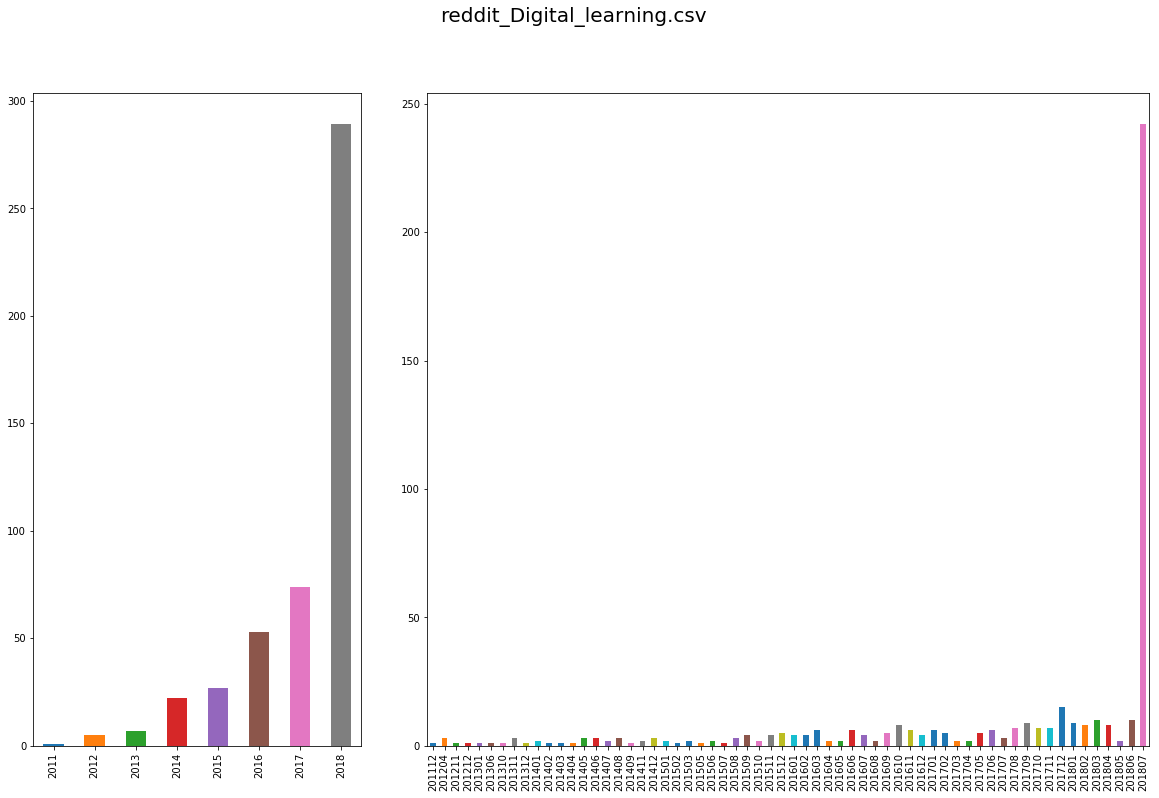

Num posts: 422


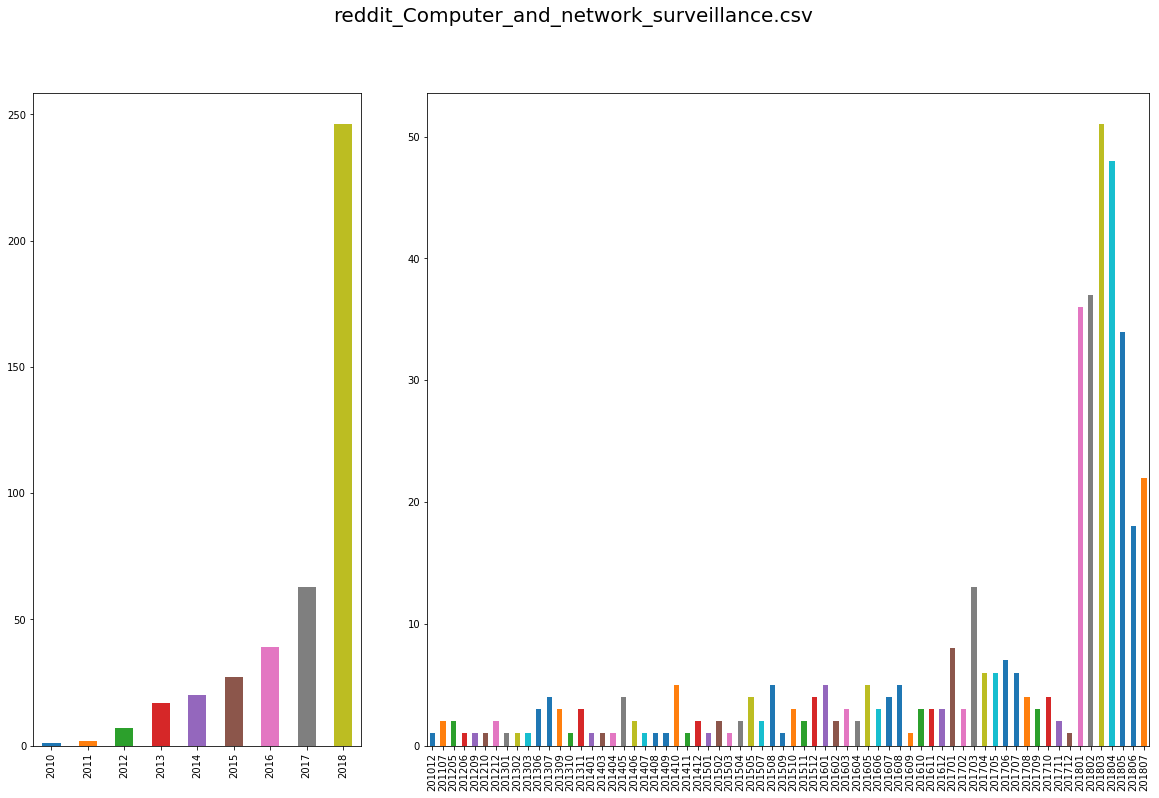

Num posts: 489


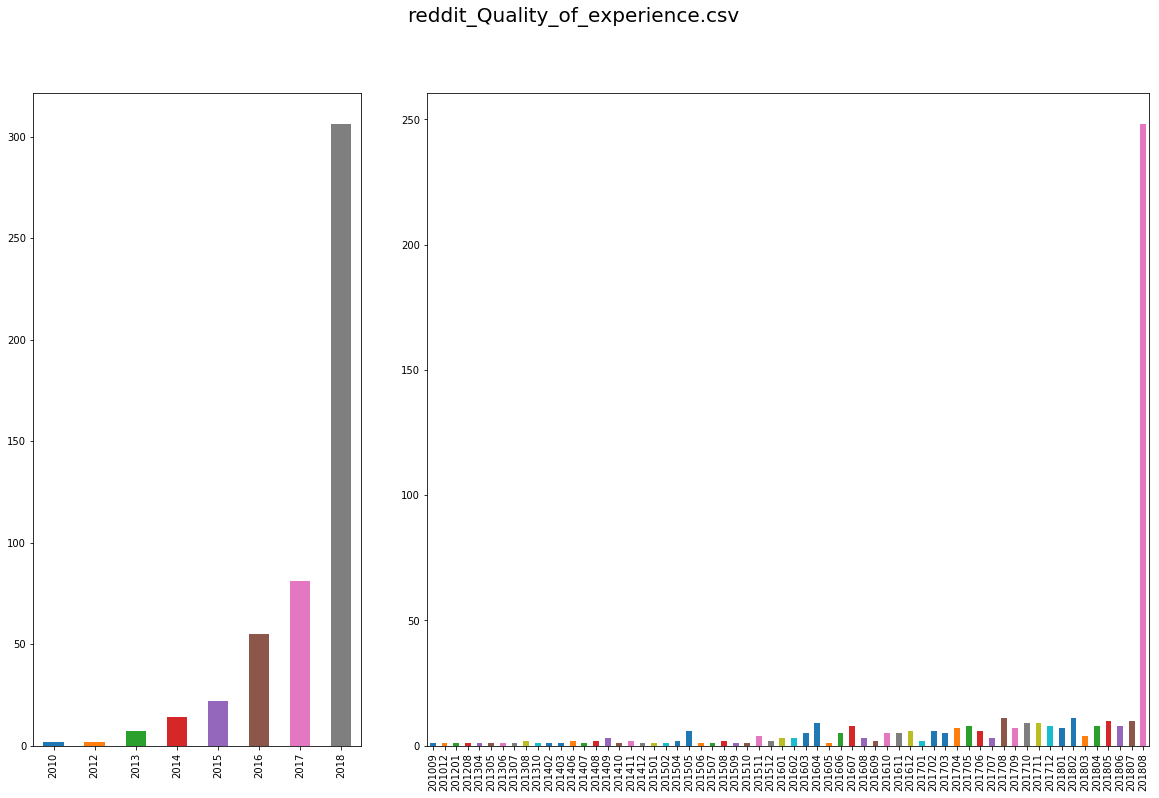

Num posts: 18


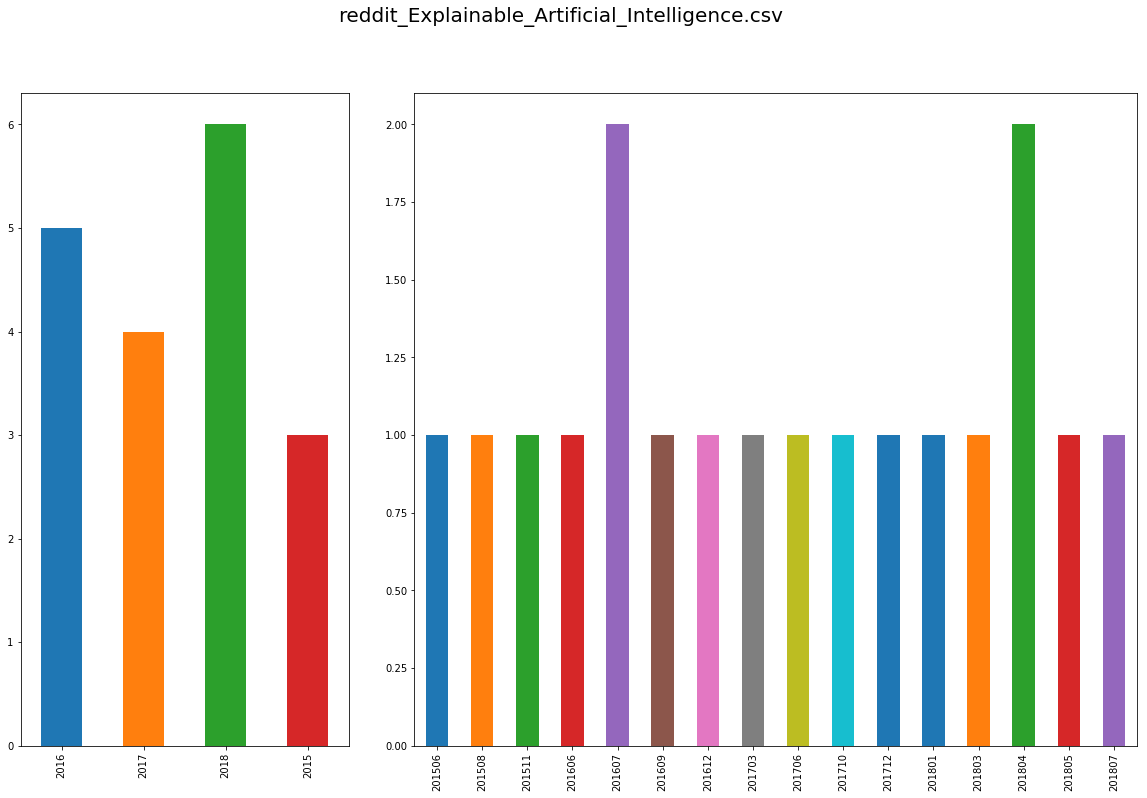

Num posts: 474


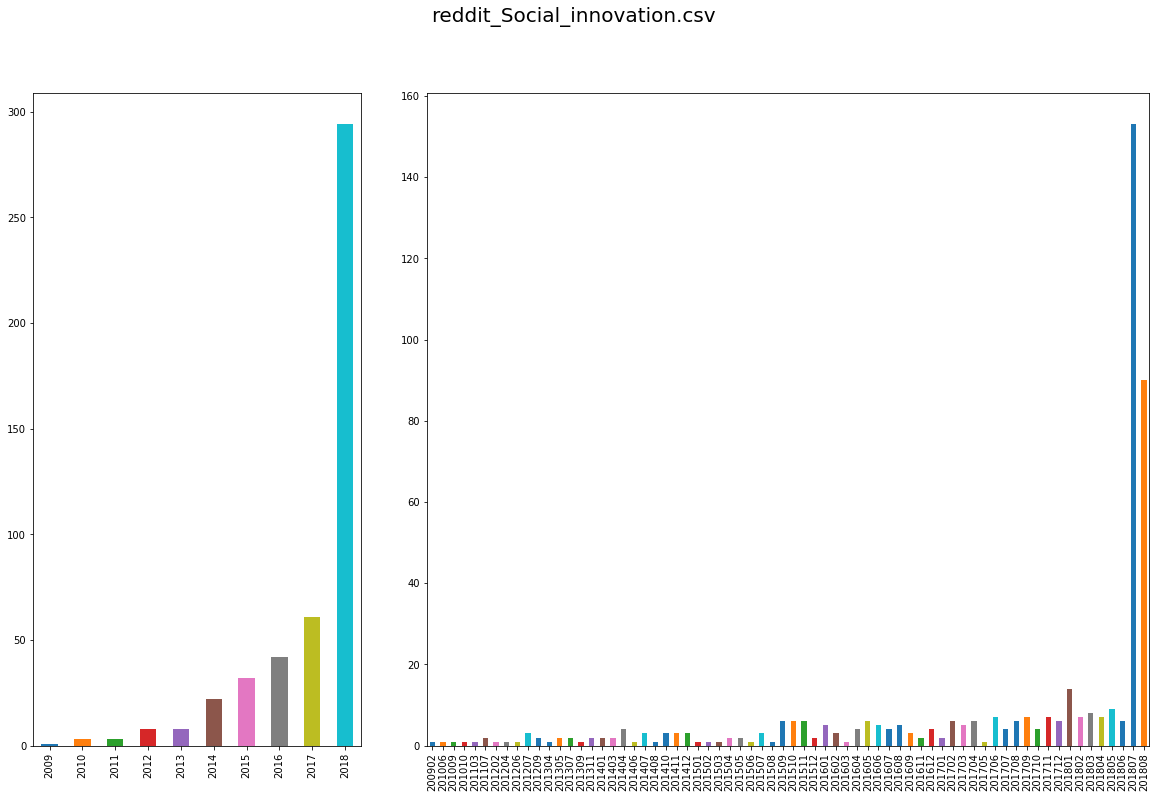

Num posts: 455


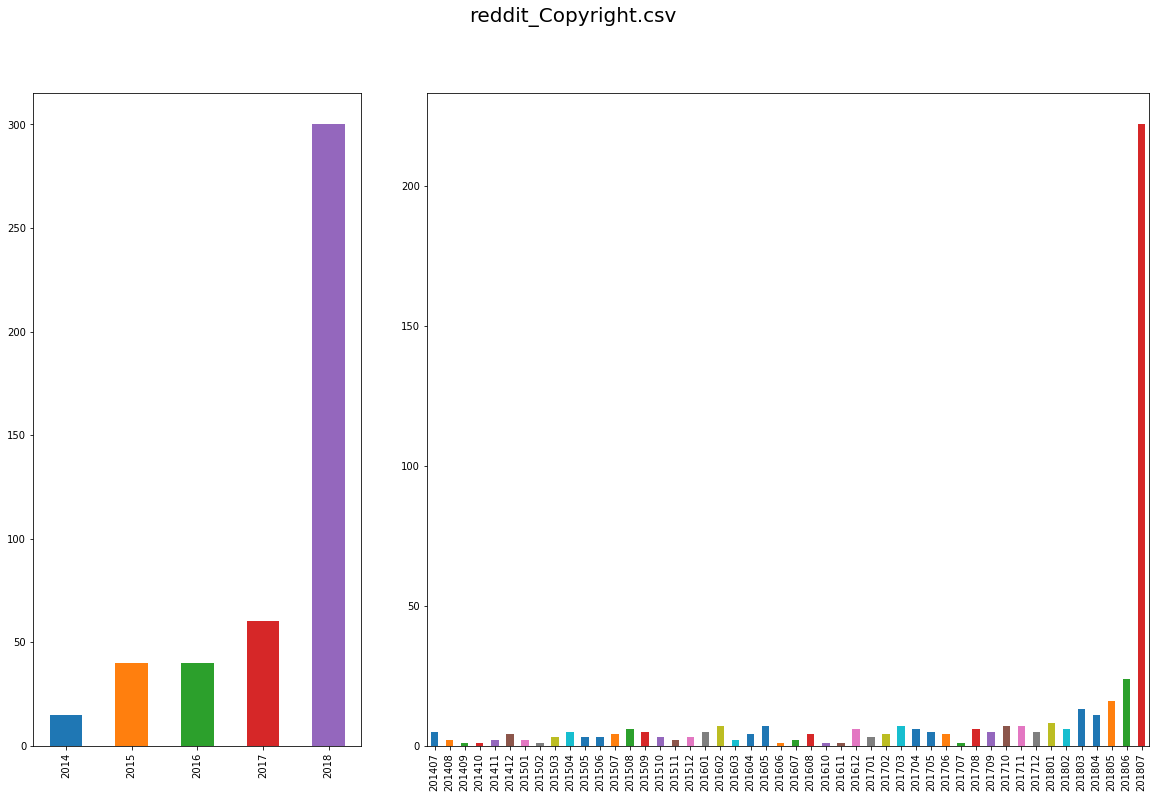

Num posts: 434


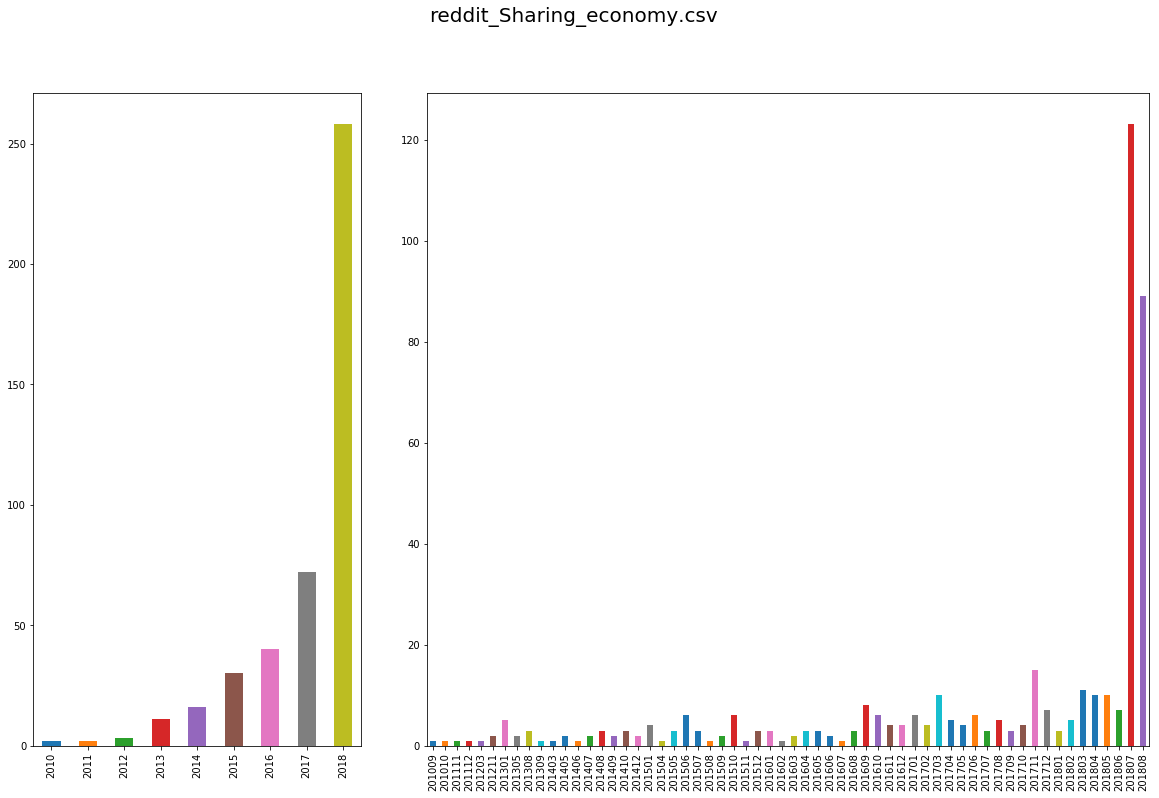

Num posts: 477


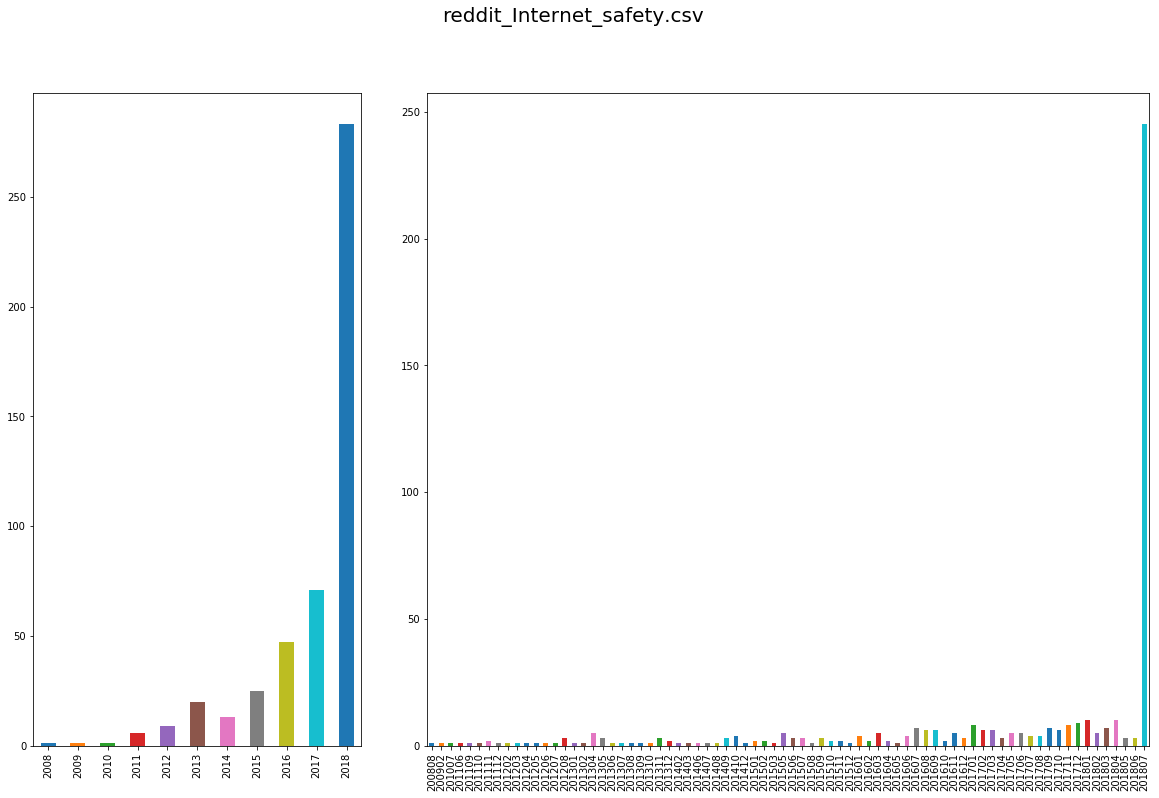

Num posts: 98


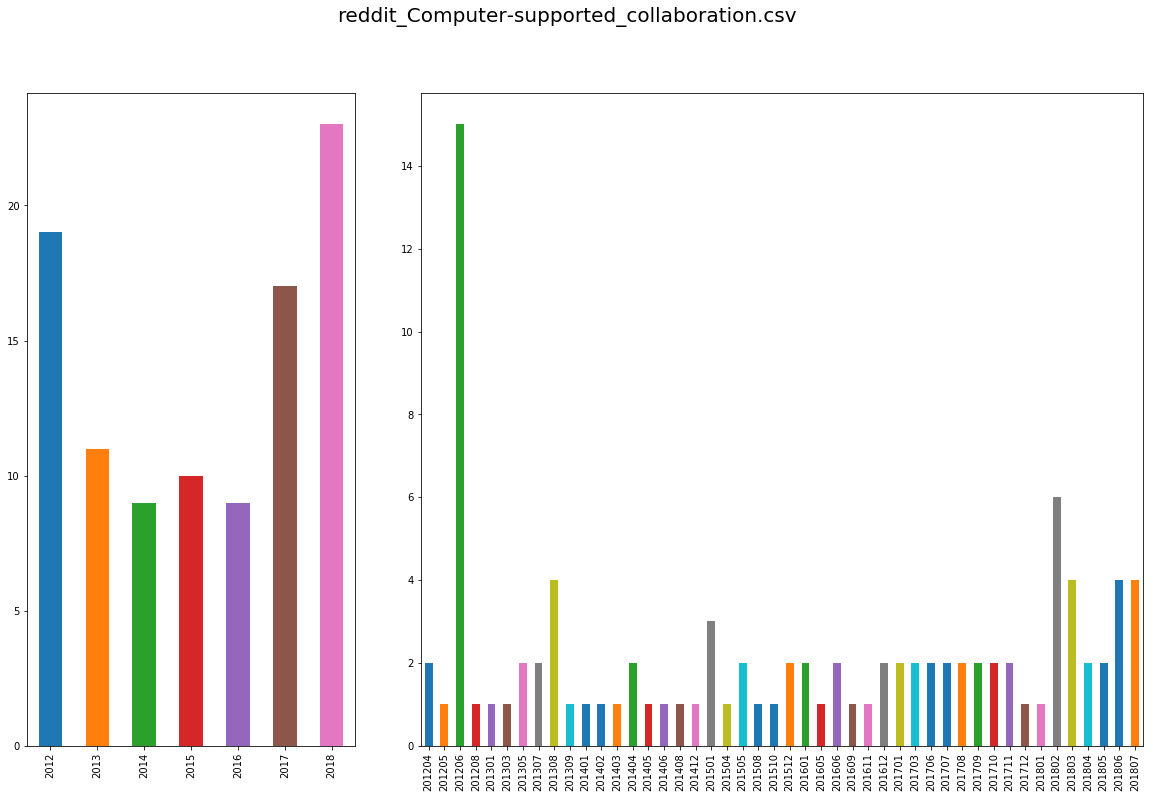

Num posts: 441


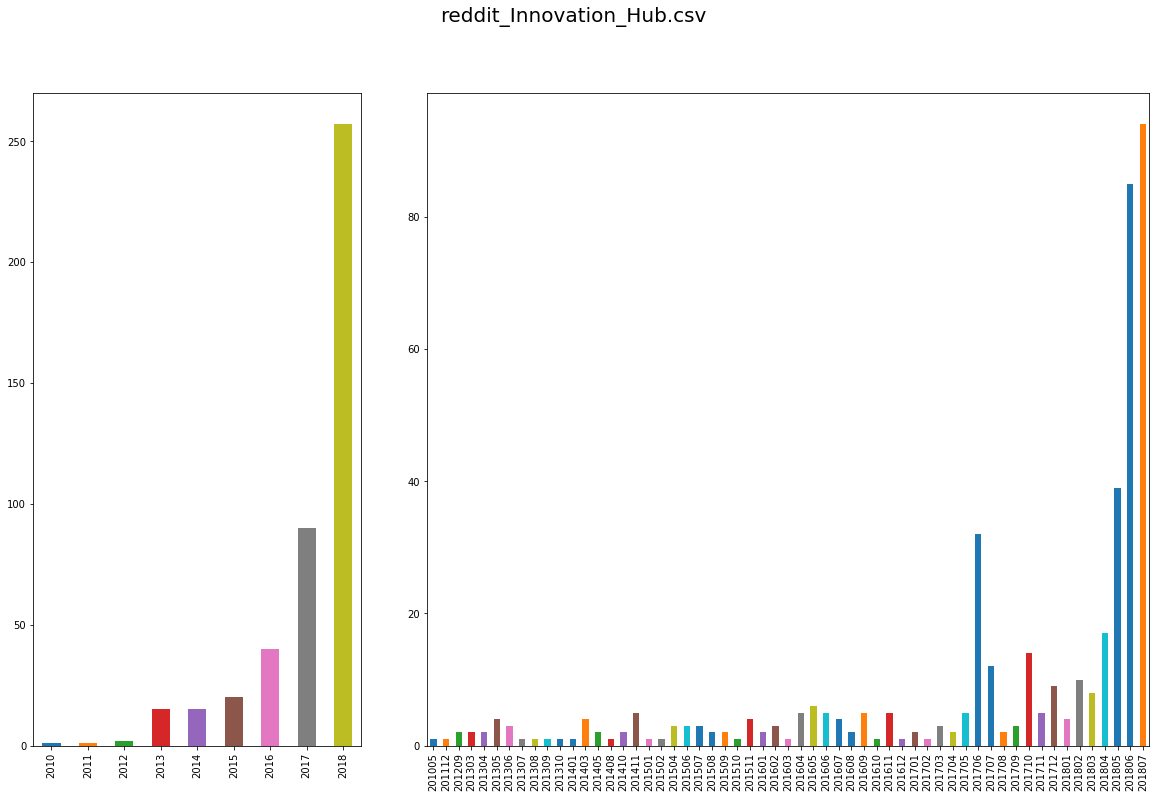

Num posts: 444


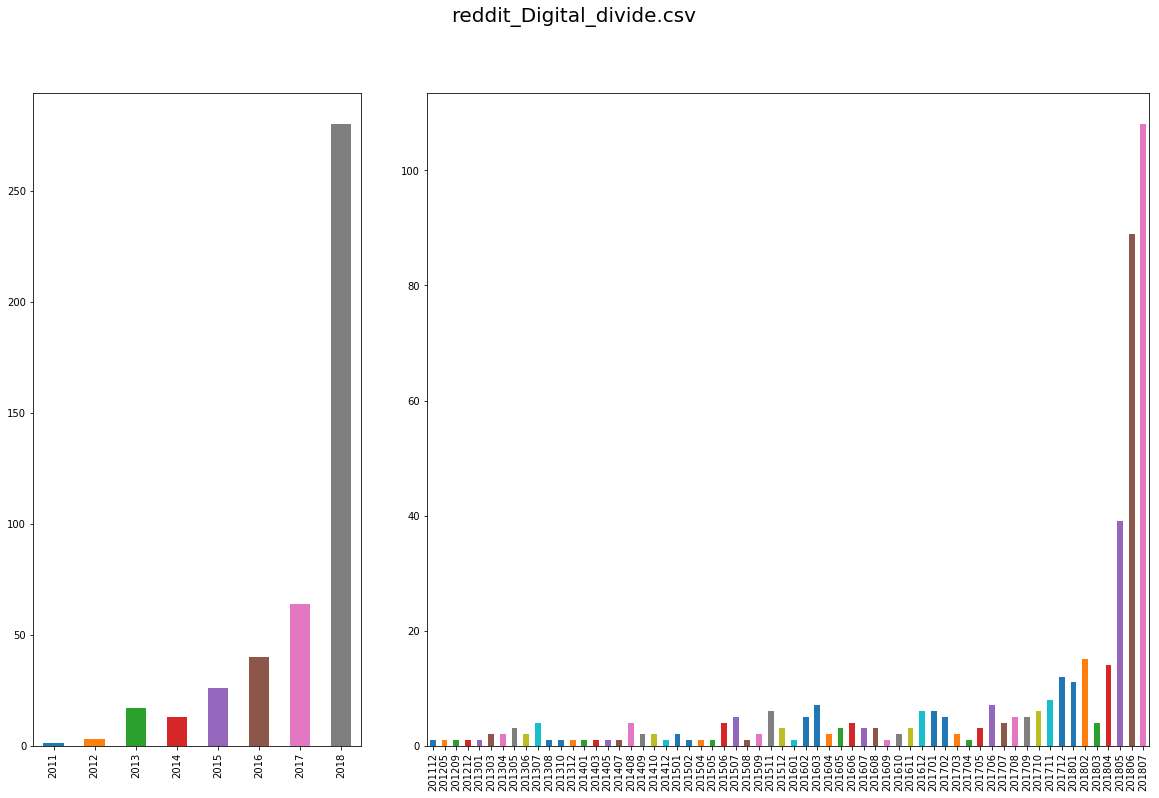

Num posts: 418


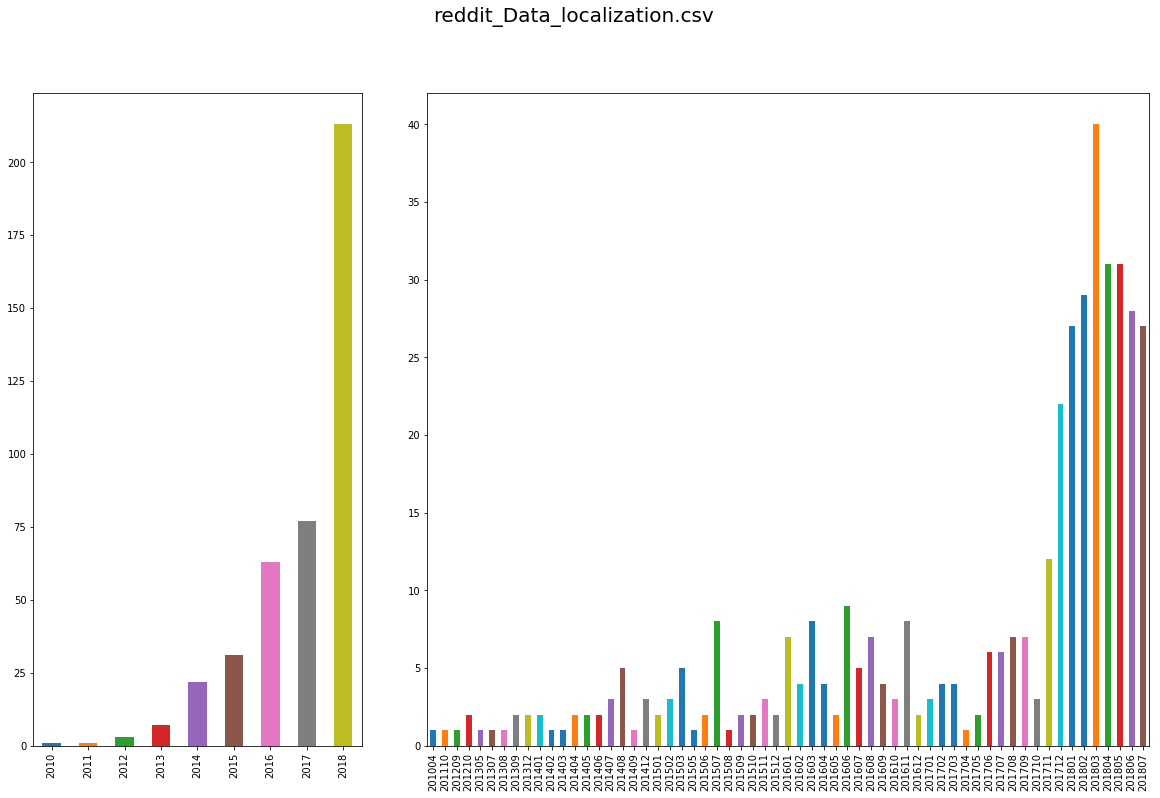

Num posts: 469


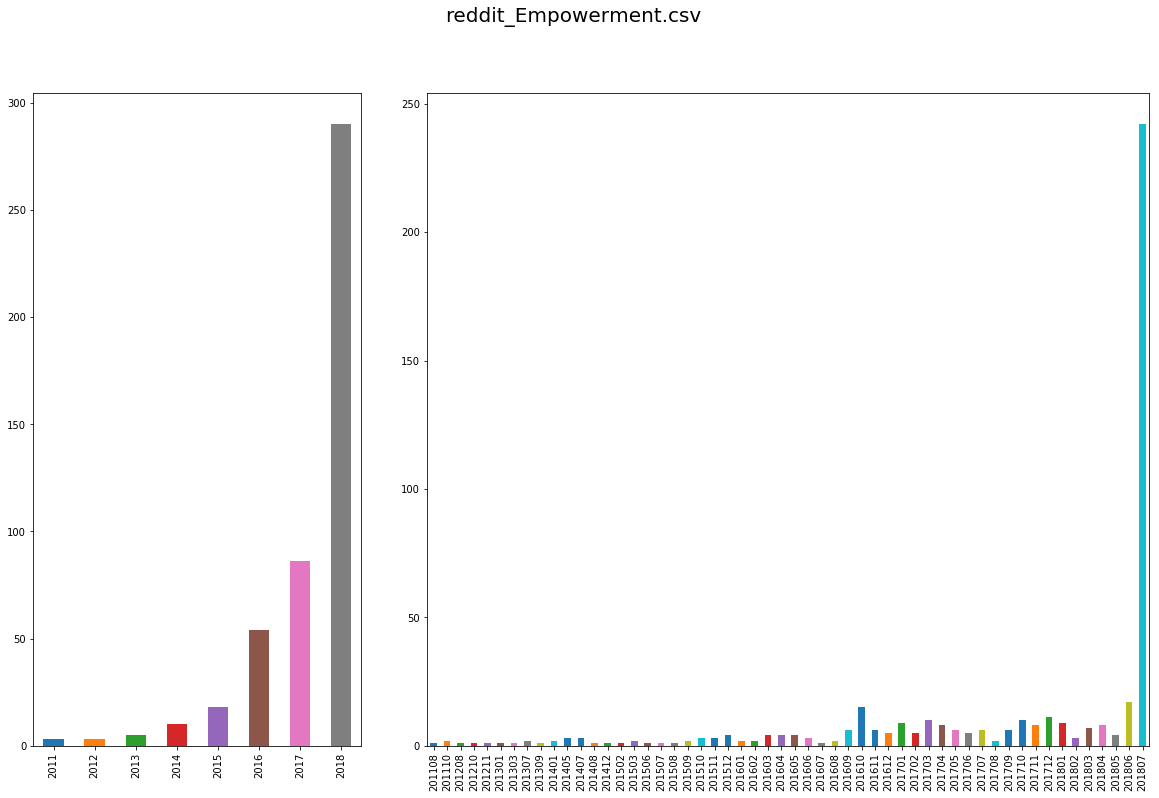

Num posts: 450


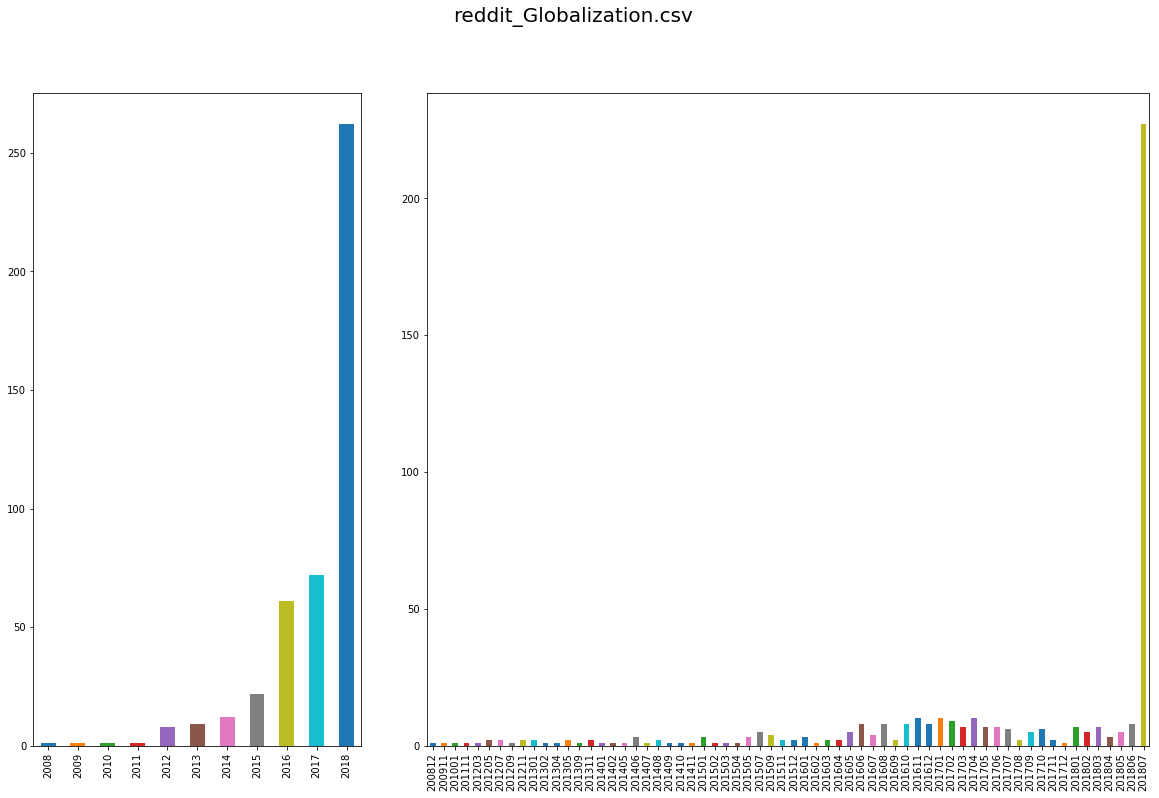

Num posts: 405


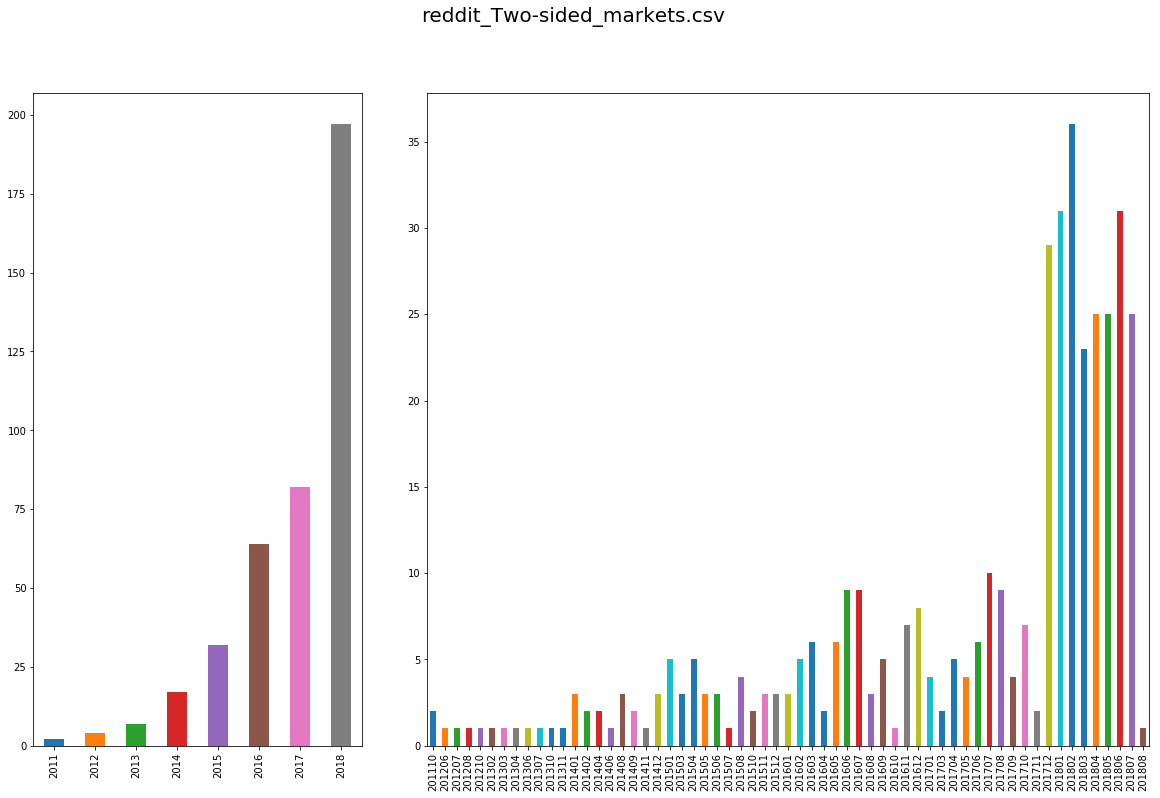

Num posts: 462


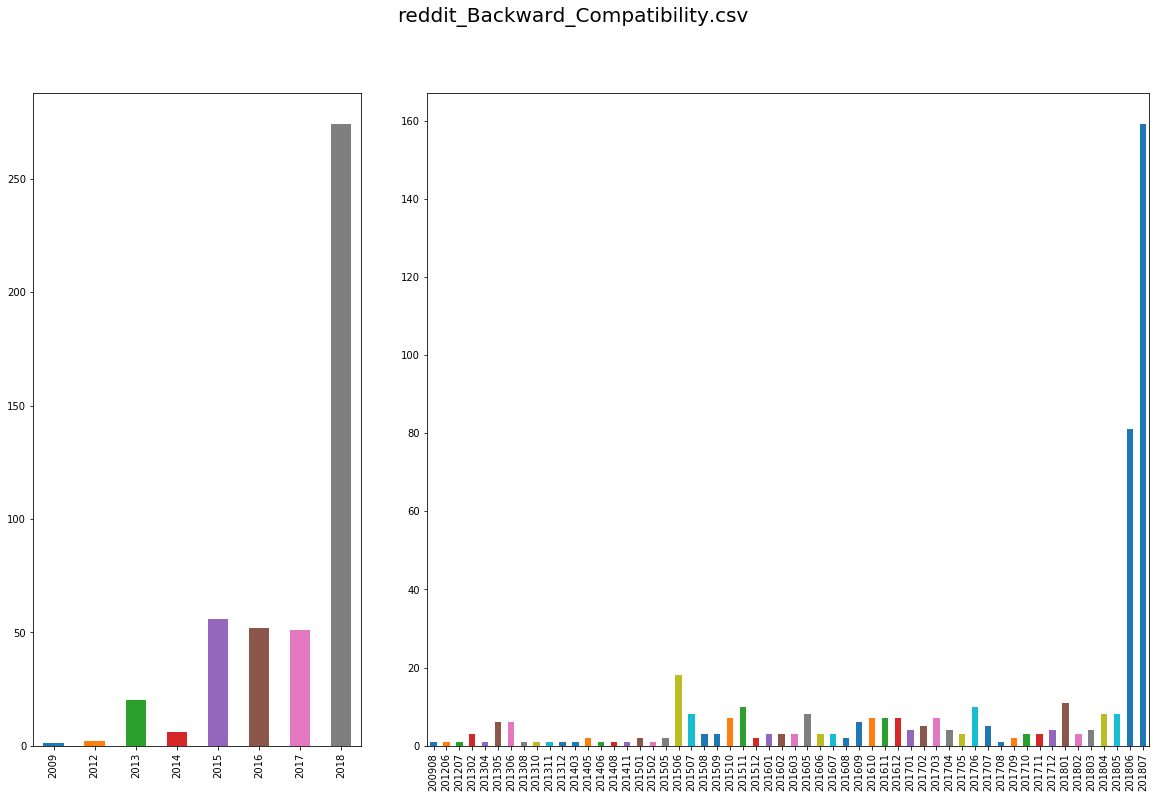

Num posts: 476


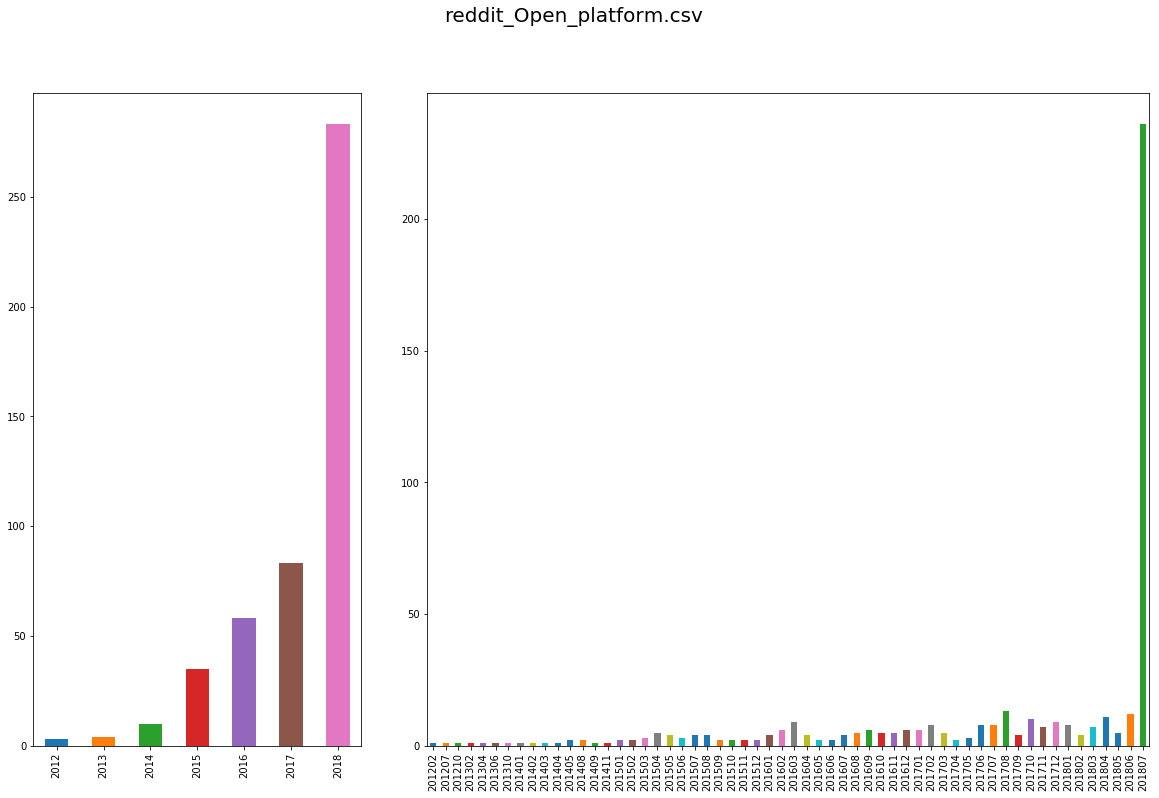

Num posts: 480


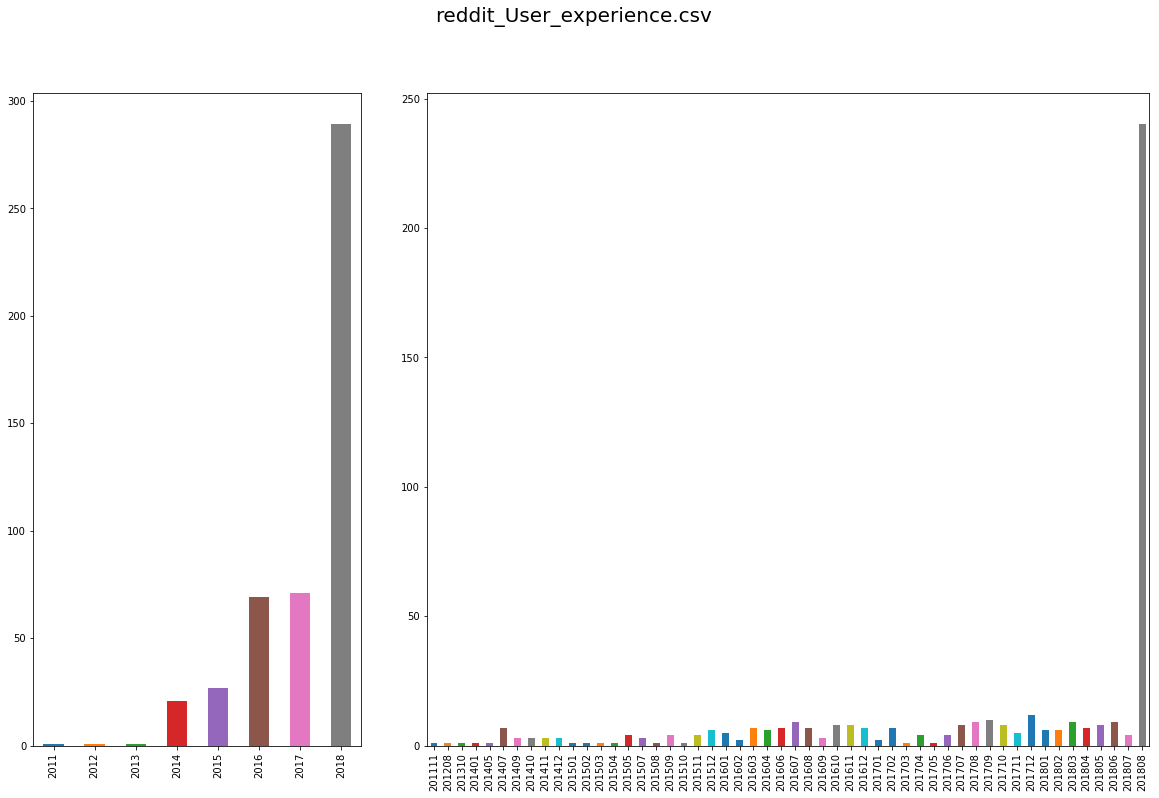

Num posts: 479


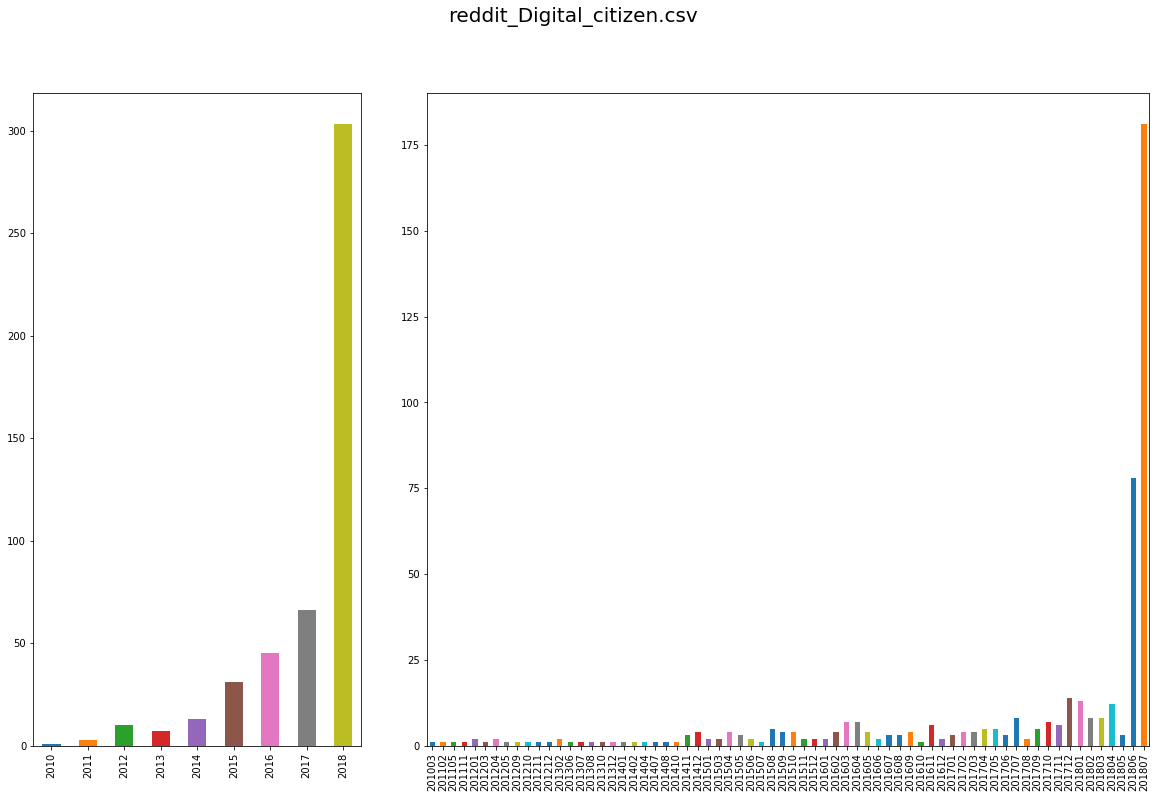

Num posts: 424


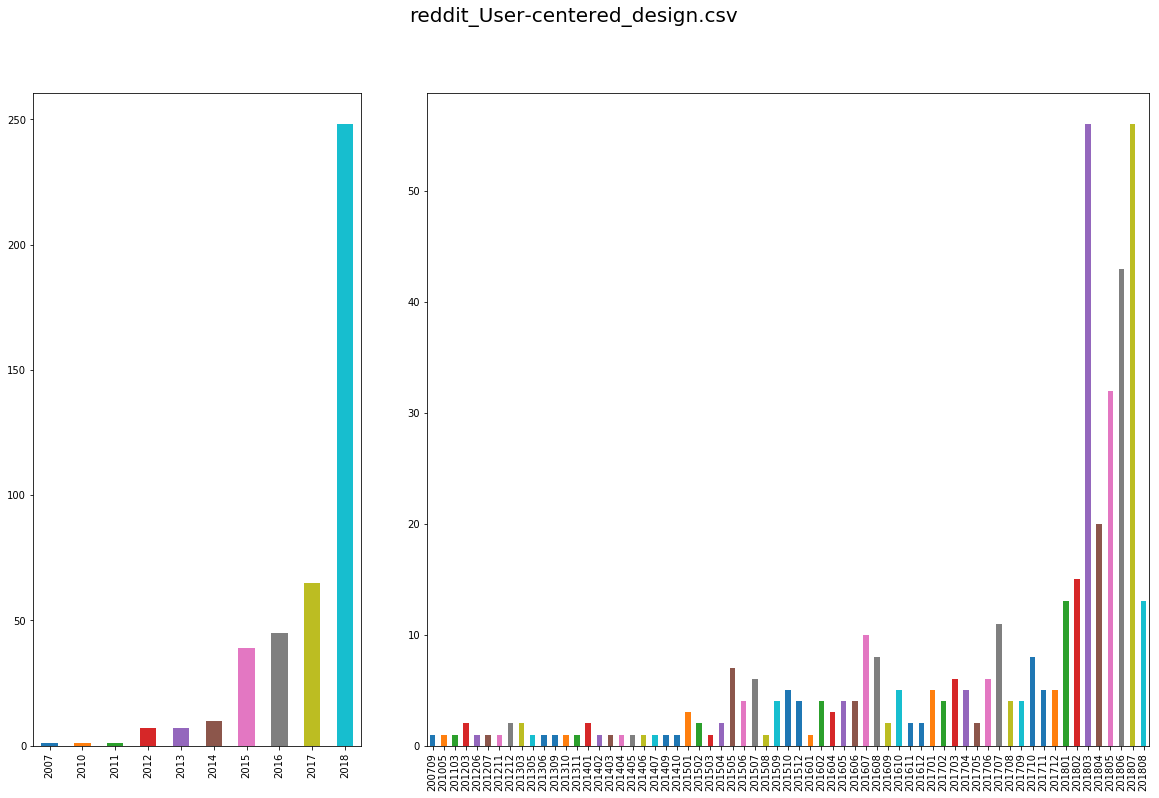

Num posts: 458


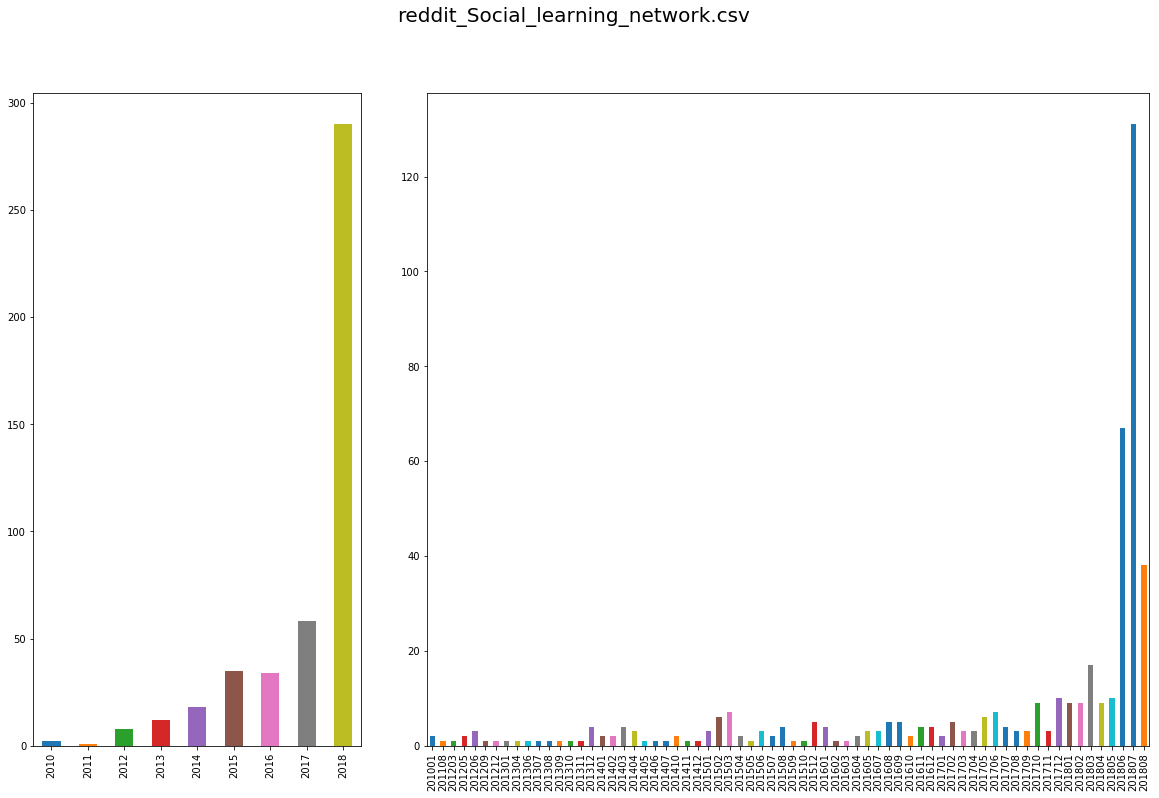

Num posts: 493


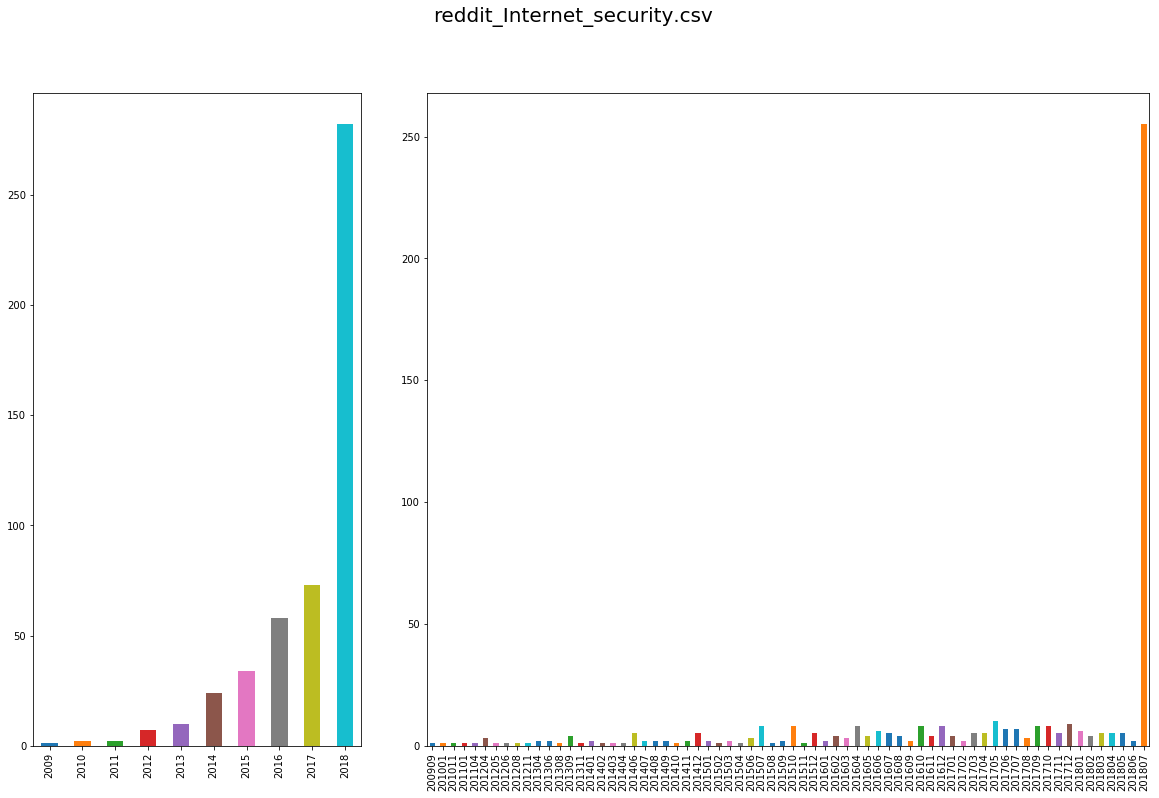

Num posts: 460


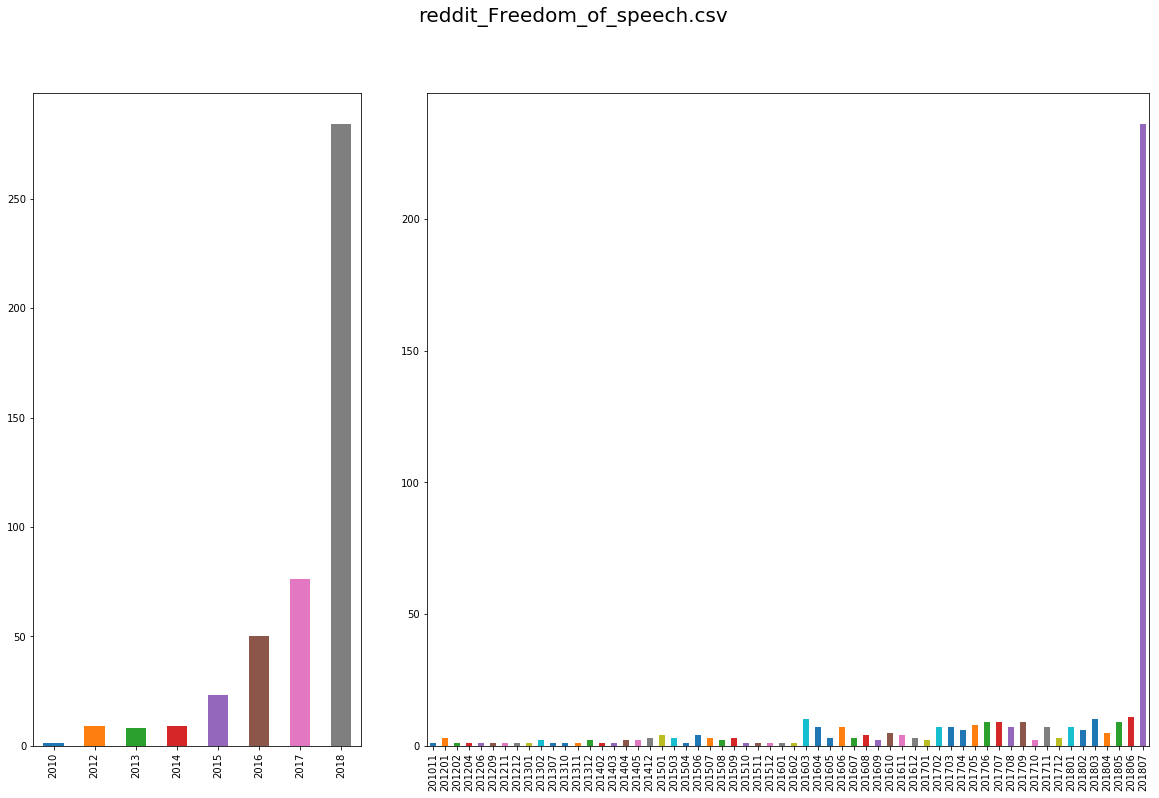

Num posts: 415


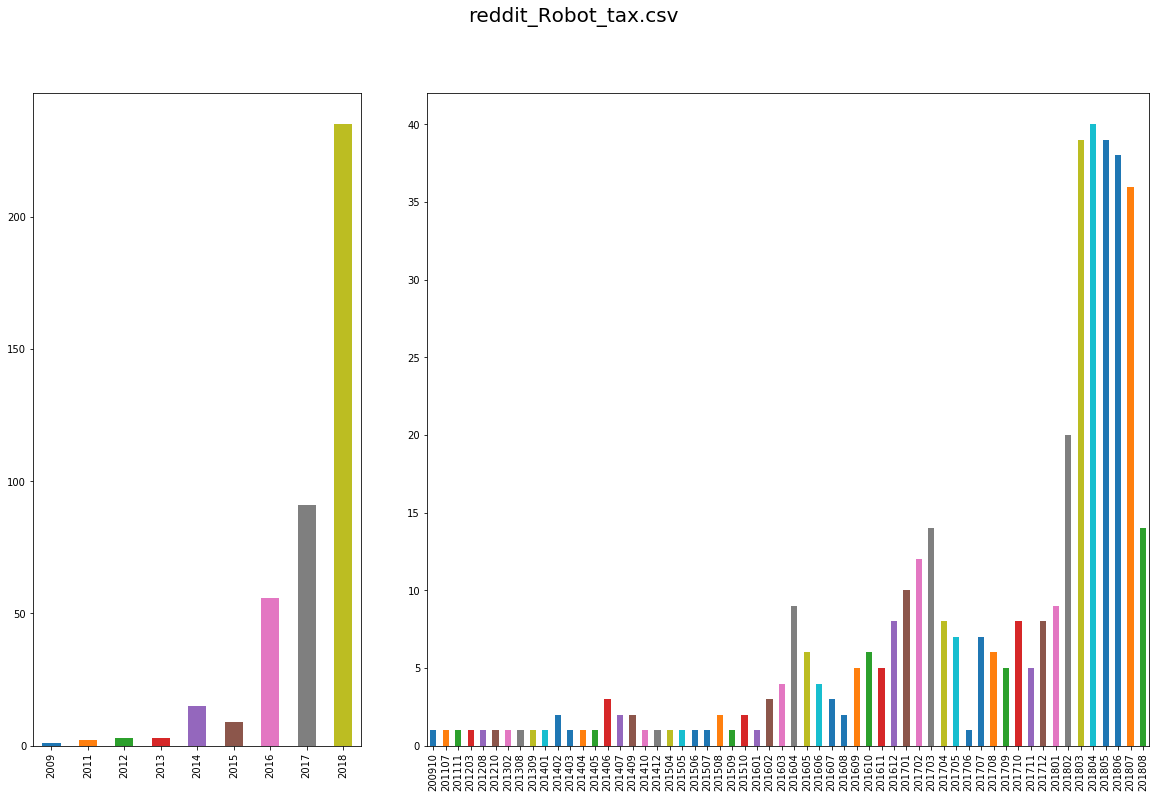

Num posts: 112


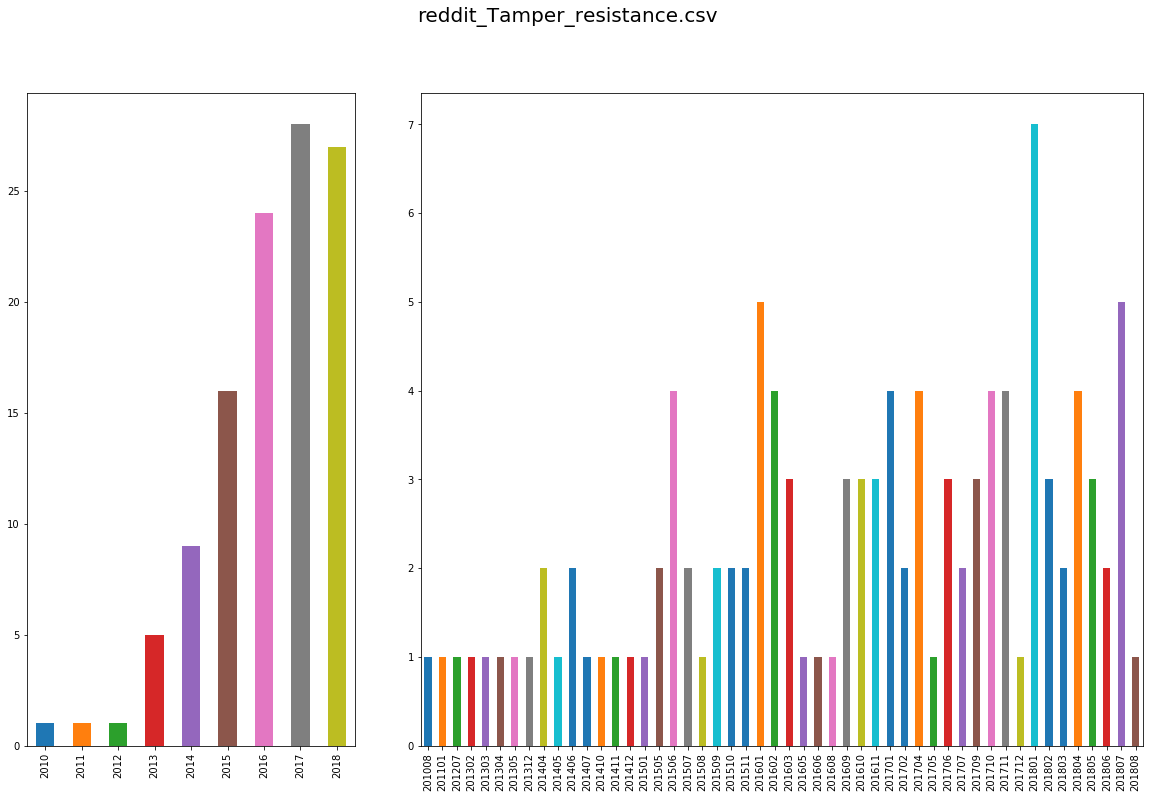

Num posts: 464


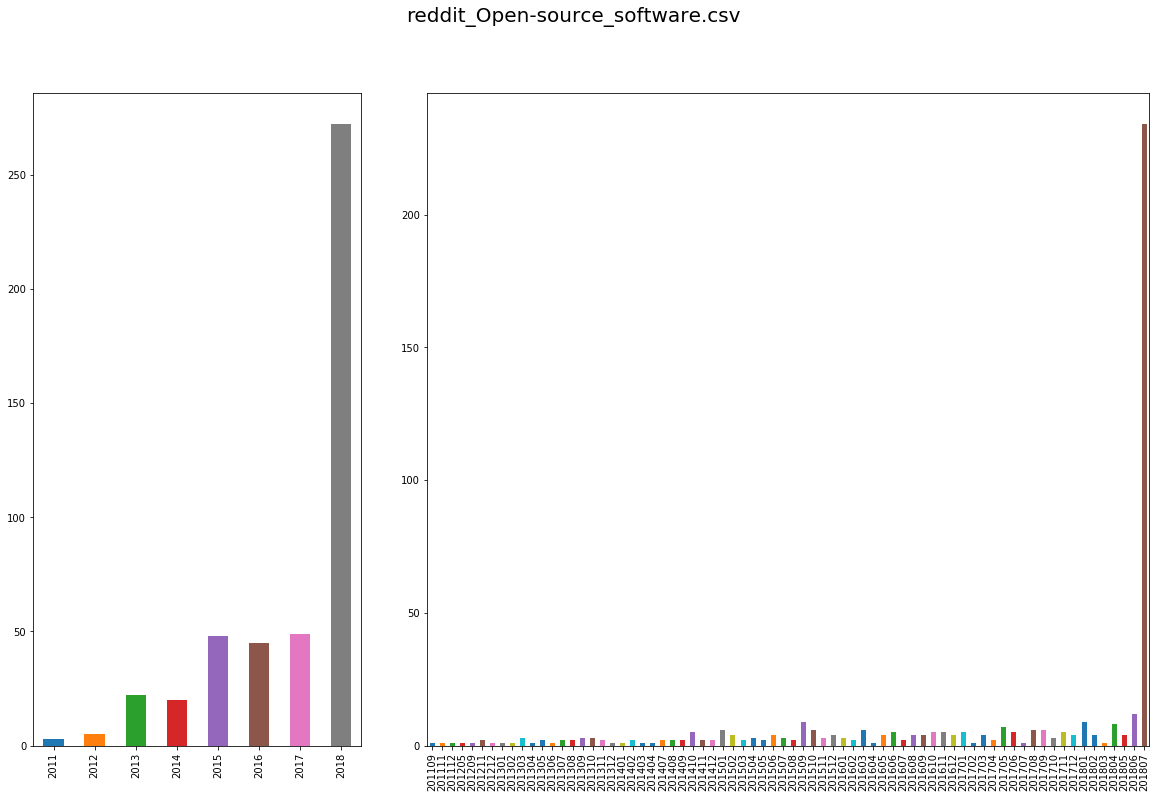

Num posts: 480


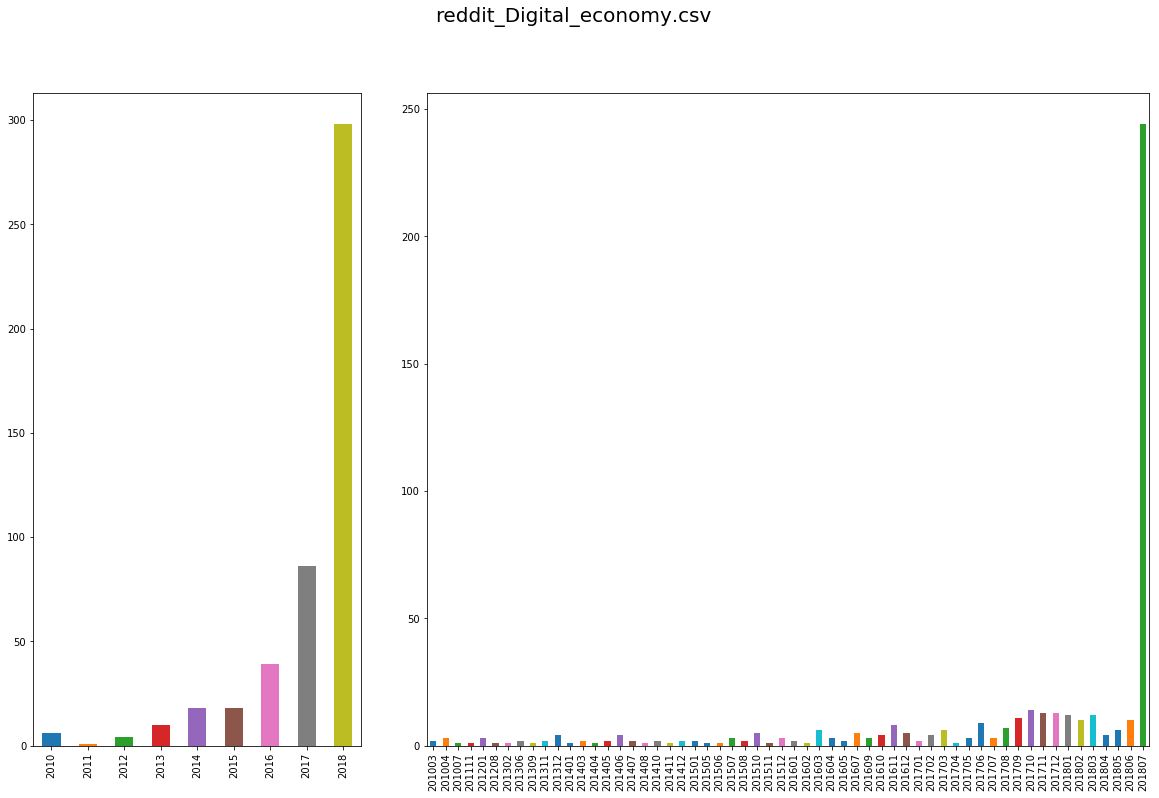

Num posts: 421


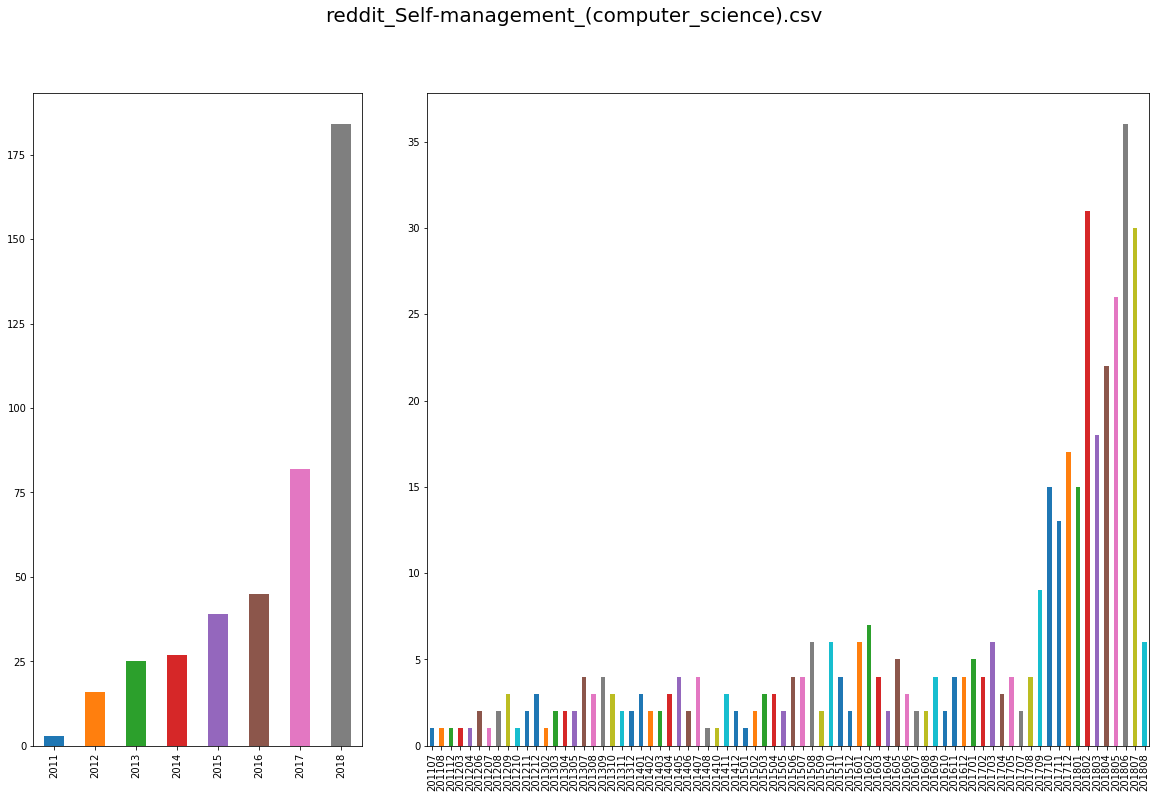

Num posts: 435


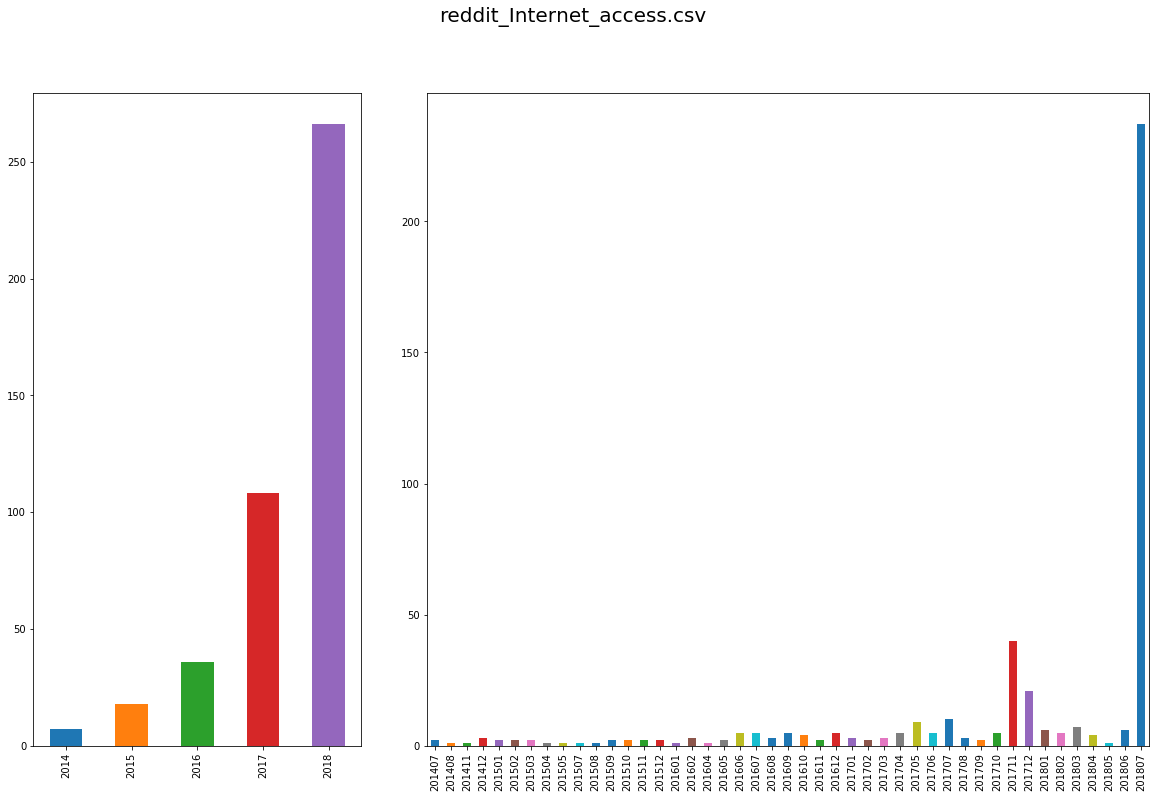

Num posts: 486


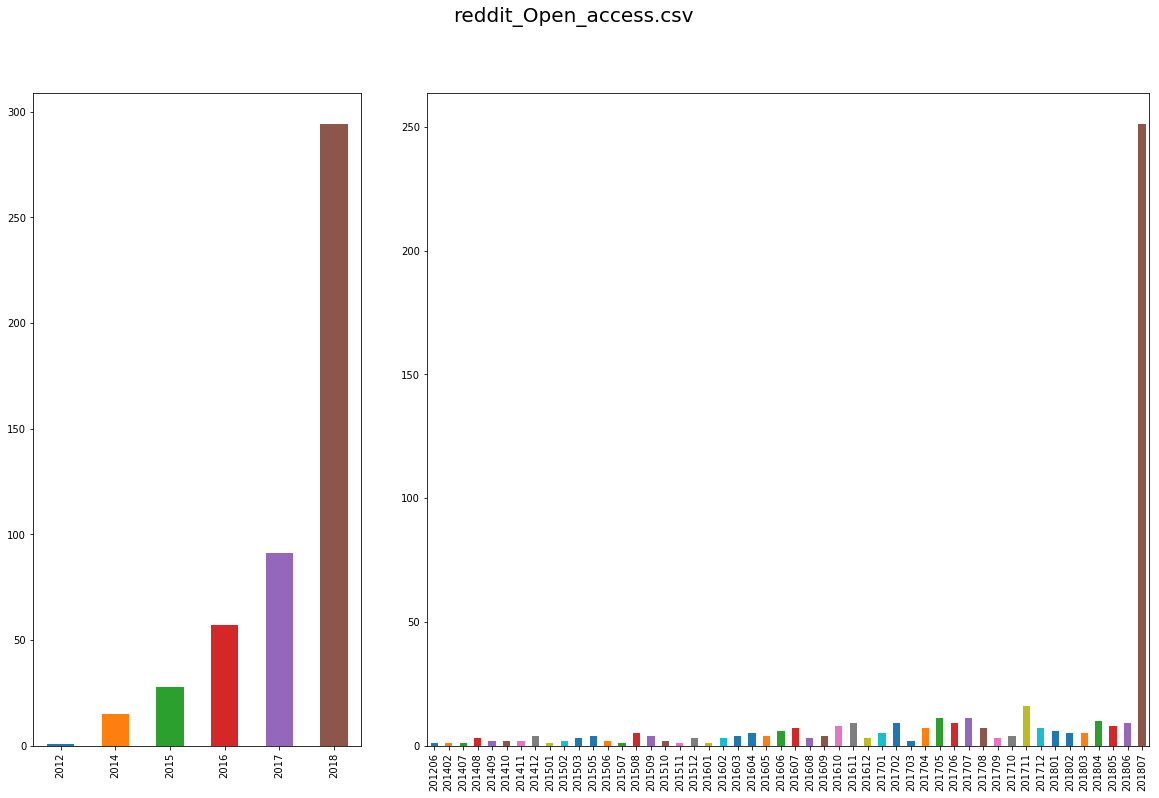

Num posts: 476


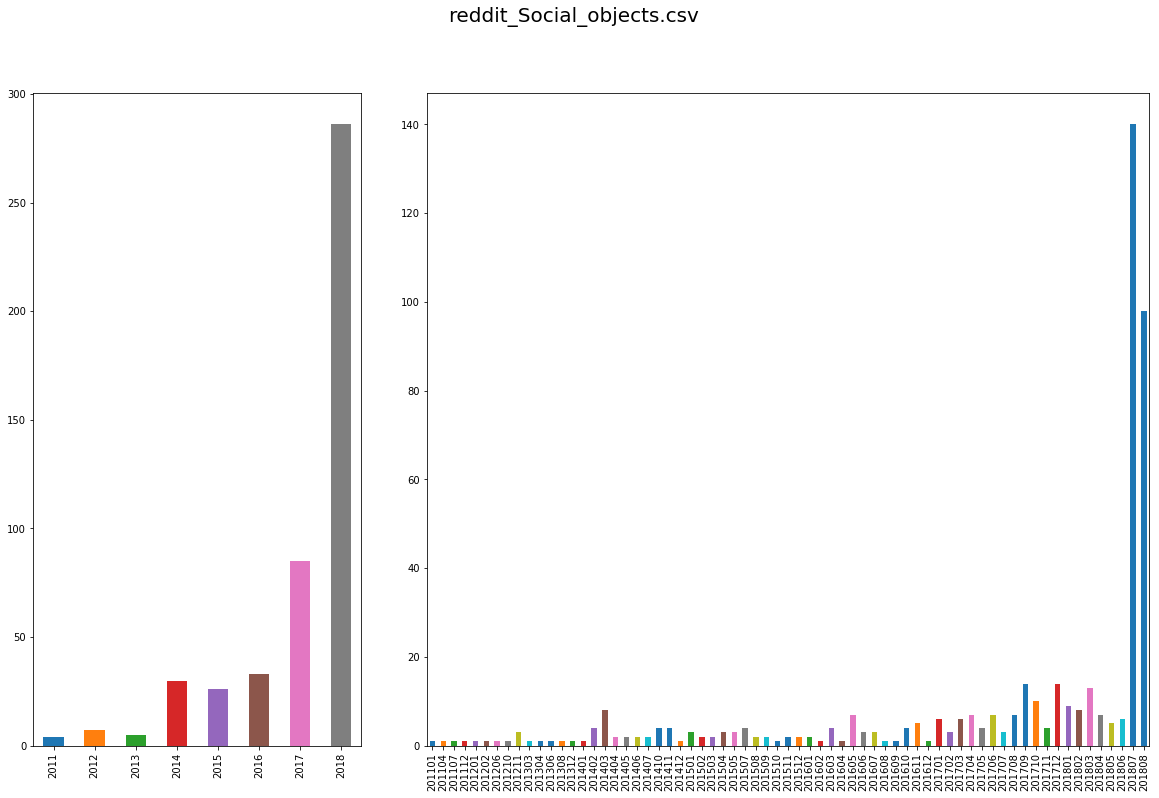

Num posts: 476


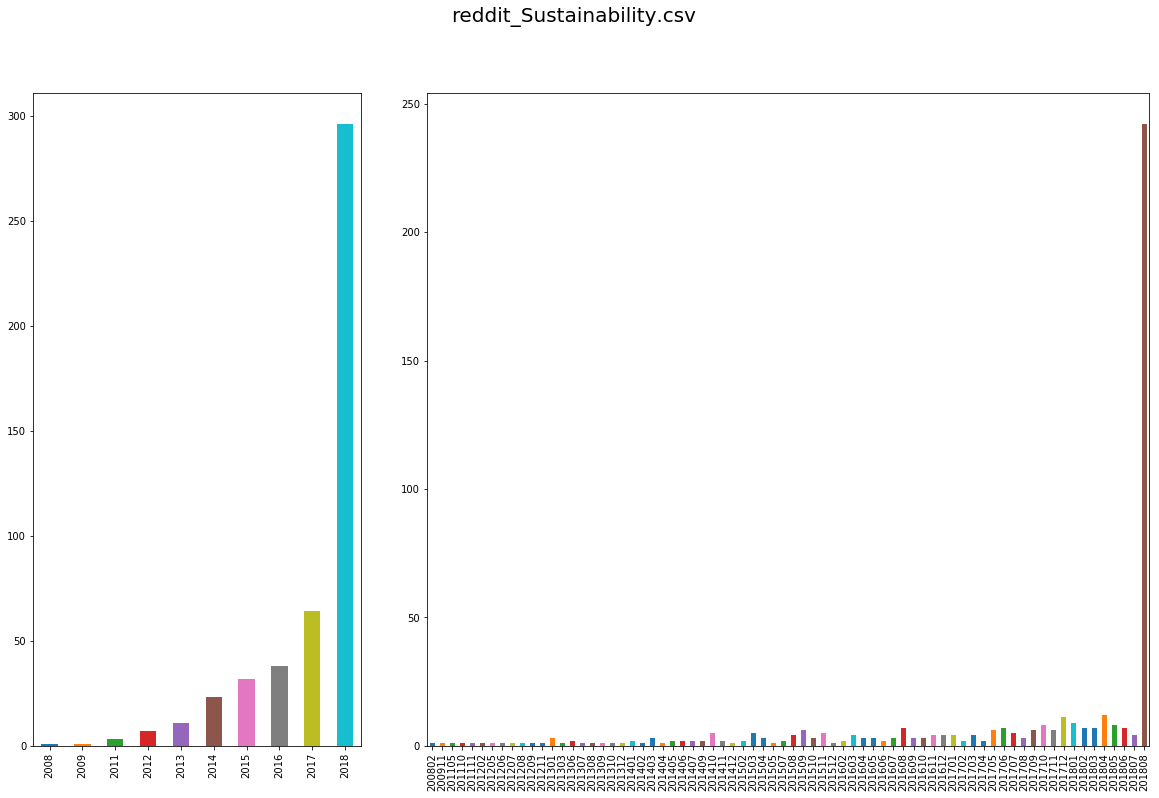

Num posts: 480


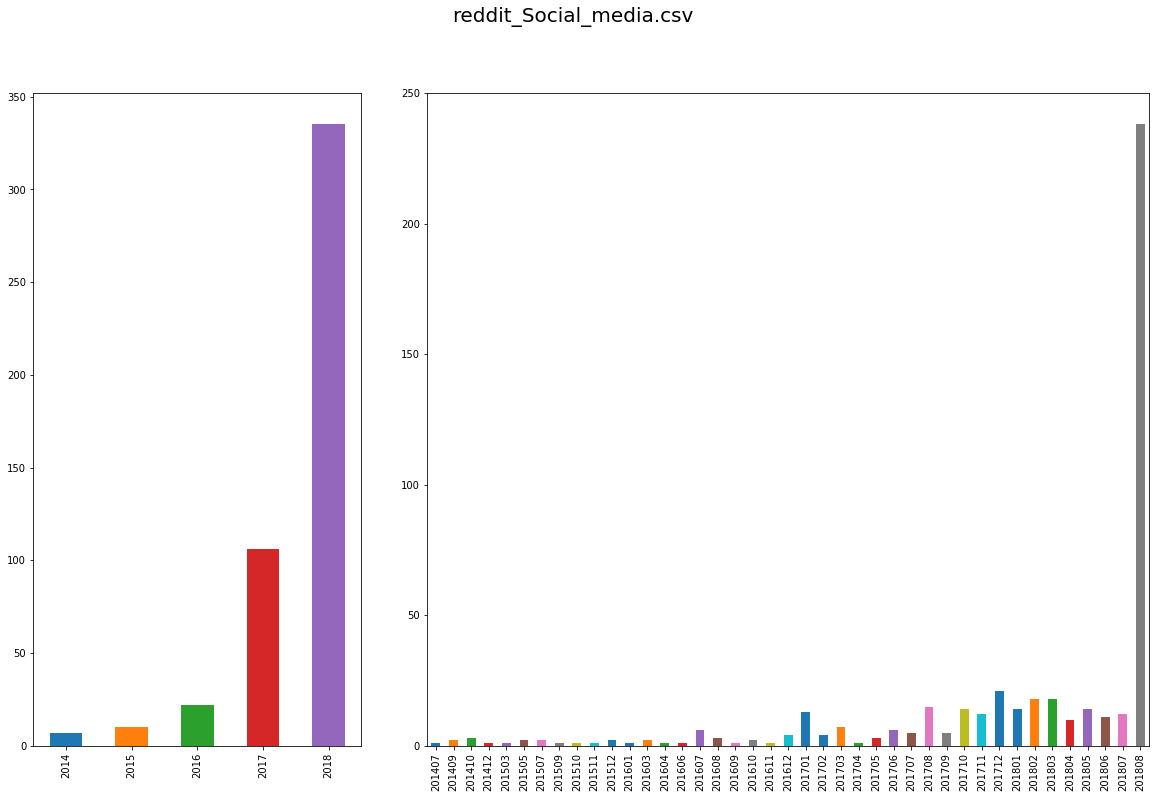

Num posts: 370


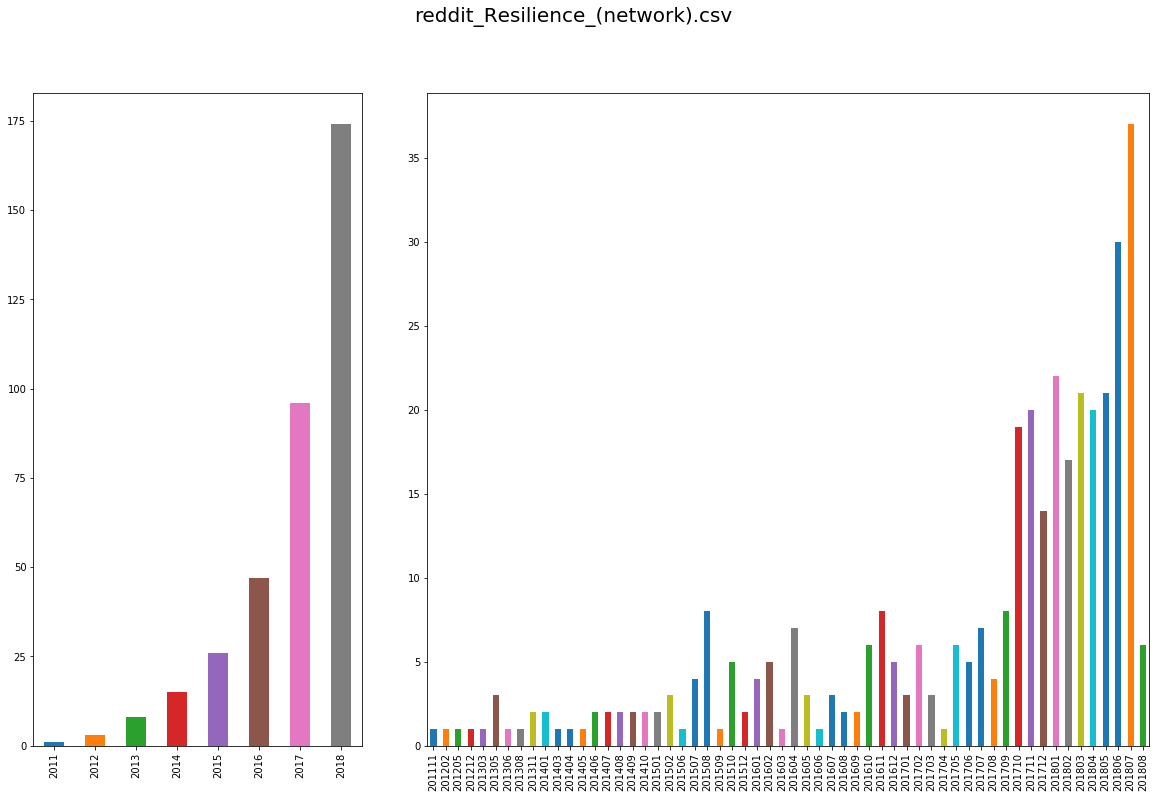

Num posts: 402


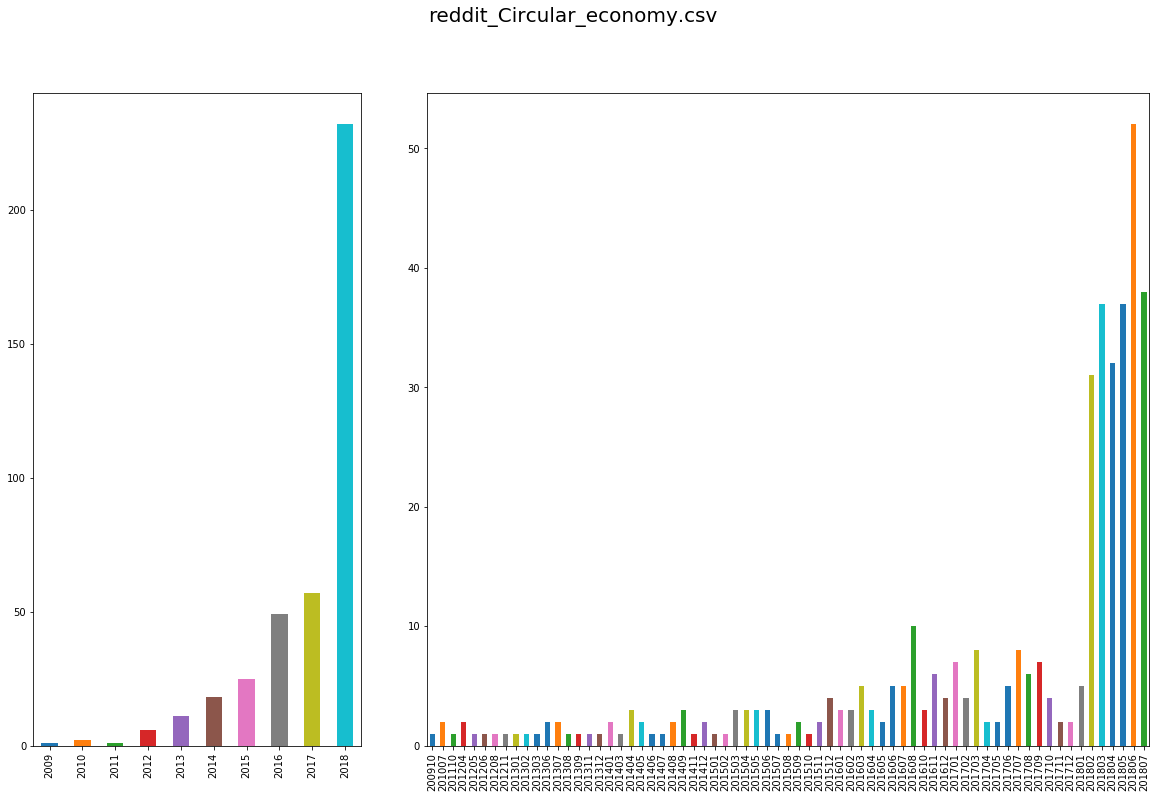

Num posts: 426


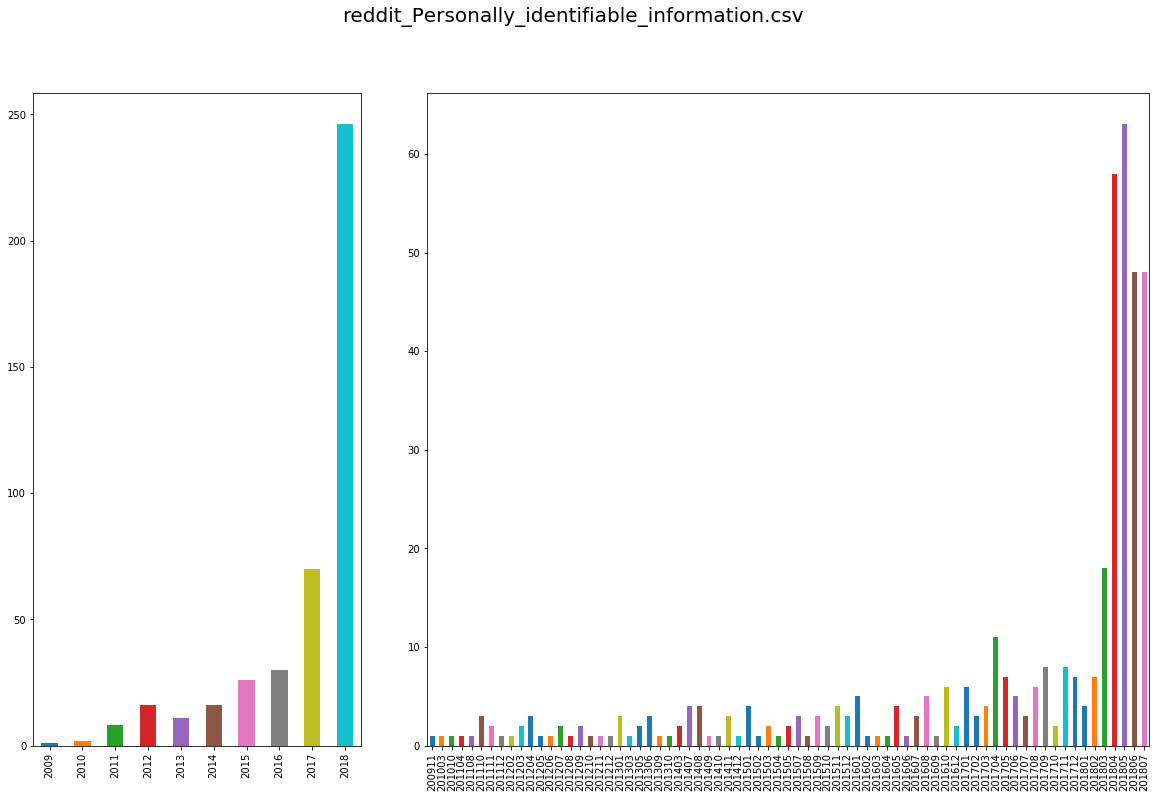

In [69]:
#Plot the number of comments that we collected in reddit for each article each month
folder = os.listdir(folderpath)
for file in folder:
    df = pd.read_csv(folderpath+file, index_col=0)
    df['date'] = pd.to_datetime(df['created'], unit='s')
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['YearMonth'] = df['date'].map(lambda x: 100*x.year + x.month)

    print('Num posts: '+str(len(df)))
    fig = plt.figure(figsize=(20,12));
    sub1 = plt.subplot(1,3,1)
    info = pd.value_counts(df['year'].values, sort=False)
    info.plot(kind='bar');

    #plt.figure(figsize=(10,6));
    #plt.suptitle('Month', fontsize=20)
    #info = pd.value_counts(df['month'].values, sort=False)
    #info.plot(kind='bar');
    sub2 = plt.subplot(1,3,(2,3))
    sub2 = plt.suptitle(file, fontsize=20)
    info = pd.value_counts(df['YearMonth'].values, sort=False)
    info.sort_index().plot(kind='bar');
    plt.show()

## Main Visualization: Sentiment Analysis for different articles

In [34]:
#Plot the Sentiment analysis of the given articles

color =["#e6194b","#3cb44b","#ffe119","#0082c8","#f58231","#911eb4","#46f0f0","#f032e6","#d2f53c","#fabebe","#008080","#e6beff","#aa6e28","#fffac8","#800000","#aaffc3","#808000","#ffd8b1","#000080","#808080","#FFFFFF","#000000","#1F77B4", "#B85A0D", '#878787', "#E377C2", '#66ccff', '#cc0066', '#cccc00', '#98DF8A', "#82853B","#92a8d1","#034f84","#f7cac9","#f7786b","#d5f4e6","#80ced6","#fefbd8","#618685","#ffef96","#50394c","#b2b2b2","#f4e1d2","#deeaee","#b1cbbb","#eea29a","#c94c4c","#3e4444","#82b74b","#405d27","#c1946a","#b9936c","#dac292",
"#e6e2d3","#c4b7a6","#6b5b95","#feb236","#d64161","#ff7b25","#eaece5","#b2c2bf","#c0ded9","#3b3a30","#c8c3cc","#563f46","#8ca3a3","#484f4f","#686256",
"#c1502e","#587e76","#a96e5b","#bccad6","#8d9db6","#667292","#f1e3dd","#cfe0e8","#b7d7e8","#87bdd8","#daebe8","#fbefcc","#f9ccac","#f4a688","#e0876a",
"#f9d5e5","#eeac99","#e06377","#c83349","#5b9aa0","#d6d4e0","#b8a9c9","#622569","#96ceb4","#ffeead","#ffcc5c","#ff6f69","#588c7e","#f2e394","#f2ae72","#d96459"]*5

def plot_multiple_sentiment_analysis(articles):
    art = articles.copy()
    for article in art: 
        if (not os.path.isfile(folder_to+'sentiment_sep_reddit_'+article+'.csv') ):
            articles.remove(article)
    with open (folder_to+'num_posts', 'rb') as fp:
        dict_num_posts = pickle.load(fp)
    df=[0]*len(articles)
    for i, article in enumerate(articles): 
        with open (folder_to+'sentiment_sep_reddit_'+article+'.csv', 'rb') as fp:
            df[i] = pickle.load(fp)
    data = {'LIWC' : keys}
    for i, article in enumerate(articles):
        data[article] = df[i]
    for art in articles:
        print('Number of posts '+ art +': '+ str(dict_num_posts['reddit_'+art+'.csv']))

    source = ColumnDataSource(data=data)

    p = figure(x_range=keys, plot_height=500, plot_width = 970, title="Sentiment Analysis",
               toolbar_location=None, tools="")

    incr=0
    base = 0.8/len(articles)
    for i,art in enumerate(articles):
        p.vbar(x=dodge('LIWC', -base+incr, range=p.x_range), top=art, width=base-0.05, source=source,
           color=color[i], legend=value(art))
        incr+=base

    #p.vbar(x=dodge('Topics',  0.25, range=p.x_range), top='2017', width=0.2, source=source,
           #color="#e84d60", legend=value("2017"))

    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.location = "top_right"
    p.legend.click_policy="hide"

    show(p)

Select the articles and the topic (social or technological) to visualize.

In [95]:
#Select the articles and the topic (social or technological) to visualize.
articles = ['Fake_news', 'Net_neutrality', 'Open_access', 'Copyright', 'Blockchain', 'Right_to_be_forgotten']
topic = 'social' #'technology' #'social'

#DO NOT CHANGE
folder_to = './data/sentiment_analysis/'+topic+'/'

plot_multiple_sentiment_analysis(articles)

Number of posts Fake_news: 442
Number of posts Net_neutrality: 295
Number of posts Open_access: 486
Number of posts Copyright: 455
Number of posts Right_to_be_forgotten: 485


## Ranking Sentiments

Plot the top X articles of a given Sentiment

In [82]:
def ranking_pos(sentiment, top_x=5, max_values=True):
    with open (folder_to+'num_posts', 'rb') as fp:
        dict_num_posts = pickle.load(fp)
    keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']
    dict_rank = {}
    
    pos = keys.index('present')
    for article in dict_num_posts:
        if (dict_num_posts[article]>150):
            with open (folder_to+'sentiment_sep_'+article, 'rb') as fp:
                df = pickle.load(fp)
                if not max_values:
                    if df[pos]>0.0: dict_rank[article] = df[pos]
                else: dict_rank[article] = df[pos]
    #return the articles with maximum value in the given sentiment
    if (max_values): return sorted(dict_rank, key=dict_rank.get, reverse=True)[:top_x]
    #return the articles with minimum value in the given sentiment
    else: return sorted(dict_rank, key=dict_rank.get, reverse=False)[:top_x]

In [96]:
def plot_ranking(sentiment, top_x=5, max_values=True):
    articles = ranking_pos(sentiment, top_x, max_values)
    plot_multiple_sentiment_analysis([art[7:-4] for art in articles])

- Write in the variable 'sentiment', the sentiment that you want to analyze. Choose one of the shown in the variable 'keys'.
- Then write max_values=True if u want to see the articles with the top values in that sentiment, or write max_values=False to find the articles with the minimum value.
- Write in 'top_x' the number of articles that you want to plot. top_x=5, plot the top 5 articles. 

In [97]:
keys = ['past', 'present', 'future', 'swear', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'discrep']


#the 'sentiment' choosen has to belong to one of the 'keys'
sentiment='negemo'

#If you want to look for the x top elements: max_value=True. If you want to look for the minimum values in the sentiment analysis: max_value=False
max_values = True #False

#Write the number of articles that yoy want to plot
top_x=5

plot_ranking(sentiment, top_x, max_values)


Number of posts Temporary_work: 469
Number of posts Level_playing_field: 467
Number of posts Filter_bubble: 455
Number of posts Backward_Compatibility: 462
Number of posts Echo_chamber_(media): 421
